In [401]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path = './'

In [402]:
df = pd.read_csv(path + 'train.csv')
df.head()

UNC_YEAR    HSCD  COUNTRYCD  COUNTRYNM  TRADE_COUNTRYCD    TRADE_HSCD  \
0      2017  190590         12    Algeria     4.605299e+10  1.948099e+10   
1      2017  190590         36  Australia     2.284420e+11  1.948099e+10   
2      2017  190590         40    Austria     1.664750e+11  1.948099e+10   
3      2017  190590         56    Belgium     4.064120e+11  1.948099e+10   
4      2017  190590         76     Brazil     1.507490e+11  1.948099e+10   

   TARIFF_AVG        SNDIST  NY_GDP_MKTP_CD  NY_GDP_MKTP_CD_1Y  SP_POP_TOTL  \
0        30.0   3878.238437    1.701630e+11       1.599950e+11     41389198   
1         0.0  12203.155980    1.329190e+12       1.208850e+12     24601860   
2         0.0   4403.247293    4.172380e+11       3.955690e+11      8797566   
3         0.0   3980.375563    5.026980e+11       4.757400e+11     11375158   
4        18.0   9644.206941    2.062830e+12       1.795700e+12    207833831   

   PA_NUS_FCRF  IC_BUS_EASE_DFRN_DB        KMDIST  TRADE_HSCD_COUNTRYCD  \
0   110.973017            46.109810   9954.009766             3416326.0   
1     1.304758            80.223690   8329.652344           438747025.0   
2          NaN            78.856460   8289.029297           453206357.0   
3          NaN            72.409200   8722.114258           706524512.0   
4     3.191389            55.382403  18364.505860            31329648.0   

   KR_TRADE_HSCD_COUNTRYCD  
0                     7657  
1                  5294788  
2                   335818  
3                   173709  
4                   122850

In [403]:
idx = df[df['TARIFF_AVG'].isnull()].index
df = df.drop(idx)
idx = df[df["KR_TRADE_HSCD_COUNTRYCD"] == 0.0].index
df = df.drop(idx)
idx = df[df["TRADE_HSCD_COUNTRYCD"].isnull()].index
df = df.drop(idx)
idx = df[df['PA_NUS_FCRF'].isnull()].index
df = df.drop(idx)
idx = df[df['SNDIST'].isnull()].index
df = df.drop(idx)

In [404]:
df.head()
df.to_csv('./main_clearNull.csv')

In [405]:
df['_HSCD'] = df['HSCD'].copy()

In [406]:
hcsd_uniq = df['HSCD'].unique()
for i in range(len(df['HSCD'])):
  for x in range(len(hcsd_uniq)):
    if hcsd_uniq[x] == df['HSCD'].iloc[i]:
      df['HSCD'].iloc[i] = (x+1)
      break

df.head()

/home/jihoon/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


UNC_YEAR  HSCD  COUNTRYCD  COUNTRYNM  TRADE_COUNTRYCD    TRADE_HSCD  \
0      2017     1         12    Algeria     4.605299e+10  1.948099e+10   
1      2017     1         36  Australia     2.284420e+11  1.948099e+10   
4      2017     1         76     Brazil     1.507490e+11  1.948099e+10   
5      2017     1        104    Myanmar     1.925344e+10  1.948099e+10   
6      2017     1        124     Canada     4.324050e+11  1.948099e+10   

   TARIFF_AVG        SNDIST  NY_GDP_MKTP_CD  NY_GDP_MKTP_CD_1Y  SP_POP_TOTL  \
0        30.0   3878.238437    1.701630e+11       1.599950e+11     41389198   
1         0.0  12203.155980    1.329190e+12       1.208850e+12     24601860   
4        18.0   9644.206941    2.062830e+12       1.795700e+12    207833831   
5         5.0   5891.659995    6.894587e+10       6.718424e+10     53382581   
6         0.0   7911.783801    1.649880e+12       1.528240e+12     36543321   

   PA_NUS_FCRF  IC_BUS_EASE_DFRN_DB        KMDIST  TRADE_HSCD_COUNTRYCD  \
0   110.973017            46.109810   9954.009766          3.416326e+06   
1     1.304758            80.223690   8329.652344          4.387470e+08   
4     3.191389            55.382403  18364.505860          3.132965e+07   
5  1360.358707            42.671390   3796.142578          1.276182e+07   
6     1.297936            79.540940  10617.703130          1.113991e+09   

   KR_TRADE_HSCD_COUNTRYCD   _HSCD  
0                     7657  190590  
1                  5294788  190590  
4                   122850  190590  
5                   631082  190590  
6                  7273171  190590

In [407]:
hcsd_uniq = df['COUNTRYCD'].unique()
for i in range(len(df['COUNTRYCD'])):
  for x in range(len(hcsd_uniq)):
    if hcsd_uniq[x] == df['COUNTRYCD'].iloc[i]:
      df['COUNTRYCD'].iloc[i] = (x+1)
      break
#df['TARIFF_AVG'] = df['TARIFF_AVG'] / 100
#df['IC_BUS_EASE_DFRN_DB'] = df['IC_BUS_EASE_DFRN_DB'] / 100
#df['KMDIST'] = df['KMDIST']/100 # total -> divided 10000
#df['gdp_percent'] = df['gdp_percent'] / 100


######################################################################
df.head()

/home/jihoon/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


UNC_YEAR  HSCD  COUNTRYCD  COUNTRYNM  TRADE_COUNTRYCD    TRADE_HSCD  \
0      2017     1          1    Algeria     4.605299e+10  1.948099e+10   
1      2017     1          2  Australia     2.284420e+11  1.948099e+10   
4      2017     1          3     Brazil     1.507490e+11  1.948099e+10   
5      2017     1          4    Myanmar     1.925344e+10  1.948099e+10   
6      2017     1          5     Canada     4.324050e+11  1.948099e+10   

   TARIFF_AVG        SNDIST  NY_GDP_MKTP_CD  NY_GDP_MKTP_CD_1Y  SP_POP_TOTL  \
0        30.0   3878.238437    1.701630e+11       1.599950e+11     41389198   
1         0.0  12203.155980    1.329190e+12       1.208850e+12     24601860   
4        18.0   9644.206941    2.062830e+12       1.795700e+12    207833831   
5         5.0   5891.659995    6.894587e+10       6.718424e+10     53382581   
6         0.0   7911.783801    1.649880e+12       1.528240e+12     36543321   

   PA_NUS_FCRF  IC_BUS_EASE_DFRN_DB        KMDIST  TRADE_HSCD_COUNTRYCD  \
0   110.973017            46.109810   9954.009766          3.416326e+06   
1     1.304758            80.223690   8329.652344          4.387470e+08   
4     3.191389            55.382403  18364.505860          3.132965e+07   
5  1360.358707            42.671390   3796.142578          1.276182e+07   
6     1.297936            79.540940  10617.703130          1.113991e+09   

   KR_TRADE_HSCD_COUNTRYCD   _HSCD  
0                     7657  190590  
1                  5294788  190590  
4                   122850  190590  
5                   631082  190590  
6                  7273171  190590

In [408]:
df.head()

UNC_YEAR  HSCD  COUNTRYCD  COUNTRYNM  TRADE_COUNTRYCD    TRADE_HSCD  \
0      2017     1          1    Algeria     4.605299e+10  1.948099e+10   
1      2017     1          2  Australia     2.284420e+11  1.948099e+10   
4      2017     1          3     Brazil     1.507490e+11  1.948099e+10   
5      2017     1          4    Myanmar     1.925344e+10  1.948099e+10   
6      2017     1          5     Canada     4.324050e+11  1.948099e+10   

   TARIFF_AVG        SNDIST  NY_GDP_MKTP_CD  NY_GDP_MKTP_CD_1Y  SP_POP_TOTL  \
0        30.0   3878.238437    1.701630e+11       1.599950e+11     41389198   
1         0.0  12203.155980    1.329190e+12       1.208850e+12     24601860   
4        18.0   9644.206941    2.062830e+12       1.795700e+12    207833831   
5         5.0   5891.659995    6.894587e+10       6.718424e+10     53382581   
6         0.0   7911.783801    1.649880e+12       1.528240e+12     36543321   

   PA_NUS_FCRF  IC_BUS_EASE_DFRN_DB        KMDIST  TRADE_HSCD_COUNTRYCD  \
0   110.973017            46.109810   9954.009766          3.416326e+06   
1     1.304758            80.223690   8329.652344          4.387470e+08   
4     3.191389            55.382403  18364.505860          3.132965e+07   
5  1360.358707            42.671390   3796.142578          1.276182e+07   
6     1.297936            79.540940  10617.703130          1.113991e+09   

   KR_TRADE_HSCD_COUNTRYCD   _HSCD  
0                     7657  190590  
1                  5294788  190590  
4                   122850  190590  
5                   631082  190590  
6                  7273171  190590

<AxesSubplot:>

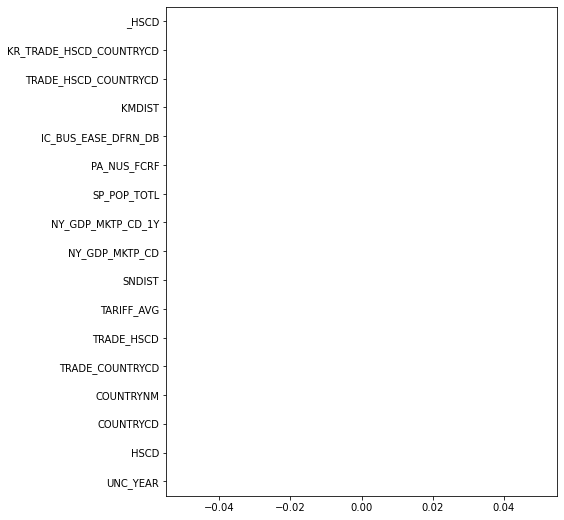

In [409]:
df.isnull().mean().plot.barh(figsize=(7,9))

In [410]:
df.shape


(17269, 17)

In [411]:
df["item_total_percent"] = df["TRADE_HSCD_COUNTRYCD"]/ df["TRADE_COUNTRYCD"] * 100
df["item_world_percent"] = df["TRADE_HSCD_COUNTRYCD"] / df["TRADE_HSCD"] * 100
df["gdp_percent"] = df["NY_GDP_MKTP_CD"] / df["NY_GDP_MKTP_CD_1Y"] * 100
df["next_year_percent"] = df["KR_TRADE_HSCD_COUNTRYCD"] / df["TRADE_HSCD_COUNTRYCD"] * 100
df["next_year_percent"]

0        0.224130
1        1.206797
4        0.392121
5        4.945077
6        0.652893
           ...   
21098    0.870154
21099    2.552436
21100    0.412353
21101    0.273898
21102    6.848066
Name: next_year_percent, Length: 17269, dtype: float64

In [412]:
df.head()
# df = df.drop('KR_TRADE_HSCD_COUNTRYCD', axis=1).copy()
# df = df.drop('TRADE_HSCD_COUNTRYCD', axis=1).copy()

UNC_YEAR  HSCD  COUNTRYCD  COUNTRYNM  TRADE_COUNTRYCD    TRADE_HSCD  \
0      2017     1          1    Algeria     4.605299e+10  1.948099e+10   
1      2017     1          2  Australia     2.284420e+11  1.948099e+10   
4      2017     1          3     Brazil     1.507490e+11  1.948099e+10   
5      2017     1          4    Myanmar     1.925344e+10  1.948099e+10   
6      2017     1          5     Canada     4.324050e+11  1.948099e+10   

   TARIFF_AVG        SNDIST  NY_GDP_MKTP_CD  NY_GDP_MKTP_CD_1Y  ...  \
0        30.0   3878.238437    1.701630e+11       1.599950e+11  ...   
1         0.0  12203.155980    1.329190e+12       1.208850e+12  ...   
4        18.0   9644.206941    2.062830e+12       1.795700e+12  ...   
5         5.0   5891.659995    6.894587e+10       6.718424e+10  ...   
6         0.0   7911.783801    1.649880e+12       1.528240e+12  ...   

   PA_NUS_FCRF  IC_BUS_EASE_DFRN_DB        KMDIST  TRADE_HSCD_COUNTRYCD  \
0   110.973017            46.109810   9954.009766          3.416326e+06   
1     1.304758            80.223690   8329.652344          4.387470e+08   
4     3.191389            55.382403  18364.505860          3.132965e+07   
5  1360.358707            42.671390   3796.142578          1.276182e+07   
6     1.297936            79.540940  10617.703130          1.113991e+09   

   KR_TRADE_HSCD_COUNTRYCD   _HSCD  item_total_percent  item_world_percent  \
0                     7657  190590            0.007418            0.017537   
1                  5294788  190590            0.192061            2.252181   
4                   122850  190590            0.020783            0.160822   
5                   631082  190590            0.066283            0.065509   
6                  7273171  190590            0.257627            5.718352   

   gdp_percent  next_year_percent  
0   106.355199           0.224130  
1   109.954916           1.206797  
4   114.876093           0.392121  
5   102.622089           4.945077  
6   107.959483           0.652893  

[5 rows x 21 columns]

In [413]:
copy_df = df.copy()

In [414]:

df['KMDIST'] = df['KMDIST'] / 100
df['SNDIST'] = df['SNDIST'] / 100
df['SP_POP_TOTL'] = (df['SP_POP_TOTL'] - df['SP_POP_TOTL'].min()) / (df['SP_POP_TOTL'].max() - df['SP_POP_TOTL'].min())
# 'SP_POP_TOTL', 
copy_df = df.copy()
df = df.drop(columns=['_HSCD'])
df = df.drop(columns=['UNC_YEAR', 'COUNTRYNM'])
df = df.drop(columns=['KR_TRADE_HSCD_COUNTRYCD', 'TRADE_HSCD_COUNTRYCD', 'TRADE_COUNTRYCD', 'TRADE_HSCD', 'NY_GDP_MKTP_CD', 'NY_GDP_MKTP_CD_1Y'])

In [415]:
df.head()

HSCD  COUNTRYCD  TARIFF_AVG      SNDIST  SP_POP_TOTL  PA_NUS_FCRF  \
0     1          1        30.0   38.782384     0.027670   110.973017   
1     1          2         0.0  122.031560     0.015534     1.304758   
4     1          3        18.0   96.442069     0.147996     3.191389   
5     1          4         5.0   58.916600     0.036340  1360.358707   
6     1          5         0.0   79.117838     0.024167     1.297936   

   IC_BUS_EASE_DFRN_DB      KMDIST  item_total_percent  item_world_percent  \
0            46.109810   99.540098            0.007418            0.017537   
1            80.223690   83.296523            0.192061            2.252181   
4            55.382403  183.645059            0.020783            0.160822   
5            42.671390   37.961426            0.066283            0.065509   
6            79.540940  106.177031            0.257627            5.718352   

   gdp_percent  next_year_percent  
0   106.355199           0.224130  
1   109.954916           1.206797  
4   114.876093           0.392121  
5   102.622089           4.945077  
6   107.959483           0.652893

In [100]:
df.to_csv('./norm.csv')

In [101]:
df_shuffled=df.sample(frac=1).reset_index(drop=True)

In [102]:
df_shuffled.head()

HSCD  COUNTRYCD  TARIFF_AVG     SNDIST  SP_POP_TOTL  PA_NUS_FCRF  \
0   397         18         0.0  58.623366     0.000000  2439.777201   
1   256         30         0.0  43.356186     0.003859     0.984692   
2    15         24         3.3  39.854837     0.102208    58.342801   
3   482         26         0.0  63.542803     0.965491    65.121569   
4   263         26         0.0  57.076151     0.965491    65.121569   

   IC_BUS_EASE_DFRN_DB     KMDIST  item_total_percent  item_world_percent  \
0            66.135100  20.031033            0.044014            0.002566   
1            76.420920  88.781650            0.020537            0.708592   
2            75.213127  66.140645            0.035635            1.887664   
3            55.901587  46.926719            0.010038            1.232611   
4            55.901587  46.926719            0.012459            0.874308   

   gdp_percent  next_year_percent  
0   102.136643          22.879775  
1   101.287187           1.667829  
2   123.293572           2.141691  
3   115.598309           6.168033  
4   115.598309           0.422290

In [103]:
# df = df_shuffled.copy()

In [416]:
print(df.shape)
tr = int(df.shape[0]*6/10) # Train
te = int((df.shape[0] - tr)/2) # Test (actually Train)
va = df.shape[0] - tr - te # Validation (actually Test)
print(tr,te, va)

(17269, 12)
10361 3454 3454


In [417]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as opti
torch.manual_seed(1015)
device = torch.device("cuda")

In [484]:
import torch
from torch.utils.data import TensorDataset # 텐서데이터셋
from torch.utils.data import DataLoader # 데이터로더

x_train = torch.FloatTensor(df.iloc[:tr+te,:-1].values).to(device)
y_train = torch.FloatTensor(df.iloc[:tr+te,-1].values).to(device)
x_test = torch.FloatTensor(df.iloc[tr+te:,:-1].values).to(device)
y_test = torch.FloatTensor(df.iloc[tr+te:,-1].values).to(device)

max(y_train)
y_train = torch.reshape(y_train, (-1,1))


In [485]:
y_test = y_test.reshape(-1,1)

In [486]:
len(df)

17269

In [487]:
print(x_train.shape)
print(y_train.shape)
dataset = TensorDataset(x_train, y_train)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

torch.Size([13815, 11])
torch.Size([13815, 1])


In [488]:
y_test.shape

torch.Size([3454, 1])

In [489]:
FLAG_SAVE_MODEL = False

In [490]:
# LSTM Model Test
import torch.nn as nn

sequence_length = x_train.shape[1]
input_size = x_train.shape[1]
hidden_size = 512
num_layers = 2
num_classes = 1
batch_size = 128

learning_rate = 0.01
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(RNN, self).__init__() # 상속한 nn.Module에서 RNN에 해당하는 init 실행
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=0.5)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x): 
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) # (BATCH SIZE, SEQ_LENGTH, HIDDEN_SIZE)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) # hidden state와 동일

        out, _ = self.lstm(x, (h0, c0)) # output : (BATCH_SIZE, SEQ_LENGTH, HIDDEN_SIZE) tensors. (hn, cn)은 필요 없으므로 받지 않고 _로 처리합니다. 

        out = self.fc(out[:, -1, :])
        return out
    
class DeepModel(nn.Module):
    def __init__(self, in_channel, out_channel):
        super(DeepModel, self).__init__()

        self.basic = nn.BatchNorm1d(in_channel)
        self.layer1 = nn.Linear(in_channel, 256)
        self.dropout1 = nn.Dropout(0.5)
        self.bn1 = nn.BatchNorm1d(256)
        self.layer2 = nn.Linear(256, 64)
        self.dropout2 = nn.Dropout(0.5)
        self.bn2 = nn.BatchNorm1d(64)
        self.head = nn.Linear(64, out_channel)

    def forward(self, x):
        x = x.to(device)
        x = self.basic(x)
        x = F.relu(self.bn1(self.layer1(x)))
        x = self.dropout1(x)
        x = F.relu(self.bn2(self.layer2(x)))
        x = self.dropout2(x)

        return self.head(x)
    
class DeepModel_l1(nn.Module):
    def __init__(self, in_channel, out_channel):
        super(DeepModel_l1, self).__init__()

        self.basic = nn.BatchNorm1d(in_channel)
        self.layer1 = nn.Linear(in_channel, 512)
        self.dropout1 = nn.Dropout(0.5)
        self.bn1 = nn.BatchNorm1d(512)
#         self.layer2 = nn.Linear(512, 64)
#         self.dropout2 = nn.Dropout(0.5)
#         self.bn2 = nn.BatchNorm1d(64)
        self.head = nn.Linear(512, out_channel)

    def forward(self, x):
        x = x.to(device)
        x = self.basic(x)
        x = F.relu(self.layer1(x))
        x = self.dropout1(x)
#         x = F.relu(self.bn2(self.layer2(x)))
#         x = self.dropout2(x)

        return self.head(x)
modelLinear = nn.Linear(x_train.shape[1], 1).to(device)



# model = nn.Linear(9,1).to(device)


# MODEL LOAD FINISH
# MODEL LOAD FINISH
# MODEL LOAD FINISH

# LSTM - L1 Loss Model

In [512]:
# LSTM
deepmodel = RNN(input_size, hidden_size, num_layers, num_classes).to(device)
optimizer = torch.optim.Adam(deepmodel.parameters(), lr=1e-5)

num_epochs = 100
total_step = len(dataloader)
loss_list_lstm = []
test_loss_list_lstm = []
for epoch in range(num_epochs):
    for batch_idx, samples in enumerate(dataloader):
        x_t, y_t = samples
        x_t = x_t.reshape(-1, 1, input_size)

        pred = deepmodel(x_t)
        
#         loss = F.mse_loss(y_t, pred)
        loss = F.l1_loss(y_t, pred)
        loss_list_lstm.append(loss)
        with torch.no_grad():
            x_te = x_test.reshape(-1,1,input_size)
            pred_y = deepmodel(x_te)
            test_loss_list_lstm.append(F.l1_loss(pred_y, y_test))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (batch_idx+1) % 100 == 0: 
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(
                epoch+1, num_epochs, batch_idx+1, total_step, loss.item()))

if FLAG_SAVE_MODEL:
    torch.save(deepmodel.state_dict(), './last_all_feature_and_all_norm_LSTM_L1.pth')



Epoch [1/100], Step [100/432], Loss: 3.7907
Epoch [1/100], Step [200/432], Loss: 4.1423
Epoch [1/100], Step [300/432], Loss: 7.1549
Epoch [1/100], Step [400/432], Loss: 38.5847
Epoch [2/100], Step [100/432], Loss: 3.8127
Epoch [2/100], Step [200/432], Loss: 2.8602
Epoch [2/100], Step [300/432], Loss: 2.8800
Epoch [2/100], Step [400/432], Loss: 1.7245
Epoch [3/100], Step [100/432], Loss: 6.5735
Epoch [3/100], Step [200/432], Loss: 3.5801
Epoch [3/100], Step [300/432], Loss: 1.7375
Epoch [3/100], Step [400/432], Loss: 4.5673
Epoch [4/100], Step [100/432], Loss: 2.5606
Epoch [4/100], Step [200/432], Loss: 2.4333
Epoch [4/100], Step [300/432], Loss: 2.6849
Epoch [4/100], Step [400/432], Loss: 6.2238
Epoch [5/100], Step [100/432], Loss: 2.9496
Epoch [5/100], Step [200/432], Loss: 2.3474
Epoch [5/100], Step [300/432], Loss: 3.0238
Epoch [5/100], Step [400/432], Loss: 2.8435
Epoch [6/100], Step [100/432], Loss: 4.3262
Epoch [6/100], Step [200/432], Loss: 2.0729
Epoch [6/100], Step [300/432], 

Epoch [46/100], Step [400/432], Loss: 3.4166
Epoch [47/100], Step [100/432], Loss: 4.6701
Epoch [47/100], Step [200/432], Loss: 5.7583
Epoch [47/100], Step [300/432], Loss: 6.6429
Epoch [47/100], Step [400/432], Loss: 3.8195
Epoch [48/100], Step [100/432], Loss: 22.6223
Epoch [48/100], Step [200/432], Loss: 2.6102
Epoch [48/100], Step [300/432], Loss: 2.4061
Epoch [48/100], Step [400/432], Loss: 3.1239
Epoch [49/100], Step [100/432], Loss: 6.0146
Epoch [49/100], Step [200/432], Loss: 5.5622
Epoch [49/100], Step [300/432], Loss: 3.6609
Epoch [49/100], Step [400/432], Loss: 2.4951
Epoch [50/100], Step [100/432], Loss: 3.6910
Epoch [50/100], Step [200/432], Loss: 4.4438
Epoch [50/100], Step [300/432], Loss: 2.6011
Epoch [50/100], Step [400/432], Loss: 2.4119
Epoch [51/100], Step [100/432], Loss: 1.4351
Epoch [51/100], Step [200/432], Loss: 5.6297
Epoch [51/100], Step [300/432], Loss: 3.4291
Epoch [51/100], Step [400/432], Loss: 2.2914
Epoch [52/100], Step [100/432], Loss: 3.3429
Epoch [52

Epoch [92/100], Step [200/432], Loss: 8.9413
Epoch [92/100], Step [300/432], Loss: 6.1738
Epoch [92/100], Step [400/432], Loss: 6.9867
Epoch [93/100], Step [100/432], Loss: 5.4513
Epoch [93/100], Step [200/432], Loss: 4.3633
Epoch [93/100], Step [300/432], Loss: 2.6715
Epoch [93/100], Step [400/432], Loss: 1.4504
Epoch [94/100], Step [100/432], Loss: 3.6672
Epoch [94/100], Step [200/432], Loss: 3.2857
Epoch [94/100], Step [300/432], Loss: 3.3594
Epoch [94/100], Step [400/432], Loss: 6.8585
Epoch [95/100], Step [100/432], Loss: 4.3698
Epoch [95/100], Step [200/432], Loss: 3.8639
Epoch [95/100], Step [300/432], Loss: 1.9446
Epoch [95/100], Step [400/432], Loss: 5.2140
Epoch [96/100], Step [100/432], Loss: 2.9903
Epoch [96/100], Step [200/432], Loss: 2.8704
Epoch [96/100], Step [300/432], Loss: 2.6052
Epoch [96/100], Step [400/432], Loss: 4.3624
Epoch [97/100], Step [100/432], Loss: 5.2566
Epoch [97/100], Step [200/432], Loss: 3.4658
Epoch [97/100], Step [300/432], Loss: 11.3416
Epoch [97

In [513]:
x_te = x_test.reshape(-1,1,input_size)
pred_y = deepmodel(x_te)
# torch.mean(torch.abs(pred_y - y_test))
F.l1_loss(pred_y, y_test)

tensor(4.4648, device='cuda:0', grad_fn=<L1LossBackward>)

# L2 Loss model - not used

In [ ]:
deepmodel = DeepModel(df.shape[1]-1, 1).to(device)
deepmodel.eval()
optimizer = torch.optim.Adam(deepmodel.parameters(), lr=1e-5)

In [ ]:
n_epochs = 200
loss_list1 = []
test_loss_list1 = []
for epoch in range(n_epochs):
    for batch_idx, samples in enumerate(dataloader):
        x_t, y_t = samples

        pred = deepmodel(x_t).to(device)
        cost = F.mse_loss(y_t, pred)
        loss_list1.append(cost)
        with torch.no_grad():
            pred_y = modelL1(x_test)
            test_loss_list1.append(F.mse_loss(pred_y, y_test))
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        print("Ep {}/{}  Batch {}/{}  cost : {}".format(epoch, n_epochs, batch_idx+1, len(dataloader), cost.item()))

In [ ]:
pred_y = deepmodel(x_test)
torch.mean(torch.abs(pred_y - y_test))

In [ ]:
torch.save(deepmodel.state_dict(), './last_all_feature_and_all_norm_L2.pth')

# l1 loss model

In [475]:
deepmodel2 = DeepModel(df.shape[1]-1, 1).to(device)
deepmodel2.eval()#F.l1_loss
optimizer2 = torch.optim.Adam(deepmodel2.parameters(), lr=1e-5)

In [476]:
n_epochs = 100
loss_list2 = []
test_loss_list2 = []
for epoch in range(n_epochs):
    for batch_idx, samples in enumerate(dataloader):
        x_t, y_t = samples

        pred = deepmodel2(x_t).to(device)
        cost = F.l1_loss(y_t, pred)
        loss_list2.append(cost)
        with torch.no_grad():
            pred_y = deepmodel2(x_test)
            test_loss_list2.append(F.l1_loss(pred_y, y_test))
        optimizer2.zero_grad()
        cost.backward()
        optimizer2.step()
        print("Ep {}/{}  Batch {}/{}  cost : {}".format(epoch, n_epochs, batch_idx+1, len(dataloader), cost.item()))

Ep 0/100  Batch 1/216  cost : 208.43846130371094
Ep 0/100  Batch 2/216  cost : 156.54505920410156
Ep 0/100  Batch 3/216  cost : 66.71725463867188
Ep 0/100  Batch 4/216  cost : 213.1656494140625
Ep 0/100  Batch 5/216  cost : 64.29537200927734
Ep 0/100  Batch 6/216  cost : 118.69587707519531
Ep 0/100  Batch 7/216  cost : 90.42684936523438
Ep 0/100  Batch 8/216  cost : 123.64057922363281
Ep 0/100  Batch 9/216  cost : 102.857666015625
Ep 0/100  Batch 10/216  cost : 70.5510025024414
Ep 0/100  Batch 11/216  cost : 116.5252685546875
Ep 0/100  Batch 12/216  cost : 150.94732666015625
Ep 0/100  Batch 13/216  cost : 73.77897644042969
Ep 0/100  Batch 14/216  cost : 170.67112731933594
Ep 0/100  Batch 15/216  cost : 128.86111450195312
Ep 0/100  Batch 16/216  cost : 87.30441284179688
Ep 0/100  Batch 17/216  cost : 45.7392578125
Ep 0/100  Batch 18/216  cost : 97.43504333496094
Ep 0/100  Batch 19/216  cost : 90.22378540039062
Ep 0/100  Batch 20/216  cost : 144.6454620361328
Ep 0/100  Batch 21/216  cost

Ep 1/100  Batch 6/216  cost : 7.9500579833984375
Ep 1/100  Batch 7/216  cost : 4.881220817565918
Ep 1/100  Batch 8/216  cost : 4.433584213256836
Ep 1/100  Batch 9/216  cost : 43.88236999511719
Ep 1/100  Batch 10/216  cost : 4.752533912658691
Ep 1/100  Batch 11/216  cost : 3.9883270263671875
Ep 1/100  Batch 12/216  cost : 4.7966837882995605
Ep 1/100  Batch 13/216  cost : 7.23953914642334
Ep 1/100  Batch 14/216  cost : 4.797626495361328
Ep 1/100  Batch 15/216  cost : 6.860407829284668
Ep 1/100  Batch 16/216  cost : 6.934825897216797
Ep 1/100  Batch 17/216  cost : 6.826529502868652
Ep 1/100  Batch 18/216  cost : 9.139894485473633
Ep 1/100  Batch 19/216  cost : 4.155773162841797
Ep 1/100  Batch 20/216  cost : 6.377981185913086
Ep 1/100  Batch 21/216  cost : 6.483600616455078
Ep 1/100  Batch 22/216  cost : 9.509920120239258
Ep 1/100  Batch 23/216  cost : 4.3133745193481445
Ep 1/100  Batch 24/216  cost : 6.199941635131836
Ep 1/100  Batch 25/216  cost : 4.6316609382629395
Ep 1/100  Batch 26/2

Ep 2/100  Batch 12/216  cost : 5.412817001342773
Ep 2/100  Batch 13/216  cost : 4.4842023849487305
Ep 2/100  Batch 14/216  cost : 12.07464599609375
Ep 2/100  Batch 15/216  cost : 5.020805358886719
Ep 2/100  Batch 16/216  cost : 4.173785209655762
Ep 2/100  Batch 17/216  cost : 4.708695411682129
Ep 2/100  Batch 18/216  cost : 3.5809218883514404
Ep 2/100  Batch 19/216  cost : 7.0459394454956055
Ep 2/100  Batch 20/216  cost : 6.56010103225708
Ep 2/100  Batch 21/216  cost : 6.034570693969727
Ep 2/100  Batch 22/216  cost : 3.542728900909424
Ep 2/100  Batch 23/216  cost : 7.0375776290893555
Ep 2/100  Batch 24/216  cost : 5.657603740692139
Ep 2/100  Batch 25/216  cost : 4.6451826095581055
Ep 2/100  Batch 26/216  cost : 6.378620624542236
Ep 2/100  Batch 27/216  cost : 5.159043788909912
Ep 2/100  Batch 28/216  cost : 6.223201751708984
Ep 2/100  Batch 29/216  cost : 5.385692596435547
Ep 2/100  Batch 30/216  cost : 8.46754264831543
Ep 2/100  Batch 31/216  cost : 5.129860877990723
Ep 2/100  Batch 3

Ep 3/100  Batch 18/216  cost : 6.273542881011963
Ep 3/100  Batch 19/216  cost : 3.09912109375
Ep 3/100  Batch 20/216  cost : 5.3275909423828125
Ep 3/100  Batch 21/216  cost : 9.120253562927246
Ep 3/100  Batch 22/216  cost : 4.706700801849365
Ep 3/100  Batch 23/216  cost : 6.7651190757751465
Ep 3/100  Batch 24/216  cost : 3.285388231277466
Ep 3/100  Batch 25/216  cost : 3.029885768890381
Ep 3/100  Batch 26/216  cost : 2.8591370582580566
Ep 3/100  Batch 27/216  cost : 4.408060073852539
Ep 3/100  Batch 28/216  cost : 6.50497579574585
Ep 3/100  Batch 29/216  cost : 3.0772061347961426
Ep 3/100  Batch 30/216  cost : 7.8767571449279785
Ep 3/100  Batch 31/216  cost : 5.047882080078125
Ep 3/100  Batch 32/216  cost : 3.9218010902404785
Ep 3/100  Batch 33/216  cost : 3.6839754581451416
Ep 3/100  Batch 34/216  cost : 7.843859672546387
Ep 3/100  Batch 35/216  cost : 3.4686601161956787
Ep 3/100  Batch 36/216  cost : 5.708524703979492
Ep 3/100  Batch 37/216  cost : 3.077549695968628
Ep 3/100  Batch 3

Ep 4/100  Batch 24/216  cost : 5.827043533325195
Ep 4/100  Batch 25/216  cost : 3.7031962871551514
Ep 4/100  Batch 26/216  cost : 4.885520935058594
Ep 4/100  Batch 27/216  cost : 6.189993381500244
Ep 4/100  Batch 28/216  cost : 4.570803642272949
Ep 4/100  Batch 29/216  cost : 4.1925859451293945
Ep 4/100  Batch 30/216  cost : 3.597625970840454
Ep 4/100  Batch 31/216  cost : 4.19695520401001
Ep 4/100  Batch 32/216  cost : 5.051234245300293
Ep 4/100  Batch 33/216  cost : 5.471735954284668
Ep 4/100  Batch 34/216  cost : 3.94669246673584
Ep 4/100  Batch 35/216  cost : 19.99319076538086
Ep 4/100  Batch 36/216  cost : 11.102965354919434
Ep 4/100  Batch 37/216  cost : 4.162260055541992
Ep 4/100  Batch 38/216  cost : 4.477311134338379
Ep 4/100  Batch 39/216  cost : 4.300182819366455
Ep 4/100  Batch 40/216  cost : 3.9772772789001465
Ep 4/100  Batch 41/216  cost : 5.988813877105713
Ep 4/100  Batch 42/216  cost : 4.658127307891846
Ep 4/100  Batch 43/216  cost : 3.4157376289367676
Ep 4/100  Batch 4

Ep 5/100  Batch 30/216  cost : 4.713319778442383
Ep 5/100  Batch 31/216  cost : 3.452589511871338
Ep 5/100  Batch 32/216  cost : 5.702720642089844
Ep 5/100  Batch 33/216  cost : 2.2978358268737793
Ep 5/100  Batch 34/216  cost : 3.9416587352752686
Ep 5/100  Batch 35/216  cost : 5.766188621520996
Ep 5/100  Batch 36/216  cost : 2.5049312114715576
Ep 5/100  Batch 37/216  cost : 3.2474124431610107
Ep 5/100  Batch 38/216  cost : 6.191510200500488
Ep 5/100  Batch 39/216  cost : 5.765110015869141
Ep 5/100  Batch 40/216  cost : 2.7821900844573975
Ep 5/100  Batch 41/216  cost : 5.133901596069336
Ep 5/100  Batch 42/216  cost : 4.830204486846924
Ep 5/100  Batch 43/216  cost : 2.0908665657043457
Ep 5/100  Batch 44/216  cost : 3.3014187812805176
Ep 5/100  Batch 45/216  cost : 3.851613759994507
Ep 5/100  Batch 46/216  cost : 3.15264892578125
Ep 5/100  Batch 47/216  cost : 4.57037353515625
Ep 5/100  Batch 48/216  cost : 4.605567932128906
Ep 5/100  Batch 49/216  cost : 4.884979248046875
Ep 5/100  Batch

Ep 6/100  Batch 36/216  cost : 7.610490322113037
Ep 6/100  Batch 37/216  cost : 4.047835350036621
Ep 6/100  Batch 38/216  cost : 4.319142818450928
Ep 6/100  Batch 39/216  cost : 4.985150337219238
Ep 6/100  Batch 40/216  cost : 3.2685201168060303
Ep 6/100  Batch 41/216  cost : 4.5918965339660645
Ep 6/100  Batch 42/216  cost : 3.880840301513672
Ep 6/100  Batch 43/216  cost : 2.614616870880127
Ep 6/100  Batch 44/216  cost : 5.533717155456543
Ep 6/100  Batch 45/216  cost : 5.489306926727295
Ep 6/100  Batch 46/216  cost : 2.489741325378418
Ep 6/100  Batch 47/216  cost : 6.851691246032715
Ep 6/100  Batch 48/216  cost : 8.679008483886719
Ep 6/100  Batch 49/216  cost : 5.214784145355225
Ep 6/100  Batch 50/216  cost : 3.7956907749176025
Ep 6/100  Batch 51/216  cost : 3.371448040008545
Ep 6/100  Batch 52/216  cost : 6.055444240570068
Ep 6/100  Batch 53/216  cost : 3.288214683532715
Ep 6/100  Batch 54/216  cost : 7.142459392547607
Ep 6/100  Batch 55/216  cost : 8.296414375305176
Ep 6/100  Batch 5

Ep 7/100  Batch 42/216  cost : 5.8993120193481445
Ep 7/100  Batch 43/216  cost : 4.38769006729126
Ep 7/100  Batch 44/216  cost : 4.781660079956055
Ep 7/100  Batch 45/216  cost : 14.73820686340332
Ep 7/100  Batch 46/216  cost : 9.907273292541504
Ep 7/100  Batch 47/216  cost : 8.6489896774292
Ep 7/100  Batch 48/216  cost : 5.062525272369385
Ep 7/100  Batch 49/216  cost : 5.573040962219238
Ep 7/100  Batch 50/216  cost : 4.284708023071289
Ep 7/100  Batch 51/216  cost : 3.7889857292175293
Ep 7/100  Batch 52/216  cost : 2.5069940090179443
Ep 7/100  Batch 53/216  cost : 4.206229209899902
Ep 7/100  Batch 54/216  cost : 8.670332908630371
Ep 7/100  Batch 55/216  cost : 3.5082404613494873
Ep 7/100  Batch 56/216  cost : 2.949612855911255
Ep 7/100  Batch 57/216  cost : 7.234269142150879
Ep 7/100  Batch 58/216  cost : 5.170782566070557
Ep 7/100  Batch 59/216  cost : 2.9996261596679688
Ep 7/100  Batch 60/216  cost : 3.804187774658203
Ep 7/100  Batch 61/216  cost : 5.351468086242676
Ep 7/100  Batch 62

Ep 8/100  Batch 48/216  cost : 3.3789138793945312
Ep 8/100  Batch 49/216  cost : 4.293055534362793
Ep 8/100  Batch 50/216  cost : 4.932638168334961
Ep 8/100  Batch 51/216  cost : 4.121027946472168
Ep 8/100  Batch 52/216  cost : 5.89515495300293
Ep 8/100  Batch 53/216  cost : 4.050689220428467
Ep 8/100  Batch 54/216  cost : 4.1267218589782715
Ep 8/100  Batch 55/216  cost : 7.097437858581543
Ep 8/100  Batch 56/216  cost : 6.396751880645752
Ep 8/100  Batch 57/216  cost : 7.5234198570251465
Ep 8/100  Batch 58/216  cost : 4.77729606628418
Ep 8/100  Batch 59/216  cost : 9.005280494689941
Ep 8/100  Batch 60/216  cost : 5.05317497253418
Ep 8/100  Batch 61/216  cost : 3.8925046920776367
Ep 8/100  Batch 62/216  cost : 5.947092533111572
Ep 8/100  Batch 63/216  cost : 4.076294898986816
Ep 8/100  Batch 64/216  cost : 4.962302207946777
Ep 8/100  Batch 65/216  cost : 7.322585105895996
Ep 8/100  Batch 66/216  cost : 5.142944812774658
Ep 8/100  Batch 67/216  cost : 8.595490455627441
Ep 8/100  Batch 68/

Ep 9/100  Batch 54/216  cost : 7.028213977813721
Ep 9/100  Batch 55/216  cost : 4.327199935913086
Ep 9/100  Batch 56/216  cost : 5.6234660148620605
Ep 9/100  Batch 57/216  cost : 4.563028335571289
Ep 9/100  Batch 58/216  cost : 3.307947874069214
Ep 9/100  Batch 59/216  cost : 4.163280487060547
Ep 9/100  Batch 60/216  cost : 3.5133752822875977
Ep 9/100  Batch 61/216  cost : 4.324430465698242
Ep 9/100  Batch 62/216  cost : 5.025897979736328
Ep 9/100  Batch 63/216  cost : 2.8771462440490723
Ep 9/100  Batch 64/216  cost : 3.007777452468872
Ep 9/100  Batch 65/216  cost : 2.882741928100586
Ep 9/100  Batch 66/216  cost : 2.9222054481506348
Ep 9/100  Batch 67/216  cost : 4.707632064819336
Ep 9/100  Batch 68/216  cost : 5.122661590576172
Ep 9/100  Batch 69/216  cost : 3.4945387840270996
Ep 9/100  Batch 70/216  cost : 3.884012222290039
Ep 9/100  Batch 71/216  cost : 21.778362274169922
Ep 9/100  Batch 72/216  cost : 5.907540321350098
Ep 9/100  Batch 73/216  cost : 4.832374572753906
Ep 9/100  Batc

Ep 10/100  Batch 60/216  cost : 4.046314239501953
Ep 10/100  Batch 61/216  cost : 2.8784830570220947
Ep 10/100  Batch 62/216  cost : 3.293172836303711
Ep 10/100  Batch 63/216  cost : 9.116315841674805
Ep 10/100  Batch 64/216  cost : 3.9192748069763184
Ep 10/100  Batch 65/216  cost : 4.1351776123046875
Ep 10/100  Batch 66/216  cost : 8.103947639465332
Ep 10/100  Batch 67/216  cost : 3.477299451828003
Ep 10/100  Batch 68/216  cost : 5.091459274291992
Ep 10/100  Batch 69/216  cost : 3.514468193054199
Ep 10/100  Batch 70/216  cost : 3.6053595542907715
Ep 10/100  Batch 71/216  cost : 4.050535678863525
Ep 10/100  Batch 72/216  cost : 5.482304573059082
Ep 10/100  Batch 73/216  cost : 2.546469211578369
Ep 10/100  Batch 74/216  cost : 3.850152015686035
Ep 10/100  Batch 75/216  cost : 6.174953937530518
Ep 10/100  Batch 76/216  cost : 4.211926460266113
Ep 10/100  Batch 77/216  cost : 4.099489688873291
Ep 10/100  Batch 78/216  cost : 11.14580249786377
Ep 10/100  Batch 79/216  cost : 4.546460151672

Ep 11/100  Batch 66/216  cost : 3.8369839191436768
Ep 11/100  Batch 67/216  cost : 4.00900936126709
Ep 11/100  Batch 68/216  cost : 6.1969194412231445
Ep 11/100  Batch 69/216  cost : 4.980592727661133
Ep 11/100  Batch 70/216  cost : 2.815397262573242
Ep 11/100  Batch 71/216  cost : 5.177745819091797
Ep 11/100  Batch 72/216  cost : 8.329702377319336
Ep 11/100  Batch 73/216  cost : 7.406512260437012
Ep 11/100  Batch 74/216  cost : 5.7146406173706055
Ep 11/100  Batch 75/216  cost : 3.82000470161438
Ep 11/100  Batch 76/216  cost : 5.597674369812012
Ep 11/100  Batch 77/216  cost : 5.618427276611328
Ep 11/100  Batch 78/216  cost : 3.3776886463165283
Ep 11/100  Batch 79/216  cost : 4.360622406005859
Ep 11/100  Batch 80/216  cost : 4.310617923736572
Ep 11/100  Batch 81/216  cost : 6.358749866485596
Ep 11/100  Batch 82/216  cost : 6.288717269897461
Ep 11/100  Batch 83/216  cost : 6.786112308502197
Ep 11/100  Batch 84/216  cost : 5.133229732513428
Ep 11/100  Batch 85/216  cost : 2.98990607261657

Ep 12/100  Batch 72/216  cost : 3.046816110610962
Ep 12/100  Batch 73/216  cost : 4.645956993103027
Ep 12/100  Batch 74/216  cost : 45.05590057373047
Ep 12/100  Batch 75/216  cost : 3.046860694885254
Ep 12/100  Batch 76/216  cost : 6.7045159339904785
Ep 12/100  Batch 77/216  cost : 7.947693824768066
Ep 12/100  Batch 78/216  cost : 3.674482822418213
Ep 12/100  Batch 79/216  cost : 4.131484031677246
Ep 12/100  Batch 80/216  cost : 3.6486387252807617
Ep 12/100  Batch 81/216  cost : 4.190812587738037
Ep 12/100  Batch 82/216  cost : 8.587747573852539
Ep 12/100  Batch 83/216  cost : 6.654413223266602
Ep 12/100  Batch 84/216  cost : 3.965491771697998
Ep 12/100  Batch 85/216  cost : 9.874956130981445
Ep 12/100  Batch 86/216  cost : 8.183450698852539
Ep 12/100  Batch 87/216  cost : 5.373018264770508
Ep 12/100  Batch 88/216  cost : 2.974045753479004
Ep 12/100  Batch 89/216  cost : 4.827171325683594
Ep 12/100  Batch 90/216  cost : 3.8822872638702393
Ep 12/100  Batch 91/216  cost : 6.4823346138000

Ep 13/100  Batch 78/216  cost : 6.564190864562988
Ep 13/100  Batch 79/216  cost : 4.507237434387207
Ep 13/100  Batch 80/216  cost : 3.0225892066955566
Ep 13/100  Batch 81/216  cost : 3.159285545349121
Ep 13/100  Batch 82/216  cost : 3.875460147857666
Ep 13/100  Batch 83/216  cost : 3.295532703399658
Ep 13/100  Batch 84/216  cost : 3.511460304260254
Ep 13/100  Batch 85/216  cost : 5.4458327293396
Ep 13/100  Batch 86/216  cost : 2.861936569213867
Ep 13/100  Batch 87/216  cost : 4.3175249099731445
Ep 13/100  Batch 88/216  cost : 4.967928409576416
Ep 13/100  Batch 89/216  cost : 54.671321868896484
Ep 13/100  Batch 90/216  cost : 3.785503387451172
Ep 13/100  Batch 91/216  cost : 5.328487873077393
Ep 13/100  Batch 92/216  cost : 4.325159072875977
Ep 13/100  Batch 93/216  cost : 4.447872161865234
Ep 13/100  Batch 94/216  cost : 3.608067035675049
Ep 13/100  Batch 95/216  cost : 4.939134120941162
Ep 13/100  Batch 96/216  cost : 3.526309013366699
Ep 13/100  Batch 97/216  cost : 2.645644187927246

Ep 14/100  Batch 83/216  cost : 7.096960544586182
Ep 14/100  Batch 84/216  cost : 56.442649841308594
Ep 14/100  Batch 85/216  cost : 3.7973430156707764
Ep 14/100  Batch 86/216  cost : 4.815019607543945
Ep 14/100  Batch 87/216  cost : 4.7968339920043945
Ep 14/100  Batch 88/216  cost : 5.248952865600586
Ep 14/100  Batch 89/216  cost : 5.513854503631592
Ep 14/100  Batch 90/216  cost : 7.59639310836792
Ep 14/100  Batch 91/216  cost : 5.180608749389648
Ep 14/100  Batch 92/216  cost : 5.076951026916504
Ep 14/100  Batch 93/216  cost : 13.712698936462402
Ep 14/100  Batch 94/216  cost : 8.540228843688965
Ep 14/100  Batch 95/216  cost : 4.944032669067383
Ep 14/100  Batch 96/216  cost : 5.479495525360107
Ep 14/100  Batch 97/216  cost : 4.071213722229004
Ep 14/100  Batch 98/216  cost : 10.82822036743164
Ep 14/100  Batch 99/216  cost : 7.75424861907959
Ep 14/100  Batch 100/216  cost : 4.8483734130859375
Ep 14/100  Batch 101/216  cost : 6.561237335205078
Ep 14/100  Batch 102/216  cost : 5.4912128448

Ep 15/100  Batch 89/216  cost : 3.3305552005767822
Ep 15/100  Batch 90/216  cost : 4.661002159118652
Ep 15/100  Batch 91/216  cost : 4.517961502075195
Ep 15/100  Batch 92/216  cost : 3.3747808933258057
Ep 15/100  Batch 93/216  cost : 3.754333019256592
Ep 15/100  Batch 94/216  cost : 3.6641783714294434
Ep 15/100  Batch 95/216  cost : 4.148458480834961
Ep 15/100  Batch 96/216  cost : 5.195749759674072
Ep 15/100  Batch 97/216  cost : 6.224448204040527
Ep 15/100  Batch 98/216  cost : 5.753589630126953
Ep 15/100  Batch 99/216  cost : 5.299304008483887
Ep 15/100  Batch 100/216  cost : 5.629499435424805
Ep 15/100  Batch 101/216  cost : 3.0012383460998535
Ep 15/100  Batch 102/216  cost : 4.1594390869140625
Ep 15/100  Batch 103/216  cost : 5.003098011016846
Ep 15/100  Batch 104/216  cost : 13.104207038879395
Ep 15/100  Batch 105/216  cost : 4.970280647277832
Ep 15/100  Batch 106/216  cost : 5.475452423095703
Ep 15/100  Batch 107/216  cost : 4.540329933166504
Ep 15/100  Batch 108/216  cost : 56.

Ep 16/100  Batch 95/216  cost : 5.241353988647461
Ep 16/100  Batch 96/216  cost : 3.8219528198242188
Ep 16/100  Batch 97/216  cost : 4.392446041107178
Ep 16/100  Batch 98/216  cost : 9.110281944274902
Ep 16/100  Batch 99/216  cost : 3.838407516479492
Ep 16/100  Batch 100/216  cost : 4.422404766082764
Ep 16/100  Batch 101/216  cost : 5.183422088623047
Ep 16/100  Batch 102/216  cost : 3.817385673522949
Ep 16/100  Batch 103/216  cost : 8.513174057006836
Ep 16/100  Batch 104/216  cost : 5.699947357177734
Ep 16/100  Batch 105/216  cost : 5.928863048553467
Ep 16/100  Batch 106/216  cost : 3.4777345657348633
Ep 16/100  Batch 107/216  cost : 5.51749324798584
Ep 16/100  Batch 108/216  cost : 16.089338302612305
Ep 16/100  Batch 109/216  cost : 5.057208061218262
Ep 16/100  Batch 110/216  cost : 3.9039273262023926
Ep 16/100  Batch 111/216  cost : 2.809565544128418
Ep 16/100  Batch 112/216  cost : 3.750842332839966
Ep 16/100  Batch 113/216  cost : 2.9059619903564453
Ep 16/100  Batch 114/216  cost :

Ep 17/100  Batch 101/216  cost : 60.494720458984375
Ep 17/100  Batch 102/216  cost : 8.916479110717773
Ep 17/100  Batch 103/216  cost : 4.472489356994629
Ep 17/100  Batch 104/216  cost : 10.865723609924316
Ep 17/100  Batch 105/216  cost : 5.071061134338379
Ep 17/100  Batch 106/216  cost : 4.742778301239014
Ep 17/100  Batch 107/216  cost : 2.3117752075195312
Ep 17/100  Batch 108/216  cost : 6.550093650817871
Ep 17/100  Batch 109/216  cost : 8.834177017211914
Ep 17/100  Batch 110/216  cost : 4.478514671325684
Ep 17/100  Batch 111/216  cost : 4.8877458572387695
Ep 17/100  Batch 112/216  cost : 57.654415130615234
Ep 17/100  Batch 113/216  cost : 1.6900272369384766
Ep 17/100  Batch 114/216  cost : 6.8255157470703125
Ep 17/100  Batch 115/216  cost : 4.411325454711914
Ep 17/100  Batch 116/216  cost : 5.211234092712402
Ep 17/100  Batch 117/216  cost : 3.936201333999634
Ep 17/100  Batch 118/216  cost : 5.45859432220459
Ep 17/100  Batch 119/216  cost : 3.7770512104034424
Ep 17/100  Batch 120/216

Ep 18/100  Batch 107/216  cost : 2.8350799083709717
Ep 18/100  Batch 108/216  cost : 3.571484327316284
Ep 18/100  Batch 109/216  cost : 4.340651035308838
Ep 18/100  Batch 110/216  cost : 5.653905391693115
Ep 18/100  Batch 111/216  cost : 4.270204544067383
Ep 18/100  Batch 112/216  cost : 9.747783660888672
Ep 18/100  Batch 113/216  cost : 3.3037052154541016
Ep 18/100  Batch 114/216  cost : 3.107875347137451
Ep 18/100  Batch 115/216  cost : 4.4985246658325195
Ep 18/100  Batch 116/216  cost : 5.957548141479492
Ep 18/100  Batch 117/216  cost : 4.227011680603027
Ep 18/100  Batch 118/216  cost : 3.4181597232818604
Ep 18/100  Batch 119/216  cost : 2.4037022590637207
Ep 18/100  Batch 120/216  cost : 5.496030330657959
Ep 18/100  Batch 121/216  cost : 3.9888296127319336
Ep 18/100  Batch 122/216  cost : 2.3709797859191895
Ep 18/100  Batch 123/216  cost : 3.883301258087158
Ep 18/100  Batch 124/216  cost : 3.575772762298584
Ep 18/100  Batch 125/216  cost : 4.049691677093506
Ep 18/100  Batch 126/216

Ep 19/100  Batch 113/216  cost : 3.688634157180786
Ep 19/100  Batch 114/216  cost : 5.468837738037109
Ep 19/100  Batch 115/216  cost : 5.379124164581299
Ep 19/100  Batch 116/216  cost : 5.1353559494018555
Ep 19/100  Batch 117/216  cost : 4.38997745513916
Ep 19/100  Batch 118/216  cost : 2.8072593212127686
Ep 19/100  Batch 119/216  cost : 7.522495269775391
Ep 19/100  Batch 120/216  cost : 3.0108728408813477
Ep 19/100  Batch 121/216  cost : 5.420950889587402
Ep 19/100  Batch 122/216  cost : 3.1955599784851074
Ep 19/100  Batch 123/216  cost : 5.8590168952941895
Ep 19/100  Batch 124/216  cost : 4.254402160644531
Ep 19/100  Batch 125/216  cost : 2.967599391937256
Ep 19/100  Batch 126/216  cost : 3.2710647583007812
Ep 19/100  Batch 127/216  cost : 3.007739543914795
Ep 19/100  Batch 128/216  cost : 3.9856247901916504
Ep 19/100  Batch 129/216  cost : 4.675644874572754
Ep 19/100  Batch 130/216  cost : 6.882205009460449
Ep 19/100  Batch 131/216  cost : 4.95348596572876
Ep 19/100  Batch 132/216  

Ep 20/100  Batch 120/216  cost : 6.117824554443359
Ep 20/100  Batch 121/216  cost : 6.048591136932373
Ep 20/100  Batch 122/216  cost : 5.060046672821045
Ep 20/100  Batch 123/216  cost : 4.15631103515625
Ep 20/100  Batch 124/216  cost : 4.535495281219482
Ep 20/100  Batch 125/216  cost : 4.436468124389648
Ep 20/100  Batch 126/216  cost : 4.3423919677734375
Ep 20/100  Batch 127/216  cost : 2.7077059745788574
Ep 20/100  Batch 128/216  cost : 4.938258171081543
Ep 20/100  Batch 129/216  cost : 3.6501517295837402
Ep 20/100  Batch 130/216  cost : 6.687539100646973
Ep 20/100  Batch 131/216  cost : 6.678008079528809
Ep 20/100  Batch 132/216  cost : 4.557544708251953
Ep 20/100  Batch 133/216  cost : 4.073948860168457
Ep 20/100  Batch 134/216  cost : 5.424839019775391
Ep 20/100  Batch 135/216  cost : 7.131819725036621
Ep 20/100  Batch 136/216  cost : 4.916529655456543
Ep 20/100  Batch 137/216  cost : 8.35020637512207
Ep 20/100  Batch 138/216  cost : 6.207347869873047
Ep 20/100  Batch 139/216  cost

Ep 21/100  Batch 126/216  cost : 2.241975784301758
Ep 21/100  Batch 127/216  cost : 3.8725199699401855
Ep 21/100  Batch 128/216  cost : 3.9566714763641357
Ep 21/100  Batch 129/216  cost : 5.396574020385742
Ep 21/100  Batch 130/216  cost : 2.179948329925537
Ep 21/100  Batch 131/216  cost : 3.5649337768554688
Ep 21/100  Batch 132/216  cost : 3.1395881175994873
Ep 21/100  Batch 133/216  cost : 5.117504119873047
Ep 21/100  Batch 134/216  cost : 3.1346025466918945
Ep 21/100  Batch 135/216  cost : 7.201199531555176
Ep 21/100  Batch 136/216  cost : 2.1110050678253174
Ep 21/100  Batch 137/216  cost : 3.5155885219573975
Ep 21/100  Batch 138/216  cost : 4.750542163848877
Ep 21/100  Batch 139/216  cost : 6.5435380935668945
Ep 21/100  Batch 140/216  cost : 6.630471229553223
Ep 21/100  Batch 141/216  cost : 9.088360786437988
Ep 21/100  Batch 142/216  cost : 3.340229034423828
Ep 21/100  Batch 143/216  cost : 4.737236022949219
Ep 21/100  Batch 144/216  cost : 3.013766288757324
Ep 21/100  Batch 145/21

Ep 22/100  Batch 132/216  cost : 3.0835084915161133
Ep 22/100  Batch 133/216  cost : 4.408930778503418
Ep 22/100  Batch 134/216  cost : 5.958364486694336
Ep 22/100  Batch 135/216  cost : 2.795851945877075
Ep 22/100  Batch 136/216  cost : 8.313522338867188
Ep 22/100  Batch 137/216  cost : 6.171381950378418
Ep 22/100  Batch 138/216  cost : 4.353559494018555
Ep 22/100  Batch 139/216  cost : 4.63890266418457
Ep 22/100  Batch 140/216  cost : 5.302980899810791
Ep 22/100  Batch 141/216  cost : 5.078258514404297
Ep 22/100  Batch 142/216  cost : 8.08380126953125
Ep 22/100  Batch 143/216  cost : 5.4220685958862305
Ep 22/100  Batch 144/216  cost : 7.5771484375
Ep 22/100  Batch 145/216  cost : 4.296690940856934
Ep 22/100  Batch 146/216  cost : 4.0292768478393555
Ep 22/100  Batch 147/216  cost : 5.049776554107666
Ep 22/100  Batch 148/216  cost : 3.8465137481689453
Ep 22/100  Batch 149/216  cost : 4.033960342407227
Ep 22/100  Batch 150/216  cost : 4.188676357269287
Ep 22/100  Batch 151/216  cost : 4

Ep 23/100  Batch 138/216  cost : 56.49093246459961
Ep 23/100  Batch 139/216  cost : 4.294012546539307
Ep 23/100  Batch 140/216  cost : 2.5186500549316406
Ep 23/100  Batch 141/216  cost : 2.724663496017456
Ep 23/100  Batch 142/216  cost : 6.569555282592773
Ep 23/100  Batch 143/216  cost : 9.54773998260498
Ep 23/100  Batch 144/216  cost : 4.708005905151367
Ep 23/100  Batch 145/216  cost : 2.9913136959075928
Ep 23/100  Batch 146/216  cost : 4.201294898986816
Ep 23/100  Batch 147/216  cost : 15.203582763671875
Ep 23/100  Batch 148/216  cost : 4.506307125091553
Ep 23/100  Batch 149/216  cost : 4.574333190917969
Ep 23/100  Batch 150/216  cost : 7.154165744781494
Ep 23/100  Batch 151/216  cost : 4.3985090255737305
Ep 23/100  Batch 152/216  cost : 3.4635396003723145
Ep 23/100  Batch 153/216  cost : 3.1401028633117676
Ep 23/100  Batch 154/216  cost : 6.368358135223389
Ep 23/100  Batch 155/216  cost : 2.1856725215911865
Ep 23/100  Batch 156/216  cost : 3.8288049697875977
Ep 23/100  Batch 157/216

Ep 24/100  Batch 144/216  cost : 4.871555328369141
Ep 24/100  Batch 145/216  cost : 5.969562530517578
Ep 24/100  Batch 146/216  cost : 3.4810285568237305
Ep 24/100  Batch 147/216  cost : 6.372556686401367
Ep 24/100  Batch 148/216  cost : 2.7772316932678223
Ep 24/100  Batch 149/216  cost : 5.662052154541016
Ep 24/100  Batch 150/216  cost : 3.7601842880249023
Ep 24/100  Batch 151/216  cost : 5.881184101104736
Ep 24/100  Batch 152/216  cost : 3.721683979034424
Ep 24/100  Batch 153/216  cost : 5.169696807861328
Ep 24/100  Batch 154/216  cost : 5.147147178649902
Ep 24/100  Batch 155/216  cost : 6.951244354248047
Ep 24/100  Batch 156/216  cost : 5.373087406158447
Ep 24/100  Batch 157/216  cost : 5.510700225830078
Ep 24/100  Batch 158/216  cost : 4.208136081695557
Ep 24/100  Batch 159/216  cost : 2.4939537048339844
Ep 24/100  Batch 160/216  cost : 6.792154312133789
Ep 24/100  Batch 161/216  cost : 4.028651237487793
Ep 24/100  Batch 162/216  cost : 4.513761520385742
Ep 24/100  Batch 163/216  c

Ep 25/100  Batch 150/216  cost : 3.4242138862609863
Ep 25/100  Batch 151/216  cost : 2.3683130741119385
Ep 25/100  Batch 152/216  cost : 5.444007396697998
Ep 25/100  Batch 153/216  cost : 5.7514872550964355
Ep 25/100  Batch 154/216  cost : 3.4324779510498047
Ep 25/100  Batch 155/216  cost : 5.296053886413574
Ep 25/100  Batch 156/216  cost : 6.130581855773926
Ep 25/100  Batch 157/216  cost : 5.757907867431641
Ep 25/100  Batch 158/216  cost : 6.617890357971191
Ep 25/100  Batch 159/216  cost : 6.055826663970947
Ep 25/100  Batch 160/216  cost : 6.678154945373535
Ep 25/100  Batch 161/216  cost : 8.058671951293945
Ep 25/100  Batch 162/216  cost : 5.615808963775635
Ep 25/100  Batch 163/216  cost : 4.901076316833496
Ep 25/100  Batch 164/216  cost : 3.6247143745422363
Ep 25/100  Batch 165/216  cost : 2.6881887912750244
Ep 25/100  Batch 166/216  cost : 5.965963363647461
Ep 25/100  Batch 167/216  cost : 4.3482160568237305
Ep 25/100  Batch 168/216  cost : 3.9027633666992188
Ep 25/100  Batch 169/21

Ep 26/100  Batch 156/216  cost : 5.05732536315918
Ep 26/100  Batch 157/216  cost : 5.723849296569824
Ep 26/100  Batch 158/216  cost : 2.8751704692840576
Ep 26/100  Batch 159/216  cost : 3.7749972343444824
Ep 26/100  Batch 160/216  cost : 5.304617881774902
Ep 26/100  Batch 161/216  cost : 4.945769309997559
Ep 26/100  Batch 162/216  cost : 8.483007431030273
Ep 26/100  Batch 163/216  cost : 2.4535627365112305
Ep 26/100  Batch 164/216  cost : 2.8893015384674072
Ep 26/100  Batch 165/216  cost : 4.503880500793457
Ep 26/100  Batch 166/216  cost : 4.224386215209961
Ep 26/100  Batch 167/216  cost : 9.872621536254883
Ep 26/100  Batch 168/216  cost : 5.6712775230407715
Ep 26/100  Batch 169/216  cost : 5.976487159729004
Ep 26/100  Batch 170/216  cost : 3.4466161727905273
Ep 26/100  Batch 171/216  cost : 3.4086904525756836
Ep 26/100  Batch 172/216  cost : 2.9234766960144043
Ep 26/100  Batch 173/216  cost : 4.9505767822265625
Ep 26/100  Batch 174/216  cost : 3.782916784286499
Ep 26/100  Batch 175/21

Ep 27/100  Batch 162/216  cost : 3.7485532760620117
Ep 27/100  Batch 163/216  cost : 3.75215220451355
Ep 27/100  Batch 164/216  cost : 3.6721062660217285
Ep 27/100  Batch 165/216  cost : 3.937467098236084
Ep 27/100  Batch 166/216  cost : 4.160185813903809
Ep 27/100  Batch 167/216  cost : 6.579770088195801
Ep 27/100  Batch 168/216  cost : 3.942350387573242
Ep 27/100  Batch 169/216  cost : 4.05802059173584
Ep 27/100  Batch 170/216  cost : 4.950281143188477
Ep 27/100  Batch 171/216  cost : 3.437406539916992
Ep 27/100  Batch 172/216  cost : 4.571353912353516
Ep 27/100  Batch 173/216  cost : 8.536048889160156
Ep 27/100  Batch 174/216  cost : 2.9674198627471924
Ep 27/100  Batch 175/216  cost : 4.042438983917236
Ep 27/100  Batch 176/216  cost : 3.6502182483673096
Ep 27/100  Batch 177/216  cost : 1.866788625717163
Ep 27/100  Batch 178/216  cost : 3.286609411239624
Ep 27/100  Batch 179/216  cost : 4.934728145599365
Ep 27/100  Batch 180/216  cost : 9.288373947143555
Ep 27/100  Batch 181/216  cos

Ep 28/100  Batch 168/216  cost : 4.185666561126709
Ep 28/100  Batch 169/216  cost : 4.174713611602783
Ep 28/100  Batch 170/216  cost : 4.555231094360352
Ep 28/100  Batch 171/216  cost : 5.424284934997559
Ep 28/100  Batch 172/216  cost : 4.474153995513916
Ep 28/100  Batch 173/216  cost : 3.505032539367676
Ep 28/100  Batch 174/216  cost : 3.6215574741363525
Ep 28/100  Batch 175/216  cost : 5.797250747680664
Ep 28/100  Batch 176/216  cost : 9.607037544250488
Ep 28/100  Batch 177/216  cost : 4.071914196014404
Ep 28/100  Batch 178/216  cost : 5.0551252365112305
Ep 28/100  Batch 179/216  cost : 3.9299726486206055
Ep 28/100  Batch 180/216  cost : 10.195666313171387
Ep 28/100  Batch 181/216  cost : 5.716126441955566
Ep 28/100  Batch 182/216  cost : 4.187621116638184
Ep 28/100  Batch 183/216  cost : 3.6108150482177734
Ep 28/100  Batch 184/216  cost : 5.708532333374023
Ep 28/100  Batch 185/216  cost : 4.46298360824585
Ep 28/100  Batch 186/216  cost : 3.057011127471924
Ep 28/100  Batch 187/216  c

Ep 29/100  Batch 174/216  cost : 9.405294418334961
Ep 29/100  Batch 175/216  cost : 2.6891934871673584
Ep 29/100  Batch 176/216  cost : 2.425407886505127
Ep 29/100  Batch 177/216  cost : 3.355151414871216
Ep 29/100  Batch 178/216  cost : 3.0060670375823975
Ep 29/100  Batch 179/216  cost : 3.8253698348999023
Ep 29/100  Batch 180/216  cost : 4.624499797821045
Ep 29/100  Batch 181/216  cost : 3.781902551651001
Ep 29/100  Batch 182/216  cost : 4.222114562988281
Ep 29/100  Batch 183/216  cost : 4.252071380615234
Ep 29/100  Batch 184/216  cost : 3.7571423053741455
Ep 29/100  Batch 185/216  cost : 3.140170097351074
Ep 29/100  Batch 186/216  cost : 4.079097270965576
Ep 29/100  Batch 187/216  cost : 6.321224689483643
Ep 29/100  Batch 188/216  cost : 4.565553665161133
Ep 29/100  Batch 189/216  cost : 3.1818928718566895
Ep 29/100  Batch 190/216  cost : 4.374462127685547
Ep 29/100  Batch 191/216  cost : 4.386112213134766
Ep 29/100  Batch 192/216  cost : 4.651247978210449
Ep 29/100  Batch 193/216  

Ep 30/100  Batch 180/216  cost : 9.881966590881348
Ep 30/100  Batch 181/216  cost : 5.0625200271606445
Ep 30/100  Batch 182/216  cost : 4.010324478149414
Ep 30/100  Batch 183/216  cost : 5.849414825439453
Ep 30/100  Batch 184/216  cost : 18.311939239501953
Ep 30/100  Batch 185/216  cost : 3.531825065612793
Ep 30/100  Batch 186/216  cost : 3.5979373455047607
Ep 30/100  Batch 187/216  cost : 7.445479393005371
Ep 30/100  Batch 188/216  cost : 6.506842613220215
Ep 30/100  Batch 189/216  cost : 3.740126132965088
Ep 30/100  Batch 190/216  cost : 7.292215347290039
Ep 30/100  Batch 191/216  cost : 6.329985618591309
Ep 30/100  Batch 192/216  cost : 3.624711036682129
Ep 30/100  Batch 193/216  cost : 4.809398651123047
Ep 30/100  Batch 194/216  cost : 4.1771039962768555
Ep 30/100  Batch 195/216  cost : 6.203737258911133
Ep 30/100  Batch 196/216  cost : 6.1607985496521
Ep 30/100  Batch 197/216  cost : 5.1897125244140625
Ep 30/100  Batch 198/216  cost : 4.093947887420654
Ep 30/100  Batch 199/216  co

Ep 31/100  Batch 185/216  cost : 6.308005332946777
Ep 31/100  Batch 186/216  cost : 6.766613006591797
Ep 31/100  Batch 187/216  cost : 4.959564208984375
Ep 31/100  Batch 188/216  cost : 5.521397113800049
Ep 31/100  Batch 189/216  cost : 2.197512149810791
Ep 31/100  Batch 190/216  cost : 4.2202229499816895
Ep 31/100  Batch 191/216  cost : 5.113386154174805
Ep 31/100  Batch 192/216  cost : 3.184401750564575
Ep 31/100  Batch 193/216  cost : 6.095085144042969
Ep 31/100  Batch 194/216  cost : 5.17768669128418
Ep 31/100  Batch 195/216  cost : 4.8476972579956055
Ep 31/100  Batch 196/216  cost : 4.589715003967285
Ep 31/100  Batch 197/216  cost : 4.237643718719482
Ep 31/100  Batch 198/216  cost : 3.1765384674072266
Ep 31/100  Batch 199/216  cost : 5.776069641113281
Ep 31/100  Batch 200/216  cost : 8.96556282043457
Ep 31/100  Batch 201/216  cost : 2.420393705368042
Ep 31/100  Batch 202/216  cost : 3.103766679763794
Ep 31/100  Batch 203/216  cost : 4.448965072631836
Ep 31/100  Batch 204/216  cost

Ep 32/100  Batch 191/216  cost : 4.791215896606445
Ep 32/100  Batch 192/216  cost : 7.810215950012207
Ep 32/100  Batch 193/216  cost : 6.841894626617432
Ep 32/100  Batch 194/216  cost : 7.076886177062988
Ep 32/100  Batch 195/216  cost : 3.1440820693969727
Ep 32/100  Batch 196/216  cost : 3.5013961791992188
Ep 32/100  Batch 197/216  cost : 13.946771621704102
Ep 32/100  Batch 198/216  cost : 3.6329615116119385
Ep 32/100  Batch 199/216  cost : 4.854148864746094
Ep 32/100  Batch 200/216  cost : 2.565538167953491
Ep 32/100  Batch 201/216  cost : 3.44179630279541
Ep 32/100  Batch 202/216  cost : 3.554100275039673
Ep 32/100  Batch 203/216  cost : 4.861151218414307
Ep 32/100  Batch 204/216  cost : 8.242730140686035
Ep 32/100  Batch 205/216  cost : 3.919219732284546
Ep 32/100  Batch 206/216  cost : 4.839786529541016
Ep 32/100  Batch 207/216  cost : 3.9609196186065674
Ep 32/100  Batch 208/216  cost : 6.293034553527832
Ep 32/100  Batch 209/216  cost : 5.120698928833008
Ep 32/100  Batch 210/216  c

Ep 33/100  Batch 198/216  cost : 4.2190446853637695
Ep 33/100  Batch 199/216  cost : 4.284974098205566
Ep 33/100  Batch 200/216  cost : 5.178817272186279
Ep 33/100  Batch 201/216  cost : 2.745513916015625
Ep 33/100  Batch 202/216  cost : 4.217979907989502
Ep 33/100  Batch 203/216  cost : 4.189659118652344
Ep 33/100  Batch 204/216  cost : 4.815553188323975
Ep 33/100  Batch 205/216  cost : 7.277934551239014
Ep 33/100  Batch 206/216  cost : 3.2495079040527344
Ep 33/100  Batch 207/216  cost : 4.532842636108398
Ep 33/100  Batch 208/216  cost : 6.7713623046875
Ep 33/100  Batch 209/216  cost : 4.9094953536987305
Ep 33/100  Batch 210/216  cost : 3.486863136291504
Ep 33/100  Batch 211/216  cost : 2.6215829849243164
Ep 33/100  Batch 212/216  cost : 6.2168965339660645
Ep 33/100  Batch 213/216  cost : 3.284970760345459
Ep 33/100  Batch 214/216  cost : 4.715487480163574
Ep 33/100  Batch 215/216  cost : 2.333127975463867
Ep 33/100  Batch 216/216  cost : 4.172403812408447
Ep 34/100  Batch 1/216  cost

Ep 34/100  Batch 204/216  cost : 6.072782039642334
Ep 34/100  Batch 205/216  cost : 3.022352695465088
Ep 34/100  Batch 206/216  cost : 2.3303470611572266
Ep 34/100  Batch 207/216  cost : 3.5215959548950195
Ep 34/100  Batch 208/216  cost : 3.713059902191162
Ep 34/100  Batch 209/216  cost : 2.511387348175049
Ep 34/100  Batch 210/216  cost : 2.939511775970459
Ep 34/100  Batch 211/216  cost : 4.017323017120361
Ep 34/100  Batch 212/216  cost : 4.328104019165039
Ep 34/100  Batch 213/216  cost : 3.2611560821533203
Ep 34/100  Batch 214/216  cost : 8.165121078491211
Ep 34/100  Batch 215/216  cost : 8.104524612426758
Ep 34/100  Batch 216/216  cost : 4.353801250457764
Ep 35/100  Batch 1/216  cost : 4.211614608764648
Ep 35/100  Batch 2/216  cost : 3.257606267929077
Ep 35/100  Batch 3/216  cost : 3.0173888206481934
Ep 35/100  Batch 4/216  cost : 9.112381935119629
Ep 35/100  Batch 5/216  cost : 4.026070594787598
Ep 35/100  Batch 6/216  cost : 4.766144275665283
Ep 35/100  Batch 7/216  cost : 3.386605

Ep 35/100  Batch 210/216  cost : 19.60624885559082
Ep 35/100  Batch 211/216  cost : 5.221322536468506
Ep 35/100  Batch 212/216  cost : 4.0968427658081055
Ep 35/100  Batch 213/216  cost : 4.32853889465332
Ep 35/100  Batch 214/216  cost : 3.1955361366271973
Ep 35/100  Batch 215/216  cost : 4.923957347869873
Ep 35/100  Batch 216/216  cost : 7.562948226928711
Ep 36/100  Batch 1/216  cost : 3.036738157272339
Ep 36/100  Batch 2/216  cost : 3.2398951053619385
Ep 36/100  Batch 3/216  cost : 4.900054931640625
Ep 36/100  Batch 4/216  cost : 3.9959232807159424
Ep 36/100  Batch 5/216  cost : 5.346388816833496
Ep 36/100  Batch 6/216  cost : 9.334625244140625
Ep 36/100  Batch 7/216  cost : 3.8405704498291016
Ep 36/100  Batch 8/216  cost : 6.2305755615234375
Ep 36/100  Batch 9/216  cost : 3.7669570446014404
Ep 36/100  Batch 10/216  cost : 5.621838092803955
Ep 36/100  Batch 11/216  cost : 3.9975979328155518
Ep 36/100  Batch 12/216  cost : 5.717840194702148
Ep 36/100  Batch 13/216  cost : 4.41397476196

Ep 36/100  Batch 216/216  cost : 2.920804023742676
Ep 37/100  Batch 1/216  cost : 3.6705548763275146
Ep 37/100  Batch 2/216  cost : 2.753990650177002
Ep 37/100  Batch 3/216  cost : 4.132551670074463
Ep 37/100  Batch 4/216  cost : 3.8985719680786133
Ep 37/100  Batch 5/216  cost : 13.213130950927734
Ep 37/100  Batch 6/216  cost : 4.706000804901123
Ep 37/100  Batch 7/216  cost : 5.892858982086182
Ep 37/100  Batch 8/216  cost : 4.971738815307617
Ep 37/100  Batch 9/216  cost : 4.5766825675964355
Ep 37/100  Batch 10/216  cost : 3.651182174682617
Ep 37/100  Batch 11/216  cost : 2.817661762237549
Ep 37/100  Batch 12/216  cost : 12.347524642944336
Ep 37/100  Batch 13/216  cost : 3.895801067352295
Ep 37/100  Batch 14/216  cost : 4.187994956970215
Ep 37/100  Batch 15/216  cost : 5.7022294998168945
Ep 37/100  Batch 16/216  cost : 9.544381141662598
Ep 37/100  Batch 17/216  cost : 7.384555339813232
Ep 37/100  Batch 18/216  cost : 5.04691219329834
Ep 37/100  Batch 19/216  cost : 4.514917373657227
Ep 

Ep 38/100  Batch 6/216  cost : 7.853638172149658
Ep 38/100  Batch 7/216  cost : 4.545174598693848
Ep 38/100  Batch 8/216  cost : 13.162650108337402
Ep 38/100  Batch 9/216  cost : 5.7321672439575195
Ep 38/100  Batch 10/216  cost : 4.851931571960449
Ep 38/100  Batch 11/216  cost : 3.3735909461975098
Ep 38/100  Batch 12/216  cost : 3.941183567047119
Ep 38/100  Batch 13/216  cost : 5.739406108856201
Ep 38/100  Batch 14/216  cost : 2.957900047302246
Ep 38/100  Batch 15/216  cost : 4.283957004547119
Ep 38/100  Batch 16/216  cost : 5.5334248542785645
Ep 38/100  Batch 17/216  cost : 5.827373504638672
Ep 38/100  Batch 18/216  cost : 15.545025825500488
Ep 38/100  Batch 19/216  cost : 5.009967803955078
Ep 38/100  Batch 20/216  cost : 6.550189018249512
Ep 38/100  Batch 21/216  cost : 5.06006383895874
Ep 38/100  Batch 22/216  cost : 4.612327575683594
Ep 38/100  Batch 23/216  cost : 8.292630195617676
Ep 38/100  Batch 24/216  cost : 7.316925048828125
Ep 38/100  Batch 25/216  cost : 5.520866394042969


Ep 39/100  Batch 12/216  cost : 3.6314663887023926
Ep 39/100  Batch 13/216  cost : 4.851318359375
Ep 39/100  Batch 14/216  cost : 5.40638542175293
Ep 39/100  Batch 15/216  cost : 9.995776176452637
Ep 39/100  Batch 16/216  cost : 2.4756221771240234
Ep 39/100  Batch 17/216  cost : 4.060566425323486
Ep 39/100  Batch 18/216  cost : 4.699044704437256
Ep 39/100  Batch 19/216  cost : 5.371921062469482
Ep 39/100  Batch 20/216  cost : 1.8473381996154785
Ep 39/100  Batch 21/216  cost : 3.042614459991455
Ep 39/100  Batch 22/216  cost : 3.201875925064087
Ep 39/100  Batch 23/216  cost : 2.485858917236328
Ep 39/100  Batch 24/216  cost : 3.8998475074768066
Ep 39/100  Batch 25/216  cost : 4.711088180541992
Ep 39/100  Batch 26/216  cost : 4.35332727432251
Ep 39/100  Batch 27/216  cost : 8.71541690826416
Ep 39/100  Batch 28/216  cost : 4.4519243240356445
Ep 39/100  Batch 29/216  cost : 7.7658610343933105
Ep 39/100  Batch 30/216  cost : 4.935751914978027
Ep 39/100  Batch 31/216  cost : 2.71923828125
Ep 3

Ep 40/100  Batch 18/216  cost : 55.46434020996094
Ep 40/100  Batch 19/216  cost : 5.40415096282959
Ep 40/100  Batch 20/216  cost : 4.812910556793213
Ep 40/100  Batch 21/216  cost : 5.102014541625977
Ep 40/100  Batch 22/216  cost : 4.748437404632568
Ep 40/100  Batch 23/216  cost : 3.7702813148498535
Ep 40/100  Batch 24/216  cost : 3.6011509895324707
Ep 40/100  Batch 25/216  cost : 6.590351104736328
Ep 40/100  Batch 26/216  cost : 5.091919422149658
Ep 40/100  Batch 27/216  cost : 6.944550514221191
Ep 40/100  Batch 28/216  cost : 3.6654605865478516
Ep 40/100  Batch 29/216  cost : 2.9434919357299805
Ep 40/100  Batch 30/216  cost : 5.087612152099609
Ep 40/100  Batch 31/216  cost : 4.12274169921875
Ep 40/100  Batch 32/216  cost : 2.6351656913757324
Ep 40/100  Batch 33/216  cost : 7.113944053649902
Ep 40/100  Batch 34/216  cost : 14.006568908691406
Ep 40/100  Batch 35/216  cost : 4.55455207824707
Ep 40/100  Batch 36/216  cost : 2.8029723167419434
Ep 40/100  Batch 37/216  cost : 3.793653488159

Ep 41/100  Batch 25/216  cost : 3.5961756706237793
Ep 41/100  Batch 26/216  cost : 1.8741979598999023
Ep 41/100  Batch 27/216  cost : 3.788767099380493
Ep 41/100  Batch 28/216  cost : 3.631469488143921
Ep 41/100  Batch 29/216  cost : 6.567039489746094
Ep 41/100  Batch 30/216  cost : 11.632293701171875
Ep 41/100  Batch 31/216  cost : 4.0012030601501465
Ep 41/100  Batch 32/216  cost : 5.602542400360107
Ep 41/100  Batch 33/216  cost : 2.910214900970459
Ep 41/100  Batch 34/216  cost : 3.6848626136779785
Ep 41/100  Batch 35/216  cost : 3.1171469688415527
Ep 41/100  Batch 36/216  cost : 2.9604411125183105
Ep 41/100  Batch 37/216  cost : 2.545139789581299
Ep 41/100  Batch 38/216  cost : 2.8062386512756348
Ep 41/100  Batch 39/216  cost : 9.852874755859375
Ep 41/100  Batch 40/216  cost : 6.304596424102783
Ep 41/100  Batch 41/216  cost : 4.156822681427002
Ep 41/100  Batch 42/216  cost : 4.082126140594482
Ep 41/100  Batch 43/216  cost : 6.875531196594238
Ep 41/100  Batch 44/216  cost : 3.86136007

Ep 42/100  Batch 31/216  cost : 3.066128730773926
Ep 42/100  Batch 32/216  cost : 3.090150833129883
Ep 42/100  Batch 33/216  cost : 3.0072081089019775
Ep 42/100  Batch 34/216  cost : 2.391757011413574
Ep 42/100  Batch 35/216  cost : 3.558101177215576
Ep 42/100  Batch 36/216  cost : 2.258713960647583
Ep 42/100  Batch 37/216  cost : 4.755441188812256
Ep 42/100  Batch 38/216  cost : 3.9629831314086914
Ep 42/100  Batch 39/216  cost : 4.721012115478516
Ep 42/100  Batch 40/216  cost : 5.115761756896973
Ep 42/100  Batch 41/216  cost : 4.680010795593262
Ep 42/100  Batch 42/216  cost : 6.806605339050293
Ep 42/100  Batch 43/216  cost : 4.391373157501221
Ep 42/100  Batch 44/216  cost : 4.190110206604004
Ep 42/100  Batch 45/216  cost : 4.176719665527344
Ep 42/100  Batch 46/216  cost : 3.296085834503174
Ep 42/100  Batch 47/216  cost : 3.4263343811035156
Ep 42/100  Batch 48/216  cost : 6.030671119689941
Ep 42/100  Batch 49/216  cost : 4.509278297424316
Ep 42/100  Batch 50/216  cost : 5.7049455642700

Ep 43/100  Batch 37/216  cost : 5.112078666687012
Ep 43/100  Batch 38/216  cost : 3.631767988204956
Ep 43/100  Batch 39/216  cost : 3.1234049797058105
Ep 43/100  Batch 40/216  cost : 4.20220947265625
Ep 43/100  Batch 41/216  cost : 7.060500621795654
Ep 43/100  Batch 42/216  cost : 8.962860107421875
Ep 43/100  Batch 43/216  cost : 27.928239822387695
Ep 43/100  Batch 44/216  cost : 3.7111692428588867
Ep 43/100  Batch 45/216  cost : 4.069763660430908
Ep 43/100  Batch 46/216  cost : 3.8022844791412354
Ep 43/100  Batch 47/216  cost : 3.044301986694336
Ep 43/100  Batch 48/216  cost : 6.1140642166137695
Ep 43/100  Batch 49/216  cost : 4.927923202514648
Ep 43/100  Batch 50/216  cost : 3.175609588623047
Ep 43/100  Batch 51/216  cost : 2.7194159030914307
Ep 43/100  Batch 52/216  cost : 4.976620674133301
Ep 43/100  Batch 53/216  cost : 5.436054706573486
Ep 43/100  Batch 54/216  cost : 3.977267265319824
Ep 43/100  Batch 55/216  cost : 4.05667781829834
Ep 43/100  Batch 56/216  cost : 4.044758796691

Ep 44/100  Batch 43/216  cost : 3.5557737350463867
Ep 44/100  Batch 44/216  cost : 5.798786163330078
Ep 44/100  Batch 45/216  cost : 4.007696628570557
Ep 44/100  Batch 46/216  cost : 11.87850570678711
Ep 44/100  Batch 47/216  cost : 2.4985015392303467
Ep 44/100  Batch 48/216  cost : 2.6273281574249268
Ep 44/100  Batch 49/216  cost : 3.7086689472198486
Ep 44/100  Batch 50/216  cost : 5.721011161804199
Ep 44/100  Batch 51/216  cost : 5.451115608215332
Ep 44/100  Batch 52/216  cost : 4.9219970703125
Ep 44/100  Batch 53/216  cost : 4.010074615478516
Ep 44/100  Batch 54/216  cost : 3.5949606895446777
Ep 44/100  Batch 55/216  cost : 2.2539148330688477
Ep 44/100  Batch 56/216  cost : 4.966231346130371
Ep 44/100  Batch 57/216  cost : 3.432058572769165
Ep 44/100  Batch 58/216  cost : 4.989513874053955
Ep 44/100  Batch 59/216  cost : 11.653741836547852
Ep 44/100  Batch 60/216  cost : 3.200833320617676
Ep 44/100  Batch 61/216  cost : 3.008124351501465
Ep 44/100  Batch 62/216  cost : 5.78346395492

Ep 45/100  Batch 51/216  cost : 57.05144500732422
Ep 45/100  Batch 52/216  cost : 3.809162139892578
Ep 45/100  Batch 53/216  cost : 4.831788063049316
Ep 45/100  Batch 54/216  cost : 3.903944969177246
Ep 45/100  Batch 55/216  cost : 6.17334508895874
Ep 45/100  Batch 56/216  cost : 4.3049163818359375
Ep 45/100  Batch 57/216  cost : 2.6332814693450928
Ep 45/100  Batch 58/216  cost : 6.407655715942383
Ep 45/100  Batch 59/216  cost : 4.781226634979248
Ep 45/100  Batch 60/216  cost : 3.689068078994751
Ep 45/100  Batch 61/216  cost : 3.831638813018799
Ep 45/100  Batch 62/216  cost : 5.23257303237915
Ep 45/100  Batch 63/216  cost : 3.3255696296691895
Ep 45/100  Batch 64/216  cost : 20.700510025024414
Ep 45/100  Batch 65/216  cost : 8.913259506225586
Ep 45/100  Batch 66/216  cost : 3.618548631668091
Ep 45/100  Batch 67/216  cost : 4.734495162963867
Ep 45/100  Batch 68/216  cost : 5.3785505294799805
Ep 45/100  Batch 69/216  cost : 2.778892755508423
Ep 45/100  Batch 70/216  cost : 12.173776626586

Ep 46/100  Batch 59/216  cost : 5.244067668914795
Ep 46/100  Batch 60/216  cost : 9.226900100708008
Ep 46/100  Batch 61/216  cost : 2.3802549839019775
Ep 46/100  Batch 62/216  cost : 2.5595691204071045
Ep 46/100  Batch 63/216  cost : 3.303075075149536
Ep 46/100  Batch 64/216  cost : 2.8962831497192383
Ep 46/100  Batch 65/216  cost : 2.399428367614746
Ep 46/100  Batch 66/216  cost : 3.7527527809143066
Ep 46/100  Batch 67/216  cost : 7.0159711837768555
Ep 46/100  Batch 68/216  cost : 7.629345893859863
Ep 46/100  Batch 69/216  cost : 3.430042266845703
Ep 46/100  Batch 70/216  cost : 3.616974353790283
Ep 46/100  Batch 71/216  cost : 4.588003158569336
Ep 46/100  Batch 72/216  cost : 4.2325239181518555
Ep 46/100  Batch 73/216  cost : 22.116683959960938
Ep 46/100  Batch 74/216  cost : 2.752286434173584
Ep 46/100  Batch 75/216  cost : 2.9068851470947266
Ep 46/100  Batch 76/216  cost : 4.091193199157715
Ep 46/100  Batch 77/216  cost : 5.1971540451049805
Ep 46/100  Batch 78/216  cost : 3.2386875

Ep 47/100  Batch 68/216  cost : 5.999356269836426
Ep 47/100  Batch 69/216  cost : 6.191562652587891
Ep 47/100  Batch 70/216  cost : 3.7585039138793945
Ep 47/100  Batch 71/216  cost : 4.264431476593018
Ep 47/100  Batch 72/216  cost : 7.278822898864746
Ep 47/100  Batch 73/216  cost : 3.734863519668579
Ep 47/100  Batch 74/216  cost : 5.910120010375977
Ep 47/100  Batch 75/216  cost : 4.739123821258545
Ep 47/100  Batch 76/216  cost : 3.189082622528076
Ep 47/100  Batch 77/216  cost : 2.1667017936706543
Ep 47/100  Batch 78/216  cost : 6.692300796508789
Ep 47/100  Batch 79/216  cost : 2.768801689147949
Ep 47/100  Batch 80/216  cost : 2.5171256065368652
Ep 47/100  Batch 81/216  cost : 3.7652957439422607
Ep 47/100  Batch 82/216  cost : 6.462193489074707
Ep 47/100  Batch 83/216  cost : 4.452606678009033
Ep 47/100  Batch 84/216  cost : 3.8742785453796387
Ep 47/100  Batch 85/216  cost : 4.768798828125
Ep 47/100  Batch 86/216  cost : 21.461166381835938
Ep 47/100  Batch 87/216  cost : 3.4793105125427

Ep 48/100  Batch 78/216  cost : 3.4815313816070557
Ep 48/100  Batch 79/216  cost : 5.211808681488037
Ep 48/100  Batch 80/216  cost : 7.391284465789795
Ep 48/100  Batch 81/216  cost : 3.239149332046509
Ep 48/100  Batch 82/216  cost : 2.875379800796509
Ep 48/100  Batch 83/216  cost : 5.710261344909668
Ep 48/100  Batch 84/216  cost : 4.813000202178955
Ep 48/100  Batch 85/216  cost : 7.726037502288818
Ep 48/100  Batch 86/216  cost : 4.290119171142578
Ep 48/100  Batch 87/216  cost : 3.8572704792022705
Ep 48/100  Batch 88/216  cost : 3.2720253467559814
Ep 48/100  Batch 89/216  cost : 4.258785724639893
Ep 48/100  Batch 90/216  cost : 10.034248352050781
Ep 48/100  Batch 91/216  cost : 3.8160576820373535
Ep 48/100  Batch 92/216  cost : 4.373334884643555
Ep 48/100  Batch 93/216  cost : 4.8234148025512695
Ep 48/100  Batch 94/216  cost : 5.117740631103516
Ep 48/100  Batch 95/216  cost : 27.628644943237305
Ep 48/100  Batch 96/216  cost : 3.436782121658325
Ep 48/100  Batch 97/216  cost : 5.028852462

Ep 49/100  Batch 86/216  cost : 2.733522891998291
Ep 49/100  Batch 87/216  cost : 3.512965202331543
Ep 49/100  Batch 88/216  cost : 5.691195964813232
Ep 49/100  Batch 89/216  cost : 3.2403476238250732
Ep 49/100  Batch 90/216  cost : 8.228271484375
Ep 49/100  Batch 91/216  cost : 2.3983962535858154
Ep 49/100  Batch 92/216  cost : 3.709211826324463
Ep 49/100  Batch 93/216  cost : 2.375261068344116
Ep 49/100  Batch 94/216  cost : 3.3441009521484375
Ep 49/100  Batch 95/216  cost : 3.695110559463501
Ep 49/100  Batch 96/216  cost : 6.270539283752441
Ep 49/100  Batch 97/216  cost : 4.220396041870117
Ep 49/100  Batch 98/216  cost : 3.764380931854248
Ep 49/100  Batch 99/216  cost : 11.872261047363281
Ep 49/100  Batch 100/216  cost : 66.45770263671875
Ep 49/100  Batch 101/216  cost : 4.325054168701172
Ep 49/100  Batch 102/216  cost : 4.760433197021484
Ep 49/100  Batch 103/216  cost : 3.4607479572296143
Ep 49/100  Batch 104/216  cost : 3.7806649208068848
Ep 49/100  Batch 105/216  cost : 5.7878785

Ep 50/100  Batch 94/216  cost : 3.469625473022461
Ep 50/100  Batch 95/216  cost : 3.974654197692871
Ep 50/100  Batch 96/216  cost : 5.869709491729736
Ep 50/100  Batch 97/216  cost : 3.791572093963623
Ep 50/100  Batch 98/216  cost : 6.3783087730407715
Ep 50/100  Batch 99/216  cost : 4.627885341644287
Ep 50/100  Batch 100/216  cost : 4.861684799194336
Ep 50/100  Batch 101/216  cost : 2.6419520378112793
Ep 50/100  Batch 102/216  cost : 7.5678606033325195
Ep 50/100  Batch 103/216  cost : 4.0331525802612305
Ep 50/100  Batch 104/216  cost : 4.751193046569824
Ep 50/100  Batch 105/216  cost : 5.2248029708862305
Ep 50/100  Batch 106/216  cost : 2.1801018714904785
Ep 50/100  Batch 107/216  cost : 4.48793888092041
Ep 50/100  Batch 108/216  cost : 2.576626777648926
Ep 50/100  Batch 109/216  cost : 7.6000471115112305
Ep 50/100  Batch 110/216  cost : 7.54558801651001
Ep 50/100  Batch 111/216  cost : 4.238628387451172
Ep 50/100  Batch 112/216  cost : 4.529326438903809
Ep 50/100  Batch 113/216  cost :

Ep 51/100  Batch 104/216  cost : 3.8855929374694824
Ep 51/100  Batch 105/216  cost : 3.8436713218688965
Ep 51/100  Batch 106/216  cost : 5.971848487854004
Ep 51/100  Batch 107/216  cost : 3.5829129219055176
Ep 51/100  Batch 108/216  cost : 4.17887020111084
Ep 51/100  Batch 109/216  cost : 2.8568191528320312
Ep 51/100  Batch 110/216  cost : 2.431485414505005
Ep 51/100  Batch 111/216  cost : 3.6927523612976074
Ep 51/100  Batch 112/216  cost : 4.053743839263916
Ep 51/100  Batch 113/216  cost : 7.541086196899414
Ep 51/100  Batch 114/216  cost : 5.205755233764648
Ep 51/100  Batch 115/216  cost : 3.785865306854248
Ep 51/100  Batch 116/216  cost : 3.553314685821533
Ep 51/100  Batch 117/216  cost : 5.667782306671143
Ep 51/100  Batch 118/216  cost : 3.1149208545684814
Ep 51/100  Batch 119/216  cost : 4.756126403808594
Ep 51/100  Batch 120/216  cost : 9.326175689697266
Ep 51/100  Batch 121/216  cost : 10.343076705932617
Ep 51/100  Batch 122/216  cost : 4.845819473266602
Ep 51/100  Batch 123/216 

Ep 52/100  Batch 112/216  cost : 5.677243232727051
Ep 52/100  Batch 113/216  cost : 5.864031791687012
Ep 52/100  Batch 114/216  cost : 14.591829299926758
Ep 52/100  Batch 115/216  cost : 5.073922157287598
Ep 52/100  Batch 116/216  cost : 5.163724422454834
Ep 52/100  Batch 117/216  cost : 12.844839096069336
Ep 52/100  Batch 118/216  cost : 4.919203281402588
Ep 52/100  Batch 119/216  cost : 3.5763731002807617
Ep 52/100  Batch 120/216  cost : 3.2296881675720215
Ep 52/100  Batch 121/216  cost : 4.310306072235107
Ep 52/100  Batch 122/216  cost : 3.1447865962982178
Ep 52/100  Batch 123/216  cost : 5.539813041687012
Ep 52/100  Batch 124/216  cost : 5.164254188537598
Ep 52/100  Batch 125/216  cost : 4.0906572341918945
Ep 52/100  Batch 126/216  cost : 8.405220985412598
Ep 52/100  Batch 127/216  cost : 2.4832520484924316
Ep 52/100  Batch 128/216  cost : 2.238294839859009
Ep 52/100  Batch 129/216  cost : 4.250099182128906
Ep 52/100  Batch 130/216  cost : 4.336057662963867
Ep 52/100  Batch 131/216

Ep 53/100  Batch 122/216  cost : 73.24501037597656
Ep 53/100  Batch 123/216  cost : 3.97906231880188
Ep 53/100  Batch 124/216  cost : 3.821359157562256
Ep 53/100  Batch 125/216  cost : 21.853424072265625
Ep 53/100  Batch 126/216  cost : 3.568103313446045
Ep 53/100  Batch 127/216  cost : 4.854450225830078
Ep 53/100  Batch 128/216  cost : 3.111910820007324
Ep 53/100  Batch 129/216  cost : 3.7648611068725586
Ep 53/100  Batch 130/216  cost : 5.407377243041992
Ep 53/100  Batch 131/216  cost : 2.8687548637390137
Ep 53/100  Batch 132/216  cost : 3.3593101501464844
Ep 53/100  Batch 133/216  cost : 2.801666736602783
Ep 53/100  Batch 134/216  cost : 1.7832329273223877
Ep 53/100  Batch 135/216  cost : 3.747579574584961
Ep 53/100  Batch 136/216  cost : 3.275641679763794
Ep 53/100  Batch 137/216  cost : 4.969381332397461
Ep 53/100  Batch 138/216  cost : 4.917280673980713
Ep 53/100  Batch 139/216  cost : 6.655816078186035
Ep 53/100  Batch 140/216  cost : 4.3398895263671875
Ep 53/100  Batch 141/216  

Ep 54/100  Batch 131/216  cost : 3.7734897136688232
Ep 54/100  Batch 132/216  cost : 2.7062697410583496
Ep 54/100  Batch 133/216  cost : 3.63084077835083
Ep 54/100  Batch 134/216  cost : 6.350872039794922
Ep 54/100  Batch 135/216  cost : 6.557830333709717
Ep 54/100  Batch 136/216  cost : 3.332085132598877
Ep 54/100  Batch 137/216  cost : 12.443307876586914
Ep 54/100  Batch 138/216  cost : 4.924169540405273
Ep 54/100  Batch 139/216  cost : 3.8360090255737305
Ep 54/100  Batch 140/216  cost : 13.866507530212402
Ep 54/100  Batch 141/216  cost : 6.230159759521484
Ep 54/100  Batch 142/216  cost : 3.0257534980773926
Ep 54/100  Batch 143/216  cost : 3.1494624614715576
Ep 54/100  Batch 144/216  cost : 3.4172263145446777
Ep 54/100  Batch 145/216  cost : 5.768177032470703
Ep 54/100  Batch 146/216  cost : 3.649792194366455
Ep 54/100  Batch 147/216  cost : 4.3684892654418945
Ep 54/100  Batch 148/216  cost : 2.812610149383545
Ep 54/100  Batch 149/216  cost : 14.278356552124023
Ep 54/100  Batch 150/2

Ep 55/100  Batch 139/216  cost : 3.1681594848632812
Ep 55/100  Batch 140/216  cost : 8.603160858154297
Ep 55/100  Batch 141/216  cost : 3.662358283996582
Ep 55/100  Batch 142/216  cost : 6.592312812805176
Ep 55/100  Batch 143/216  cost : 4.165232181549072
Ep 55/100  Batch 144/216  cost : 8.331328392028809
Ep 55/100  Batch 145/216  cost : 6.415560722351074
Ep 55/100  Batch 146/216  cost : 6.066981792449951
Ep 55/100  Batch 147/216  cost : 4.976621150970459
Ep 55/100  Batch 148/216  cost : 4.819085597991943
Ep 55/100  Batch 149/216  cost : 9.454275131225586
Ep 55/100  Batch 150/216  cost : 3.4109866619110107
Ep 55/100  Batch 151/216  cost : 4.603204727172852
Ep 55/100  Batch 152/216  cost : 23.88936996459961
Ep 55/100  Batch 153/216  cost : 4.257643699645996
Ep 55/100  Batch 154/216  cost : 3.8599324226379395
Ep 55/100  Batch 155/216  cost : 5.09227180480957
Ep 55/100  Batch 156/216  cost : 6.72697639465332
Ep 55/100  Batch 157/216  cost : 4.910740852355957
Ep 55/100  Batch 158/216  cost

Ep 56/100  Batch 147/216  cost : 3.8116300106048584
Ep 56/100  Batch 148/216  cost : 5.077775001525879
Ep 56/100  Batch 149/216  cost : 8.887847900390625
Ep 56/100  Batch 150/216  cost : 13.525802612304688
Ep 56/100  Batch 151/216  cost : 5.204484939575195
Ep 56/100  Batch 152/216  cost : 2.818861961364746
Ep 56/100  Batch 153/216  cost : 4.156949996948242
Ep 56/100  Batch 154/216  cost : 2.506370782852173
Ep 56/100  Batch 155/216  cost : 6.763942241668701
Ep 56/100  Batch 156/216  cost : 3.0221548080444336
Ep 56/100  Batch 157/216  cost : 56.18453598022461
Ep 56/100  Batch 158/216  cost : 2.3789119720458984
Ep 56/100  Batch 159/216  cost : 5.363993167877197
Ep 56/100  Batch 160/216  cost : 3.105426788330078
Ep 56/100  Batch 161/216  cost : 3.4887828826904297
Ep 56/100  Batch 162/216  cost : 3.019643545150757
Ep 56/100  Batch 163/216  cost : 9.116758346557617
Ep 56/100  Batch 164/216  cost : 4.361535549163818
Ep 56/100  Batch 165/216  cost : 4.000850677490234
Ep 56/100  Batch 166/216  

Ep 57/100  Batch 156/216  cost : 6.886125087738037
Ep 57/100  Batch 157/216  cost : 4.5139970779418945
Ep 57/100  Batch 158/216  cost : 5.648375511169434
Ep 57/100  Batch 159/216  cost : 3.6402149200439453
Ep 57/100  Batch 160/216  cost : 11.52860164642334
Ep 57/100  Batch 161/216  cost : 2.503742218017578
Ep 57/100  Batch 162/216  cost : 3.677502155303955
Ep 57/100  Batch 163/216  cost : 3.9088878631591797
Ep 57/100  Batch 164/216  cost : 6.156988620758057
Ep 57/100  Batch 165/216  cost : 3.449467182159424
Ep 57/100  Batch 166/216  cost : 4.691862106323242
Ep 57/100  Batch 167/216  cost : 5.066459655761719
Ep 57/100  Batch 168/216  cost : 5.256178855895996
Ep 57/100  Batch 169/216  cost : 7.294450759887695
Ep 57/100  Batch 170/216  cost : 2.940854072570801
Ep 57/100  Batch 171/216  cost : 3.517320394515991
Ep 57/100  Batch 172/216  cost : 3.509734630584717
Ep 57/100  Batch 173/216  cost : 5.1252617835998535
Ep 57/100  Batch 174/216  cost : 4.6430864334106445
Ep 57/100  Batch 175/216  

Ep 58/100  Batch 164/216  cost : 2.2514994144439697
Ep 58/100  Batch 165/216  cost : 3.5078043937683105
Ep 58/100  Batch 166/216  cost : 3.837719440460205
Ep 58/100  Batch 167/216  cost : 4.280811309814453
Ep 58/100  Batch 168/216  cost : 2.9464657306671143
Ep 58/100  Batch 169/216  cost : 5.483065128326416
Ep 58/100  Batch 170/216  cost : 3.3194262981414795
Ep 58/100  Batch 171/216  cost : 8.388343811035156
Ep 58/100  Batch 172/216  cost : 6.302323341369629
Ep 58/100  Batch 173/216  cost : 5.087885856628418
Ep 58/100  Batch 174/216  cost : 5.166216850280762
Ep 58/100  Batch 175/216  cost : 4.619273662567139
Ep 58/100  Batch 176/216  cost : 3.792534351348877
Ep 58/100  Batch 177/216  cost : 7.281564712524414
Ep 58/100  Batch 178/216  cost : 4.936912536621094
Ep 58/100  Batch 179/216  cost : 7.923725128173828
Ep 58/100  Batch 180/216  cost : 2.7342495918273926
Ep 58/100  Batch 181/216  cost : 5.4896955490112305
Ep 58/100  Batch 182/216  cost : 41.78866958618164
Ep 58/100  Batch 183/216 

Ep 59/100  Batch 172/216  cost : 5.124107360839844
Ep 59/100  Batch 173/216  cost : 7.5403594970703125
Ep 59/100  Batch 174/216  cost : 3.826430082321167
Ep 59/100  Batch 175/216  cost : 3.4083967208862305
Ep 59/100  Batch 176/216  cost : 2.8736655712127686
Ep 59/100  Batch 177/216  cost : 3.3440093994140625
Ep 59/100  Batch 178/216  cost : 5.043099403381348
Ep 59/100  Batch 179/216  cost : 10.980738639831543
Ep 59/100  Batch 180/216  cost : 3.6827592849731445
Ep 59/100  Batch 181/216  cost : 3.522956609725952
Ep 59/100  Batch 182/216  cost : 4.59036922454834
Ep 59/100  Batch 183/216  cost : 2.458667755126953
Ep 59/100  Batch 184/216  cost : 2.5970253944396973
Ep 59/100  Batch 185/216  cost : 3.943305015563965
Ep 59/100  Batch 186/216  cost : 6.323038578033447
Ep 59/100  Batch 187/216  cost : 3.0812110900878906
Ep 59/100  Batch 188/216  cost : 3.9479615688323975
Ep 59/100  Batch 189/216  cost : 2.8329691886901855
Ep 59/100  Batch 190/216  cost : 5.9047088623046875
Ep 59/100  Batch 191/

Ep 60/100  Batch 180/216  cost : 4.493371963500977
Ep 60/100  Batch 181/216  cost : 4.797025680541992
Ep 60/100  Batch 182/216  cost : 6.239687442779541
Ep 60/100  Batch 183/216  cost : 4.574713230133057
Ep 60/100  Batch 184/216  cost : 6.12321138381958
Ep 60/100  Batch 185/216  cost : 3.8463809490203857
Ep 60/100  Batch 186/216  cost : 2.787160873413086
Ep 60/100  Batch 187/216  cost : 4.455873489379883
Ep 60/100  Batch 188/216  cost : 7.142308235168457
Ep 60/100  Batch 189/216  cost : 3.818296432495117
Ep 60/100  Batch 190/216  cost : 4.019561767578125
Ep 60/100  Batch 191/216  cost : 3.4064269065856934
Ep 60/100  Batch 192/216  cost : 3.500448703765869
Ep 60/100  Batch 193/216  cost : 2.7091360092163086
Ep 60/100  Batch 194/216  cost : 7.087646484375
Ep 60/100  Batch 195/216  cost : 3.701951503753662
Ep 60/100  Batch 196/216  cost : 4.987906455993652
Ep 60/100  Batch 197/216  cost : 1.9723862409591675
Ep 60/100  Batch 198/216  cost : 2.7245230674743652
Ep 60/100  Batch 199/216  cost

Ep 61/100  Batch 187/216  cost : 5.058952808380127
Ep 61/100  Batch 188/216  cost : 17.234756469726562
Ep 61/100  Batch 189/216  cost : 5.816653251647949
Ep 61/100  Batch 190/216  cost : 3.8422508239746094
Ep 61/100  Batch 191/216  cost : 3.8387720584869385
Ep 61/100  Batch 192/216  cost : 3.8877949714660645
Ep 61/100  Batch 193/216  cost : 4.215003490447998
Ep 61/100  Batch 194/216  cost : 3.329044818878174
Ep 61/100  Batch 195/216  cost : 5.176994323730469
Ep 61/100  Batch 196/216  cost : 5.484757423400879
Ep 61/100  Batch 197/216  cost : 4.057099342346191
Ep 61/100  Batch 198/216  cost : 3.666879653930664
Ep 61/100  Batch 199/216  cost : 5.190967082977295
Ep 61/100  Batch 200/216  cost : 2.385061264038086
Ep 61/100  Batch 201/216  cost : 4.073713779449463
Ep 61/100  Batch 202/216  cost : 6.629176139831543
Ep 61/100  Batch 203/216  cost : 6.278595447540283
Ep 61/100  Batch 204/216  cost : 3.3742122650146484
Ep 61/100  Batch 205/216  cost : 5.480382442474365
Ep 61/100  Batch 206/216  

Ep 62/100  Batch 196/216  cost : 6.127110004425049
Ep 62/100  Batch 197/216  cost : 3.319929361343384
Ep 62/100  Batch 198/216  cost : 4.922168731689453
Ep 62/100  Batch 199/216  cost : 7.925773620605469
Ep 62/100  Batch 200/216  cost : 2.186715602874756
Ep 62/100  Batch 201/216  cost : 5.58531379699707
Ep 62/100  Batch 202/216  cost : 3.580967903137207
Ep 62/100  Batch 203/216  cost : 7.2599029541015625
Ep 62/100  Batch 204/216  cost : 8.807765007019043
Ep 62/100  Batch 205/216  cost : 3.9906702041625977
Ep 62/100  Batch 206/216  cost : 3.0322790145874023
Ep 62/100  Batch 207/216  cost : 3.995596408843994
Ep 62/100  Batch 208/216  cost : 4.6967363357543945
Ep 62/100  Batch 209/216  cost : 2.589771032333374
Ep 62/100  Batch 210/216  cost : 10.968153953552246
Ep 62/100  Batch 211/216  cost : 3.338472843170166
Ep 62/100  Batch 212/216  cost : 3.357647180557251
Ep 62/100  Batch 213/216  cost : 4.809598445892334
Ep 62/100  Batch 214/216  cost : 3.74737286567688
Ep 62/100  Batch 215/216  co

Ep 63/100  Batch 204/216  cost : 3.7507224082946777
Ep 63/100  Batch 205/216  cost : 4.934264183044434
Ep 63/100  Batch 206/216  cost : 4.773660182952881
Ep 63/100  Batch 207/216  cost : 2.4707326889038086
Ep 63/100  Batch 208/216  cost : 3.462285041809082
Ep 63/100  Batch 209/216  cost : 3.46539306640625
Ep 63/100  Batch 210/216  cost : 6.606870174407959
Ep 63/100  Batch 211/216  cost : 6.599800109863281
Ep 63/100  Batch 212/216  cost : 4.391674995422363
Ep 63/100  Batch 213/216  cost : 3.8687000274658203
Ep 63/100  Batch 214/216  cost : 2.4076356887817383
Ep 63/100  Batch 215/216  cost : 4.106416702270508
Ep 63/100  Batch 216/216  cost : 2.0699477195739746
Ep 64/100  Batch 1/216  cost : 3.428165912628174
Ep 64/100  Batch 2/216  cost : 4.383255481719971
Ep 64/100  Batch 3/216  cost : 2.5865588188171387
Ep 64/100  Batch 4/216  cost : 2.3857736587524414
Ep 64/100  Batch 5/216  cost : 2.63202166557312
Ep 64/100  Batch 6/216  cost : 5.529408931732178
Ep 64/100  Batch 7/216  cost : 2.78001

Ep 64/100  Batch 212/216  cost : 5.978754997253418
Ep 64/100  Batch 213/216  cost : 5.495247840881348
Ep 64/100  Batch 214/216  cost : 4.205554962158203
Ep 64/100  Batch 215/216  cost : 5.522819995880127
Ep 64/100  Batch 216/216  cost : 4.4791951179504395
Ep 65/100  Batch 1/216  cost : 2.3738632202148438
Ep 65/100  Batch 2/216  cost : 6.502288818359375
Ep 65/100  Batch 3/216  cost : 4.867339134216309
Ep 65/100  Batch 4/216  cost : 7.836827278137207
Ep 65/100  Batch 5/216  cost : 5.674566745758057
Ep 65/100  Batch 6/216  cost : 3.476637601852417
Ep 65/100  Batch 7/216  cost : 5.684397220611572
Ep 65/100  Batch 8/216  cost : 25.32891082763672
Ep 65/100  Batch 9/216  cost : 4.6121978759765625
Ep 65/100  Batch 10/216  cost : 9.204238891601562
Ep 65/100  Batch 11/216  cost : 4.703657150268555
Ep 65/100  Batch 12/216  cost : 4.123960971832275
Ep 65/100  Batch 13/216  cost : 4.381783485412598
Ep 65/100  Batch 14/216  cost : 4.359622955322266
Ep 65/100  Batch 15/216  cost : 3.144646167755127
E

Ep 66/100  Batch 3/216  cost : 3.6917366981506348
Ep 66/100  Batch 4/216  cost : 8.45718002319336
Ep 66/100  Batch 5/216  cost : 3.277599811553955
Ep 66/100  Batch 6/216  cost : 5.068642616271973
Ep 66/100  Batch 7/216  cost : 3.2242424488067627
Ep 66/100  Batch 8/216  cost : 6.593429088592529
Ep 66/100  Batch 9/216  cost : 3.905353546142578
Ep 66/100  Batch 10/216  cost : 4.083575248718262
Ep 66/100  Batch 11/216  cost : 7.0600666999816895
Ep 66/100  Batch 12/216  cost : 5.9142255783081055
Ep 66/100  Batch 13/216  cost : 4.209951400756836
Ep 66/100  Batch 14/216  cost : 3.8316757678985596
Ep 66/100  Batch 15/216  cost : 9.393194198608398
Ep 66/100  Batch 16/216  cost : 2.9295313358306885
Ep 66/100  Batch 17/216  cost : 3.17836856842041
Ep 66/100  Batch 18/216  cost : 3.049222707748413
Ep 66/100  Batch 19/216  cost : 4.204678535461426
Ep 66/100  Batch 20/216  cost : 3.1627402305603027
Ep 66/100  Batch 21/216  cost : 3.47566819190979
Ep 66/100  Batch 22/216  cost : 7.026031970977783
Ep 

Ep 67/100  Batch 10/216  cost : 4.555529594421387
Ep 67/100  Batch 11/216  cost : 4.0189738273620605
Ep 67/100  Batch 12/216  cost : 3.9632198810577393
Ep 67/100  Batch 13/216  cost : 5.85452938079834
Ep 67/100  Batch 14/216  cost : 5.3960347175598145
Ep 67/100  Batch 15/216  cost : 5.2188639640808105
Ep 67/100  Batch 16/216  cost : 9.934245109558105
Ep 67/100  Batch 17/216  cost : 4.54487419128418
Ep 67/100  Batch 18/216  cost : 3.215940475463867
Ep 67/100  Batch 19/216  cost : 4.297143459320068
Ep 67/100  Batch 20/216  cost : 9.337428092956543
Ep 67/100  Batch 21/216  cost : 3.7707138061523438
Ep 67/100  Batch 22/216  cost : 3.489882469177246
Ep 67/100  Batch 23/216  cost : 4.398255348205566
Ep 67/100  Batch 24/216  cost : 3.7236168384552
Ep 67/100  Batch 25/216  cost : 14.413337707519531
Ep 67/100  Batch 26/216  cost : 3.0909128189086914
Ep 67/100  Batch 27/216  cost : 5.395521640777588
Ep 67/100  Batch 28/216  cost : 2.389368772506714
Ep 67/100  Batch 29/216  cost : 2.1028552055358

Ep 68/100  Batch 19/216  cost : 5.323392391204834
Ep 68/100  Batch 20/216  cost : 7.106653213500977
Ep 68/100  Batch 21/216  cost : 9.406042098999023
Ep 68/100  Batch 22/216  cost : 4.874298095703125
Ep 68/100  Batch 23/216  cost : 3.656832695007324
Ep 68/100  Batch 24/216  cost : 4.3879289627075195
Ep 68/100  Batch 25/216  cost : 30.736183166503906
Ep 68/100  Batch 26/216  cost : 3.0308871269226074
Ep 68/100  Batch 27/216  cost : 3.369664192199707
Ep 68/100  Batch 28/216  cost : 4.340478897094727
Ep 68/100  Batch 29/216  cost : 2.5423851013183594
Ep 68/100  Batch 30/216  cost : 6.529911518096924
Ep 68/100  Batch 31/216  cost : 6.114822864532471
Ep 68/100  Batch 32/216  cost : 4.837836742401123
Ep 68/100  Batch 33/216  cost : 7.188681602478027
Ep 68/100  Batch 34/216  cost : 3.3607747554779053
Ep 68/100  Batch 35/216  cost : 10.183389663696289
Ep 68/100  Batch 36/216  cost : 4.079768180847168
Ep 68/100  Batch 37/216  cost : 5.3183913230896
Ep 68/100  Batch 38/216  cost : 4.451278686523

Ep 69/100  Batch 27/216  cost : 5.474642276763916
Ep 69/100  Batch 28/216  cost : 5.803147315979004
Ep 69/100  Batch 29/216  cost : 5.062850475311279
Ep 69/100  Batch 30/216  cost : 8.772455215454102
Ep 69/100  Batch 31/216  cost : 2.699350357055664
Ep 69/100  Batch 32/216  cost : 3.10726261138916
Ep 69/100  Batch 33/216  cost : 4.862252712249756
Ep 69/100  Batch 34/216  cost : 4.382164478302002
Ep 69/100  Batch 35/216  cost : 3.7649214267730713
Ep 69/100  Batch 36/216  cost : 6.640283107757568
Ep 69/100  Batch 37/216  cost : 6.597017288208008
Ep 69/100  Batch 38/216  cost : 3.297173500061035
Ep 69/100  Batch 39/216  cost : 3.5636672973632812
Ep 69/100  Batch 40/216  cost : 4.744199275970459
Ep 69/100  Batch 41/216  cost : 41.900909423828125
Ep 69/100  Batch 42/216  cost : 9.995227813720703
Ep 69/100  Batch 43/216  cost : 4.783024787902832
Ep 69/100  Batch 44/216  cost : 3.8729710578918457
Ep 69/100  Batch 45/216  cost : 4.576544761657715
Ep 69/100  Batch 46/216  cost : 4.1675233840942

Ep 70/100  Batch 34/216  cost : 4.329155921936035
Ep 70/100  Batch 35/216  cost : 5.485033988952637
Ep 70/100  Batch 36/216  cost : 5.184090614318848
Ep 70/100  Batch 37/216  cost : 5.079031467437744
Ep 70/100  Batch 38/216  cost : 5.485294818878174
Ep 70/100  Batch 39/216  cost : 11.364992141723633
Ep 70/100  Batch 40/216  cost : 4.497097969055176
Ep 70/100  Batch 41/216  cost : 5.767474174499512
Ep 70/100  Batch 42/216  cost : 4.467281341552734
Ep 70/100  Batch 43/216  cost : 2.743705987930298
Ep 70/100  Batch 44/216  cost : 2.9703893661499023
Ep 70/100  Batch 45/216  cost : 4.504423141479492
Ep 70/100  Batch 46/216  cost : 2.2727417945861816
Ep 70/100  Batch 47/216  cost : 4.914734840393066
Ep 70/100  Batch 48/216  cost : 5.209486961364746
Ep 70/100  Batch 49/216  cost : 3.0242466926574707
Ep 70/100  Batch 50/216  cost : 4.3742499351501465
Ep 70/100  Batch 51/216  cost : 2.9288718700408936
Ep 70/100  Batch 52/216  cost : 4.7832560539245605
Ep 70/100  Batch 53/216  cost : 4.537567138

Ep 71/100  Batch 43/216  cost : 8.818031311035156
Ep 71/100  Batch 44/216  cost : 8.571441650390625
Ep 71/100  Batch 45/216  cost : 2.8350231647491455
Ep 71/100  Batch 46/216  cost : 3.3431291580200195
Ep 71/100  Batch 47/216  cost : 3.328709602355957
Ep 71/100  Batch 48/216  cost : 4.228425979614258
Ep 71/100  Batch 49/216  cost : 3.905799388885498
Ep 71/100  Batch 50/216  cost : 2.5402424335479736
Ep 71/100  Batch 51/216  cost : 3.7858946323394775
Ep 71/100  Batch 52/216  cost : 3.091108798980713
Ep 71/100  Batch 53/216  cost : 43.249427795410156
Ep 71/100  Batch 54/216  cost : 5.047385215759277
Ep 71/100  Batch 55/216  cost : 2.790121555328369
Ep 71/100  Batch 56/216  cost : 5.3328537940979
Ep 71/100  Batch 57/216  cost : 6.463359832763672
Ep 71/100  Batch 58/216  cost : 7.282470226287842
Ep 71/100  Batch 59/216  cost : 5.515636444091797
Ep 71/100  Batch 60/216  cost : 8.920367240905762
Ep 71/100  Batch 61/216  cost : 3.8861377239227295
Ep 71/100  Batch 62/216  cost : 4.986761093139

Ep 72/100  Batch 54/216  cost : 3.5543508529663086
Ep 72/100  Batch 55/216  cost : 19.176116943359375
Ep 72/100  Batch 56/216  cost : 6.495876312255859
Ep 72/100  Batch 57/216  cost : 7.408954620361328
Ep 72/100  Batch 58/216  cost : 2.9245638847351074
Ep 72/100  Batch 59/216  cost : 3.3880372047424316
Ep 72/100  Batch 60/216  cost : 4.148354530334473
Ep 72/100  Batch 61/216  cost : 4.6411848068237305
Ep 72/100  Batch 62/216  cost : 3.6121840476989746
Ep 72/100  Batch 63/216  cost : 5.1446533203125
Ep 72/100  Batch 64/216  cost : 4.151752948760986
Ep 72/100  Batch 65/216  cost : 6.017171859741211
Ep 72/100  Batch 66/216  cost : 4.506033897399902
Ep 72/100  Batch 67/216  cost : 2.8297033309936523
Ep 72/100  Batch 68/216  cost : 4.48280668258667
Ep 72/100  Batch 69/216  cost : 12.814825057983398
Ep 72/100  Batch 70/216  cost : 6.802066802978516
Ep 72/100  Batch 71/216  cost : 2.5854029655456543
Ep 72/100  Batch 72/216  cost : 3.3971965312957764
Ep 72/100  Batch 73/216  cost : 4.394855976

Ep 73/100  Batch 61/216  cost : 6.461266994476318
Ep 73/100  Batch 62/216  cost : 5.039989948272705
Ep 73/100  Batch 63/216  cost : 5.002218246459961
Ep 73/100  Batch 64/216  cost : 2.2717626094818115
Ep 73/100  Batch 65/216  cost : 4.939051628112793
Ep 73/100  Batch 66/216  cost : 3.405916213989258
Ep 73/100  Batch 67/216  cost : 5.6393609046936035
Ep 73/100  Batch 68/216  cost : 2.6397898197174072
Ep 73/100  Batch 69/216  cost : 3.715078592300415
Ep 73/100  Batch 70/216  cost : 4.871253967285156
Ep 73/100  Batch 71/216  cost : 5.419968128204346
Ep 73/100  Batch 72/216  cost : 4.945627689361572
Ep 73/100  Batch 73/216  cost : 4.254594802856445
Ep 73/100  Batch 74/216  cost : 3.507636308670044
Ep 73/100  Batch 75/216  cost : 4.027834892272949
Ep 73/100  Batch 76/216  cost : 5.727241516113281
Ep 73/100  Batch 77/216  cost : 3.7902369499206543
Ep 73/100  Batch 78/216  cost : 14.590719223022461
Ep 73/100  Batch 79/216  cost : 4.696455955505371
Ep 73/100  Batch 80/216  cost : 3.89281177520

Ep 74/100  Batch 70/216  cost : 12.99549674987793
Ep 74/100  Batch 71/216  cost : 5.189014434814453
Ep 74/100  Batch 72/216  cost : 3.7441515922546387
Ep 74/100  Batch 73/216  cost : 3.702552318572998
Ep 74/100  Batch 74/216  cost : 3.1333703994750977
Ep 74/100  Batch 75/216  cost : 4.304718971252441
Ep 74/100  Batch 76/216  cost : 19.516315460205078
Ep 74/100  Batch 77/216  cost : 3.1604809761047363
Ep 74/100  Batch 78/216  cost : 3.2800259590148926
Ep 74/100  Batch 79/216  cost : 3.9550671577453613
Ep 74/100  Batch 80/216  cost : 2.8688647747039795
Ep 74/100  Batch 81/216  cost : 4.8635969161987305
Ep 74/100  Batch 82/216  cost : 3.6571171283721924
Ep 74/100  Batch 83/216  cost : 3.861840009689331
Ep 74/100  Batch 84/216  cost : 10.657086372375488
Ep 74/100  Batch 85/216  cost : 5.212627410888672
Ep 74/100  Batch 86/216  cost : 4.800704002380371
Ep 74/100  Batch 87/216  cost : 3.848954677581787
Ep 74/100  Batch 88/216  cost : 2.193678855895996
Ep 74/100  Batch 89/216  cost : 3.569620

Ep 75/100  Batch 77/216  cost : 3.8593411445617676
Ep 75/100  Batch 78/216  cost : 3.8790016174316406
Ep 75/100  Batch 79/216  cost : 3.3379673957824707
Ep 75/100  Batch 80/216  cost : 2.819505214691162
Ep 75/100  Batch 81/216  cost : 1.9515433311462402
Ep 75/100  Batch 82/216  cost : 8.415151596069336
Ep 75/100  Batch 83/216  cost : 5.09610652923584
Ep 75/100  Batch 84/216  cost : 5.530351161956787
Ep 75/100  Batch 85/216  cost : 3.56796932220459
Ep 75/100  Batch 86/216  cost : 5.680491924285889
Ep 75/100  Batch 87/216  cost : 4.531615734100342
Ep 75/100  Batch 88/216  cost : 5.020289897918701
Ep 75/100  Batch 89/216  cost : 4.315038681030273
Ep 75/100  Batch 90/216  cost : 5.288512706756592
Ep 75/100  Batch 91/216  cost : 6.132108688354492
Ep 75/100  Batch 92/216  cost : 4.14489221572876
Ep 75/100  Batch 93/216  cost : 4.9210381507873535
Ep 75/100  Batch 94/216  cost : 5.871397972106934
Ep 75/100  Batch 95/216  cost : 5.07620906829834
Ep 75/100  Batch 96/216  cost : 2.34251070022583


Ep 76/100  Batch 86/216  cost : 4.283908367156982
Ep 76/100  Batch 87/216  cost : 2.8467390537261963
Ep 76/100  Batch 88/216  cost : 3.5320558547973633
Ep 76/100  Batch 89/216  cost : 7.099081039428711
Ep 76/100  Batch 90/216  cost : 3.826934814453125
Ep 76/100  Batch 91/216  cost : 3.8232364654541016
Ep 76/100  Batch 92/216  cost : 3.7942819595336914
Ep 76/100  Batch 93/216  cost : 4.551656246185303
Ep 76/100  Batch 94/216  cost : 8.263725280761719
Ep 76/100  Batch 95/216  cost : 5.140867710113525
Ep 76/100  Batch 96/216  cost : 4.521207809448242
Ep 76/100  Batch 97/216  cost : 2.467799663543701
Ep 76/100  Batch 98/216  cost : 9.202171325683594
Ep 76/100  Batch 99/216  cost : 4.9274444580078125
Ep 76/100  Batch 100/216  cost : 5.637520790100098
Ep 76/100  Batch 101/216  cost : 3.698418140411377
Ep 76/100  Batch 102/216  cost : 5.538168430328369
Ep 76/100  Batch 103/216  cost : 8.431602478027344
Ep 76/100  Batch 104/216  cost : 4.652386665344238
Ep 76/100  Batch 105/216  cost : 4.18749

Ep 77/100  Batch 95/216  cost : 3.328259229660034
Ep 77/100  Batch 96/216  cost : 2.7713286876678467
Ep 77/100  Batch 97/216  cost : 8.873687744140625
Ep 77/100  Batch 98/216  cost : 3.941513776779175
Ep 77/100  Batch 99/216  cost : 3.9535791873931885
Ep 77/100  Batch 100/216  cost : 10.712024688720703
Ep 77/100  Batch 101/216  cost : 5.179991722106934
Ep 77/100  Batch 102/216  cost : 6.556084632873535
Ep 77/100  Batch 103/216  cost : 59.302513122558594
Ep 77/100  Batch 104/216  cost : 3.3222992420196533
Ep 77/100  Batch 105/216  cost : 4.3562140464782715
Ep 77/100  Batch 106/216  cost : 2.129849910736084
Ep 77/100  Batch 107/216  cost : 3.7881908416748047
Ep 77/100  Batch 108/216  cost : 5.915924072265625
Ep 77/100  Batch 109/216  cost : 6.4513397216796875
Ep 77/100  Batch 110/216  cost : 6.4627685546875
Ep 77/100  Batch 111/216  cost : 3.351972818374634
Ep 77/100  Batch 112/216  cost : 3.1025261878967285
Ep 77/100  Batch 113/216  cost : 4.042123317718506
Ep 77/100  Batch 114/216  cos

Ep 78/100  Batch 104/216  cost : 5.173810958862305
Ep 78/100  Batch 105/216  cost : 3.2199690341949463
Ep 78/100  Batch 106/216  cost : 3.15194034576416
Ep 78/100  Batch 107/216  cost : 3.3935694694519043
Ep 78/100  Batch 108/216  cost : 4.386191368103027
Ep 78/100  Batch 109/216  cost : 5.036993026733398
Ep 78/100  Batch 110/216  cost : 3.6783998012542725
Ep 78/100  Batch 111/216  cost : 3.5811052322387695
Ep 78/100  Batch 112/216  cost : 5.142307758331299
Ep 78/100  Batch 113/216  cost : 3.1437063217163086
Ep 78/100  Batch 114/216  cost : 3.5167312622070312
Ep 78/100  Batch 115/216  cost : 2.9198687076568604
Ep 78/100  Batch 116/216  cost : 5.000702857971191
Ep 78/100  Batch 117/216  cost : 6.571965217590332
Ep 78/100  Batch 118/216  cost : 6.8349609375
Ep 78/100  Batch 119/216  cost : 12.68832015991211
Ep 78/100  Batch 120/216  cost : 3.6371142864227295
Ep 78/100  Batch 121/216  cost : 4.533682823181152
Ep 78/100  Batch 122/216  cost : 4.321272373199463
Ep 78/100  Batch 123/216  cos

Ep 79/100  Batch 111/216  cost : 4.409797668457031
Ep 79/100  Batch 112/216  cost : 3.950794219970703
Ep 79/100  Batch 113/216  cost : 6.185637474060059
Ep 79/100  Batch 114/216  cost : 3.6112775802612305
Ep 79/100  Batch 115/216  cost : 3.6581733226776123
Ep 79/100  Batch 116/216  cost : 3.425483465194702
Ep 79/100  Batch 117/216  cost : 4.752645015716553
Ep 79/100  Batch 118/216  cost : 6.710597038269043
Ep 79/100  Batch 119/216  cost : 3.3616321086883545
Ep 79/100  Batch 120/216  cost : 3.7325682640075684
Ep 79/100  Batch 121/216  cost : 4.947225093841553
Ep 79/100  Batch 122/216  cost : 4.8788371086120605
Ep 79/100  Batch 123/216  cost : 3.3365049362182617
Ep 79/100  Batch 124/216  cost : 2.0996689796447754
Ep 79/100  Batch 125/216  cost : 4.148118019104004
Ep 79/100  Batch 126/216  cost : 2.617863655090332
Ep 79/100  Batch 127/216  cost : 5.105330467224121
Ep 79/100  Batch 128/216  cost : 4.621951103210449
Ep 79/100  Batch 129/216  cost : 8.2728271484375
Ep 79/100  Batch 130/216  

Ep 80/100  Batch 121/216  cost : 8.564423561096191
Ep 80/100  Batch 122/216  cost : 2.8192429542541504
Ep 80/100  Batch 123/216  cost : 6.257281303405762
Ep 80/100  Batch 124/216  cost : 4.120040416717529
Ep 80/100  Batch 125/216  cost : 3.1677796840667725
Ep 80/100  Batch 126/216  cost : 6.799668312072754
Ep 80/100  Batch 127/216  cost : 3.8255319595336914
Ep 80/100  Batch 128/216  cost : 2.970959186553955
Ep 80/100  Batch 129/216  cost : 1.9406954050064087
Ep 80/100  Batch 130/216  cost : 3.4299607276916504
Ep 80/100  Batch 131/216  cost : 4.875329971313477
Ep 80/100  Batch 132/216  cost : 4.674416542053223
Ep 80/100  Batch 133/216  cost : 3.7635345458984375
Ep 80/100  Batch 134/216  cost : 7.302590847015381
Ep 80/100  Batch 135/216  cost : 11.12273120880127
Ep 80/100  Batch 136/216  cost : 4.62156867980957
Ep 80/100  Batch 137/216  cost : 4.001692295074463
Ep 80/100  Batch 138/216  cost : 5.730108261108398
Ep 80/100  Batch 139/216  cost : 2.3693790435791016
Ep 80/100  Batch 140/216 

Ep 81/100  Batch 131/216  cost : 11.93661880493164
Ep 81/100  Batch 132/216  cost : 4.32954216003418
Ep 81/100  Batch 133/216  cost : 4.0656232833862305
Ep 81/100  Batch 134/216  cost : 5.22947359085083
Ep 81/100  Batch 135/216  cost : 3.0110273361206055
Ep 81/100  Batch 136/216  cost : 3.7183914184570312
Ep 81/100  Batch 137/216  cost : 3.8621723651885986
Ep 81/100  Batch 138/216  cost : 5.400825500488281
Ep 81/100  Batch 139/216  cost : 5.677549362182617
Ep 81/100  Batch 140/216  cost : 6.196394920349121
Ep 81/100  Batch 141/216  cost : 3.8537514209747314
Ep 81/100  Batch 142/216  cost : 2.486241340637207
Ep 81/100  Batch 143/216  cost : 1.9798316955566406
Ep 81/100  Batch 144/216  cost : 5.2165446281433105
Ep 81/100  Batch 145/216  cost : 4.922638893127441
Ep 81/100  Batch 146/216  cost : 4.8251237869262695
Ep 81/100  Batch 147/216  cost : 3.7848103046417236
Ep 81/100  Batch 148/216  cost : 3.798018217086792
Ep 81/100  Batch 149/216  cost : 4.795190334320068
Ep 81/100  Batch 150/216

Ep 82/100  Batch 140/216  cost : 4.221593856811523
Ep 82/100  Batch 141/216  cost : 2.757964849472046
Ep 82/100  Batch 142/216  cost : 3.4415249824523926
Ep 82/100  Batch 143/216  cost : 2.5454297065734863
Ep 82/100  Batch 144/216  cost : 9.035333633422852
Ep 82/100  Batch 145/216  cost : 4.802836894989014
Ep 82/100  Batch 146/216  cost : 5.122884273529053
Ep 82/100  Batch 147/216  cost : 3.3587660789489746
Ep 82/100  Batch 148/216  cost : 4.295513153076172
Ep 82/100  Batch 149/216  cost : 4.664703369140625
Ep 82/100  Batch 150/216  cost : 7.669375896453857
Ep 82/100  Batch 151/216  cost : 4.000476837158203
Ep 82/100  Batch 152/216  cost : 7.0763750076293945
Ep 82/100  Batch 153/216  cost : 4.871793746948242
Ep 82/100  Batch 154/216  cost : 3.1009867191314697
Ep 82/100  Batch 155/216  cost : 5.5285844802856445
Ep 82/100  Batch 156/216  cost : 10.573040008544922
Ep 82/100  Batch 157/216  cost : 2.515174150466919
Ep 82/100  Batch 158/216  cost : 3.8650760650634766
Ep 82/100  Batch 159/21

Ep 83/100  Batch 149/216  cost : 3.628119468688965
Ep 83/100  Batch 150/216  cost : 4.570492744445801
Ep 83/100  Batch 151/216  cost : 5.54144287109375
Ep 83/100  Batch 152/216  cost : 3.4341254234313965
Ep 83/100  Batch 153/216  cost : 3.8293490409851074
Ep 83/100  Batch 154/216  cost : 6.147823333740234
Ep 83/100  Batch 155/216  cost : 3.56901478767395
Ep 83/100  Batch 156/216  cost : 4.128697395324707
Ep 83/100  Batch 157/216  cost : 3.977632761001587
Ep 83/100  Batch 158/216  cost : 2.75368332862854
Ep 83/100  Batch 159/216  cost : 5.29505729675293
Ep 83/100  Batch 160/216  cost : 2.8684146404266357
Ep 83/100  Batch 161/216  cost : 21.543212890625
Ep 83/100  Batch 162/216  cost : 4.740962505340576
Ep 83/100  Batch 163/216  cost : 18.061050415039062
Ep 83/100  Batch 164/216  cost : 5.554206848144531
Ep 83/100  Batch 165/216  cost : 4.116523742675781
Ep 83/100  Batch 166/216  cost : 6.443857192993164
Ep 83/100  Batch 167/216  cost : 8.283350944519043
Ep 83/100  Batch 168/216  cost : 

Ep 84/100  Batch 155/216  cost : 3.0972728729248047
Ep 84/100  Batch 156/216  cost : 41.574344635009766
Ep 84/100  Batch 157/216  cost : 2.781827449798584
Ep 84/100  Batch 158/216  cost : 3.1287693977355957
Ep 84/100  Batch 159/216  cost : 3.561253786087036
Ep 84/100  Batch 160/216  cost : 5.112256050109863
Ep 84/100  Batch 161/216  cost : 5.4943742752075195
Ep 84/100  Batch 162/216  cost : 3.9971959590911865
Ep 84/100  Batch 163/216  cost : 3.1244401931762695
Ep 84/100  Batch 164/216  cost : 4.694847106933594
Ep 84/100  Batch 165/216  cost : 2.8994903564453125
Ep 84/100  Batch 166/216  cost : 2.8596997261047363
Ep 84/100  Batch 167/216  cost : 3.282527446746826
Ep 84/100  Batch 168/216  cost : 5.651493549346924
Ep 84/100  Batch 169/216  cost : 4.5032148361206055
Ep 84/100  Batch 170/216  cost : 3.254474639892578
Ep 84/100  Batch 171/216  cost : 2.590519666671753
Ep 84/100  Batch 172/216  cost : 3.0679683685302734
Ep 84/100  Batch 173/216  cost : 3.7492589950561523
Ep 84/100  Batch 174

Ep 85/100  Batch 164/216  cost : 5.935742378234863
Ep 85/100  Batch 165/216  cost : 10.478843688964844
Ep 85/100  Batch 166/216  cost : 57.13578796386719
Ep 85/100  Batch 167/216  cost : 4.445552349090576
Ep 85/100  Batch 168/216  cost : 3.971238136291504
Ep 85/100  Batch 169/216  cost : 3.560314893722534
Ep 85/100  Batch 170/216  cost : 3.8139402866363525
Ep 85/100  Batch 171/216  cost : 4.426115036010742
Ep 85/100  Batch 172/216  cost : 3.7658400535583496
Ep 85/100  Batch 173/216  cost : 3.4481406211853027
Ep 85/100  Batch 174/216  cost : 4.735864162445068
Ep 85/100  Batch 175/216  cost : 12.184189796447754
Ep 85/100  Batch 176/216  cost : 7.070254802703857
Ep 85/100  Batch 177/216  cost : 12.540241241455078
Ep 85/100  Batch 178/216  cost : 5.472842693328857
Ep 85/100  Batch 179/216  cost : 2.5930910110473633
Ep 85/100  Batch 180/216  cost : 4.378856182098389
Ep 85/100  Batch 181/216  cost : 2.5668392181396484
Ep 85/100  Batch 182/216  cost : 3.432222604751587
Ep 85/100  Batch 183/21

Ep 86/100  Batch 174/216  cost : 6.7216105461120605
Ep 86/100  Batch 175/216  cost : 3.1738224029541016
Ep 86/100  Batch 176/216  cost : 1.8142812252044678
Ep 86/100  Batch 177/216  cost : 3.9955477714538574
Ep 86/100  Batch 178/216  cost : 3.1780200004577637
Ep 86/100  Batch 179/216  cost : 4.2570061683654785
Ep 86/100  Batch 180/216  cost : 4.757272720336914
Ep 86/100  Batch 181/216  cost : 2.7206149101257324
Ep 86/100  Batch 182/216  cost : 3.6523468494415283
Ep 86/100  Batch 183/216  cost : 4.1218719482421875
Ep 86/100  Batch 184/216  cost : 4.805204391479492
Ep 86/100  Batch 185/216  cost : 3.5317347049713135
Ep 86/100  Batch 186/216  cost : 3.32014799118042
Ep 86/100  Batch 187/216  cost : 5.536463737487793
Ep 86/100  Batch 188/216  cost : 8.307051658630371
Ep 86/100  Batch 189/216  cost : 2.984795093536377
Ep 86/100  Batch 190/216  cost : 4.581274509429932
Ep 86/100  Batch 191/216  cost : 5.337873935699463
Ep 86/100  Batch 192/216  cost : 4.657700538635254
Ep 86/100  Batch 193/2

Ep 87/100  Batch 184/216  cost : 4.18913459777832
Ep 87/100  Batch 185/216  cost : 5.709674835205078
Ep 87/100  Batch 186/216  cost : 5.608034133911133
Ep 87/100  Batch 187/216  cost : 4.035247802734375
Ep 87/100  Batch 188/216  cost : 2.5763864517211914
Ep 87/100  Batch 189/216  cost : 7.0028605461120605
Ep 87/100  Batch 190/216  cost : 4.677041530609131
Ep 87/100  Batch 191/216  cost : 4.895410060882568
Ep 87/100  Batch 192/216  cost : 4.068483352661133
Ep 87/100  Batch 193/216  cost : 4.016087532043457
Ep 87/100  Batch 194/216  cost : 4.722616195678711
Ep 87/100  Batch 195/216  cost : 4.500051021575928
Ep 87/100  Batch 196/216  cost : 4.519116401672363
Ep 87/100  Batch 197/216  cost : 4.093637943267822
Ep 87/100  Batch 198/216  cost : 4.606046676635742
Ep 87/100  Batch 199/216  cost : 5.348785877227783
Ep 87/100  Batch 200/216  cost : 6.023292541503906
Ep 87/100  Batch 201/216  cost : 3.158822536468506
Ep 87/100  Batch 202/216  cost : 4.493001937866211
Ep 87/100  Batch 203/216  cost

Ep 88/100  Batch 194/216  cost : 4.5552496910095215
Ep 88/100  Batch 195/216  cost : 2.7187726497650146
Ep 88/100  Batch 196/216  cost : 3.3142075538635254
Ep 88/100  Batch 197/216  cost : 6.403931617736816
Ep 88/100  Batch 198/216  cost : 9.508071899414062
Ep 88/100  Batch 199/216  cost : 3.624955415725708
Ep 88/100  Batch 200/216  cost : 6.278637886047363
Ep 88/100  Batch 201/216  cost : 3.500490427017212
Ep 88/100  Batch 202/216  cost : 42.65985107421875
Ep 88/100  Batch 203/216  cost : 7.094317436218262
Ep 88/100  Batch 204/216  cost : 9.551276206970215
Ep 88/100  Batch 205/216  cost : 8.266217231750488
Ep 88/100  Batch 206/216  cost : 4.833240032196045
Ep 88/100  Batch 207/216  cost : 3.5698599815368652
Ep 88/100  Batch 208/216  cost : 5.356928825378418
Ep 88/100  Batch 209/216  cost : 3.2109177112579346
Ep 88/100  Batch 210/216  cost : 2.8441715240478516
Ep 88/100  Batch 211/216  cost : 4.218406677246094
Ep 88/100  Batch 212/216  cost : 3.5756449699401855
Ep 88/100  Batch 213/216

Ep 89/100  Batch 202/216  cost : 8.125962257385254
Ep 89/100  Batch 203/216  cost : 6.30574893951416
Ep 89/100  Batch 204/216  cost : 4.689740180969238
Ep 89/100  Batch 205/216  cost : 6.037632465362549
Ep 89/100  Batch 206/216  cost : 4.0804314613342285
Ep 89/100  Batch 207/216  cost : 2.5072810649871826
Ep 89/100  Batch 208/216  cost : 6.747818470001221
Ep 89/100  Batch 209/216  cost : 8.072932243347168
Ep 89/100  Batch 210/216  cost : 4.940817832946777
Ep 89/100  Batch 211/216  cost : 5.101332664489746
Ep 89/100  Batch 212/216  cost : 2.573619842529297
Ep 89/100  Batch 213/216  cost : 2.6523098945617676
Ep 89/100  Batch 214/216  cost : 4.249385356903076
Ep 89/100  Batch 215/216  cost : 2.635143280029297
Ep 89/100  Batch 216/216  cost : 6.919091701507568
Ep 90/100  Batch 1/216  cost : 4.83292293548584
Ep 90/100  Batch 2/216  cost : 3.897334575653076
Ep 90/100  Batch 3/216  cost : 4.814515113830566
Ep 90/100  Batch 4/216  cost : 8.806768417358398
Ep 90/100  Batch 5/216  cost : 26.0203

Ep 90/100  Batch 213/216  cost : 4.410871505737305
Ep 90/100  Batch 214/216  cost : 3.8363280296325684
Ep 90/100  Batch 215/216  cost : 2.7623696327209473
Ep 90/100  Batch 216/216  cost : 3.833029270172119
Ep 91/100  Batch 1/216  cost : 4.8909101486206055
Ep 91/100  Batch 2/216  cost : 2.2617673873901367
Ep 91/100  Batch 3/216  cost : 6.717865467071533
Ep 91/100  Batch 4/216  cost : 42.00584411621094
Ep 91/100  Batch 5/216  cost : 5.173577308654785
Ep 91/100  Batch 6/216  cost : 3.262580394744873
Ep 91/100  Batch 7/216  cost : 3.5634195804595947
Ep 91/100  Batch 8/216  cost : 8.333707809448242
Ep 91/100  Batch 9/216  cost : 6.285961627960205
Ep 91/100  Batch 10/216  cost : 4.075229644775391
Ep 91/100  Batch 11/216  cost : 4.364660739898682
Ep 91/100  Batch 12/216  cost : 5.6705403327941895
Ep 91/100  Batch 13/216  cost : 3.8531692028045654
Ep 91/100  Batch 14/216  cost : 3.4854164123535156
Ep 91/100  Batch 15/216  cost : 4.79440975189209
Ep 91/100  Batch 16/216  cost : 10.0332984924316

Ep 92/100  Batch 8/216  cost : 4.764719009399414
Ep 92/100  Batch 9/216  cost : 3.3512020111083984
Ep 92/100  Batch 10/216  cost : 6.383060932159424
Ep 92/100  Batch 11/216  cost : 3.277019500732422
Ep 92/100  Batch 12/216  cost : 58.11076736450195
Ep 92/100  Batch 13/216  cost : 11.948421478271484
Ep 92/100  Batch 14/216  cost : 4.116788387298584
Ep 92/100  Batch 15/216  cost : 5.95320987701416
Ep 92/100  Batch 16/216  cost : 3.725497245788574
Ep 92/100  Batch 17/216  cost : 9.84908676147461
Ep 92/100  Batch 18/216  cost : 3.9067821502685547
Ep 92/100  Batch 19/216  cost : 3.6845245361328125
Ep 92/100  Batch 20/216  cost : 4.040144920349121
Ep 92/100  Batch 21/216  cost : 2.592390537261963
Ep 92/100  Batch 22/216  cost : 8.22074031829834
Ep 92/100  Batch 23/216  cost : 3.3334765434265137
Ep 92/100  Batch 24/216  cost : 6.334356307983398
Ep 92/100  Batch 25/216  cost : 5.002015113830566
Ep 92/100  Batch 26/216  cost : 4.535573482513428
Ep 92/100  Batch 27/216  cost : 3.0843124389648438

Ep 93/100  Batch 16/216  cost : 3.630344867706299
Ep 93/100  Batch 17/216  cost : 2.711048126220703
Ep 93/100  Batch 18/216  cost : 4.890294075012207
Ep 93/100  Batch 19/216  cost : 3.7567520141601562
Ep 93/100  Batch 20/216  cost : 3.036081314086914
Ep 93/100  Batch 21/216  cost : 2.219925880432129
Ep 93/100  Batch 22/216  cost : 4.848620414733887
Ep 93/100  Batch 23/216  cost : 4.109466075897217
Ep 93/100  Batch 24/216  cost : 5.315071105957031
Ep 93/100  Batch 25/216  cost : 4.059731483459473
Ep 93/100  Batch 26/216  cost : 2.7273740768432617
Ep 93/100  Batch 27/216  cost : 4.118332862854004
Ep 93/100  Batch 28/216  cost : 3.874267101287842
Ep 93/100  Batch 29/216  cost : 5.008418560028076
Ep 93/100  Batch 30/216  cost : 5.616095066070557
Ep 93/100  Batch 31/216  cost : 3.7599377632141113
Ep 93/100  Batch 32/216  cost : 3.3682098388671875
Ep 93/100  Batch 33/216  cost : 2.2459816932678223
Ep 93/100  Batch 34/216  cost : 3.9996178150177
Ep 93/100  Batch 35/216  cost : 2.1185774803161

Ep 94/100  Batch 24/216  cost : 3.0464532375335693
Ep 94/100  Batch 25/216  cost : 3.8034579753875732
Ep 94/100  Batch 26/216  cost : 5.236237049102783
Ep 94/100  Batch 27/216  cost : 4.077902793884277
Ep 94/100  Batch 28/216  cost : 7.650248050689697
Ep 94/100  Batch 29/216  cost : 5.304026126861572
Ep 94/100  Batch 30/216  cost : 10.080598831176758
Ep 94/100  Batch 31/216  cost : 2.811424732208252
Ep 94/100  Batch 32/216  cost : 57.006080627441406
Ep 94/100  Batch 33/216  cost : 4.387999534606934
Ep 94/100  Batch 34/216  cost : 7.643847465515137
Ep 94/100  Batch 35/216  cost : 6.656569480895996
Ep 94/100  Batch 36/216  cost : 4.369984149932861
Ep 94/100  Batch 37/216  cost : 5.069034576416016
Ep 94/100  Batch 38/216  cost : 3.370638370513916
Ep 94/100  Batch 39/216  cost : 6.9421586990356445
Ep 94/100  Batch 40/216  cost : 7.4726996421813965
Ep 94/100  Batch 41/216  cost : 5.945154190063477
Ep 94/100  Batch 42/216  cost : 2.9626760482788086
Ep 94/100  Batch 43/216  cost : 2.283331394

Ep 95/100  Batch 31/216  cost : 4.198398590087891
Ep 95/100  Batch 32/216  cost : 3.2844018936157227
Ep 95/100  Batch 33/216  cost : 7.183958053588867
Ep 95/100  Batch 34/216  cost : 3.064241886138916
Ep 95/100  Batch 35/216  cost : 3.7949650287628174
Ep 95/100  Batch 36/216  cost : 2.80167818069458
Ep 95/100  Batch 37/216  cost : 6.990417003631592
Ep 95/100  Batch 38/216  cost : 4.548862457275391
Ep 95/100  Batch 39/216  cost : 4.351077079772949
Ep 95/100  Batch 40/216  cost : 3.87269926071167
Ep 95/100  Batch 41/216  cost : 4.384084701538086
Ep 95/100  Batch 42/216  cost : 3.506777763366699
Ep 95/100  Batch 43/216  cost : 4.519655227661133
Ep 95/100  Batch 44/216  cost : 6.080936908721924
Ep 95/100  Batch 45/216  cost : 3.4394772052764893
Ep 95/100  Batch 46/216  cost : 5.180456161499023
Ep 95/100  Batch 47/216  cost : 6.374170780181885
Ep 95/100  Batch 48/216  cost : 3.357490301132202
Ep 95/100  Batch 49/216  cost : 5.641129493713379
Ep 95/100  Batch 50/216  cost : 3.603670358657837

Ep 96/100  Batch 41/216  cost : 7.943622589111328
Ep 96/100  Batch 42/216  cost : 2.3766746520996094
Ep 96/100  Batch 43/216  cost : 3.5171473026275635
Ep 96/100  Batch 44/216  cost : 10.288314819335938
Ep 96/100  Batch 45/216  cost : 4.657036781311035
Ep 96/100  Batch 46/216  cost : 3.6131176948547363
Ep 96/100  Batch 47/216  cost : 5.601081371307373
Ep 96/100  Batch 48/216  cost : 2.4279232025146484
Ep 96/100  Batch 49/216  cost : 4.869606018066406
Ep 96/100  Batch 50/216  cost : 2.752974033355713
Ep 96/100  Batch 51/216  cost : 46.084510803222656
Ep 96/100  Batch 52/216  cost : 3.185541868209839
Ep 96/100  Batch 53/216  cost : 3.87050461769104
Ep 96/100  Batch 54/216  cost : 5.165185451507568
Ep 96/100  Batch 55/216  cost : 3.2265102863311768
Ep 96/100  Batch 56/216  cost : 3.635694742202759
Ep 96/100  Batch 57/216  cost : 6.242938995361328
Ep 96/100  Batch 58/216  cost : 24.290958404541016
Ep 96/100  Batch 59/216  cost : 3.0429487228393555
Ep 96/100  Batch 60/216  cost : 4.07990741

Ep 97/100  Batch 48/216  cost : 3.5624146461486816
Ep 97/100  Batch 49/216  cost : 6.671365261077881
Ep 97/100  Batch 50/216  cost : 10.339160919189453
Ep 97/100  Batch 51/216  cost : 3.471315622329712
Ep 97/100  Batch 52/216  cost : 3.4835872650146484
Ep 97/100  Batch 53/216  cost : 7.628062725067139
Ep 97/100  Batch 54/216  cost : 4.826394557952881
Ep 97/100  Batch 55/216  cost : 4.683766841888428
Ep 97/100  Batch 56/216  cost : 4.197766304016113
Ep 97/100  Batch 57/216  cost : 5.769907474517822
Ep 97/100  Batch 58/216  cost : 7.743327617645264
Ep 97/100  Batch 59/216  cost : 6.194145202636719
Ep 97/100  Batch 60/216  cost : 7.595381736755371
Ep 97/100  Batch 61/216  cost : 3.606015205383301
Ep 97/100  Batch 62/216  cost : 5.489192962646484
Ep 97/100  Batch 63/216  cost : 3.8088226318359375
Ep 97/100  Batch 64/216  cost : 4.118694305419922
Ep 97/100  Batch 65/216  cost : 4.113222122192383
Ep 97/100  Batch 66/216  cost : 3.3550946712493896
Ep 97/100  Batch 67/216  cost : 3.32295632362

Ep 98/100  Batch 57/216  cost : 3.6866633892059326
Ep 98/100  Batch 58/216  cost : 3.6796281337738037
Ep 98/100  Batch 59/216  cost : 4.953823566436768
Ep 98/100  Batch 60/216  cost : 5.2055768966674805
Ep 98/100  Batch 61/216  cost : 5.521064758300781
Ep 98/100  Batch 62/216  cost : 5.036914348602295
Ep 98/100  Batch 63/216  cost : 4.671430587768555
Ep 98/100  Batch 64/216  cost : 11.185056686401367
Ep 98/100  Batch 65/216  cost : 2.8386919498443604
Ep 98/100  Batch 66/216  cost : 8.261998176574707
Ep 98/100  Batch 67/216  cost : 2.2595713138580322
Ep 98/100  Batch 68/216  cost : 5.73317289352417
Ep 98/100  Batch 69/216  cost : 4.737854480743408
Ep 98/100  Batch 70/216  cost : 4.5570268630981445
Ep 98/100  Batch 71/216  cost : 2.458744764328003
Ep 98/100  Batch 72/216  cost : 3.217778205871582
Ep 98/100  Batch 73/216  cost : 3.2573232650756836
Ep 98/100  Batch 74/216  cost : 3.9200894832611084
Ep 98/100  Batch 75/216  cost : 4.342222213745117
Ep 98/100  Batch 76/216  cost : 6.27382946

Ep 99/100  Batch 64/216  cost : 4.058733940124512
Ep 99/100  Batch 65/216  cost : 5.38419771194458
Ep 99/100  Batch 66/216  cost : 14.944110870361328
Ep 99/100  Batch 67/216  cost : 3.1906614303588867
Ep 99/100  Batch 68/216  cost : 2.2839860916137695
Ep 99/100  Batch 69/216  cost : 3.9852676391601562
Ep 99/100  Batch 70/216  cost : 3.0903737545013428
Ep 99/100  Batch 71/216  cost : 3.6605279445648193
Ep 99/100  Batch 72/216  cost : 54.94783020019531
Ep 99/100  Batch 73/216  cost : 4.361017227172852
Ep 99/100  Batch 74/216  cost : 4.863584518432617
Ep 99/100  Batch 75/216  cost : 2.9685025215148926
Ep 99/100  Batch 76/216  cost : 2.5597190856933594
Ep 99/100  Batch 77/216  cost : 4.494674205780029
Ep 99/100  Batch 78/216  cost : 3.9469211101531982
Ep 99/100  Batch 79/216  cost : 5.43584680557251
Ep 99/100  Batch 80/216  cost : 5.045360088348389
Ep 99/100  Batch 81/216  cost : 4.962557315826416
Ep 99/100  Batch 82/216  cost : 5.9037652015686035
Ep 99/100  Batch 83/216  cost : 3.68338060

In [477]:
pred_y = deepmodel2(x_test)
#y_test = y_test.reshape(-1,1)
# torch.mean(torch.abs(pred_y - y_test))
F.l1_loss(pred_y, y_test)

tensor(4.7492, device='cuda:0', grad_fn=<L1LossBackward>)

In [329]:
if FLAG_SAVE_MODEL:
    torch.save(deepmodel2.state_dict(), './last_all_feature_and_all_norm_L1.pth')
# torch.save(deepmodel2.state_dict(), './last_all_feature_and_all_norm_L1_test.pth')

In [53]:
np.mean([l.item() for l in loss_list2[:10]])

42.47457904815674

In [ ]:
# loss_l

In [ ]:
# torch.save(deepmodel.state_dict(), './last_all_feature_and_all_norm_L2.pth')
# torch.save(deepmodel2.state_dict(), './last_all_feature_and_all_norm_L1.pth')
# torch.save(deepmodel.state_dict(), './last_all_feature_and_all_norm_LSTM_L1.pth')

# test l1 loss

In [495]:
deepmodel2 = DeepModel_l1(df.shape[1]-1, 1).to(device)
deepmodel2.eval()#F.l1_loss
optimizer2 = torch.optim.Adam(deepmodel2.parameters(), lr=1e-5)

n_epochs = 100
loss_list2 = []
test_loss_list2 = []
max_test_loss = 98765
for epoch in range(n_epochs):
    for batch_idx, samples in enumerate(dataloader):
        x_t, y_t = samples

        pred = deepmodel2(x_t).to(device)
        cost = F.l1_loss(y_t, pred)
        loss_list2.append(cost)
        with torch.no_grad():
            pred_y = deepmodel2(x_test)
            t_loss = F.l1_loss(pred_y, y_test)
            test_loss_list2.append(t_loss)
#             if t_loss < max_test_loss:
#                 max_test_loss = t_loss
#                 torch.save(deepmodel2.state_dict(), './last_all_feature_and_all_norm_L1_test1.pth')
        optimizer2.zero_grad()
        cost.backward()
        optimizer2.step()
        print("Ep {}/{}  Batch {}/{}  cost : {}".format(epoch, n_epochs, batch_idx+1, len(dataloader), cost.item()))

Ep 0/100  Batch 1/432  cost : 65.77983856201172
Ep 0/100  Batch 2/432  cost : 65.52742004394531
Ep 0/100  Batch 3/432  cost : 168.0464630126953
Ep 0/100  Batch 4/432  cost : 71.24758911132812
Ep 0/100  Batch 5/432  cost : 188.8453369140625
Ep 0/100  Batch 6/432  cost : 31.646106719970703
Ep 0/100  Batch 7/432  cost : 188.87948608398438
Ep 0/100  Batch 8/432  cost : 358.2095642089844
Ep 0/100  Batch 9/432  cost : 163.13134765625
Ep 0/100  Batch 10/432  cost : 406.4095153808594
Ep 0/100  Batch 11/432  cost : 182.042236328125
Ep 0/100  Batch 12/432  cost : 28.74260902404785
Ep 0/100  Batch 13/432  cost : 199.76361083984375
Ep 0/100  Batch 14/432  cost : 205.38592529296875
Ep 0/100  Batch 15/432  cost : 23.666725158691406
Ep 0/100  Batch 16/432  cost : 118.60692596435547
Ep 0/100  Batch 17/432  cost : 214.37179565429688
Ep 0/100  Batch 18/432  cost : 100.29954528808594
Ep 0/100  Batch 19/432  cost : 168.44956970214844
Ep 0/100  Batch 20/432  cost : 199.43588256835938
Ep 0/100  Batch 21/432

Ep 0/100  Batch 247/432  cost : 19.15514373779297
Ep 0/100  Batch 248/432  cost : 15.19221305847168
Ep 0/100  Batch 249/432  cost : 16.09895133972168
Ep 0/100  Batch 250/432  cost : 11.309696197509766
Ep 0/100  Batch 251/432  cost : 16.690799713134766
Ep 0/100  Batch 252/432  cost : 14.038314819335938
Ep 0/100  Batch 253/432  cost : 120.81866455078125
Ep 0/100  Batch 254/432  cost : 14.948872566223145
Ep 0/100  Batch 255/432  cost : 12.556734085083008
Ep 0/100  Batch 256/432  cost : 10.752870559692383
Ep 0/100  Batch 257/432  cost : 14.244272232055664
Ep 0/100  Batch 258/432  cost : 12.33597183227539
Ep 0/100  Batch 259/432  cost : 16.33275604248047
Ep 0/100  Batch 260/432  cost : 17.61734390258789
Ep 0/100  Batch 261/432  cost : 13.291486740112305
Ep 0/100  Batch 262/432  cost : 13.215194702148438
Ep 0/100  Batch 263/432  cost : 16.4898681640625
Ep 0/100  Batch 264/432  cost : 18.415246963500977
Ep 0/100  Batch 265/432  cost : 13.498825073242188
Ep 0/100  Batch 266/432  cost : 22.0666

Ep 1/100  Batch 66/432  cost : 4.356226444244385
Ep 1/100  Batch 67/432  cost : 17.759719848632812
Ep 1/100  Batch 68/432  cost : 4.773603439331055
Ep 1/100  Batch 69/432  cost : 9.108522415161133
Ep 1/100  Batch 70/432  cost : 7.845499515533447
Ep 1/100  Batch 71/432  cost : 4.22690486907959
Ep 1/100  Batch 72/432  cost : 8.452876091003418
Ep 1/100  Batch 73/432  cost : 8.105875015258789
Ep 1/100  Batch 74/432  cost : 4.945934295654297
Ep 1/100  Batch 75/432  cost : 6.192678928375244
Ep 1/100  Batch 76/432  cost : 8.084734916687012
Ep 1/100  Batch 77/432  cost : 4.220648765563965
Ep 1/100  Batch 78/432  cost : 12.86795425415039
Ep 1/100  Batch 79/432  cost : 7.835741996765137
Ep 1/100  Batch 80/432  cost : 5.762643814086914
Ep 1/100  Batch 81/432  cost : 5.489648342132568
Ep 1/100  Batch 82/432  cost : 10.774590492248535
Ep 1/100  Batch 83/432  cost : 4.990773677825928
Ep 1/100  Batch 84/432  cost : 5.336239337921143
Ep 1/100  Batch 85/432  cost : 11.782326698303223
Ep 1/100  Batch 86

Ep 1/100  Batch 316/432  cost : 5.282320976257324
Ep 1/100  Batch 317/432  cost : 5.681225776672363
Ep 1/100  Batch 318/432  cost : 9.574296951293945
Ep 1/100  Batch 319/432  cost : 5.207852363586426
Ep 1/100  Batch 320/432  cost : 5.410659313201904
Ep 1/100  Batch 321/432  cost : 6.352055549621582
Ep 1/100  Batch 322/432  cost : 8.462423324584961
Ep 1/100  Batch 323/432  cost : 6.646453857421875
Ep 1/100  Batch 324/432  cost : 3.816073417663574
Ep 1/100  Batch 325/432  cost : 6.636314868927002
Ep 1/100  Batch 326/432  cost : 6.024710655212402
Ep 1/100  Batch 327/432  cost : 9.870445251464844
Ep 1/100  Batch 328/432  cost : 5.489808082580566
Ep 1/100  Batch 329/432  cost : 6.426743030548096
Ep 1/100  Batch 330/432  cost : 7.795341968536377
Ep 1/100  Batch 331/432  cost : 6.5657806396484375
Ep 1/100  Batch 332/432  cost : 5.833934783935547
Ep 1/100  Batch 333/432  cost : 5.474318504333496
Ep 1/100  Batch 334/432  cost : 7.087520599365234
Ep 1/100  Batch 335/432  cost : 6.491076469421387

Ep 2/100  Batch 134/432  cost : 5.231082439422607
Ep 2/100  Batch 135/432  cost : 4.8921613693237305
Ep 2/100  Batch 136/432  cost : 8.322153091430664
Ep 2/100  Batch 137/432  cost : 4.471513271331787
Ep 2/100  Batch 138/432  cost : 5.745140075683594
Ep 2/100  Batch 139/432  cost : 6.048117637634277
Ep 2/100  Batch 140/432  cost : 3.879951238632202
Ep 2/100  Batch 141/432  cost : 15.87646770477295
Ep 2/100  Batch 142/432  cost : 3.1367926597595215
Ep 2/100  Batch 143/432  cost : 4.636804580688477
Ep 2/100  Batch 144/432  cost : 38.65128707885742
Ep 2/100  Batch 145/432  cost : 7.764029502868652
Ep 2/100  Batch 146/432  cost : 5.652899742126465
Ep 2/100  Batch 147/432  cost : 4.323604583740234
Ep 2/100  Batch 148/432  cost : 5.421358108520508
Ep 2/100  Batch 149/432  cost : 7.470136642456055
Ep 2/100  Batch 150/432  cost : 4.988407135009766
Ep 2/100  Batch 151/432  cost : 4.524042129516602
Ep 2/100  Batch 152/432  cost : 5.117311000823975
Ep 2/100  Batch 153/432  cost : 5.13689613342285

Ep 2/100  Batch 382/432  cost : 7.833606719970703
Ep 2/100  Batch 383/432  cost : 16.04170036315918
Ep 2/100  Batch 384/432  cost : 4.302268028259277
Ep 2/100  Batch 385/432  cost : 4.68222713470459
Ep 2/100  Batch 386/432  cost : 3.8078348636627197
Ep 2/100  Batch 387/432  cost : 5.011008262634277
Ep 2/100  Batch 388/432  cost : 5.090811729431152
Ep 2/100  Batch 389/432  cost : 5.507355213165283
Ep 2/100  Batch 390/432  cost : 8.159491539001465
Ep 2/100  Batch 391/432  cost : 4.35986852645874
Ep 2/100  Batch 392/432  cost : 7.830246448516846
Ep 2/100  Batch 393/432  cost : 13.477333068847656
Ep 2/100  Batch 394/432  cost : 6.930535793304443
Ep 2/100  Batch 395/432  cost : 6.967578887939453
Ep 2/100  Batch 396/432  cost : 3.9503750801086426
Ep 2/100  Batch 397/432  cost : 5.237584590911865
Ep 2/100  Batch 398/432  cost : 5.718750953674316
Ep 2/100  Batch 399/432  cost : 3.3399243354797363
Ep 2/100  Batch 400/432  cost : 6.169798851013184
Ep 2/100  Batch 401/432  cost : 4.64088392257690

Ep 3/100  Batch 198/432  cost : 6.689033508300781
Ep 3/100  Batch 199/432  cost : 3.5707457065582275
Ep 3/100  Batch 200/432  cost : 6.210355758666992
Ep 3/100  Batch 201/432  cost : 3.597529411315918
Ep 3/100  Batch 202/432  cost : 3.9686203002929688
Ep 3/100  Batch 203/432  cost : 3.4077019691467285
Ep 3/100  Batch 204/432  cost : 3.551375150680542
Ep 3/100  Batch 205/432  cost : 7.227884769439697
Ep 3/100  Batch 206/432  cost : 5.432008266448975
Ep 3/100  Batch 207/432  cost : 3.1375012397766113
Ep 3/100  Batch 208/432  cost : 5.41623592376709
Ep 3/100  Batch 209/432  cost : 4.502471923828125
Ep 3/100  Batch 210/432  cost : 5.811459541320801
Ep 3/100  Batch 211/432  cost : 12.190471649169922
Ep 3/100  Batch 212/432  cost : 4.184075355529785
Ep 3/100  Batch 213/432  cost : 6.303577423095703
Ep 3/100  Batch 214/432  cost : 6.291643142700195
Ep 3/100  Batch 215/432  cost : 6.916009902954102
Ep 3/100  Batch 216/432  cost : 6.762136459350586
Ep 3/100  Batch 217/432  cost : 3.039452075958

Ep 4/100  Batch 17/432  cost : 6.018645763397217
Ep 4/100  Batch 18/432  cost : 5.731503009796143
Ep 4/100  Batch 19/432  cost : 13.379922866821289
Ep 4/100  Batch 20/432  cost : 110.629150390625
Ep 4/100  Batch 21/432  cost : 7.106019496917725
Ep 4/100  Batch 22/432  cost : 8.898666381835938
Ep 4/100  Batch 23/432  cost : 7.246675491333008
Ep 4/100  Batch 24/432  cost : 6.508646011352539
Ep 4/100  Batch 25/432  cost : 3.409083843231201
Ep 4/100  Batch 26/432  cost : 2.3457465171813965
Ep 4/100  Batch 27/432  cost : 4.540409564971924
Ep 4/100  Batch 28/432  cost : 6.321093559265137
Ep 4/100  Batch 29/432  cost : 5.914088249206543
Ep 4/100  Batch 30/432  cost : 3.514927387237549
Ep 4/100  Batch 31/432  cost : 5.360263824462891
Ep 4/100  Batch 32/432  cost : 8.576837539672852
Ep 4/100  Batch 33/432  cost : 6.871918201446533
Ep 4/100  Batch 34/432  cost : 5.903414726257324
Ep 4/100  Batch 35/432  cost : 4.566122055053711
Ep 4/100  Batch 36/432  cost : 5.378302574157715
Ep 4/100  Batch 37/

Ep 4/100  Batch 268/432  cost : 6.623730182647705
Ep 4/100  Batch 269/432  cost : 3.8581042289733887
Ep 4/100  Batch 270/432  cost : 6.925973415374756
Ep 4/100  Batch 271/432  cost : 4.875521183013916
Ep 4/100  Batch 272/432  cost : 2.264432191848755
Ep 4/100  Batch 273/432  cost : 9.160999298095703
Ep 4/100  Batch 274/432  cost : 3.636927366256714
Ep 4/100  Batch 275/432  cost : 7.125217437744141
Ep 4/100  Batch 276/432  cost : 3.3801140785217285
Ep 4/100  Batch 277/432  cost : 2.6072044372558594
Ep 4/100  Batch 278/432  cost : 2.97190260887146
Ep 4/100  Batch 279/432  cost : 4.327273368835449
Ep 4/100  Batch 280/432  cost : 32.54878616333008
Ep 4/100  Batch 281/432  cost : 5.233326435089111
Ep 4/100  Batch 282/432  cost : 17.90460968017578
Ep 4/100  Batch 283/432  cost : 7.731144905090332
Ep 4/100  Batch 284/432  cost : 3.822340250015259
Ep 4/100  Batch 285/432  cost : 6.3416643142700195
Ep 4/100  Batch 286/432  cost : 3.795825481414795
Ep 4/100  Batch 287/432  cost : 4.1801023483276

Ep 5/100  Batch 86/432  cost : 7.91022253036499
Ep 5/100  Batch 87/432  cost : 4.69749641418457
Ep 5/100  Batch 88/432  cost : 8.493099212646484
Ep 5/100  Batch 89/432  cost : 108.65943145751953
Ep 5/100  Batch 90/432  cost : 3.7888855934143066
Ep 5/100  Batch 91/432  cost : 5.812373638153076
Ep 5/100  Batch 92/432  cost : 4.706121444702148
Ep 5/100  Batch 93/432  cost : 5.902635097503662
Ep 5/100  Batch 94/432  cost : 4.084629535675049
Ep 5/100  Batch 95/432  cost : 3.929072618484497
Ep 5/100  Batch 96/432  cost : 3.6712212562561035
Ep 5/100  Batch 97/432  cost : 2.3320469856262207
Ep 5/100  Batch 98/432  cost : 5.522052764892578
Ep 5/100  Batch 99/432  cost : 7.156416416168213
Ep 5/100  Batch 100/432  cost : 6.376714706420898
Ep 5/100  Batch 101/432  cost : 3.1816306114196777
Ep 5/100  Batch 102/432  cost : 10.05594539642334
Ep 5/100  Batch 103/432  cost : 2.9497432708740234
Ep 5/100  Batch 104/432  cost : 3.2580180168151855
Ep 5/100  Batch 105/432  cost : 14.244636535644531
Ep 5/100

Ep 5/100  Batch 334/432  cost : 6.328393936157227
Ep 5/100  Batch 335/432  cost : 4.524200916290283
Ep 5/100  Batch 336/432  cost : 3.451963424682617
Ep 5/100  Batch 337/432  cost : 2.8783018589019775
Ep 5/100  Batch 338/432  cost : 1.6753965616226196
Ep 5/100  Batch 339/432  cost : 7.042035102844238
Ep 5/100  Batch 340/432  cost : 8.532477378845215
Ep 5/100  Batch 341/432  cost : 3.0633068084716797
Ep 5/100  Batch 342/432  cost : 4.245553016662598
Ep 5/100  Batch 343/432  cost : 7.456821441650391
Ep 5/100  Batch 344/432  cost : 4.594147682189941
Ep 5/100  Batch 345/432  cost : 4.630404949188232
Ep 5/100  Batch 346/432  cost : 3.5781702995300293
Ep 5/100  Batch 347/432  cost : 6.050215721130371
Ep 5/100  Batch 348/432  cost : 5.350600242614746
Ep 5/100  Batch 349/432  cost : 5.825125694274902
Ep 5/100  Batch 350/432  cost : 5.2846174240112305
Ep 5/100  Batch 351/432  cost : 5.088319301605225
Ep 5/100  Batch 352/432  cost : 3.6727776527404785
Ep 5/100  Batch 353/432  cost : 3.3899779319

Ep 6/100  Batch 150/432  cost : 5.856089115142822
Ep 6/100  Batch 151/432  cost : 4.511716365814209
Ep 6/100  Batch 152/432  cost : 3.594616651535034
Ep 6/100  Batch 153/432  cost : 8.58639907836914
Ep 6/100  Batch 154/432  cost : 6.277606010437012
Ep 6/100  Batch 155/432  cost : 34.47019577026367
Ep 6/100  Batch 156/432  cost : 3.759462356567383
Ep 6/100  Batch 157/432  cost : 4.217319488525391
Ep 6/100  Batch 158/432  cost : 5.861479759216309
Ep 6/100  Batch 159/432  cost : 4.334444999694824
Ep 6/100  Batch 160/432  cost : 4.471484184265137
Ep 6/100  Batch 161/432  cost : 5.638702869415283
Ep 6/100  Batch 162/432  cost : 6.379236221313477
Ep 6/100  Batch 163/432  cost : 2.635010004043579
Ep 6/100  Batch 164/432  cost : 3.7645606994628906
Ep 6/100  Batch 165/432  cost : 4.739622116088867
Ep 6/100  Batch 166/432  cost : 4.069008827209473
Ep 6/100  Batch 167/432  cost : 7.943637847900391
Ep 6/100  Batch 168/432  cost : 13.928742408752441
Ep 6/100  Batch 169/432  cost : 5.042122364044189

Ep 6/100  Batch 395/432  cost : 13.555728912353516
Ep 6/100  Batch 396/432  cost : 5.728870868682861
Ep 6/100  Batch 397/432  cost : 4.741491317749023
Ep 6/100  Batch 398/432  cost : 4.311332702636719
Ep 6/100  Batch 399/432  cost : 4.8549723625183105
Ep 6/100  Batch 400/432  cost : 23.30730628967285
Ep 6/100  Batch 401/432  cost : 2.870296001434326
Ep 6/100  Batch 402/432  cost : 3.2482924461364746
Ep 6/100  Batch 403/432  cost : 3.27390193939209
Ep 6/100  Batch 404/432  cost : 4.800388336181641
Ep 6/100  Batch 405/432  cost : 8.612924575805664
Ep 6/100  Batch 406/432  cost : 8.880514144897461
Ep 6/100  Batch 407/432  cost : 2.572284698486328
Ep 6/100  Batch 408/432  cost : 5.241179466247559
Ep 6/100  Batch 409/432  cost : 5.3899760246276855
Ep 6/100  Batch 410/432  cost : 4.901014804840088
Ep 6/100  Batch 411/432  cost : 6.7574591636657715
Ep 6/100  Batch 412/432  cost : 2.452082872390747
Ep 6/100  Batch 413/432  cost : 2.0785765647888184
Ep 6/100  Batch 414/432  cost : 5.59805965423

Ep 7/100  Batch 212/432  cost : 14.158004760742188
Ep 7/100  Batch 213/432  cost : 2.4072468280792236
Ep 7/100  Batch 214/432  cost : 4.072936058044434
Ep 7/100  Batch 215/432  cost : 13.151731491088867
Ep 7/100  Batch 216/432  cost : 3.102405548095703
Ep 7/100  Batch 217/432  cost : 6.9596710205078125
Ep 7/100  Batch 218/432  cost : 2.760324001312256
Ep 7/100  Batch 219/432  cost : 7.44362735748291
Ep 7/100  Batch 220/432  cost : 6.793022632598877
Ep 7/100  Batch 221/432  cost : 2.257761001586914
Ep 7/100  Batch 222/432  cost : 3.649904251098633
Ep 7/100  Batch 223/432  cost : 4.643304347991943
Ep 7/100  Batch 224/432  cost : 21.448938369750977
Ep 7/100  Batch 225/432  cost : 1.8374557495117188
Ep 7/100  Batch 226/432  cost : 4.2912516593933105
Ep 7/100  Batch 227/432  cost : 6.954720497131348
Ep 7/100  Batch 228/432  cost : 6.600122928619385
Ep 7/100  Batch 229/432  cost : 2.3893556594848633
Ep 7/100  Batch 230/432  cost : 5.78998327255249
Ep 7/100  Batch 231/432  cost : 11.549114227

Ep 8/100  Batch 27/432  cost : 3.0207085609436035
Ep 8/100  Batch 28/432  cost : 8.241296768188477
Ep 8/100  Batch 29/432  cost : 3.619753360748291
Ep 8/100  Batch 30/432  cost : 3.1961355209350586
Ep 8/100  Batch 31/432  cost : 6.835226058959961
Ep 8/100  Batch 32/432  cost : 6.169879913330078
Ep 8/100  Batch 33/432  cost : 4.452125072479248
Ep 8/100  Batch 34/432  cost : 5.75819206237793
Ep 8/100  Batch 35/432  cost : 3.2256383895874023
Ep 8/100  Batch 36/432  cost : 6.000772476196289
Ep 8/100  Batch 37/432  cost : 3.4328012466430664
Ep 8/100  Batch 38/432  cost : 2.9262821674346924
Ep 8/100  Batch 39/432  cost : 2.527503252029419
Ep 8/100  Batch 40/432  cost : 5.957195281982422
Ep 8/100  Batch 41/432  cost : 3.310351610183716
Ep 8/100  Batch 42/432  cost : 2.1800994873046875
Ep 8/100  Batch 43/432  cost : 2.8813905715942383
Ep 8/100  Batch 44/432  cost : 2.713090419769287
Ep 8/100  Batch 45/432  cost : 4.508114337921143
Ep 8/100  Batch 46/432  cost : 2.724574089050293
Ep 8/100  Batc

Ep 8/100  Batch 278/432  cost : 3.7334020137786865
Ep 8/100  Batch 279/432  cost : 4.993094444274902
Ep 8/100  Batch 280/432  cost : 3.4166834354400635
Ep 8/100  Batch 281/432  cost : 4.4398908615112305
Ep 8/100  Batch 282/432  cost : 6.622685432434082
Ep 8/100  Batch 283/432  cost : 5.729477882385254
Ep 8/100  Batch 284/432  cost : 2.836263656616211
Ep 8/100  Batch 285/432  cost : 2.551720142364502
Ep 8/100  Batch 286/432  cost : 3.9429378509521484
Ep 8/100  Batch 287/432  cost : 5.9203667640686035
Ep 8/100  Batch 288/432  cost : 4.215832710266113
Ep 8/100  Batch 289/432  cost : 4.973525047302246
Ep 8/100  Batch 290/432  cost : 13.145476341247559
Ep 8/100  Batch 291/432  cost : 7.044669151306152
Ep 8/100  Batch 292/432  cost : 2.6536011695861816
Ep 8/100  Batch 293/432  cost : 5.8243408203125
Ep 8/100  Batch 294/432  cost : 5.795419692993164
Ep 8/100  Batch 295/432  cost : 2.3206138610839844
Ep 8/100  Batch 296/432  cost : 3.237767219543457
Ep 8/100  Batch 297/432  cost : 3.1155447959

Ep 9/100  Batch 93/432  cost : 2.75559401512146
Ep 9/100  Batch 94/432  cost : 2.4648563861846924
Ep 9/100  Batch 95/432  cost : 3.857038736343384
Ep 9/100  Batch 96/432  cost : 8.411675453186035
Ep 9/100  Batch 97/432  cost : 3.2045669555664062
Ep 9/100  Batch 98/432  cost : 5.547825813293457
Ep 9/100  Batch 99/432  cost : 7.311373710632324
Ep 9/100  Batch 100/432  cost : 6.201688289642334
Ep 9/100  Batch 101/432  cost : 2.8071064949035645
Ep 9/100  Batch 102/432  cost : 3.518784761428833
Ep 9/100  Batch 103/432  cost : 5.507594585418701
Ep 9/100  Batch 104/432  cost : 2.326748847961426
Ep 9/100  Batch 105/432  cost : 4.202232360839844
Ep 9/100  Batch 106/432  cost : 3.335036516189575
Ep 9/100  Batch 107/432  cost : 2.9856133460998535
Ep 9/100  Batch 108/432  cost : 10.929518699645996
Ep 9/100  Batch 109/432  cost : 3.9609534740448
Ep 9/100  Batch 110/432  cost : 3.3218748569488525
Ep 9/100  Batch 111/432  cost : 3.0155391693115234
Ep 9/100  Batch 112/432  cost : 7.238824844360352
Ep 

Ep 9/100  Batch 340/432  cost : 5.378013610839844
Ep 9/100  Batch 341/432  cost : 4.737067222595215
Ep 9/100  Batch 342/432  cost : 5.169194221496582
Ep 9/100  Batch 343/432  cost : 2.2067928314208984
Ep 9/100  Batch 344/432  cost : 1.6332240104675293
Ep 9/100  Batch 345/432  cost : 6.424878120422363
Ep 9/100  Batch 346/432  cost : 3.0170321464538574
Ep 9/100  Batch 347/432  cost : 3.8460564613342285
Ep 9/100  Batch 348/432  cost : 14.586851119995117
Ep 9/100  Batch 349/432  cost : 4.882844924926758
Ep 9/100  Batch 350/432  cost : 1.9611026048660278
Ep 9/100  Batch 351/432  cost : 3.838013172149658
Ep 9/100  Batch 352/432  cost : 110.76201629638672
Ep 9/100  Batch 353/432  cost : 21.69326400756836
Ep 9/100  Batch 354/432  cost : 3.982295513153076
Ep 9/100  Batch 355/432  cost : 3.395817279815674
Ep 9/100  Batch 356/432  cost : 4.4949517250061035
Ep 9/100  Batch 357/432  cost : 14.561623573303223
Ep 9/100  Batch 358/432  cost : 2.9635863304138184
Ep 9/100  Batch 359/432  cost : 5.417401

Ep 10/100  Batch 155/432  cost : 4.698713779449463
Ep 10/100  Batch 156/432  cost : 4.326335906982422
Ep 10/100  Batch 157/432  cost : 5.382676124572754
Ep 10/100  Batch 158/432  cost : 3.8391165733337402
Ep 10/100  Batch 159/432  cost : 5.67179536819458
Ep 10/100  Batch 160/432  cost : 5.171916484832764
Ep 10/100  Batch 161/432  cost : 5.05064058303833
Ep 10/100  Batch 162/432  cost : 4.903952598571777
Ep 10/100  Batch 163/432  cost : 5.184286117553711
Ep 10/100  Batch 164/432  cost : 7.74704122543335
Ep 10/100  Batch 165/432  cost : 2.2981791496276855
Ep 10/100  Batch 166/432  cost : 6.442322254180908
Ep 10/100  Batch 167/432  cost : 4.16632080078125
Ep 10/100  Batch 168/432  cost : 3.6549880504608154
Ep 10/100  Batch 169/432  cost : 7.070494651794434
Ep 10/100  Batch 170/432  cost : 3.1214470863342285
Ep 10/100  Batch 171/432  cost : 2.077131986618042
Ep 10/100  Batch 172/432  cost : 2.7124342918395996
Ep 10/100  Batch 173/432  cost : 5.125102996826172
Ep 10/100  Batch 174/432  cost

Ep 10/100  Batch 401/432  cost : 5.252743721008301
Ep 10/100  Batch 402/432  cost : 1.8316612243652344
Ep 10/100  Batch 403/432  cost : 2.878455638885498
Ep 10/100  Batch 404/432  cost : 5.521857261657715
Ep 10/100  Batch 405/432  cost : 6.34738826751709
Ep 10/100  Batch 406/432  cost : 4.149417877197266
Ep 10/100  Batch 407/432  cost : 5.771552562713623
Ep 10/100  Batch 408/432  cost : 2.7765910625457764
Ep 10/100  Batch 409/432  cost : 8.341802597045898
Ep 10/100  Batch 410/432  cost : 2.865574598312378
Ep 10/100  Batch 411/432  cost : 6.347465515136719
Ep 10/100  Batch 412/432  cost : 4.080209732055664
Ep 10/100  Batch 413/432  cost : 7.349913597106934
Ep 10/100  Batch 414/432  cost : 3.3649349212646484
Ep 10/100  Batch 415/432  cost : 7.228891372680664
Ep 10/100  Batch 416/432  cost : 4.169015407562256
Ep 10/100  Batch 417/432  cost : 3.687878131866455
Ep 10/100  Batch 418/432  cost : 39.480411529541016
Ep 10/100  Batch 419/432  cost : 7.580745697021484
Ep 10/100  Batch 420/432  co

Ep 11/100  Batch 218/432  cost : 2.359053134918213
Ep 11/100  Batch 219/432  cost : 2.4728336334228516
Ep 11/100  Batch 220/432  cost : 83.14986419677734
Ep 11/100  Batch 221/432  cost : 5.692167282104492
Ep 11/100  Batch 222/432  cost : 3.6829729080200195
Ep 11/100  Batch 223/432  cost : 3.600703239440918
Ep 11/100  Batch 224/432  cost : 5.358035564422607
Ep 11/100  Batch 225/432  cost : 4.651522159576416
Ep 11/100  Batch 226/432  cost : 4.066910266876221
Ep 11/100  Batch 227/432  cost : 8.722918510437012
Ep 11/100  Batch 228/432  cost : 2.3927712440490723
Ep 11/100  Batch 229/432  cost : 4.062204360961914
Ep 11/100  Batch 230/432  cost : 3.015230655670166
Ep 11/100  Batch 231/432  cost : 10.750967025756836
Ep 11/100  Batch 232/432  cost : 4.055023193359375
Ep 11/100  Batch 233/432  cost : 5.201595306396484
Ep 11/100  Batch 234/432  cost : 3.7410993576049805
Ep 11/100  Batch 235/432  cost : 11.566943168640137
Ep 11/100  Batch 236/432  cost : 4.227953910827637
Ep 11/100  Batch 237/432 

Ep 12/100  Batch 34/432  cost : 8.778770446777344
Ep 12/100  Batch 35/432  cost : 4.606754779815674
Ep 12/100  Batch 36/432  cost : 3.976097583770752
Ep 12/100  Batch 37/432  cost : 4.992422103881836
Ep 12/100  Batch 38/432  cost : 3.044755458831787
Ep 12/100  Batch 39/432  cost : 4.942394256591797
Ep 12/100  Batch 40/432  cost : 3.327742338180542
Ep 12/100  Batch 41/432  cost : 14.18462085723877
Ep 12/100  Batch 42/432  cost : 3.55936861038208
Ep 12/100  Batch 43/432  cost : 5.490339279174805
Ep 12/100  Batch 44/432  cost : 6.240516185760498
Ep 12/100  Batch 45/432  cost : 6.590328693389893
Ep 12/100  Batch 46/432  cost : 4.611411094665527
Ep 12/100  Batch 47/432  cost : 4.673028945922852
Ep 12/100  Batch 48/432  cost : 3.2879221439361572
Ep 12/100  Batch 49/432  cost : 6.1146464347839355
Ep 12/100  Batch 50/432  cost : 2.927314281463623
Ep 12/100  Batch 51/432  cost : 9.337991714477539
Ep 12/100  Batch 52/432  cost : 4.476686477661133
Ep 12/100  Batch 53/432  cost : 4.726004600524902

Ep 12/100  Batch 281/432  cost : 4.1132588386535645
Ep 12/100  Batch 282/432  cost : 2.7237672805786133
Ep 12/100  Batch 283/432  cost : 3.926570177078247
Ep 12/100  Batch 284/432  cost : 4.435647487640381
Ep 12/100  Batch 285/432  cost : 4.09818172454834
Ep 12/100  Batch 286/432  cost : 3.7856428623199463
Ep 12/100  Batch 287/432  cost : 8.30979061126709
Ep 12/100  Batch 288/432  cost : 4.5077972412109375
Ep 12/100  Batch 289/432  cost : 4.149877548217773
Ep 12/100  Batch 290/432  cost : 4.484687805175781
Ep 12/100  Batch 291/432  cost : 2.6380300521850586
Ep 12/100  Batch 292/432  cost : 1.9934470653533936
Ep 12/100  Batch 293/432  cost : 2.6971144676208496
Ep 12/100  Batch 294/432  cost : 4.493831157684326
Ep 12/100  Batch 295/432  cost : 6.408730506896973
Ep 12/100  Batch 296/432  cost : 6.195042610168457
Ep 12/100  Batch 297/432  cost : 3.955585241317749
Ep 12/100  Batch 298/432  cost : 5.301389217376709
Ep 12/100  Batch 299/432  cost : 2.4096317291259766
Ep 12/100  Batch 300/432 

Ep 13/100  Batch 100/432  cost : 3.922062397003174
Ep 13/100  Batch 101/432  cost : 5.85569953918457
Ep 13/100  Batch 102/432  cost : 5.037769317626953
Ep 13/100  Batch 103/432  cost : 2.66261887550354
Ep 13/100  Batch 104/432  cost : 4.593465805053711
Ep 13/100  Batch 105/432  cost : 7.482089996337891
Ep 13/100  Batch 106/432  cost : 6.222580909729004
Ep 13/100  Batch 107/432  cost : 4.0982666015625
Ep 13/100  Batch 108/432  cost : 7.886378288269043
Ep 13/100  Batch 109/432  cost : 3.034680128097534
Ep 13/100  Batch 110/432  cost : 4.645216464996338
Ep 13/100  Batch 111/432  cost : 4.829835891723633
Ep 13/100  Batch 112/432  cost : 5.069943428039551
Ep 13/100  Batch 113/432  cost : 7.009650230407715
Ep 13/100  Batch 114/432  cost : 2.181995391845703
Ep 13/100  Batch 115/432  cost : 11.902998924255371
Ep 13/100  Batch 116/432  cost : 4.193230152130127
Ep 13/100  Batch 117/432  cost : 5.551354885101318
Ep 13/100  Batch 118/432  cost : 4.502663612365723
Ep 13/100  Batch 119/432  cost : 3

Ep 13/100  Batch 351/432  cost : 3.5051965713500977
Ep 13/100  Batch 352/432  cost : 7.497838973999023
Ep 13/100  Batch 353/432  cost : 3.501312255859375
Ep 13/100  Batch 354/432  cost : 4.172295093536377
Ep 13/100  Batch 355/432  cost : 3.1836330890655518
Ep 13/100  Batch 356/432  cost : 5.7811102867126465
Ep 13/100  Batch 357/432  cost : 3.16819429397583
Ep 13/100  Batch 358/432  cost : 2.3349335193634033
Ep 13/100  Batch 359/432  cost : 8.076186180114746
Ep 13/100  Batch 360/432  cost : 5.219169616699219
Ep 13/100  Batch 361/432  cost : 5.471047401428223
Ep 13/100  Batch 362/432  cost : 4.494458198547363
Ep 13/100  Batch 363/432  cost : 9.749351501464844
Ep 13/100  Batch 364/432  cost : 7.676715850830078
Ep 13/100  Batch 365/432  cost : 3.921903133392334
Ep 13/100  Batch 366/432  cost : 4.805163860321045
Ep 13/100  Batch 367/432  cost : 3.50624418258667
Ep 13/100  Batch 368/432  cost : 3.443635940551758
Ep 13/100  Batch 369/432  cost : 4.677142143249512
Ep 13/100  Batch 370/432  cos

Ep 14/100  Batch 170/432  cost : 3.72798490524292
Ep 14/100  Batch 171/432  cost : 1.3682031631469727
Ep 14/100  Batch 172/432  cost : 4.7907304763793945
Ep 14/100  Batch 173/432  cost : 4.281736373901367
Ep 14/100  Batch 174/432  cost : 3.270874261856079
Ep 14/100  Batch 175/432  cost : 7.7576775550842285
Ep 14/100  Batch 176/432  cost : 3.8744406700134277
Ep 14/100  Batch 177/432  cost : 2.1278064250946045
Ep 14/100  Batch 178/432  cost : 5.865212440490723
Ep 14/100  Batch 179/432  cost : 5.34384822845459
Ep 14/100  Batch 180/432  cost : 4.825028419494629
Ep 14/100  Batch 181/432  cost : 4.512155532836914
Ep 14/100  Batch 182/432  cost : 10.91327953338623
Ep 14/100  Batch 183/432  cost : 4.404509544372559
Ep 14/100  Batch 184/432  cost : 3.798640251159668
Ep 14/100  Batch 185/432  cost : 4.640852928161621
Ep 14/100  Batch 186/432  cost : 4.969220161437988
Ep 14/100  Batch 187/432  cost : 4.100192070007324
Ep 14/100  Batch 188/432  cost : 3.216967821121216
Ep 14/100  Batch 189/432  co

Ep 14/100  Batch 419/432  cost : 3.836045265197754
Ep 14/100  Batch 420/432  cost : 3.220924139022827
Ep 14/100  Batch 421/432  cost : 14.675350189208984
Ep 14/100  Batch 422/432  cost : 7.843354225158691
Ep 14/100  Batch 423/432  cost : 3.820019245147705
Ep 14/100  Batch 424/432  cost : 3.7359628677368164
Ep 14/100  Batch 425/432  cost : 5.42715311050415
Ep 14/100  Batch 426/432  cost : 2.0283000469207764
Ep 14/100  Batch 427/432  cost : 4.898731708526611
Ep 14/100  Batch 428/432  cost : 2.8059377670288086
Ep 14/100  Batch 429/432  cost : 3.4283881187438965
Ep 14/100  Batch 430/432  cost : 2.1218926906585693
Ep 14/100  Batch 431/432  cost : 4.071686744689941
Ep 14/100  Batch 432/432  cost : 3.4438211917877197
Ep 15/100  Batch 1/432  cost : 3.2951254844665527
Ep 15/100  Batch 2/432  cost : 3.9422607421875
Ep 15/100  Batch 3/432  cost : 11.801775932312012
Ep 15/100  Batch 4/432  cost : 3.9085099697113037
Ep 15/100  Batch 5/432  cost : 23.100614547729492
Ep 15/100  Batch 6/432  cost : 3.

Ep 15/100  Batch 236/432  cost : 5.03546142578125
Ep 15/100  Batch 237/432  cost : 2.564772129058838
Ep 15/100  Batch 238/432  cost : 4.354275226593018
Ep 15/100  Batch 239/432  cost : 1.8416483402252197
Ep 15/100  Batch 240/432  cost : 5.169952392578125
Ep 15/100  Batch 241/432  cost : 7.039841651916504
Ep 15/100  Batch 242/432  cost : 6.643333911895752
Ep 15/100  Batch 243/432  cost : 7.757628917694092
Ep 15/100  Batch 244/432  cost : 2.1784088611602783
Ep 15/100  Batch 245/432  cost : 3.3331363201141357
Ep 15/100  Batch 246/432  cost : 9.081695556640625
Ep 15/100  Batch 247/432  cost : 9.508807182312012
Ep 15/100  Batch 248/432  cost : 4.954098701477051
Ep 15/100  Batch 249/432  cost : 4.765358924865723
Ep 15/100  Batch 250/432  cost : 6.849367141723633
Ep 15/100  Batch 251/432  cost : 2.91737961769104
Ep 15/100  Batch 252/432  cost : 6.514718055725098
Ep 15/100  Batch 253/432  cost : 4.292472839355469
Ep 15/100  Batch 254/432  cost : 3.9157936573028564
Ep 15/100  Batch 255/432  cos

Ep 16/100  Batch 53/432  cost : 2.317401885986328
Ep 16/100  Batch 54/432  cost : 7.01155948638916
Ep 16/100  Batch 55/432  cost : 10.437338829040527
Ep 16/100  Batch 56/432  cost : 7.178435325622559
Ep 16/100  Batch 57/432  cost : 7.205051898956299
Ep 16/100  Batch 58/432  cost : 5.4807634353637695
Ep 16/100  Batch 59/432  cost : 6.194340705871582
Ep 16/100  Batch 60/432  cost : 2.3689448833465576
Ep 16/100  Batch 61/432  cost : 7.9162139892578125
Ep 16/100  Batch 62/432  cost : 13.857690811157227
Ep 16/100  Batch 63/432  cost : 8.170801162719727
Ep 16/100  Batch 64/432  cost : 4.4542236328125
Ep 16/100  Batch 65/432  cost : 5.7313232421875
Ep 16/100  Batch 66/432  cost : 2.7137722969055176
Ep 16/100  Batch 67/432  cost : 2.087871551513672
Ep 16/100  Batch 68/432  cost : 12.103025436401367
Ep 16/100  Batch 69/432  cost : 3.0993874073028564
Ep 16/100  Batch 70/432  cost : 5.752303123474121
Ep 16/100  Batch 71/432  cost : 3.574270486831665
Ep 16/100  Batch 72/432  cost : 4.0134429931640

Ep 16/100  Batch 303/432  cost : 4.765108108520508
Ep 16/100  Batch 304/432  cost : 3.4141039848327637
Ep 16/100  Batch 305/432  cost : 3.58436918258667
Ep 16/100  Batch 306/432  cost : 11.8170804977417
Ep 16/100  Batch 307/432  cost : 4.972188949584961
Ep 16/100  Batch 308/432  cost : 4.895899295806885
Ep 16/100  Batch 309/432  cost : 3.702427864074707
Ep 16/100  Batch 310/432  cost : 7.1077775955200195
Ep 16/100  Batch 311/432  cost : 2.4643783569335938
Ep 16/100  Batch 312/432  cost : 8.185108184814453
Ep 16/100  Batch 313/432  cost : 5.907873153686523
Ep 16/100  Batch 314/432  cost : 4.7770280838012695
Ep 16/100  Batch 315/432  cost : 6.288468837738037
Ep 16/100  Batch 316/432  cost : 6.5033063888549805
Ep 16/100  Batch 317/432  cost : 3.424802303314209
Ep 16/100  Batch 318/432  cost : 3.2870304584503174
Ep 16/100  Batch 319/432  cost : 7.231344223022461
Ep 16/100  Batch 320/432  cost : 14.160002708435059
Ep 16/100  Batch 321/432  cost : 13.497373580932617
Ep 16/100  Batch 322/432 

Ep 17/100  Batch 122/432  cost : 5.219979286193848
Ep 17/100  Batch 123/432  cost : 9.278644561767578
Ep 17/100  Batch 124/432  cost : 6.429752349853516
Ep 17/100  Batch 125/432  cost : 3.1970953941345215
Ep 17/100  Batch 126/432  cost : 4.886699676513672
Ep 17/100  Batch 127/432  cost : 2.705264091491699
Ep 17/100  Batch 128/432  cost : 5.238954067230225
Ep 17/100  Batch 129/432  cost : 6.775813102722168
Ep 17/100  Batch 130/432  cost : 2.5999855995178223
Ep 17/100  Batch 131/432  cost : 3.6958909034729004
Ep 17/100  Batch 132/432  cost : 4.777539253234863
Ep 17/100  Batch 133/432  cost : 4.982980728149414
Ep 17/100  Batch 134/432  cost : 9.76865005493164
Ep 17/100  Batch 135/432  cost : 3.302417039871216
Ep 17/100  Batch 136/432  cost : 4.196830749511719
Ep 17/100  Batch 137/432  cost : 3.8372247219085693
Ep 17/100  Batch 138/432  cost : 4.140803337097168
Ep 17/100  Batch 139/432  cost : 3.535134792327881
Ep 17/100  Batch 140/432  cost : 2.3623321056365967
Ep 17/100  Batch 141/432  c

Ep 17/100  Batch 370/432  cost : 20.410877227783203
Ep 17/100  Batch 371/432  cost : 2.5918755531311035
Ep 17/100  Batch 372/432  cost : 4.088217735290527
Ep 17/100  Batch 373/432  cost : 4.225326061248779
Ep 17/100  Batch 374/432  cost : 4.9155802726745605
Ep 17/100  Batch 375/432  cost : 5.542830944061279
Ep 17/100  Batch 376/432  cost : 4.4860520362854
Ep 17/100  Batch 377/432  cost : 5.118247985839844
Ep 17/100  Batch 378/432  cost : 5.582566261291504
Ep 17/100  Batch 379/432  cost : 3.705296516418457
Ep 17/100  Batch 380/432  cost : 4.726558208465576
Ep 17/100  Batch 381/432  cost : 3.3668596744537354
Ep 17/100  Batch 382/432  cost : 3.268263339996338
Ep 17/100  Batch 383/432  cost : 6.400424957275391
Ep 17/100  Batch 384/432  cost : 2.5492963790893555
Ep 17/100  Batch 385/432  cost : 2.2297492027282715
Ep 17/100  Batch 386/432  cost : 26.593881607055664
Ep 17/100  Batch 387/432  cost : 4.679224967956543
Ep 17/100  Batch 388/432  cost : 5.1068830490112305
Ep 17/100  Batch 389/432 

Ep 18/100  Batch 189/432  cost : 7.934815406799316
Ep 18/100  Batch 190/432  cost : 3.763678550720215
Ep 18/100  Batch 191/432  cost : 3.074148178100586
Ep 18/100  Batch 192/432  cost : 7.134743690490723
Ep 18/100  Batch 193/432  cost : 6.78234338760376
Ep 18/100  Batch 194/432  cost : 11.026617050170898
Ep 18/100  Batch 195/432  cost : 3.828599452972412
Ep 18/100  Batch 196/432  cost : 3.6249375343322754
Ep 18/100  Batch 197/432  cost : 3.160828113555908
Ep 18/100  Batch 198/432  cost : 3.998964786529541
Ep 18/100  Batch 199/432  cost : 4.3014373779296875
Ep 18/100  Batch 200/432  cost : 3.107717990875244
Ep 18/100  Batch 201/432  cost : 11.37063980102539
Ep 18/100  Batch 202/432  cost : 4.645696640014648
Ep 18/100  Batch 203/432  cost : 3.4620919227600098
Ep 18/100  Batch 204/432  cost : 3.6738152503967285
Ep 18/100  Batch 205/432  cost : 2.4676480293273926
Ep 18/100  Batch 206/432  cost : 3.4849050045013428
Ep 18/100  Batch 207/432  cost : 1.8958312273025513
Ep 18/100  Batch 208/432

Ep 19/100  Batch 8/432  cost : 13.928619384765625
Ep 19/100  Batch 9/432  cost : 1.3234914541244507
Ep 19/100  Batch 10/432  cost : 2.8063981533050537
Ep 19/100  Batch 11/432  cost : 8.530330657958984
Ep 19/100  Batch 12/432  cost : 4.995234489440918
Ep 19/100  Batch 13/432  cost : 8.13094425201416
Ep 19/100  Batch 14/432  cost : 2.091294050216675
Ep 19/100  Batch 15/432  cost : 9.752456665039062
Ep 19/100  Batch 16/432  cost : 5.58839225769043
Ep 19/100  Batch 17/432  cost : 5.789854049682617
Ep 19/100  Batch 18/432  cost : 10.07518196105957
Ep 19/100  Batch 19/432  cost : 4.025010585784912
Ep 19/100  Batch 20/432  cost : 4.117153167724609
Ep 19/100  Batch 21/432  cost : 3.808711051940918
Ep 19/100  Batch 22/432  cost : 3.1007537841796875
Ep 19/100  Batch 23/432  cost : 5.164526462554932
Ep 19/100  Batch 24/432  cost : 4.706932544708252
Ep 19/100  Batch 25/432  cost : 2.644429922103882
Ep 19/100  Batch 26/432  cost : 3.03657865524292
Ep 19/100  Batch 27/432  cost : 3.7812836170196533


Ep 19/100  Batch 256/432  cost : 5.496370792388916
Ep 19/100  Batch 257/432  cost : 80.28196716308594
Ep 19/100  Batch 258/432  cost : 2.259597063064575
Ep 19/100  Batch 259/432  cost : 5.045921325683594
Ep 19/100  Batch 260/432  cost : 3.2718591690063477
Ep 19/100  Batch 261/432  cost : 4.922527313232422
Ep 19/100  Batch 262/432  cost : 3.7866249084472656
Ep 19/100  Batch 263/432  cost : 4.714544296264648
Ep 19/100  Batch 264/432  cost : 7.129746437072754
Ep 19/100  Batch 265/432  cost : 3.6412546634674072
Ep 19/100  Batch 266/432  cost : 4.278072357177734
Ep 19/100  Batch 267/432  cost : 9.444626808166504
Ep 19/100  Batch 268/432  cost : 3.820974826812744
Ep 19/100  Batch 269/432  cost : 3.568695545196533
Ep 19/100  Batch 270/432  cost : 4.303397178649902
Ep 19/100  Batch 271/432  cost : 3.936615467071533
Ep 19/100  Batch 272/432  cost : 1.8155920505523682
Ep 19/100  Batch 273/432  cost : 7.7226243019104
Ep 19/100  Batch 274/432  cost : 2.355377197265625
Ep 19/100  Batch 275/432  cos

Ep 20/100  Batch 74/432  cost : 3.3235692977905273
Ep 20/100  Batch 75/432  cost : 4.008279800415039
Ep 20/100  Batch 76/432  cost : 2.7248525619506836
Ep 20/100  Batch 77/432  cost : 5.4797773361206055
Ep 20/100  Batch 78/432  cost : 6.34478759765625
Ep 20/100  Batch 79/432  cost : 3.7836546897888184
Ep 20/100  Batch 80/432  cost : 2.7384772300720215
Ep 20/100  Batch 81/432  cost : 6.75045108795166
Ep 20/100  Batch 82/432  cost : 6.140402317047119
Ep 20/100  Batch 83/432  cost : 5.874961853027344
Ep 20/100  Batch 84/432  cost : 4.700399398803711
Ep 20/100  Batch 85/432  cost : 7.467644691467285
Ep 20/100  Batch 86/432  cost : 2.805868148803711
Ep 20/100  Batch 87/432  cost : 4.150712966918945
Ep 20/100  Batch 88/432  cost : 7.174358367919922
Ep 20/100  Batch 89/432  cost : 9.085864067077637
Ep 20/100  Batch 90/432  cost : 2.606145143508911
Ep 20/100  Batch 91/432  cost : 5.395669937133789
Ep 20/100  Batch 92/432  cost : 35.34873962402344
Ep 20/100  Batch 93/432  cost : 6.3983402252197

Ep 20/100  Batch 321/432  cost : 5.037879943847656
Ep 20/100  Batch 322/432  cost : 4.767560958862305
Ep 20/100  Batch 323/432  cost : 3.6779592037200928
Ep 20/100  Batch 324/432  cost : 1.8169591426849365
Ep 20/100  Batch 325/432  cost : 3.5961146354675293
Ep 20/100  Batch 326/432  cost : 4.246994972229004
Ep 20/100  Batch 327/432  cost : 2.188040256500244
Ep 20/100  Batch 328/432  cost : 7.712244987487793
Ep 20/100  Batch 329/432  cost : 3.662567138671875
Ep 20/100  Batch 330/432  cost : 6.195188999176025
Ep 20/100  Batch 331/432  cost : 3.2741448879241943
Ep 20/100  Batch 332/432  cost : 3.7999777793884277
Ep 20/100  Batch 333/432  cost : 5.154029846191406
Ep 20/100  Batch 334/432  cost : 8.66130256652832
Ep 20/100  Batch 335/432  cost : 2.712615966796875
Ep 20/100  Batch 336/432  cost : 106.18801879882812
Ep 20/100  Batch 337/432  cost : 6.691277503967285
Ep 20/100  Batch 338/432  cost : 3.7686498165130615
Ep 20/100  Batch 339/432  cost : 4.88136100769043
Ep 20/100  Batch 340/432  

Ep 21/100  Batch 138/432  cost : 5.528353691101074
Ep 21/100  Batch 139/432  cost : 3.799107313156128
Ep 21/100  Batch 140/432  cost : 4.779748439788818
Ep 21/100  Batch 141/432  cost : 2.1623501777648926
Ep 21/100  Batch 142/432  cost : 6.088804244995117
Ep 21/100  Batch 143/432  cost : 6.156393051147461
Ep 21/100  Batch 144/432  cost : 3.2080886363983154
Ep 21/100  Batch 145/432  cost : 13.3196439743042
Ep 21/100  Batch 146/432  cost : 2.9491381645202637
Ep 21/100  Batch 147/432  cost : 4.952934741973877
Ep 21/100  Batch 148/432  cost : 4.050541877746582
Ep 21/100  Batch 149/432  cost : 3.4057464599609375
Ep 21/100  Batch 150/432  cost : 3.3644802570343018
Ep 21/100  Batch 151/432  cost : 7.6232709884643555
Ep 21/100  Batch 152/432  cost : 2.9657156467437744
Ep 21/100  Batch 153/432  cost : 3.1578104496002197
Ep 21/100  Batch 154/432  cost : 6.102976322174072
Ep 21/100  Batch 155/432  cost : 4.191839694976807
Ep 21/100  Batch 156/432  cost : 3.8302245140075684
Ep 21/100  Batch 157/43

Ep 21/100  Batch 388/432  cost : 4.969690322875977
Ep 21/100  Batch 389/432  cost : 1.6482975482940674
Ep 21/100  Batch 390/432  cost : 5.247520446777344
Ep 21/100  Batch 391/432  cost : 1.8824107646942139
Ep 21/100  Batch 392/432  cost : 2.6053824424743652
Ep 21/100  Batch 393/432  cost : 107.9547348022461
Ep 21/100  Batch 394/432  cost : 2.5859785079956055
Ep 21/100  Batch 395/432  cost : 4.849181175231934
Ep 21/100  Batch 396/432  cost : 5.789854049682617
Ep 21/100  Batch 397/432  cost : 3.0418715476989746
Ep 21/100  Batch 398/432  cost : 5.352074146270752
Ep 21/100  Batch 399/432  cost : 4.9497528076171875
Ep 21/100  Batch 400/432  cost : 3.957834243774414
Ep 21/100  Batch 401/432  cost : 3.709082841873169
Ep 21/100  Batch 402/432  cost : 5.179338455200195
Ep 21/100  Batch 403/432  cost : 38.03254318237305
Ep 21/100  Batch 404/432  cost : 11.723676681518555
Ep 21/100  Batch 405/432  cost : 22.81186866760254
Ep 21/100  Batch 406/432  cost : 2.630936622619629
Ep 21/100  Batch 407/432

Ep 22/100  Batch 204/432  cost : 4.974325656890869
Ep 22/100  Batch 205/432  cost : 15.40048599243164
Ep 22/100  Batch 206/432  cost : 2.309825897216797
Ep 22/100  Batch 207/432  cost : 3.7674527168273926
Ep 22/100  Batch 208/432  cost : 3.751447916030884
Ep 22/100  Batch 209/432  cost : 2.731006145477295
Ep 22/100  Batch 210/432  cost : 2.17738676071167
Ep 22/100  Batch 211/432  cost : 14.638368606567383
Ep 22/100  Batch 212/432  cost : 4.665068626403809
Ep 22/100  Batch 213/432  cost : 3.5585055351257324
Ep 22/100  Batch 214/432  cost : 7.19767951965332
Ep 22/100  Batch 215/432  cost : 6.228459358215332
Ep 22/100  Batch 216/432  cost : 6.937135219573975
Ep 22/100  Batch 217/432  cost : 3.843855857849121
Ep 22/100  Batch 218/432  cost : 85.01071166992188
Ep 22/100  Batch 219/432  cost : 4.294861316680908
Ep 22/100  Batch 220/432  cost : 6.50620698928833
Ep 22/100  Batch 221/432  cost : 4.30955171585083
Ep 22/100  Batch 222/432  cost : 7.333319187164307
Ep 22/100  Batch 223/432  cost :

Ep 23/100  Batch 22/432  cost : 6.326767921447754
Ep 23/100  Batch 23/432  cost : 5.830362796783447
Ep 23/100  Batch 24/432  cost : 3.6668951511383057
Ep 23/100  Batch 25/432  cost : 2.938002109527588
Ep 23/100  Batch 26/432  cost : 4.554204940795898
Ep 23/100  Batch 27/432  cost : 3.530216693878174
Ep 23/100  Batch 28/432  cost : 4.955594062805176
Ep 23/100  Batch 29/432  cost : 4.876704216003418
Ep 23/100  Batch 30/432  cost : 5.996650218963623
Ep 23/100  Batch 31/432  cost : 2.717559814453125
Ep 23/100  Batch 32/432  cost : 4.770985126495361
Ep 23/100  Batch 33/432  cost : 7.577304840087891
Ep 23/100  Batch 34/432  cost : 4.315657615661621
Ep 23/100  Batch 35/432  cost : 3.5567188262939453
Ep 23/100  Batch 36/432  cost : 7.8131914138793945
Ep 23/100  Batch 37/432  cost : 2.4973485469818115
Ep 23/100  Batch 38/432  cost : 4.543675422668457
Ep 23/100  Batch 39/432  cost : 5.093491554260254
Ep 23/100  Batch 40/432  cost : 3.2930173873901367
Ep 23/100  Batch 41/432  cost : 5.24960660934

Ep 23/100  Batch 269/432  cost : 3.051692485809326
Ep 23/100  Batch 270/432  cost : 2.926363945007324
Ep 23/100  Batch 271/432  cost : 2.6111888885498047
Ep 23/100  Batch 272/432  cost : 1.5254786014556885
Ep 23/100  Batch 273/432  cost : 3.2849769592285156
Ep 23/100  Batch 274/432  cost : 2.795102834701538
Ep 23/100  Batch 275/432  cost : 2.7324774265289307
Ep 23/100  Batch 276/432  cost : 2.0614264011383057
Ep 23/100  Batch 277/432  cost : 1.9376705884933472
Ep 23/100  Batch 278/432  cost : 3.474907875061035
Ep 23/100  Batch 279/432  cost : 4.60554313659668
Ep 23/100  Batch 280/432  cost : 3.849236011505127
Ep 23/100  Batch 281/432  cost : 4.981381416320801
Ep 23/100  Batch 282/432  cost : 2.475062847137451
Ep 23/100  Batch 283/432  cost : 2.972256660461426
Ep 23/100  Batch 284/432  cost : 5.293753623962402
Ep 23/100  Batch 285/432  cost : 5.280812740325928
Ep 23/100  Batch 286/432  cost : 6.892434120178223
Ep 23/100  Batch 287/432  cost : 3.174666404724121
Ep 23/100  Batch 288/432  

Ep 24/100  Batch 87/432  cost : 1.8653192520141602
Ep 24/100  Batch 88/432  cost : 12.83306884765625
Ep 24/100  Batch 89/432  cost : 6.648866653442383
Ep 24/100  Batch 90/432  cost : 4.801262378692627
Ep 24/100  Batch 91/432  cost : 2.9003825187683105
Ep 24/100  Batch 92/432  cost : 2.0285964012145996
Ep 24/100  Batch 93/432  cost : 3.501119613647461
Ep 24/100  Batch 94/432  cost : 5.815408229827881
Ep 24/100  Batch 95/432  cost : 4.835081100463867
Ep 24/100  Batch 96/432  cost : 3.572009563446045
Ep 24/100  Batch 97/432  cost : 1.7901548147201538
Ep 24/100  Batch 98/432  cost : 3.1834237575531006
Ep 24/100  Batch 99/432  cost : 2.3342199325561523
Ep 24/100  Batch 100/432  cost : 1.9827570915222168
Ep 24/100  Batch 101/432  cost : 12.471012115478516
Ep 24/100  Batch 102/432  cost : 4.297211170196533
Ep 24/100  Batch 103/432  cost : 2.224210023880005
Ep 24/100  Batch 104/432  cost : 6.677158355712891
Ep 24/100  Batch 105/432  cost : 3.5957088470458984
Ep 24/100  Batch 106/432  cost : 4.

Ep 24/100  Batch 337/432  cost : 2.68743896484375
Ep 24/100  Batch 338/432  cost : 5.234393119812012
Ep 24/100  Batch 339/432  cost : 2.8351237773895264
Ep 24/100  Batch 340/432  cost : 2.972527027130127
Ep 24/100  Batch 341/432  cost : 13.506185531616211
Ep 24/100  Batch 342/432  cost : 4.119649887084961
Ep 24/100  Batch 343/432  cost : 6.973391056060791
Ep 24/100  Batch 344/432  cost : 6.33445930480957
Ep 24/100  Batch 345/432  cost : 3.5070295333862305
Ep 24/100  Batch 346/432  cost : 5.256709098815918
Ep 24/100  Batch 347/432  cost : 5.294633388519287
Ep 24/100  Batch 348/432  cost : 5.148609161376953
Ep 24/100  Batch 349/432  cost : 5.243504047393799
Ep 24/100  Batch 350/432  cost : 4.846896171569824
Ep 24/100  Batch 351/432  cost : 9.324604034423828
Ep 24/100  Batch 352/432  cost : 3.2171497344970703
Ep 24/100  Batch 353/432  cost : 3.624624729156494
Ep 24/100  Batch 354/432  cost : 5.686566352844238
Ep 24/100  Batch 355/432  cost : 14.464244842529297
Ep 24/100  Batch 356/432  co

Ep 25/100  Batch 156/432  cost : 3.897531509399414
Ep 25/100  Batch 157/432  cost : 2.1725330352783203
Ep 25/100  Batch 158/432  cost : 4.985028266906738
Ep 25/100  Batch 159/432  cost : 6.9948225021362305
Ep 25/100  Batch 160/432  cost : 3.507218837738037
Ep 25/100  Batch 161/432  cost : 2.7580769062042236
Ep 25/100  Batch 162/432  cost : 5.124786853790283
Ep 25/100  Batch 163/432  cost : 3.884953737258911
Ep 25/100  Batch 164/432  cost : 4.118093490600586
Ep 25/100  Batch 165/432  cost : 2.760110378265381
Ep 25/100  Batch 166/432  cost : 2.986147880554199
Ep 25/100  Batch 167/432  cost : 5.438938617706299
Ep 25/100  Batch 168/432  cost : 3.2541465759277344
Ep 25/100  Batch 169/432  cost : 3.8157284259796143
Ep 25/100  Batch 170/432  cost : 5.532660484313965
Ep 25/100  Batch 171/432  cost : 2.8047032356262207
Ep 25/100  Batch 172/432  cost : 5.744385719299316
Ep 25/100  Batch 173/432  cost : 15.00190544128418
Ep 25/100  Batch 174/432  cost : 3.005863666534424
Ep 25/100  Batch 175/432 

Ep 25/100  Batch 407/432  cost : 3.079906940460205
Ep 25/100  Batch 408/432  cost : 3.2694435119628906
Ep 25/100  Batch 409/432  cost : 3.5938656330108643
Ep 25/100  Batch 410/432  cost : 1.757744312286377
Ep 25/100  Batch 411/432  cost : 6.900450706481934
Ep 25/100  Batch 412/432  cost : 3.067707061767578
Ep 25/100  Batch 413/432  cost : 8.209430694580078
Ep 25/100  Batch 414/432  cost : 5.8360395431518555
Ep 25/100  Batch 415/432  cost : 3.029102325439453
Ep 25/100  Batch 416/432  cost : 4.948772430419922
Ep 25/100  Batch 417/432  cost : 5.752450942993164
Ep 25/100  Batch 418/432  cost : 8.201093673706055
Ep 25/100  Batch 419/432  cost : 7.179113388061523
Ep 25/100  Batch 420/432  cost : 4.391739845275879
Ep 25/100  Batch 421/432  cost : 3.242405414581299
Ep 25/100  Batch 422/432  cost : 4.0389084815979
Ep 25/100  Batch 423/432  cost : 2.3291306495666504
Ep 25/100  Batch 424/432  cost : 5.789065361022949
Ep 25/100  Batch 425/432  cost : 3.1422863006591797
Ep 25/100  Batch 426/432  co

Ep 26/100  Batch 224/432  cost : 4.294834613800049
Ep 26/100  Batch 225/432  cost : 3.8958489894866943
Ep 26/100  Batch 226/432  cost : 6.310192108154297
Ep 26/100  Batch 227/432  cost : 2.6494147777557373
Ep 26/100  Batch 228/432  cost : 3.0691616535186768
Ep 26/100  Batch 229/432  cost : 5.784877777099609
Ep 26/100  Batch 230/432  cost : 4.07978630065918
Ep 26/100  Batch 231/432  cost : 5.119384765625
Ep 26/100  Batch 232/432  cost : 4.800284385681152
Ep 26/100  Batch 233/432  cost : 2.270004987716675
Ep 26/100  Batch 234/432  cost : 2.9718434810638428
Ep 26/100  Batch 235/432  cost : 6.611956596374512
Ep 26/100  Batch 236/432  cost : 8.286566734313965
Ep 26/100  Batch 237/432  cost : 4.022560119628906
Ep 26/100  Batch 238/432  cost : 6.244296073913574
Ep 26/100  Batch 239/432  cost : 8.899673461914062
Ep 26/100  Batch 240/432  cost : 3.734437942504883
Ep 26/100  Batch 241/432  cost : 2.6331377029418945
Ep 26/100  Batch 242/432  cost : 3.8834474086761475
Ep 26/100  Batch 243/432  cos

Ep 27/100  Batch 43/432  cost : 6.146282196044922
Ep 27/100  Batch 44/432  cost : 4.430678367614746
Ep 27/100  Batch 45/432  cost : 2.8660216331481934
Ep 27/100  Batch 46/432  cost : 4.056707382202148
Ep 27/100  Batch 47/432  cost : 5.690197944641113
Ep 27/100  Batch 48/432  cost : 8.15153694152832
Ep 27/100  Batch 49/432  cost : 3.3427560329437256
Ep 27/100  Batch 50/432  cost : 5.92716121673584
Ep 27/100  Batch 51/432  cost : 109.65953063964844
Ep 27/100  Batch 52/432  cost : 4.174816131591797
Ep 27/100  Batch 53/432  cost : 14.307497024536133
Ep 27/100  Batch 54/432  cost : 16.49382781982422
Ep 27/100  Batch 55/432  cost : 3.431663990020752
Ep 27/100  Batch 56/432  cost : 5.269735336303711
Ep 27/100  Batch 57/432  cost : 80.50301361083984
Ep 27/100  Batch 58/432  cost : 4.771188735961914
Ep 27/100  Batch 59/432  cost : 3.927870273590088
Ep 27/100  Batch 60/432  cost : 3.266366481781006
Ep 27/100  Batch 61/432  cost : 4.004317760467529
Ep 27/100  Batch 62/432  cost : 4.75057744979858

Ep 27/100  Batch 294/432  cost : 3.507762908935547
Ep 27/100  Batch 295/432  cost : 3.767559289932251
Ep 27/100  Batch 296/432  cost : 1.7016358375549316
Ep 27/100  Batch 297/432  cost : 2.658047676086426
Ep 27/100  Batch 298/432  cost : 5.771196365356445
Ep 27/100  Batch 299/432  cost : 4.837226390838623
Ep 27/100  Batch 300/432  cost : 4.86128568649292
Ep 27/100  Batch 301/432  cost : 2.6170496940612793
Ep 27/100  Batch 302/432  cost : 3.936863422393799
Ep 27/100  Batch 303/432  cost : 9.500467300415039
Ep 27/100  Batch 304/432  cost : 3.6684083938598633
Ep 27/100  Batch 305/432  cost : 3.682490587234497
Ep 27/100  Batch 306/432  cost : 6.70124626159668
Ep 27/100  Batch 307/432  cost : 2.4073731899261475
Ep 27/100  Batch 308/432  cost : 4.422467231750488
Ep 27/100  Batch 309/432  cost : 4.117713451385498
Ep 27/100  Batch 310/432  cost : 3.661649703979492
Ep 27/100  Batch 311/432  cost : 2.0036230087280273
Ep 27/100  Batch 312/432  cost : 6.572944641113281
Ep 27/100  Batch 313/432  co

Ep 28/100  Batch 111/432  cost : 4.8679914474487305
Ep 28/100  Batch 112/432  cost : 3.0244812965393066
Ep 28/100  Batch 113/432  cost : 6.889396667480469
Ep 28/100  Batch 114/432  cost : 5.744264602661133
Ep 28/100  Batch 115/432  cost : 4.918815612792969
Ep 28/100  Batch 116/432  cost : 5.801488876342773
Ep 28/100  Batch 117/432  cost : 2.3839211463928223
Ep 28/100  Batch 118/432  cost : 8.317380905151367
Ep 28/100  Batch 119/432  cost : 5.804994583129883
Ep 28/100  Batch 120/432  cost : 7.750468730926514
Ep 28/100  Batch 121/432  cost : 14.706531524658203
Ep 28/100  Batch 122/432  cost : 8.687948226928711
Ep 28/100  Batch 123/432  cost : 4.354343414306641
Ep 28/100  Batch 124/432  cost : 7.663917541503906
Ep 28/100  Batch 125/432  cost : 2.89083194732666
Ep 28/100  Batch 126/432  cost : 3.3700852394104004
Ep 28/100  Batch 127/432  cost : 2.979593276977539
Ep 28/100  Batch 128/432  cost : 3.6895298957824707
Ep 28/100  Batch 129/432  cost : 2.733987331390381
Ep 28/100  Batch 130/432  

Ep 28/100  Batch 363/432  cost : 4.89469575881958
Ep 28/100  Batch 364/432  cost : 105.55091857910156
Ep 28/100  Batch 365/432  cost : 1.8744966983795166
Ep 28/100  Batch 366/432  cost : 3.8718149662017822
Ep 28/100  Batch 367/432  cost : 9.169670104980469
Ep 28/100  Batch 368/432  cost : 8.975785255432129
Ep 28/100  Batch 369/432  cost : 4.045657634735107
Ep 28/100  Batch 370/432  cost : 3.98857045173645
Ep 28/100  Batch 371/432  cost : 14.555730819702148
Ep 28/100  Batch 372/432  cost : 5.658527374267578
Ep 28/100  Batch 373/432  cost : 4.501769065856934
Ep 28/100  Batch 374/432  cost : 6.435728073120117
Ep 28/100  Batch 375/432  cost : 4.5921196937561035
Ep 28/100  Batch 376/432  cost : 12.006278991699219
Ep 28/100  Batch 377/432  cost : 5.306480407714844
Ep 28/100  Batch 378/432  cost : 5.913852691650391
Ep 28/100  Batch 379/432  cost : 3.121677875518799
Ep 28/100  Batch 380/432  cost : 12.791958808898926
Ep 28/100  Batch 381/432  cost : 4.501086711883545
Ep 28/100  Batch 382/432  

Ep 29/100  Batch 181/432  cost : 2.910604953765869
Ep 29/100  Batch 182/432  cost : 6.42302942276001
Ep 29/100  Batch 183/432  cost : 3.619685173034668
Ep 29/100  Batch 184/432  cost : 3.8541948795318604
Ep 29/100  Batch 185/432  cost : 3.1235039234161377
Ep 29/100  Batch 186/432  cost : 2.7081711292266846
Ep 29/100  Batch 187/432  cost : 3.2052130699157715
Ep 29/100  Batch 188/432  cost : 4.765841960906982
Ep 29/100  Batch 189/432  cost : 3.615036964416504
Ep 29/100  Batch 190/432  cost : 5.1014204025268555
Ep 29/100  Batch 191/432  cost : 3.7910702228546143
Ep 29/100  Batch 192/432  cost : 1.975856065750122
Ep 29/100  Batch 193/432  cost : 5.343194961547852
Ep 29/100  Batch 194/432  cost : 2.6716866493225098
Ep 29/100  Batch 195/432  cost : 2.990973711013794
Ep 29/100  Batch 196/432  cost : 4.754772663116455
Ep 29/100  Batch 197/432  cost : 3.8697547912597656
Ep 29/100  Batch 198/432  cost : 2.937999725341797
Ep 29/100  Batch 199/432  cost : 4.209465980529785
Ep 29/100  Batch 200/432

Ep 29/100  Batch 431/432  cost : 2.0353565216064453
Ep 29/100  Batch 432/432  cost : 8.505718231201172
Ep 30/100  Batch 1/432  cost : 3.67783260345459
Ep 30/100  Batch 2/432  cost : 6.755057334899902
Ep 30/100  Batch 3/432  cost : 2.7193496227264404
Ep 30/100  Batch 4/432  cost : 4.584514617919922
Ep 30/100  Batch 5/432  cost : 6.270147323608398
Ep 30/100  Batch 6/432  cost : 10.395700454711914
Ep 30/100  Batch 7/432  cost : 3.7504184246063232
Ep 30/100  Batch 8/432  cost : 10.040742874145508
Ep 30/100  Batch 9/432  cost : 2.562957286834717
Ep 30/100  Batch 10/432  cost : 5.65528678894043
Ep 30/100  Batch 11/432  cost : 2.3802504539489746
Ep 30/100  Batch 12/432  cost : 1.8218587636947632
Ep 30/100  Batch 13/432  cost : 3.6784937381744385
Ep 30/100  Batch 14/432  cost : 2.504295825958252
Ep 30/100  Batch 15/432  cost : 2.7266993522644043
Ep 30/100  Batch 16/432  cost : 3.9805760383605957
Ep 30/100  Batch 17/432  cost : 3.458883762359619
Ep 30/100  Batch 18/432  cost : 5.474189281463623

Ep 30/100  Batch 250/432  cost : 6.9470391273498535
Ep 30/100  Batch 251/432  cost : 105.39433288574219
Ep 30/100  Batch 252/432  cost : 2.861543655395508
Ep 30/100  Batch 253/432  cost : 2.1460676193237305
Ep 30/100  Batch 254/432  cost : 5.6013898849487305
Ep 30/100  Batch 255/432  cost : 9.129898071289062
Ep 30/100  Batch 256/432  cost : 4.062528610229492
Ep 30/100  Batch 257/432  cost : 13.26376724243164
Ep 30/100  Batch 258/432  cost : 3.535719394683838
Ep 30/100  Batch 259/432  cost : 4.293968200683594
Ep 30/100  Batch 260/432  cost : 7.954742431640625
Ep 30/100  Batch 261/432  cost : 2.848118782043457
Ep 30/100  Batch 262/432  cost : 7.735623359680176
Ep 30/100  Batch 263/432  cost : 16.53824806213379
Ep 30/100  Batch 264/432  cost : 7.7680559158325195
Ep 30/100  Batch 265/432  cost : 4.168181419372559
Ep 30/100  Batch 266/432  cost : 3.0450148582458496
Ep 30/100  Batch 267/432  cost : 14.49715805053711
Ep 30/100  Batch 268/432  cost : 3.374809980392456
Ep 30/100  Batch 269/432 

Ep 31/100  Batch 68/432  cost : 2.614414691925049
Ep 31/100  Batch 69/432  cost : 2.2336063385009766
Ep 31/100  Batch 70/432  cost : 8.75737190246582
Ep 31/100  Batch 71/432  cost : 6.030754566192627
Ep 31/100  Batch 72/432  cost : 4.6194329261779785
Ep 31/100  Batch 73/432  cost : 6.3413405418396
Ep 31/100  Batch 74/432  cost : 3.552237033843994
Ep 31/100  Batch 75/432  cost : 4.601332187652588
Ep 31/100  Batch 76/432  cost : 4.152966499328613
Ep 31/100  Batch 77/432  cost : 5.492596626281738
Ep 31/100  Batch 78/432  cost : 2.226497173309326
Ep 31/100  Batch 79/432  cost : 4.103891372680664
Ep 31/100  Batch 80/432  cost : 4.842694282531738
Ep 31/100  Batch 81/432  cost : 14.089807510375977
Ep 31/100  Batch 82/432  cost : 7.906942844390869
Ep 31/100  Batch 83/432  cost : 11.11121654510498
Ep 31/100  Batch 84/432  cost : 4.0124077796936035
Ep 31/100  Batch 85/432  cost : 6.540102481842041
Ep 31/100  Batch 86/432  cost : 7.2199859619140625
Ep 31/100  Batch 87/432  cost : 7.28579425811767

Ep 31/100  Batch 320/432  cost : 2.745570421218872
Ep 31/100  Batch 321/432  cost : 4.653717994689941
Ep 31/100  Batch 322/432  cost : 4.249689102172852
Ep 31/100  Batch 323/432  cost : 3.0343451499938965
Ep 31/100  Batch 324/432  cost : 3.52885365486145
Ep 31/100  Batch 325/432  cost : 4.067856788635254
Ep 31/100  Batch 326/432  cost : 4.701030254364014
Ep 31/100  Batch 327/432  cost : 7.203522682189941
Ep 31/100  Batch 328/432  cost : 18.854597091674805
Ep 31/100  Batch 329/432  cost : 3.650709629058838
Ep 31/100  Batch 330/432  cost : 4.773766040802002
Ep 31/100  Batch 331/432  cost : 4.57850456237793
Ep 31/100  Batch 332/432  cost : 4.152230739593506
Ep 31/100  Batch 333/432  cost : 4.788489818572998
Ep 31/100  Batch 334/432  cost : 3.0625123977661133
Ep 31/100  Batch 335/432  cost : 2.53981876373291
Ep 31/100  Batch 336/432  cost : 5.025251865386963
Ep 31/100  Batch 337/432  cost : 5.97055196762085
Ep 31/100  Batch 338/432  cost : 7.882400989532471
Ep 31/100  Batch 339/432  cost :

Ep 32/100  Batch 137/432  cost : 5.031033515930176
Ep 32/100  Batch 138/432  cost : 6.511000633239746
Ep 32/100  Batch 139/432  cost : 4.274807929992676
Ep 32/100  Batch 140/432  cost : 3.020885944366455
Ep 32/100  Batch 141/432  cost : 4.182839870452881
Ep 32/100  Batch 142/432  cost : 21.26116180419922
Ep 32/100  Batch 143/432  cost : 2.900977611541748
Ep 32/100  Batch 144/432  cost : 6.414079666137695
Ep 32/100  Batch 145/432  cost : 7.4881181716918945
Ep 32/100  Batch 146/432  cost : 6.083099365234375
Ep 32/100  Batch 147/432  cost : 4.618709087371826
Ep 32/100  Batch 148/432  cost : 1.8474429845809937
Ep 32/100  Batch 149/432  cost : 3.4351389408111572
Ep 32/100  Batch 150/432  cost : 4.5005717277526855
Ep 32/100  Batch 151/432  cost : 4.195713996887207
Ep 32/100  Batch 152/432  cost : 19.655519485473633
Ep 32/100  Batch 153/432  cost : 3.6292104721069336
Ep 32/100  Batch 154/432  cost : 2.797020435333252
Ep 32/100  Batch 155/432  cost : 2.362611770629883
Ep 32/100  Batch 156/432 

Ep 32/100  Batch 388/432  cost : 1.9505175352096558
Ep 32/100  Batch 389/432  cost : 5.337650299072266
Ep 32/100  Batch 390/432  cost : 1.9832408428192139
Ep 32/100  Batch 391/432  cost : 3.642057418823242
Ep 32/100  Batch 392/432  cost : 6.119625091552734
Ep 32/100  Batch 393/432  cost : 7.924288749694824
Ep 32/100  Batch 394/432  cost : 4.114373207092285
Ep 32/100  Batch 395/432  cost : 4.109196662902832
Ep 32/100  Batch 396/432  cost : 2.513899087905884
Ep 32/100  Batch 397/432  cost : 2.5529680252075195
Ep 32/100  Batch 398/432  cost : 1.701028823852539
Ep 32/100  Batch 399/432  cost : 2.619856595993042
Ep 32/100  Batch 400/432  cost : 2.6825804710388184
Ep 32/100  Batch 401/432  cost : 2.992583751678467
Ep 32/100  Batch 402/432  cost : 5.696009635925293
Ep 32/100  Batch 403/432  cost : 4.194716453552246
Ep 32/100  Batch 404/432  cost : 4.158691883087158
Ep 32/100  Batch 405/432  cost : 6.658906936645508
Ep 32/100  Batch 406/432  cost : 2.2528343200683594
Ep 32/100  Batch 407/432  

Ep 33/100  Batch 206/432  cost : 3.13342022895813
Ep 33/100  Batch 207/432  cost : 3.630561351776123
Ep 33/100  Batch 208/432  cost : 7.874226093292236
Ep 33/100  Batch 209/432  cost : 7.176063060760498
Ep 33/100  Batch 210/432  cost : 3.4244024753570557
Ep 33/100  Batch 211/432  cost : 2.4796974658966064
Ep 33/100  Batch 212/432  cost : 3.505990982055664
Ep 33/100  Batch 213/432  cost : 1.324070930480957
Ep 33/100  Batch 214/432  cost : 3.9750237464904785
Ep 33/100  Batch 215/432  cost : 6.064584732055664
Ep 33/100  Batch 216/432  cost : 3.423664093017578
Ep 33/100  Batch 217/432  cost : 4.512175559997559
Ep 33/100  Batch 218/432  cost : 7.91843318939209
Ep 33/100  Batch 219/432  cost : 7.558799743652344
Ep 33/100  Batch 220/432  cost : 108.18852996826172
Ep 33/100  Batch 221/432  cost : 4.039179801940918
Ep 33/100  Batch 222/432  cost : 2.9527273178100586
Ep 33/100  Batch 223/432  cost : 2.6359989643096924
Ep 33/100  Batch 224/432  cost : 5.8637285232543945
Ep 33/100  Batch 225/432  

Ep 34/100  Batch 24/432  cost : 4.5370588302612305
Ep 34/100  Batch 25/432  cost : 3.8106167316436768
Ep 34/100  Batch 26/432  cost : 2.544218063354492
Ep 34/100  Batch 27/432  cost : 3.5290610790252686
Ep 34/100  Batch 28/432  cost : 6.163748264312744
Ep 34/100  Batch 29/432  cost : 6.023379325866699
Ep 34/100  Batch 30/432  cost : 2.7292966842651367
Ep 34/100  Batch 31/432  cost : 7.751255035400391
Ep 34/100  Batch 32/432  cost : 3.194303035736084
Ep 34/100  Batch 33/432  cost : 6.730960845947266
Ep 34/100  Batch 34/432  cost : 4.850795269012451
Ep 34/100  Batch 35/432  cost : 6.982614517211914
Ep 34/100  Batch 36/432  cost : 4.522582530975342
Ep 34/100  Batch 37/432  cost : 2.1813817024230957
Ep 34/100  Batch 38/432  cost : 5.021203994750977
Ep 34/100  Batch 39/432  cost : 2.566885471343994
Ep 34/100  Batch 40/432  cost : 2.5391507148742676
Ep 34/100  Batch 41/432  cost : 3.919386863708496
Ep 34/100  Batch 42/432  cost : 7.262264728546143
Ep 34/100  Batch 43/432  cost : 3.4177780151

Ep 34/100  Batch 275/432  cost : 3.8810882568359375
Ep 34/100  Batch 276/432  cost : 3.05568265914917
Ep 34/100  Batch 277/432  cost : 8.115103721618652
Ep 34/100  Batch 278/432  cost : 4.231637001037598
Ep 34/100  Batch 279/432  cost : 1.6879273653030396
Ep 34/100  Batch 280/432  cost : 4.888840675354004
Ep 34/100  Batch 281/432  cost : 2.810741424560547
Ep 34/100  Batch 282/432  cost : 4.045731544494629
Ep 34/100  Batch 283/432  cost : 3.845074415206909
Ep 34/100  Batch 284/432  cost : 2.302140712738037
Ep 34/100  Batch 285/432  cost : 5.3551740646362305
Ep 34/100  Batch 286/432  cost : 3.502438545227051
Ep 34/100  Batch 287/432  cost : 3.943148612976074
Ep 34/100  Batch 288/432  cost : 3.8994078636169434
Ep 34/100  Batch 289/432  cost : 3.448509454727173
Ep 34/100  Batch 290/432  cost : 3.0607383251190186
Ep 34/100  Batch 291/432  cost : 4.006834983825684
Ep 34/100  Batch 292/432  cost : 7.069575309753418
Ep 34/100  Batch 293/432  cost : 14.787517547607422
Ep 34/100  Batch 294/432  

Ep 35/100  Batch 93/432  cost : 6.618927001953125
Ep 35/100  Batch 94/432  cost : 4.311648845672607
Ep 35/100  Batch 95/432  cost : 3.222824811935425
Ep 35/100  Batch 96/432  cost : 5.897123336791992
Ep 35/100  Batch 97/432  cost : 4.093356132507324
Ep 35/100  Batch 98/432  cost : 10.188087463378906
Ep 35/100  Batch 99/432  cost : 4.70101261138916
Ep 35/100  Batch 100/432  cost : 5.1756086349487305
Ep 35/100  Batch 101/432  cost : 4.75238037109375
Ep 35/100  Batch 102/432  cost : 4.0290632247924805
Ep 35/100  Batch 103/432  cost : 3.1465091705322266
Ep 35/100  Batch 104/432  cost : 4.428041458129883
Ep 35/100  Batch 105/432  cost : 3.8500351905822754
Ep 35/100  Batch 106/432  cost : 4.350244998931885
Ep 35/100  Batch 107/432  cost : 7.048544406890869
Ep 35/100  Batch 108/432  cost : 21.530336380004883
Ep 35/100  Batch 109/432  cost : 4.057803630828857
Ep 35/100  Batch 110/432  cost : 6.085432052612305
Ep 35/100  Batch 111/432  cost : 4.028555870056152
Ep 35/100  Batch 112/432  cost : 3

Ep 35/100  Batch 344/432  cost : 4.921443939208984
Ep 35/100  Batch 345/432  cost : 2.2830162048339844
Ep 35/100  Batch 346/432  cost : 3.278660774230957
Ep 35/100  Batch 347/432  cost : 5.230765342712402
Ep 35/100  Batch 348/432  cost : 10.501081466674805
Ep 35/100  Batch 349/432  cost : 7.476962566375732
Ep 35/100  Batch 350/432  cost : 20.300294876098633
Ep 35/100  Batch 351/432  cost : 10.4896821975708
Ep 35/100  Batch 352/432  cost : 8.602499961853027
Ep 35/100  Batch 353/432  cost : 15.923471450805664
Ep 35/100  Batch 354/432  cost : 3.990839719772339
Ep 35/100  Batch 355/432  cost : 4.548187732696533
Ep 35/100  Batch 356/432  cost : 106.39468383789062
Ep 35/100  Batch 357/432  cost : 3.630737781524658
Ep 35/100  Batch 358/432  cost : 6.59211540222168
Ep 35/100  Batch 359/432  cost : 3.9841415882110596
Ep 35/100  Batch 360/432  cost : 2.523467540740967
Ep 35/100  Batch 361/432  cost : 3.7667720317840576
Ep 35/100  Batch 362/432  cost : 3.3477394580841064
Ep 35/100  Batch 363/432 

Ep 36/100  Batch 161/432  cost : 5.287580966949463
Ep 36/100  Batch 162/432  cost : 13.534921646118164
Ep 36/100  Batch 163/432  cost : 5.142306804656982
Ep 36/100  Batch 164/432  cost : 3.3547472953796387
Ep 36/100  Batch 165/432  cost : 4.179021835327148
Ep 36/100  Batch 166/432  cost : 7.436140060424805
Ep 36/100  Batch 167/432  cost : 4.01202917098999
Ep 36/100  Batch 168/432  cost : 2.216066360473633
Ep 36/100  Batch 169/432  cost : 6.552033424377441
Ep 36/100  Batch 170/432  cost : 2.802751302719116
Ep 36/100  Batch 171/432  cost : 2.340224266052246
Ep 36/100  Batch 172/432  cost : 6.334942817687988
Ep 36/100  Batch 173/432  cost : 7.727535724639893
Ep 36/100  Batch 174/432  cost : 2.66094970703125
Ep 36/100  Batch 175/432  cost : 8.158113479614258
Ep 36/100  Batch 176/432  cost : 22.056766510009766
Ep 36/100  Batch 177/432  cost : 3.470752239227295
Ep 36/100  Batch 178/432  cost : 3.0879178047180176
Ep 36/100  Batch 179/432  cost : 4.1959757804870605
Ep 36/100  Batch 180/432  co

Ep 36/100  Batch 410/432  cost : 5.731558799743652
Ep 36/100  Batch 411/432  cost : 6.971310615539551
Ep 36/100  Batch 412/432  cost : 9.377685546875
Ep 36/100  Batch 413/432  cost : 34.883628845214844
Ep 36/100  Batch 414/432  cost : 4.749492645263672
Ep 36/100  Batch 415/432  cost : 3.3795456886291504
Ep 36/100  Batch 416/432  cost : 3.4607064723968506
Ep 36/100  Batch 417/432  cost : 3.123490333557129
Ep 36/100  Batch 418/432  cost : 6.826910972595215
Ep 36/100  Batch 419/432  cost : 3.6282172203063965
Ep 36/100  Batch 420/432  cost : 6.29719352722168
Ep 36/100  Batch 421/432  cost : 4.930576324462891
Ep 36/100  Batch 422/432  cost : 1.7331947088241577
Ep 36/100  Batch 423/432  cost : 4.188106536865234
Ep 36/100  Batch 424/432  cost : 2.5989468097686768
Ep 36/100  Batch 425/432  cost : 10.041141510009766
Ep 36/100  Batch 426/432  cost : 2.866818904876709
Ep 36/100  Batch 427/432  cost : 3.3841376304626465
Ep 36/100  Batch 428/432  cost : 4.811413764953613
Ep 36/100  Batch 429/432  c

Ep 37/100  Batch 228/432  cost : 5.928339958190918
Ep 37/100  Batch 229/432  cost : 3.0279784202575684
Ep 37/100  Batch 230/432  cost : 8.024383544921875
Ep 37/100  Batch 231/432  cost : 5.017899513244629
Ep 37/100  Batch 232/432  cost : 9.862560272216797
Ep 37/100  Batch 233/432  cost : 6.460471153259277
Ep 37/100  Batch 234/432  cost : 3.245911121368408
Ep 37/100  Batch 235/432  cost : 5.43085241317749
Ep 37/100  Batch 236/432  cost : 3.3872687816619873
Ep 37/100  Batch 237/432  cost : 7.316448211669922
Ep 37/100  Batch 238/432  cost : 3.888084650039673
Ep 37/100  Batch 239/432  cost : 5.649871826171875
Ep 37/100  Batch 240/432  cost : 4.878901481628418
Ep 37/100  Batch 241/432  cost : 4.810001373291016
Ep 37/100  Batch 242/432  cost : 3.3532156944274902
Ep 37/100  Batch 243/432  cost : 5.056962966918945
Ep 37/100  Batch 244/432  cost : 4.346080780029297
Ep 37/100  Batch 245/432  cost : 2.240152597427368
Ep 37/100  Batch 246/432  cost : 22.670360565185547
Ep 37/100  Batch 247/432  co

Ep 38/100  Batch 45/432  cost : 3.5061655044555664
Ep 38/100  Batch 46/432  cost : 3.0371408462524414
Ep 38/100  Batch 47/432  cost : 2.9923553466796875
Ep 38/100  Batch 48/432  cost : 4.876802921295166
Ep 38/100  Batch 49/432  cost : 5.442409515380859
Ep 38/100  Batch 50/432  cost : 2.915837049484253
Ep 38/100  Batch 51/432  cost : 7.225700378417969
Ep 38/100  Batch 52/432  cost : 6.018610000610352
Ep 38/100  Batch 53/432  cost : 3.7264575958251953
Ep 38/100  Batch 54/432  cost : 4.965921401977539
Ep 38/100  Batch 55/432  cost : 2.963829517364502
Ep 38/100  Batch 56/432  cost : 3.727576732635498
Ep 38/100  Batch 57/432  cost : 5.9602508544921875
Ep 38/100  Batch 58/432  cost : 5.839354515075684
Ep 38/100  Batch 59/432  cost : 4.705059051513672
Ep 38/100  Batch 60/432  cost : 3.6913321018218994
Ep 38/100  Batch 61/432  cost : 4.669555187225342
Ep 38/100  Batch 62/432  cost : 4.449441909790039
Ep 38/100  Batch 63/432  cost : 18.492204666137695
Ep 38/100  Batch 64/432  cost : 6.547650337

Ep 38/100  Batch 296/432  cost : 3.4496030807495117
Ep 38/100  Batch 297/432  cost : 4.138916969299316
Ep 38/100  Batch 298/432  cost : 8.508651733398438
Ep 38/100  Batch 299/432  cost : 9.722887992858887
Ep 38/100  Batch 300/432  cost : 5.219628810882568
Ep 38/100  Batch 301/432  cost : 4.651235103607178
Ep 38/100  Batch 302/432  cost : 7.8997392654418945
Ep 38/100  Batch 303/432  cost : 2.4697065353393555
Ep 38/100  Batch 304/432  cost : 4.132170677185059
Ep 38/100  Batch 305/432  cost : 1.3647464513778687
Ep 38/100  Batch 306/432  cost : 4.101284503936768
Ep 38/100  Batch 307/432  cost : 7.27675724029541
Ep 38/100  Batch 308/432  cost : 8.102524757385254
Ep 38/100  Batch 309/432  cost : 4.018106460571289
Ep 38/100  Batch 310/432  cost : 3.587698459625244
Ep 38/100  Batch 311/432  cost : 2.7158312797546387
Ep 38/100  Batch 312/432  cost : 4.079832077026367
Ep 38/100  Batch 313/432  cost : 5.6965789794921875
Ep 38/100  Batch 314/432  cost : 2.6041862964630127
Ep 38/100  Batch 315/432 

Ep 39/100  Batch 114/432  cost : 2.447352886199951
Ep 39/100  Batch 115/432  cost : 2.521981716156006
Ep 39/100  Batch 116/432  cost : 4.654569625854492
Ep 39/100  Batch 117/432  cost : 5.375333309173584
Ep 39/100  Batch 118/432  cost : 3.826730728149414
Ep 39/100  Batch 119/432  cost : 5.276800632476807
Ep 39/100  Batch 120/432  cost : 18.387653350830078
Ep 39/100  Batch 121/432  cost : 2.4280152320861816
Ep 39/100  Batch 122/432  cost : 3.0796055793762207
Ep 39/100  Batch 123/432  cost : 1.772399663925171
Ep 39/100  Batch 124/432  cost : 8.182995796203613
Ep 39/100  Batch 125/432  cost : 2.0903096199035645
Ep 39/100  Batch 126/432  cost : 3.4458584785461426
Ep 39/100  Batch 127/432  cost : 109.15670776367188
Ep 39/100  Batch 128/432  cost : 2.0744776725769043
Ep 39/100  Batch 129/432  cost : 12.37622356414795
Ep 39/100  Batch 130/432  cost : 3.7224161624908447
Ep 39/100  Batch 131/432  cost : 4.781744956970215
Ep 39/100  Batch 132/432  cost : 4.667171478271484
Ep 39/100  Batch 133/43

Ep 39/100  Batch 364/432  cost : 1.9460647106170654
Ep 39/100  Batch 365/432  cost : 3.764652729034424
Ep 39/100  Batch 366/432  cost : 5.841948509216309
Ep 39/100  Batch 367/432  cost : 7.242053985595703
Ep 39/100  Batch 368/432  cost : 2.196333885192871
Ep 39/100  Batch 369/432  cost : 3.645129680633545
Ep 39/100  Batch 370/432  cost : 5.530463218688965
Ep 39/100  Batch 371/432  cost : 3.6617136001586914
Ep 39/100  Batch 372/432  cost : 3.0496366024017334
Ep 39/100  Batch 373/432  cost : 17.327274322509766
Ep 39/100  Batch 374/432  cost : 2.8045473098754883
Ep 39/100  Batch 375/432  cost : 4.348381519317627
Ep 39/100  Batch 376/432  cost : 3.8546929359436035
Ep 39/100  Batch 377/432  cost : 2.8478994369506836
Ep 39/100  Batch 378/432  cost : 4.686136245727539
Ep 39/100  Batch 379/432  cost : 5.905642032623291
Ep 39/100  Batch 380/432  cost : 1.5323071479797363
Ep 39/100  Batch 381/432  cost : 7.857517719268799
Ep 39/100  Batch 382/432  cost : 9.768112182617188
Ep 39/100  Batch 383/43

Ep 40/100  Batch 182/432  cost : 2.433091163635254
Ep 40/100  Batch 183/432  cost : 3.195660352706909
Ep 40/100  Batch 184/432  cost : 2.439582347869873
Ep 40/100  Batch 185/432  cost : 4.224096298217773
Ep 40/100  Batch 186/432  cost : 3.518414258956909
Ep 40/100  Batch 187/432  cost : 4.521887302398682
Ep 40/100  Batch 188/432  cost : 3.8910586833953857
Ep 40/100  Batch 189/432  cost : 7.44411039352417
Ep 40/100  Batch 190/432  cost : 4.252412796020508
Ep 40/100  Batch 191/432  cost : 3.5208091735839844
Ep 40/100  Batch 192/432  cost : 4.827695846557617
Ep 40/100  Batch 193/432  cost : 4.015103340148926
Ep 40/100  Batch 194/432  cost : 6.248297214508057
Ep 40/100  Batch 195/432  cost : 4.142062187194824
Ep 40/100  Batch 196/432  cost : 8.136213302612305
Ep 40/100  Batch 197/432  cost : 2.69329833984375
Ep 40/100  Batch 198/432  cost : 3.1118855476379395
Ep 40/100  Batch 199/432  cost : 5.740388870239258
Ep 40/100  Batch 200/432  cost : 3.356334686279297
Ep 40/100  Batch 201/432  cost

Ep 40/100  Batch 431/432  cost : 3.2641425132751465
Ep 40/100  Batch 432/432  cost : 5.64286994934082
Ep 41/100  Batch 1/432  cost : 3.622958183288574
Ep 41/100  Batch 2/432  cost : 20.785261154174805
Ep 41/100  Batch 3/432  cost : 2.4922373294830322
Ep 41/100  Batch 4/432  cost : 6.351471900939941
Ep 41/100  Batch 5/432  cost : 5.106571674346924
Ep 41/100  Batch 6/432  cost : 2.383436679840088
Ep 41/100  Batch 7/432  cost : 4.000500679016113
Ep 41/100  Batch 8/432  cost : 4.200117111206055
Ep 41/100  Batch 9/432  cost : 4.035452842712402
Ep 41/100  Batch 10/432  cost : 1.9808881282806396
Ep 41/100  Batch 11/432  cost : 2.5613222122192383
Ep 41/100  Batch 12/432  cost : 7.775820732116699
Ep 41/100  Batch 13/432  cost : 3.6716983318328857
Ep 41/100  Batch 14/432  cost : 5.0475921630859375
Ep 41/100  Batch 15/432  cost : 3.5792102813720703
Ep 41/100  Batch 16/432  cost : 4.403369903564453
Ep 41/100  Batch 17/432  cost : 2.9482827186584473
Ep 41/100  Batch 18/432  cost : 4.730549812316894

Ep 41/100  Batch 249/432  cost : 5.415519714355469
Ep 41/100  Batch 250/432  cost : 3.71345591545105
Ep 41/100  Batch 251/432  cost : 4.291516304016113
Ep 41/100  Batch 252/432  cost : 2.454616069793701
Ep 41/100  Batch 253/432  cost : 4.87889289855957
Ep 41/100  Batch 254/432  cost : 4.996461868286133
Ep 41/100  Batch 255/432  cost : 3.0611605644226074
Ep 41/100  Batch 256/432  cost : 4.301292419433594
Ep 41/100  Batch 257/432  cost : 4.318199157714844
Ep 41/100  Batch 258/432  cost : 2.248610258102417
Ep 41/100  Batch 259/432  cost : 3.5548453330993652
Ep 41/100  Batch 260/432  cost : 7.088420867919922
Ep 41/100  Batch 261/432  cost : 3.750133514404297
Ep 41/100  Batch 262/432  cost : 1.5126333236694336
Ep 41/100  Batch 263/432  cost : 2.337764263153076
Ep 41/100  Batch 264/432  cost : 4.889675140380859
Ep 41/100  Batch 265/432  cost : 4.577723026275635
Ep 41/100  Batch 266/432  cost : 3.202802896499634
Ep 41/100  Batch 267/432  cost : 3.3120360374450684
Ep 41/100  Batch 268/432  cos

Ep 42/100  Batch 68/432  cost : 4.267834663391113
Ep 42/100  Batch 69/432  cost : 2.889207124710083
Ep 42/100  Batch 70/432  cost : 3.2255544662475586
Ep 42/100  Batch 71/432  cost : 7.5532941818237305
Ep 42/100  Batch 72/432  cost : 7.174473762512207
Ep 42/100  Batch 73/432  cost : 3.5599308013916016
Ep 42/100  Batch 74/432  cost : 7.303793907165527
Ep 42/100  Batch 75/432  cost : 4.95816707611084
Ep 42/100  Batch 76/432  cost : 4.884366512298584
Ep 42/100  Batch 77/432  cost : 9.286602020263672
Ep 42/100  Batch 78/432  cost : 4.437075138092041
Ep 42/100  Batch 79/432  cost : 4.84725284576416
Ep 42/100  Batch 80/432  cost : 2.5113937854766846
Ep 42/100  Batch 81/432  cost : 2.850001811981201
Ep 42/100  Batch 82/432  cost : 3.5718436241149902
Ep 42/100  Batch 83/432  cost : 15.637474060058594
Ep 42/100  Batch 84/432  cost : 7.242453098297119
Ep 42/100  Batch 85/432  cost : 5.704644203186035
Ep 42/100  Batch 86/432  cost : 3.0312161445617676
Ep 42/100  Batch 87/432  cost : 3.90034770965

Ep 42/100  Batch 317/432  cost : 107.03128814697266
Ep 42/100  Batch 318/432  cost : 2.1941447257995605
Ep 42/100  Batch 319/432  cost : 10.7160005569458
Ep 42/100  Batch 320/432  cost : 4.591822624206543
Ep 42/100  Batch 321/432  cost : 2.6148364543914795
Ep 42/100  Batch 322/432  cost : 4.028815269470215
Ep 42/100  Batch 323/432  cost : 6.294105529785156
Ep 42/100  Batch 324/432  cost : 2.9072165489196777
Ep 42/100  Batch 325/432  cost : 2.1402711868286133
Ep 42/100  Batch 326/432  cost : 2.657392978668213
Ep 42/100  Batch 327/432  cost : 3.7524635791778564
Ep 42/100  Batch 328/432  cost : 4.753704071044922
Ep 42/100  Batch 329/432  cost : 3.9970273971557617
Ep 42/100  Batch 330/432  cost : 2.4459025859832764
Ep 42/100  Batch 331/432  cost : 3.921762466430664
Ep 42/100  Batch 332/432  cost : 5.324872970581055
Ep 42/100  Batch 333/432  cost : 3.351170539855957
Ep 42/100  Batch 334/432  cost : 2.588648557662964
Ep 42/100  Batch 335/432  cost : 3.7042336463928223
Ep 42/100  Batch 336/43

Ep 43/100  Batch 133/432  cost : 3.4256751537323
Ep 43/100  Batch 134/432  cost : 3.728452682495117
Ep 43/100  Batch 135/432  cost : 3.5053184032440186
Ep 43/100  Batch 136/432  cost : 5.252280235290527
Ep 43/100  Batch 137/432  cost : 8.584122657775879
Ep 43/100  Batch 138/432  cost : 2.6375722885131836
Ep 43/100  Batch 139/432  cost : 3.6216554641723633
Ep 43/100  Batch 140/432  cost : 5.276533126831055
Ep 43/100  Batch 141/432  cost : 2.7531650066375732
Ep 43/100  Batch 142/432  cost : 4.139674663543701
Ep 43/100  Batch 143/432  cost : 2.23705792427063
Ep 43/100  Batch 144/432  cost : 4.511808395385742
Ep 43/100  Batch 145/432  cost : 18.765262603759766
Ep 43/100  Batch 146/432  cost : 4.475308895111084
Ep 43/100  Batch 147/432  cost : 12.552165985107422
Ep 43/100  Batch 148/432  cost : 11.472671508789062
Ep 43/100  Batch 149/432  cost : 2.812753677368164
Ep 43/100  Batch 150/432  cost : 23.732934951782227
Ep 43/100  Batch 151/432  cost : 3.262666702270508
Ep 43/100  Batch 152/432  

Ep 43/100  Batch 381/432  cost : 7.927117824554443
Ep 43/100  Batch 382/432  cost : 7.152937889099121
Ep 43/100  Batch 383/432  cost : 4.041812419891357
Ep 43/100  Batch 384/432  cost : 9.403230667114258
Ep 43/100  Batch 385/432  cost : 3.597738027572632
Ep 43/100  Batch 386/432  cost : 5.362095355987549
Ep 43/100  Batch 387/432  cost : 2.613827705383301
Ep 43/100  Batch 388/432  cost : 3.7580087184906006
Ep 43/100  Batch 389/432  cost : 1.9827077388763428
Ep 43/100  Batch 390/432  cost : 4.863011360168457
Ep 43/100  Batch 391/432  cost : 3.2297213077545166
Ep 43/100  Batch 392/432  cost : 3.1102547645568848
Ep 43/100  Batch 393/432  cost : 3.267537832260132
Ep 43/100  Batch 394/432  cost : 7.0072340965271
Ep 43/100  Batch 395/432  cost : 19.534517288208008
Ep 43/100  Batch 396/432  cost : 3.1432721614837646
Ep 43/100  Batch 397/432  cost : 5.543197154998779
Ep 43/100  Batch 398/432  cost : 1.0898667573928833
Ep 43/100  Batch 399/432  cost : 3.801891326904297
Ep 43/100  Batch 400/432  

Ep 44/100  Batch 199/432  cost : 5.719470024108887
Ep 44/100  Batch 200/432  cost : 4.4216766357421875
Ep 44/100  Batch 201/432  cost : 3.740041732788086
Ep 44/100  Batch 202/432  cost : 4.628351211547852
Ep 44/100  Batch 203/432  cost : 5.293874740600586
Ep 44/100  Batch 204/432  cost : 4.240475177764893
Ep 44/100  Batch 205/432  cost : 3.4113705158233643
Ep 44/100  Batch 206/432  cost : 12.36910629272461
Ep 44/100  Batch 207/432  cost : 1.60548734664917
Ep 44/100  Batch 208/432  cost : 2.508822441101074
Ep 44/100  Batch 209/432  cost : 4.864872932434082
Ep 44/100  Batch 210/432  cost : 6.212576389312744
Ep 44/100  Batch 211/432  cost : 2.605714797973633
Ep 44/100  Batch 212/432  cost : 7.603930473327637
Ep 44/100  Batch 213/432  cost : 4.154735565185547
Ep 44/100  Batch 214/432  cost : 4.293704032897949
Ep 44/100  Batch 215/432  cost : 6.081470489501953
Ep 44/100  Batch 216/432  cost : 6.635034561157227
Ep 44/100  Batch 217/432  cost : 3.2879462242126465
Ep 44/100  Batch 218/432  cos

Ep 45/100  Batch 16/432  cost : 4.3739728927612305
Ep 45/100  Batch 17/432  cost : 4.755809783935547
Ep 45/100  Batch 18/432  cost : 3.683414936065674
Ep 45/100  Batch 19/432  cost : 1.5070281028747559
Ep 45/100  Batch 20/432  cost : 108.78162384033203
Ep 45/100  Batch 21/432  cost : 6.253883361816406
Ep 45/100  Batch 22/432  cost : 3.392043352127075
Ep 45/100  Batch 23/432  cost : 5.932398796081543
Ep 45/100  Batch 24/432  cost : 5.846340656280518
Ep 45/100  Batch 25/432  cost : 3.0416359901428223
Ep 45/100  Batch 26/432  cost : 3.4382705688476562
Ep 45/100  Batch 27/432  cost : 5.585211753845215
Ep 45/100  Batch 28/432  cost : 4.429637908935547
Ep 45/100  Batch 29/432  cost : 2.226578712463379
Ep 45/100  Batch 30/432  cost : 5.469721794128418
Ep 45/100  Batch 31/432  cost : 3.3834733963012695
Ep 45/100  Batch 32/432  cost : 3.377274990081787
Ep 45/100  Batch 33/432  cost : 8.046875
Ep 45/100  Batch 34/432  cost : 2.0335073471069336
Ep 45/100  Batch 35/432  cost : 8.499801635742188
Ep

Ep 45/100  Batch 265/432  cost : 10.614107131958008
Ep 45/100  Batch 266/432  cost : 4.725615501403809
Ep 45/100  Batch 267/432  cost : 3.814225673675537
Ep 45/100  Batch 268/432  cost : 2.8945913314819336
Ep 45/100  Batch 269/432  cost : 5.685105323791504
Ep 45/100  Batch 270/432  cost : 3.708296537399292
Ep 45/100  Batch 271/432  cost : 5.563620567321777
Ep 45/100  Batch 272/432  cost : 4.3122053146362305
Ep 45/100  Batch 273/432  cost : 2.9892468452453613
Ep 45/100  Batch 274/432  cost : 6.402804851531982
Ep 45/100  Batch 275/432  cost : 3.9799869060516357
Ep 45/100  Batch 276/432  cost : 3.1174919605255127
Ep 45/100  Batch 277/432  cost : 4.265923500061035
Ep 45/100  Batch 278/432  cost : 3.177255392074585
Ep 45/100  Batch 279/432  cost : 2.710569381713867
Ep 45/100  Batch 280/432  cost : 4.703864097595215
Ep 45/100  Batch 281/432  cost : 3.363034725189209
Ep 45/100  Batch 282/432  cost : 1.6696741580963135
Ep 45/100  Batch 283/432  cost : 10.067117691040039
Ep 45/100  Batch 284/43

Ep 46/100  Batch 82/432  cost : 3.3556206226348877
Ep 46/100  Batch 83/432  cost : 5.664427280426025
Ep 46/100  Batch 84/432  cost : 2.020845890045166
Ep 46/100  Batch 85/432  cost : 2.1909499168395996
Ep 46/100  Batch 86/432  cost : 5.1984758377075195
Ep 46/100  Batch 87/432  cost : 6.46049690246582
Ep 46/100  Batch 88/432  cost : 3.2162842750549316
Ep 46/100  Batch 89/432  cost : 5.453383445739746
Ep 46/100  Batch 90/432  cost : 5.268046855926514
Ep 46/100  Batch 91/432  cost : 5.2000322341918945
Ep 46/100  Batch 92/432  cost : 2.139791250228882
Ep 46/100  Batch 93/432  cost : 1.8761024475097656
Ep 46/100  Batch 94/432  cost : 3.1801910400390625
Ep 46/100  Batch 95/432  cost : 33.14691925048828
Ep 46/100  Batch 96/432  cost : 8.442191123962402
Ep 46/100  Batch 97/432  cost : 5.064523696899414
Ep 46/100  Batch 98/432  cost : 4.440701484680176
Ep 46/100  Batch 99/432  cost : 5.139113903045654
Ep 46/100  Batch 100/432  cost : 1.6381651163101196
Ep 46/100  Batch 101/432  cost : 8.6176948

Ep 46/100  Batch 332/432  cost : 3.2032470703125
Ep 46/100  Batch 333/432  cost : 7.876682281494141
Ep 46/100  Batch 334/432  cost : 5.215254783630371
Ep 46/100  Batch 335/432  cost : 4.030196189880371
Ep 46/100  Batch 336/432  cost : 7.256166458129883
Ep 46/100  Batch 337/432  cost : 2.5564987659454346
Ep 46/100  Batch 338/432  cost : 2.608733654022217
Ep 46/100  Batch 339/432  cost : 3.6144840717315674
Ep 46/100  Batch 340/432  cost : 4.657761096954346
Ep 46/100  Batch 341/432  cost : 4.620823860168457
Ep 46/100  Batch 342/432  cost : 7.436416149139404
Ep 46/100  Batch 343/432  cost : 3.3885178565979004
Ep 46/100  Batch 344/432  cost : 3.7664408683776855
Ep 46/100  Batch 345/432  cost : 6.265209197998047
Ep 46/100  Batch 346/432  cost : 3.335207939147949
Ep 46/100  Batch 347/432  cost : 6.955286979675293
Ep 46/100  Batch 348/432  cost : 3.832479953765869
Ep 46/100  Batch 349/432  cost : 7.53570032119751
Ep 46/100  Batch 350/432  cost : 3.3757011890411377
Ep 46/100  Batch 351/432  cos

Ep 47/100  Batch 150/432  cost : 5.687345027923584
Ep 47/100  Batch 151/432  cost : 3.1008732318878174
Ep 47/100  Batch 152/432  cost : 3.4410953521728516
Ep 47/100  Batch 153/432  cost : 4.602910041809082
Ep 47/100  Batch 154/432  cost : 3.7611875534057617
Ep 47/100  Batch 155/432  cost : 4.224906921386719
Ep 47/100  Batch 156/432  cost : 6.491862773895264
Ep 47/100  Batch 157/432  cost : 2.8622870445251465
Ep 47/100  Batch 158/432  cost : 5.216405868530273
Ep 47/100  Batch 159/432  cost : 3.6693575382232666
Ep 47/100  Batch 160/432  cost : 3.1130623817443848
Ep 47/100  Batch 161/432  cost : 6.907258987426758
Ep 47/100  Batch 162/432  cost : 3.1174004077911377
Ep 47/100  Batch 163/432  cost : 3.6024980545043945
Ep 47/100  Batch 164/432  cost : 7.507593154907227
Ep 47/100  Batch 165/432  cost : 3.96634578704834
Ep 47/100  Batch 166/432  cost : 5.900376319885254
Ep 47/100  Batch 167/432  cost : 5.453022003173828
Ep 47/100  Batch 168/432  cost : 7.926847457885742
Ep 47/100  Batch 169/432

Ep 47/100  Batch 400/432  cost : 2.5318500995635986
Ep 47/100  Batch 401/432  cost : 6.4476728439331055
Ep 47/100  Batch 402/432  cost : 2.4806947708129883
Ep 47/100  Batch 403/432  cost : 8.355260848999023
Ep 47/100  Batch 404/432  cost : 6.379633903503418
Ep 47/100  Batch 405/432  cost : 2.286515712738037
Ep 47/100  Batch 406/432  cost : 3.9306352138519287
Ep 47/100  Batch 407/432  cost : 6.496870994567871
Ep 47/100  Batch 408/432  cost : 3.1619033813476562
Ep 47/100  Batch 409/432  cost : 2.9598965644836426
Ep 47/100  Batch 410/432  cost : 4.1509857177734375
Ep 47/100  Batch 411/432  cost : 3.588993549346924
Ep 47/100  Batch 412/432  cost : 5.997406005859375
Ep 47/100  Batch 413/432  cost : 5.243407249450684
Ep 47/100  Batch 414/432  cost : 1.8458142280578613
Ep 47/100  Batch 415/432  cost : 3.8883285522460938
Ep 47/100  Batch 416/432  cost : 6.378595352172852
Ep 47/100  Batch 417/432  cost : 3.424051284790039
Ep 47/100  Batch 418/432  cost : 6.212504863739014
Ep 47/100  Batch 419/4

Ep 48/100  Batch 217/432  cost : 7.669469356536865
Ep 48/100  Batch 218/432  cost : 2.6476008892059326
Ep 48/100  Batch 219/432  cost : 3.6340227127075195
Ep 48/100  Batch 220/432  cost : 2.2371835708618164
Ep 48/100  Batch 221/432  cost : 2.227231979370117
Ep 48/100  Batch 222/432  cost : 5.934798240661621
Ep 48/100  Batch 223/432  cost : 5.352296829223633
Ep 48/100  Batch 224/432  cost : 6.8150858879089355
Ep 48/100  Batch 225/432  cost : 4.170283317565918
Ep 48/100  Batch 226/432  cost : 2.8434927463531494
Ep 48/100  Batch 227/432  cost : 3.227027416229248
Ep 48/100  Batch 228/432  cost : 3.3752388954162598
Ep 48/100  Batch 229/432  cost : 4.093661308288574
Ep 48/100  Batch 230/432  cost : 1.7351418733596802
Ep 48/100  Batch 231/432  cost : 5.23275089263916
Ep 48/100  Batch 232/432  cost : 3.229151487350464
Ep 48/100  Batch 233/432  cost : 13.611922264099121
Ep 48/100  Batch 234/432  cost : 2.5751349925994873
Ep 48/100  Batch 235/432  cost : 5.684164047241211
Ep 48/100  Batch 236/43

Ep 49/100  Batch 36/432  cost : 7.855984687805176
Ep 49/100  Batch 37/432  cost : 13.1277437210083
Ep 49/100  Batch 38/432  cost : 3.2495503425598145
Ep 49/100  Batch 39/432  cost : 21.56464385986328
Ep 49/100  Batch 40/432  cost : 3.691495180130005
Ep 49/100  Batch 41/432  cost : 2.7404260635375977
Ep 49/100  Batch 42/432  cost : 3.7979869842529297
Ep 49/100  Batch 43/432  cost : 2.7618050575256348
Ep 49/100  Batch 44/432  cost : 6.40785551071167
Ep 49/100  Batch 45/432  cost : 3.3796629905700684
Ep 49/100  Batch 46/432  cost : 3.178133249282837
Ep 49/100  Batch 47/432  cost : 2.392622947692871
Ep 49/100  Batch 48/432  cost : 2.2086453437805176
Ep 49/100  Batch 49/432  cost : 6.426789283752441
Ep 49/100  Batch 50/432  cost : 3.9008612632751465
Ep 49/100  Batch 51/432  cost : 2.350956916809082
Ep 49/100  Batch 52/432  cost : 5.054986953735352
Ep 49/100  Batch 53/432  cost : 6.722687721252441
Ep 49/100  Batch 54/432  cost : 5.659217834472656
Ep 49/100  Batch 55/432  cost : 2.85208868980

Ep 49/100  Batch 286/432  cost : 4.351961135864258
Ep 49/100  Batch 287/432  cost : 3.02421236038208
Ep 49/100  Batch 288/432  cost : 2.964027166366577
Ep 49/100  Batch 289/432  cost : 7.155536651611328
Ep 49/100  Batch 290/432  cost : 3.7154059410095215
Ep 49/100  Batch 291/432  cost : 5.039611339569092
Ep 49/100  Batch 292/432  cost : 104.88502502441406
Ep 49/100  Batch 293/432  cost : 6.350696086883545
Ep 49/100  Batch 294/432  cost : 4.490081787109375
Ep 49/100  Batch 295/432  cost : 3.91748046875
Ep 49/100  Batch 296/432  cost : 3.805432081222534
Ep 49/100  Batch 297/432  cost : 2.768618583679199
Ep 49/100  Batch 298/432  cost : 5.663753509521484
Ep 49/100  Batch 299/432  cost : 3.254394769668579
Ep 49/100  Batch 300/432  cost : 2.6664979457855225
Ep 49/100  Batch 301/432  cost : 2.883047103881836
Ep 49/100  Batch 302/432  cost : 8.165818214416504
Ep 49/100  Batch 303/432  cost : 7.176336288452148
Ep 49/100  Batch 304/432  cost : 5.555079460144043
Ep 49/100  Batch 305/432  cost : 

Ep 50/100  Batch 104/432  cost : 6.011048316955566
Ep 50/100  Batch 105/432  cost : 3.0019259452819824
Ep 50/100  Batch 106/432  cost : 5.5358686447143555
Ep 50/100  Batch 107/432  cost : 7.265223026275635
Ep 50/100  Batch 108/432  cost : 3.3922929763793945
Ep 50/100  Batch 109/432  cost : 4.466185569763184
Ep 50/100  Batch 110/432  cost : 2.7015342712402344
Ep 50/100  Batch 111/432  cost : 5.866557598114014
Ep 50/100  Batch 112/432  cost : 4.075057506561279
Ep 50/100  Batch 113/432  cost : 2.513716697692871
Ep 50/100  Batch 114/432  cost : 2.650275707244873
Ep 50/100  Batch 115/432  cost : 2.601282835006714
Ep 50/100  Batch 116/432  cost : 3.872453212738037
Ep 50/100  Batch 117/432  cost : 2.551419734954834
Ep 50/100  Batch 118/432  cost : 3.2393202781677246
Ep 50/100  Batch 119/432  cost : 10.96469497680664
Ep 50/100  Batch 120/432  cost : 5.622607707977295
Ep 50/100  Batch 121/432  cost : 8.359722137451172
Ep 50/100  Batch 122/432  cost : 3.292515516281128
Ep 50/100  Batch 123/432  

Ep 50/100  Batch 355/432  cost : 2.0713138580322266
Ep 50/100  Batch 356/432  cost : 3.725280523300171
Ep 50/100  Batch 357/432  cost : 3.4221885204315186
Ep 50/100  Batch 358/432  cost : 4.578368663787842
Ep 50/100  Batch 359/432  cost : 3.086331605911255
Ep 50/100  Batch 360/432  cost : 6.07354736328125
Ep 50/100  Batch 361/432  cost : 2.6024813652038574
Ep 50/100  Batch 362/432  cost : 4.994850158691406
Ep 50/100  Batch 363/432  cost : 3.382538080215454
Ep 50/100  Batch 364/432  cost : 8.196698188781738
Ep 50/100  Batch 365/432  cost : 4.0779032707214355
Ep 50/100  Batch 366/432  cost : 3.0893313884735107
Ep 50/100  Batch 367/432  cost : 113.93276977539062
Ep 50/100  Batch 368/432  cost : 5.419363498687744
Ep 50/100  Batch 369/432  cost : 2.984851837158203
Ep 50/100  Batch 370/432  cost : 5.6633758544921875
Ep 50/100  Batch 371/432  cost : 12.416892051696777
Ep 50/100  Batch 372/432  cost : 3.112179756164551
Ep 50/100  Batch 373/432  cost : 2.15547251701355
Ep 50/100  Batch 374/432 

Ep 51/100  Batch 174/432  cost : 2.8003761768341064
Ep 51/100  Batch 175/432  cost : 2.4487998485565186
Ep 51/100  Batch 176/432  cost : 6.819700717926025
Ep 51/100  Batch 177/432  cost : 3.7183756828308105
Ep 51/100  Batch 178/432  cost : 3.6056413650512695
Ep 51/100  Batch 179/432  cost : 4.338680267333984
Ep 51/100  Batch 180/432  cost : 6.850200653076172
Ep 51/100  Batch 181/432  cost : 2.4445009231567383
Ep 51/100  Batch 182/432  cost : 2.9058802127838135
Ep 51/100  Batch 183/432  cost : 1.96976900100708
Ep 51/100  Batch 184/432  cost : 2.6226582527160645
Ep 51/100  Batch 185/432  cost : 5.09403657913208
Ep 51/100  Batch 186/432  cost : 4.864907741546631
Ep 51/100  Batch 187/432  cost : 6.143467426300049
Ep 51/100  Batch 188/432  cost : 4.966761589050293
Ep 51/100  Batch 189/432  cost : 4.4419050216674805
Ep 51/100  Batch 190/432  cost : 8.642948150634766
Ep 51/100  Batch 191/432  cost : 79.72137451171875
Ep 51/100  Batch 192/432  cost : 4.4201979637146
Ep 51/100  Batch 193/432  c

Ep 51/100  Batch 421/432  cost : 6.15908145904541
Ep 51/100  Batch 422/432  cost : 11.801472663879395
Ep 51/100  Batch 423/432  cost : 2.940063238143921
Ep 51/100  Batch 424/432  cost : 2.8114371299743652
Ep 51/100  Batch 425/432  cost : 8.309680938720703
Ep 51/100  Batch 426/432  cost : 6.732921600341797
Ep 51/100  Batch 427/432  cost : 2.2407164573669434
Ep 51/100  Batch 428/432  cost : 6.716788291931152
Ep 51/100  Batch 429/432  cost : 3.451294422149658
Ep 51/100  Batch 430/432  cost : 1.7702903747558594
Ep 51/100  Batch 431/432  cost : 1.7908873558044434
Ep 51/100  Batch 432/432  cost : 2.9685401916503906
Ep 52/100  Batch 1/432  cost : 5.36672306060791
Ep 52/100  Batch 2/432  cost : 3.544027328491211
Ep 52/100  Batch 3/432  cost : 5.574995040893555
Ep 52/100  Batch 4/432  cost : 8.581369400024414
Ep 52/100  Batch 5/432  cost : 1.4798784255981445
Ep 52/100  Batch 6/432  cost : 19.845354080200195
Ep 52/100  Batch 7/432  cost : 2.8166894912719727
Ep 52/100  Batch 8/432  cost : 3.38103

Ep 52/100  Batch 238/432  cost : 3.2293014526367188
Ep 52/100  Batch 239/432  cost : 4.306041717529297
Ep 52/100  Batch 240/432  cost : 6.449827194213867
Ep 52/100  Batch 241/432  cost : 3.058762550354004
Ep 52/100  Batch 242/432  cost : 7.898129940032959
Ep 52/100  Batch 243/432  cost : 5.298253536224365
Ep 52/100  Batch 244/432  cost : 1.890089511871338
Ep 52/100  Batch 245/432  cost : 7.162689208984375
Ep 52/100  Batch 246/432  cost : 4.730890274047852
Ep 52/100  Batch 247/432  cost : 5.014303207397461
Ep 52/100  Batch 248/432  cost : 3.008180618286133
Ep 52/100  Batch 249/432  cost : 6.319611549377441
Ep 52/100  Batch 250/432  cost : 5.108576774597168
Ep 52/100  Batch 251/432  cost : 5.014793395996094
Ep 52/100  Batch 252/432  cost : 3.524500846862793
Ep 52/100  Batch 253/432  cost : 3.3560068607330322
Ep 52/100  Batch 254/432  cost : 5.649478435516357
Ep 52/100  Batch 255/432  cost : 4.708535671234131
Ep 52/100  Batch 256/432  cost : 2.6461822986602783
Ep 52/100  Batch 257/432  co

Ep 53/100  Batch 57/432  cost : 2.449317455291748
Ep 53/100  Batch 58/432  cost : 30.896066665649414
Ep 53/100  Batch 59/432  cost : 4.095013618469238
Ep 53/100  Batch 60/432  cost : 3.5570173263549805
Ep 53/100  Batch 61/432  cost : 4.056380748748779
Ep 53/100  Batch 62/432  cost : 5.885435104370117
Ep 53/100  Batch 63/432  cost : 6.829553127288818
Ep 53/100  Batch 64/432  cost : 6.131959438323975
Ep 53/100  Batch 65/432  cost : 5.013798713684082
Ep 53/100  Batch 66/432  cost : 4.723212242126465
Ep 53/100  Batch 67/432  cost : 4.689610481262207
Ep 53/100  Batch 68/432  cost : 1.9818962812423706
Ep 53/100  Batch 69/432  cost : 1.6784594058990479
Ep 53/100  Batch 70/432  cost : 4.634725570678711
Ep 53/100  Batch 71/432  cost : 1.4748433828353882
Ep 53/100  Batch 72/432  cost : 6.561765670776367
Ep 53/100  Batch 73/432  cost : 3.3958637714385986
Ep 53/100  Batch 74/432  cost : 7.49916410446167
Ep 53/100  Batch 75/432  cost : 7.559621810913086
Ep 53/100  Batch 76/432  cost : 4.20645523071

Ep 53/100  Batch 306/432  cost : 4.6026105880737305
Ep 53/100  Batch 307/432  cost : 2.920003890991211
Ep 53/100  Batch 308/432  cost : 2.9913055896759033
Ep 53/100  Batch 309/432  cost : 5.779975891113281
Ep 53/100  Batch 310/432  cost : 2.211111545562744
Ep 53/100  Batch 311/432  cost : 5.789314270019531
Ep 53/100  Batch 312/432  cost : 3.118696928024292
Ep 53/100  Batch 313/432  cost : 2.5015759468078613
Ep 53/100  Batch 314/432  cost : 5.605889320373535
Ep 53/100  Batch 315/432  cost : 106.90679931640625
Ep 53/100  Batch 316/432  cost : 3.4312994480133057
Ep 53/100  Batch 317/432  cost : 6.8059844970703125
Ep 53/100  Batch 318/432  cost : 3.2566285133361816
Ep 53/100  Batch 319/432  cost : 6.184906959533691
Ep 53/100  Batch 320/432  cost : 4.907968997955322
Ep 53/100  Batch 321/432  cost : 2.5557684898376465
Ep 53/100  Batch 322/432  cost : 5.206400394439697
Ep 53/100  Batch 323/432  cost : 6.111591815948486
Ep 53/100  Batch 324/432  cost : 18.611080169677734
Ep 53/100  Batch 325/4

Ep 54/100  Batch 122/432  cost : 9.526308059692383
Ep 54/100  Batch 123/432  cost : 3.3288393020629883
Ep 54/100  Batch 124/432  cost : 2.3950963020324707
Ep 54/100  Batch 125/432  cost : 2.7558932304382324
Ep 54/100  Batch 126/432  cost : 11.250324249267578
Ep 54/100  Batch 127/432  cost : 4.501737117767334
Ep 54/100  Batch 128/432  cost : 3.2238659858703613
Ep 54/100  Batch 129/432  cost : 2.018458843231201
Ep 54/100  Batch 130/432  cost : 4.2996392250061035
Ep 54/100  Batch 131/432  cost : 2.345405101776123
Ep 54/100  Batch 132/432  cost : 2.5454063415527344
Ep 54/100  Batch 133/432  cost : 11.383950233459473
Ep 54/100  Batch 134/432  cost : 3.41972279548645
Ep 54/100  Batch 135/432  cost : 4.326297760009766
Ep 54/100  Batch 136/432  cost : 3.528763771057129
Ep 54/100  Batch 137/432  cost : 3.9106664657592773
Ep 54/100  Batch 138/432  cost : 106.94071960449219
Ep 54/100  Batch 139/432  cost : 4.569802284240723
Ep 54/100  Batch 140/432  cost : 3.374922752380371
Ep 54/100  Batch 141/4

Ep 54/100  Batch 373/432  cost : 7.21156120300293
Ep 54/100  Batch 374/432  cost : 5.299600601196289
Ep 54/100  Batch 375/432  cost : 2.2518410682678223
Ep 54/100  Batch 376/432  cost : 4.43769645690918
Ep 54/100  Batch 377/432  cost : 3.4747278690338135
Ep 54/100  Batch 378/432  cost : 4.525966644287109
Ep 54/100  Batch 379/432  cost : 25.2869873046875
Ep 54/100  Batch 380/432  cost : 4.708669185638428
Ep 54/100  Batch 381/432  cost : 5.7408342361450195
Ep 54/100  Batch 382/432  cost : 2.872220993041992
Ep 54/100  Batch 383/432  cost : 2.2457258701324463
Ep 54/100  Batch 384/432  cost : 3.346057653427124
Ep 54/100  Batch 385/432  cost : 3.98272705078125
Ep 54/100  Batch 386/432  cost : 4.207285404205322
Ep 54/100  Batch 387/432  cost : 1.5033864974975586
Ep 54/100  Batch 388/432  cost : 2.9908103942871094
Ep 54/100  Batch 389/432  cost : 1.8403398990631104
Ep 54/100  Batch 390/432  cost : 3.39859676361084
Ep 54/100  Batch 391/432  cost : 3.724353551864624
Ep 54/100  Batch 392/432  cos

Ep 55/100  Batch 189/432  cost : 2.6860129833221436
Ep 55/100  Batch 190/432  cost : 2.050718307495117
Ep 55/100  Batch 191/432  cost : 4.384166717529297
Ep 55/100  Batch 192/432  cost : 4.599013805389404
Ep 55/100  Batch 193/432  cost : 4.5718464851379395
Ep 55/100  Batch 194/432  cost : 6.169380187988281
Ep 55/100  Batch 195/432  cost : 36.44844055175781
Ep 55/100  Batch 196/432  cost : 4.860086441040039
Ep 55/100  Batch 197/432  cost : 2.5509698390960693
Ep 55/100  Batch 198/432  cost : 3.3284459114074707
Ep 55/100  Batch 199/432  cost : 5.644688129425049
Ep 55/100  Batch 200/432  cost : 4.971279621124268
Ep 55/100  Batch 201/432  cost : 3.4019484519958496
Ep 55/100  Batch 202/432  cost : 5.474133491516113
Ep 55/100  Batch 203/432  cost : 3.102538585662842
Ep 55/100  Batch 204/432  cost : 3.894132375717163
Ep 55/100  Batch 205/432  cost : 3.6217753887176514
Ep 55/100  Batch 206/432  cost : 2.537369728088379
Ep 55/100  Batch 207/432  cost : 9.59212875366211
Ep 55/100  Batch 208/432  

Ep 56/100  Batch 6/432  cost : 3.9727540016174316
Ep 56/100  Batch 7/432  cost : 6.713454246520996
Ep 56/100  Batch 8/432  cost : 9.813387870788574
Ep 56/100  Batch 9/432  cost : 8.117691993713379
Ep 56/100  Batch 10/432  cost : 4.063451766967773
Ep 56/100  Batch 11/432  cost : 4.707415580749512
Ep 56/100  Batch 12/432  cost : 2.7698159217834473
Ep 56/100  Batch 13/432  cost : 3.2268381118774414
Ep 56/100  Batch 14/432  cost : 4.169884204864502
Ep 56/100  Batch 15/432  cost : 3.297288417816162
Ep 56/100  Batch 16/432  cost : 6.247053623199463
Ep 56/100  Batch 17/432  cost : 13.076021194458008
Ep 56/100  Batch 18/432  cost : 3.0474770069122314
Ep 56/100  Batch 19/432  cost : 4.890498161315918
Ep 56/100  Batch 20/432  cost : 6.20875358581543
Ep 56/100  Batch 21/432  cost : 3.632096290588379
Ep 56/100  Batch 22/432  cost : 6.815990924835205
Ep 56/100  Batch 23/432  cost : 3.774077892303467
Ep 56/100  Batch 24/432  cost : 3.878507137298584
Ep 56/100  Batch 25/432  cost : 4.087883472442627


Ep 56/100  Batch 256/432  cost : 8.164584159851074
Ep 56/100  Batch 257/432  cost : 3.3592135906219482
Ep 56/100  Batch 258/432  cost : 5.173893451690674
Ep 56/100  Batch 259/432  cost : 2.9889092445373535
Ep 56/100  Batch 260/432  cost : 4.06916618347168
Ep 56/100  Batch 261/432  cost : 5.158721446990967
Ep 56/100  Batch 262/432  cost : 18.19575309753418
Ep 56/100  Batch 263/432  cost : 4.626790523529053
Ep 56/100  Batch 264/432  cost : 4.903308391571045
Ep 56/100  Batch 265/432  cost : 4.201895236968994
Ep 56/100  Batch 266/432  cost : 4.735339164733887
Ep 56/100  Batch 267/432  cost : 3.3491499423980713
Ep 56/100  Batch 268/432  cost : 2.9816160202026367
Ep 56/100  Batch 269/432  cost : 2.1783385276794434
Ep 56/100  Batch 270/432  cost : 7.0291666984558105
Ep 56/100  Batch 271/432  cost : 2.3866517543792725
Ep 56/100  Batch 272/432  cost : 3.126678466796875
Ep 56/100  Batch 273/432  cost : 3.0965688228607178
Ep 56/100  Batch 274/432  cost : 3.628901481628418
Ep 56/100  Batch 275/432

Ep 57/100  Batch 74/432  cost : 6.256656646728516
Ep 57/100  Batch 75/432  cost : 5.093196392059326
Ep 57/100  Batch 76/432  cost : 4.250528812408447
Ep 57/100  Batch 77/432  cost : 5.021844387054443
Ep 57/100  Batch 78/432  cost : 2.417902946472168
Ep 57/100  Batch 79/432  cost : 3.8945422172546387
Ep 57/100  Batch 80/432  cost : 6.023271560668945
Ep 57/100  Batch 81/432  cost : 6.6011857986450195
Ep 57/100  Batch 82/432  cost : 2.644378423690796
Ep 57/100  Batch 83/432  cost : 7.819979190826416
Ep 57/100  Batch 84/432  cost : 2.5532164573669434
Ep 57/100  Batch 85/432  cost : 6.1117777824401855
Ep 57/100  Batch 86/432  cost : 4.35482120513916
Ep 57/100  Batch 87/432  cost : 2.287837266921997
Ep 57/100  Batch 88/432  cost : 3.9628796577453613
Ep 57/100  Batch 89/432  cost : 7.732410907745361
Ep 57/100  Batch 90/432  cost : 3.2539143562316895
Ep 57/100  Batch 91/432  cost : 5.909493923187256
Ep 57/100  Batch 92/432  cost : 3.3788750171661377
Ep 57/100  Batch 93/432  cost : 2.6199696063

Ep 57/100  Batch 324/432  cost : 3.9651293754577637
Ep 57/100  Batch 325/432  cost : 8.947806358337402
Ep 57/100  Batch 326/432  cost : 1.7490557432174683
Ep 57/100  Batch 327/432  cost : 2.918951988220215
Ep 57/100  Batch 328/432  cost : 7.519286632537842
Ep 57/100  Batch 329/432  cost : 5.996100425720215
Ep 57/100  Batch 330/432  cost : 6.315502643585205
Ep 57/100  Batch 331/432  cost : 6.230202674865723
Ep 57/100  Batch 332/432  cost : 1.7501139640808105
Ep 57/100  Batch 333/432  cost : 3.180781126022339
Ep 57/100  Batch 334/432  cost : 8.092439651489258
Ep 57/100  Batch 335/432  cost : 10.012802124023438
Ep 57/100  Batch 336/432  cost : 3.202988624572754
Ep 57/100  Batch 337/432  cost : 7.094069957733154
Ep 57/100  Batch 338/432  cost : 13.556715965270996
Ep 57/100  Batch 339/432  cost : 3.5635366439819336
Ep 57/100  Batch 340/432  cost : 4.765522003173828
Ep 57/100  Batch 341/432  cost : 1.7451512813568115
Ep 57/100  Batch 342/432  cost : 9.35754108428955
Ep 57/100  Batch 343/432 

Ep 58/100  Batch 140/432  cost : 3.2760672569274902
Ep 58/100  Batch 141/432  cost : 7.156887054443359
Ep 58/100  Batch 142/432  cost : 2.4629745483398438
Ep 58/100  Batch 143/432  cost : 2.4150140285491943
Ep 58/100  Batch 144/432  cost : 6.495589256286621
Ep 58/100  Batch 145/432  cost : 1.8679265975952148
Ep 58/100  Batch 146/432  cost : 2.5370535850524902
Ep 58/100  Batch 147/432  cost : 6.415598392486572
Ep 58/100  Batch 148/432  cost : 2.8681936264038086
Ep 58/100  Batch 149/432  cost : 2.733844757080078
Ep 58/100  Batch 150/432  cost : 5.524971961975098
Ep 58/100  Batch 151/432  cost : 2.818822145462036
Ep 58/100  Batch 152/432  cost : 4.509136199951172
Ep 58/100  Batch 153/432  cost : 7.582864761352539
Ep 58/100  Batch 154/432  cost : 2.268038272857666
Ep 58/100  Batch 155/432  cost : 4.303873062133789
Ep 58/100  Batch 156/432  cost : 3.395807981491089
Ep 58/100  Batch 157/432  cost : 3.8204452991485596
Ep 58/100  Batch 158/432  cost : 3.8946776390075684
Ep 58/100  Batch 159/43

Ep 58/100  Batch 390/432  cost : 1.8527438640594482
Ep 58/100  Batch 391/432  cost : 3.118757963180542
Ep 58/100  Batch 392/432  cost : 2.9778518676757812
Ep 58/100  Batch 393/432  cost : 4.617770671844482
Ep 58/100  Batch 394/432  cost : 5.578317642211914
Ep 58/100  Batch 395/432  cost : 8.39000129699707
Ep 58/100  Batch 396/432  cost : 4.742520332336426
Ep 58/100  Batch 397/432  cost : 5.089705467224121
Ep 58/100  Batch 398/432  cost : 5.489607810974121
Ep 58/100  Batch 399/432  cost : 1.739816427230835
Ep 58/100  Batch 400/432  cost : 3.9809186458587646
Ep 58/100  Batch 401/432  cost : 2.66379451751709
Ep 58/100  Batch 402/432  cost : 3.3336548805236816
Ep 58/100  Batch 403/432  cost : 3.908356189727783
Ep 58/100  Batch 404/432  cost : 2.9521265029907227
Ep 58/100  Batch 405/432  cost : 4.094440460205078
Ep 58/100  Batch 406/432  cost : 4.012839317321777
Ep 58/100  Batch 407/432  cost : 5.919355869293213
Ep 58/100  Batch 408/432  cost : 8.975996971130371
Ep 58/100  Batch 409/432  co

Ep 59/100  Batch 207/432  cost : 5.0181989669799805
Ep 59/100  Batch 208/432  cost : 2.8993825912475586
Ep 59/100  Batch 209/432  cost : 5.423974990844727
Ep 59/100  Batch 210/432  cost : 5.346972465515137
Ep 59/100  Batch 211/432  cost : 8.803425788879395
Ep 59/100  Batch 212/432  cost : 2.1675667762756348
Ep 59/100  Batch 213/432  cost : 2.911379814147949
Ep 59/100  Batch 214/432  cost : 3.802379846572876
Ep 59/100  Batch 215/432  cost : 5.688368797302246
Ep 59/100  Batch 216/432  cost : 3.565681219100952
Ep 59/100  Batch 217/432  cost : 4.142557621002197
Ep 59/100  Batch 218/432  cost : 1.9560045003890991
Ep 59/100  Batch 219/432  cost : 9.448297500610352
Ep 59/100  Batch 220/432  cost : 1.985790729522705
Ep 59/100  Batch 221/432  cost : 1.9764230251312256
Ep 59/100  Batch 222/432  cost : 4.351880073547363
Ep 59/100  Batch 223/432  cost : 3.6671881675720215
Ep 59/100  Batch 224/432  cost : 6.630170822143555
Ep 59/100  Batch 225/432  cost : 4.960470199584961
Ep 59/100  Batch 226/432 

Ep 60/100  Batch 21/432  cost : 5.921481132507324
Ep 60/100  Batch 22/432  cost : 5.745809555053711
Ep 60/100  Batch 23/432  cost : 8.645069122314453
Ep 60/100  Batch 24/432  cost : 4.687095642089844
Ep 60/100  Batch 25/432  cost : 4.111532688140869
Ep 60/100  Batch 26/432  cost : 4.610692977905273
Ep 60/100  Batch 27/432  cost : 5.883975505828857
Ep 60/100  Batch 28/432  cost : 2.8313231468200684
Ep 60/100  Batch 29/432  cost : 11.544143676757812
Ep 60/100  Batch 30/432  cost : 3.761503219604492
Ep 60/100  Batch 31/432  cost : 18.177032470703125
Ep 60/100  Batch 32/432  cost : 5.382817268371582
Ep 60/100  Batch 33/432  cost : 6.248021602630615
Ep 60/100  Batch 34/432  cost : 2.959784746170044
Ep 60/100  Batch 35/432  cost : 5.922697067260742
Ep 60/100  Batch 36/432  cost : 4.290397644042969
Ep 60/100  Batch 37/432  cost : 3.2473597526550293
Ep 60/100  Batch 38/432  cost : 6.260239601135254
Ep 60/100  Batch 39/432  cost : 4.554717540740967
Ep 60/100  Batch 40/432  cost : 9.326864242553

Ep 60/100  Batch 271/432  cost : 1.8797682523727417
Ep 60/100  Batch 272/432  cost : 5.659985065460205
Ep 60/100  Batch 273/432  cost : 5.479217529296875
Ep 60/100  Batch 274/432  cost : 4.183073043823242
Ep 60/100  Batch 275/432  cost : 5.768062114715576
Ep 60/100  Batch 276/432  cost : 2.285313367843628
Ep 60/100  Batch 277/432  cost : 4.6467061042785645
Ep 60/100  Batch 278/432  cost : 3.846862316131592
Ep 60/100  Batch 279/432  cost : 5.145940780639648
Ep 60/100  Batch 280/432  cost : 8.747215270996094
Ep 60/100  Batch 281/432  cost : 4.263183116912842
Ep 60/100  Batch 282/432  cost : 6.582466125488281
Ep 60/100  Batch 283/432  cost : 4.0066070556640625
Ep 60/100  Batch 284/432  cost : 3.7859880924224854
Ep 60/100  Batch 285/432  cost : 4.8863420486450195
Ep 60/100  Batch 286/432  cost : 4.873293876647949
Ep 60/100  Batch 287/432  cost : 5.561679840087891
Ep 60/100  Batch 288/432  cost : 3.0460205078125
Ep 60/100  Batch 289/432  cost : 3.09492826461792
Ep 60/100  Batch 290/432  cos

Ep 61/100  Batch 87/432  cost : 13.754045486450195
Ep 61/100  Batch 88/432  cost : 6.792147159576416
Ep 61/100  Batch 89/432  cost : 3.0546672344207764
Ep 61/100  Batch 90/432  cost : 4.2003960609436035
Ep 61/100  Batch 91/432  cost : 4.950954914093018
Ep 61/100  Batch 92/432  cost : 2.57888126373291
Ep 61/100  Batch 93/432  cost : 2.0359041690826416
Ep 61/100  Batch 94/432  cost : 106.54444122314453
Ep 61/100  Batch 95/432  cost : 3.518793821334839
Ep 61/100  Batch 96/432  cost : 4.058982849121094
Ep 61/100  Batch 97/432  cost : 4.488997459411621
Ep 61/100  Batch 98/432  cost : 4.972922325134277
Ep 61/100  Batch 99/432  cost : 6.222221851348877
Ep 61/100  Batch 100/432  cost : 3.8084936141967773
Ep 61/100  Batch 101/432  cost : 5.876223087310791
Ep 61/100  Batch 102/432  cost : 3.0423009395599365
Ep 61/100  Batch 103/432  cost : 6.141116142272949
Ep 61/100  Batch 104/432  cost : 3.6959381103515625
Ep 61/100  Batch 105/432  cost : 3.7009124755859375
Ep 61/100  Batch 106/432  cost : 2.2

Ep 61/100  Batch 338/432  cost : 4.63695764541626
Ep 61/100  Batch 339/432  cost : 16.295093536376953
Ep 61/100  Batch 340/432  cost : 6.629582405090332
Ep 61/100  Batch 341/432  cost : 5.877758979797363
Ep 61/100  Batch 342/432  cost : 10.18276596069336
Ep 61/100  Batch 343/432  cost : 2.6749346256256104
Ep 61/100  Batch 344/432  cost : 5.445200443267822
Ep 61/100  Batch 345/432  cost : 33.745880126953125
Ep 61/100  Batch 346/432  cost : 3.7539172172546387
Ep 61/100  Batch 347/432  cost : 2.892493486404419
Ep 61/100  Batch 348/432  cost : 3.7134742736816406
Ep 61/100  Batch 349/432  cost : 4.267435073852539
Ep 61/100  Batch 350/432  cost : 3.2674994468688965
Ep 61/100  Batch 351/432  cost : 3.596287965774536
Ep 61/100  Batch 352/432  cost : 2.9447479248046875
Ep 61/100  Batch 353/432  cost : 3.3524701595306396
Ep 61/100  Batch 354/432  cost : 2.7747421264648438
Ep 61/100  Batch 355/432  cost : 7.079314231872559
Ep 61/100  Batch 356/432  cost : 4.321948051452637
Ep 61/100  Batch 357/43

Ep 62/100  Batch 154/432  cost : 2.498704433441162
Ep 62/100  Batch 155/432  cost : 3.087233066558838
Ep 62/100  Batch 156/432  cost : 3.150050163269043
Ep 62/100  Batch 157/432  cost : 5.6531147956848145
Ep 62/100  Batch 158/432  cost : 2.5414750576019287
Ep 62/100  Batch 159/432  cost : 4.905084609985352
Ep 62/100  Batch 160/432  cost : 3.2084031105041504
Ep 62/100  Batch 161/432  cost : 2.903285026550293
Ep 62/100  Batch 162/432  cost : 7.411809921264648
Ep 62/100  Batch 163/432  cost : 3.5731730461120605
Ep 62/100  Batch 164/432  cost : 4.426527976989746
Ep 62/100  Batch 165/432  cost : 6.425907611846924
Ep 62/100  Batch 166/432  cost : 3.783541202545166
Ep 62/100  Batch 167/432  cost : 2.469174861907959
Ep 62/100  Batch 168/432  cost : 7.896142959594727
Ep 62/100  Batch 169/432  cost : 4.716551780700684
Ep 62/100  Batch 170/432  cost : 3.956752061843872
Ep 62/100  Batch 171/432  cost : 5.6850361824035645
Ep 62/100  Batch 172/432  cost : 4.997462272644043
Ep 62/100  Batch 173/432  

Ep 62/100  Batch 405/432  cost : 3.3853511810302734
Ep 62/100  Batch 406/432  cost : 3.4786572456359863
Ep 62/100  Batch 407/432  cost : 2.9010818004608154
Ep 62/100  Batch 408/432  cost : 27.42584991455078
Ep 62/100  Batch 409/432  cost : 20.60712242126465
Ep 62/100  Batch 410/432  cost : 4.078301429748535
Ep 62/100  Batch 411/432  cost : 4.632088661193848
Ep 62/100  Batch 412/432  cost : 4.842103958129883
Ep 62/100  Batch 413/432  cost : 11.524468421936035
Ep 62/100  Batch 414/432  cost : 9.372739791870117
Ep 62/100  Batch 415/432  cost : 6.509956359863281
Ep 62/100  Batch 416/432  cost : 2.594386577606201
Ep 62/100  Batch 417/432  cost : 3.9520955085754395
Ep 62/100  Batch 418/432  cost : 4.827945709228516
Ep 62/100  Batch 419/432  cost : 4.33781623840332
Ep 62/100  Batch 420/432  cost : 6.968046188354492
Ep 62/100  Batch 421/432  cost : 3.031768560409546
Ep 62/100  Batch 422/432  cost : 3.257845640182495
Ep 62/100  Batch 423/432  cost : 2.891331195831299
Ep 62/100  Batch 424/432  c

Ep 63/100  Batch 223/432  cost : 3.413964033126831
Ep 63/100  Batch 224/432  cost : 3.608919143676758
Ep 63/100  Batch 225/432  cost : 4.401886940002441
Ep 63/100  Batch 226/432  cost : 3.735563039779663
Ep 63/100  Batch 227/432  cost : 3.640645980834961
Ep 63/100  Batch 228/432  cost : 6.228610992431641
Ep 63/100  Batch 229/432  cost : 3.745731830596924
Ep 63/100  Batch 230/432  cost : 5.608513832092285
Ep 63/100  Batch 231/432  cost : 4.324030876159668
Ep 63/100  Batch 232/432  cost : 9.537843704223633
Ep 63/100  Batch 233/432  cost : 4.950983047485352
Ep 63/100  Batch 234/432  cost : 2.3264846801757812
Ep 63/100  Batch 235/432  cost : 3.3512821197509766
Ep 63/100  Batch 236/432  cost : 2.8877739906311035
Ep 63/100  Batch 237/432  cost : 10.653648376464844
Ep 63/100  Batch 238/432  cost : 2.9266319274902344
Ep 63/100  Batch 239/432  cost : 5.870207786560059
Ep 63/100  Batch 240/432  cost : 5.6632843017578125
Ep 63/100  Batch 241/432  cost : 7.494176864624023
Ep 63/100  Batch 242/432 

Ep 64/100  Batch 41/432  cost : 4.060904502868652
Ep 64/100  Batch 42/432  cost : 3.6120567321777344
Ep 64/100  Batch 43/432  cost : 7.0000457763671875
Ep 64/100  Batch 44/432  cost : 1.7365727424621582
Ep 64/100  Batch 45/432  cost : 1.9262120723724365
Ep 64/100  Batch 46/432  cost : 3.879835605621338
Ep 64/100  Batch 47/432  cost : 4.451625823974609
Ep 64/100  Batch 48/432  cost : 3.3673243522644043
Ep 64/100  Batch 49/432  cost : 3.437547206878662
Ep 64/100  Batch 50/432  cost : 4.889610290527344
Ep 64/100  Batch 51/432  cost : 5.593465805053711
Ep 64/100  Batch 52/432  cost : 4.4802937507629395
Ep 64/100  Batch 53/432  cost : 2.470541477203369
Ep 64/100  Batch 54/432  cost : 3.2906734943389893
Ep 64/100  Batch 55/432  cost : 3.333474636077881
Ep 64/100  Batch 56/432  cost : 2.037996768951416
Ep 64/100  Batch 57/432  cost : 5.656615257263184
Ep 64/100  Batch 58/432  cost : 6.690901756286621
Ep 64/100  Batch 59/432  cost : 4.126415729522705
Ep 64/100  Batch 60/432  cost : 2.472277164

Ep 64/100  Batch 293/432  cost : 5.104316711425781
Ep 64/100  Batch 294/432  cost : 4.319792747497559
Ep 64/100  Batch 295/432  cost : 4.501811981201172
Ep 64/100  Batch 296/432  cost : 6.856337547302246
Ep 64/100  Batch 297/432  cost : 11.967730522155762
Ep 64/100  Batch 298/432  cost : 5.1399006843566895
Ep 64/100  Batch 299/432  cost : 2.1947021484375
Ep 64/100  Batch 300/432  cost : 3.5017237663269043
Ep 64/100  Batch 301/432  cost : 5.899415016174316
Ep 64/100  Batch 302/432  cost : 4.865548610687256
Ep 64/100  Batch 303/432  cost : 4.5891571044921875
Ep 64/100  Batch 304/432  cost : 6.324469566345215
Ep 64/100  Batch 305/432  cost : 11.408195495605469
Ep 64/100  Batch 306/432  cost : 5.412494659423828
Ep 64/100  Batch 307/432  cost : 6.816481590270996
Ep 64/100  Batch 308/432  cost : 3.7154765129089355
Ep 64/100  Batch 309/432  cost : 17.166826248168945
Ep 64/100  Batch 310/432  cost : 3.455423593521118
Ep 64/100  Batch 311/432  cost : 9.545332908630371
Ep 64/100  Batch 312/432  

Ep 65/100  Batch 109/432  cost : 3.0782318115234375
Ep 65/100  Batch 110/432  cost : 3.39031720161438
Ep 65/100  Batch 111/432  cost : 14.027450561523438
Ep 65/100  Batch 112/432  cost : 3.1362617015838623
Ep 65/100  Batch 113/432  cost : 1.9435527324676514
Ep 65/100  Batch 114/432  cost : 5.286880970001221
Ep 65/100  Batch 115/432  cost : 16.003433227539062
Ep 65/100  Batch 116/432  cost : 3.7094032764434814
Ep 65/100  Batch 117/432  cost : 3.3744821548461914
Ep 65/100  Batch 118/432  cost : 7.29484224319458
Ep 65/100  Batch 119/432  cost : 3.868476629257202
Ep 65/100  Batch 120/432  cost : 7.9330830574035645
Ep 65/100  Batch 121/432  cost : 3.694918632507324
Ep 65/100  Batch 122/432  cost : 15.571596145629883
Ep 65/100  Batch 123/432  cost : 23.30181121826172
Ep 65/100  Batch 124/432  cost : 3.199347496032715
Ep 65/100  Batch 125/432  cost : 6.326380252838135
Ep 65/100  Batch 126/432  cost : 5.3909687995910645
Ep 65/100  Batch 127/432  cost : 7.905309200286865
Ep 65/100  Batch 128/43

Ep 65/100  Batch 357/432  cost : 4.5689496994018555
Ep 65/100  Batch 358/432  cost : 2.875779628753662
Ep 65/100  Batch 359/432  cost : 3.8925161361694336
Ep 65/100  Batch 360/432  cost : 5.252593994140625
Ep 65/100  Batch 361/432  cost : 2.6693458557128906
Ep 65/100  Batch 362/432  cost : 7.377204895019531
Ep 65/100  Batch 363/432  cost : 4.235788345336914
Ep 65/100  Batch 364/432  cost : 5.713402271270752
Ep 65/100  Batch 365/432  cost : 4.552513122558594
Ep 65/100  Batch 366/432  cost : 6.5074005126953125
Ep 65/100  Batch 367/432  cost : 2.644812822341919
Ep 65/100  Batch 368/432  cost : 5.612491607666016
Ep 65/100  Batch 369/432  cost : 2.621460199356079
Ep 65/100  Batch 370/432  cost : 4.378463268280029
Ep 65/100  Batch 371/432  cost : 6.161499500274658
Ep 65/100  Batch 372/432  cost : 3.0324106216430664
Ep 65/100  Batch 373/432  cost : 5.865153789520264
Ep 65/100  Batch 374/432  cost : 8.155183792114258
Ep 65/100  Batch 375/432  cost : 2.8284783363342285
Ep 65/100  Batch 376/432 

Ep 66/100  Batch 174/432  cost : 8.826440811157227
Ep 66/100  Batch 175/432  cost : 11.436647415161133
Ep 66/100  Batch 176/432  cost : 4.968355655670166
Ep 66/100  Batch 177/432  cost : 3.265489101409912
Ep 66/100  Batch 178/432  cost : 4.2215986251831055
Ep 66/100  Batch 179/432  cost : 6.322059631347656
Ep 66/100  Batch 180/432  cost : 3.750978946685791
Ep 66/100  Batch 181/432  cost : 24.349531173706055
Ep 66/100  Batch 182/432  cost : 3.0686235427856445
Ep 66/100  Batch 183/432  cost : 2.1270532608032227
Ep 66/100  Batch 184/432  cost : 2.199894666671753
Ep 66/100  Batch 185/432  cost : 7.384208679199219
Ep 66/100  Batch 186/432  cost : 3.6211256980895996
Ep 66/100  Batch 187/432  cost : 3.593562602996826
Ep 66/100  Batch 188/432  cost : 15.204482078552246
Ep 66/100  Batch 189/432  cost : 5.929697036743164
Ep 66/100  Batch 190/432  cost : 4.142370223999023
Ep 66/100  Batch 191/432  cost : 3.3671884536743164
Ep 66/100  Batch 192/432  cost : 3.069316864013672
Ep 66/100  Batch 193/43

Ep 66/100  Batch 423/432  cost : 4.715531349182129
Ep 66/100  Batch 424/432  cost : 3.90667462348938
Ep 66/100  Batch 425/432  cost : 8.626585960388184
Ep 66/100  Batch 426/432  cost : 3.6182987689971924
Ep 66/100  Batch 427/432  cost : 3.728111743927002
Ep 66/100  Batch 428/432  cost : 2.849543571472168
Ep 66/100  Batch 429/432  cost : 4.034622669219971
Ep 66/100  Batch 430/432  cost : 6.82215690612793
Ep 66/100  Batch 431/432  cost : 3.7568349838256836
Ep 66/100  Batch 432/432  cost : 2.955652952194214
Ep 67/100  Batch 1/432  cost : 2.8498027324676514
Ep 67/100  Batch 2/432  cost : 1.3348863124847412
Ep 67/100  Batch 3/432  cost : 4.265880584716797
Ep 67/100  Batch 4/432  cost : 3.6443419456481934
Ep 67/100  Batch 5/432  cost : 4.064032554626465
Ep 67/100  Batch 6/432  cost : 5.754823684692383
Ep 67/100  Batch 7/432  cost : 3.047168016433716
Ep 67/100  Batch 8/432  cost : 7.350715637207031
Ep 67/100  Batch 9/432  cost : 4.742446422576904
Ep 67/100  Batch 10/432  cost : 4.528658866882

Ep 67/100  Batch 242/432  cost : 7.28778600692749
Ep 67/100  Batch 243/432  cost : 2.34397029876709
Ep 67/100  Batch 244/432  cost : 8.65057373046875
Ep 67/100  Batch 245/432  cost : 2.0849609375
Ep 67/100  Batch 246/432  cost : 4.278908729553223
Ep 67/100  Batch 247/432  cost : 6.705023765563965
Ep 67/100  Batch 248/432  cost : 9.79413890838623
Ep 67/100  Batch 249/432  cost : 7.406360626220703
Ep 67/100  Batch 250/432  cost : 5.132969379425049
Ep 67/100  Batch 251/432  cost : 3.1329333782196045
Ep 67/100  Batch 252/432  cost : 2.076530933380127
Ep 67/100  Batch 253/432  cost : 3.915400981903076
Ep 67/100  Batch 254/432  cost : 5.202096939086914
Ep 67/100  Batch 255/432  cost : 5.584353446960449
Ep 67/100  Batch 256/432  cost : 2.395350694656372
Ep 67/100  Batch 257/432  cost : 3.8974578380584717
Ep 67/100  Batch 258/432  cost : 3.776153326034546
Ep 67/100  Batch 259/432  cost : 2.3525938987731934
Ep 67/100  Batch 260/432  cost : 3.0151708126068115
Ep 67/100  Batch 261/432  cost : 6.0

Ep 68/100  Batch 62/432  cost : 3.860696792602539
Ep 68/100  Batch 63/432  cost : 5.098267555236816
Ep 68/100  Batch 64/432  cost : 3.588815450668335
Ep 68/100  Batch 65/432  cost : 2.514724016189575
Ep 68/100  Batch 66/432  cost : 6.005317687988281
Ep 68/100  Batch 67/432  cost : 6.493816375732422
Ep 68/100  Batch 68/432  cost : 4.1180644035339355
Ep 68/100  Batch 69/432  cost : 6.338956832885742
Ep 68/100  Batch 70/432  cost : 2.4623711109161377
Ep 68/100  Batch 71/432  cost : 3.8151960372924805
Ep 68/100  Batch 72/432  cost : 3.4693868160247803
Ep 68/100  Batch 73/432  cost : 38.56437683105469
Ep 68/100  Batch 74/432  cost : 4.994695663452148
Ep 68/100  Batch 75/432  cost : 3.7118186950683594
Ep 68/100  Batch 76/432  cost : 3.173342227935791
Ep 68/100  Batch 77/432  cost : 10.80248737335205
Ep 68/100  Batch 78/432  cost : 2.677385091781616
Ep 68/100  Batch 79/432  cost : 3.724015712738037
Ep 68/100  Batch 80/432  cost : 3.40586519241333
Ep 68/100  Batch 81/432  cost : 2.882590532302

Ep 68/100  Batch 311/432  cost : 3.179194450378418
Ep 68/100  Batch 312/432  cost : 2.9485764503479004
Ep 68/100  Batch 313/432  cost : 2.487020969390869
Ep 68/100  Batch 314/432  cost : 107.5820541381836
Ep 68/100  Batch 315/432  cost : 9.665788650512695
Ep 68/100  Batch 316/432  cost : 7.896918773651123
Ep 68/100  Batch 317/432  cost : 5.747706890106201
Ep 68/100  Batch 318/432  cost : 6.327045440673828
Ep 68/100  Batch 319/432  cost : 5.681405544281006
Ep 68/100  Batch 320/432  cost : 3.0547244548797607
Ep 68/100  Batch 321/432  cost : 5.1363115310668945
Ep 68/100  Batch 322/432  cost : 9.785625457763672
Ep 68/100  Batch 323/432  cost : 3.1475296020507812
Ep 68/100  Batch 324/432  cost : 2.6374073028564453
Ep 68/100  Batch 325/432  cost : 5.3967695236206055
Ep 68/100  Batch 326/432  cost : 3.35286021232605
Ep 68/100  Batch 327/432  cost : 2.9519004821777344
Ep 68/100  Batch 328/432  cost : 4.14047908782959
Ep 68/100  Batch 329/432  cost : 3.2899880409240723
Ep 68/100  Batch 330/432 

Ep 69/100  Batch 74/432  cost : 2.1544508934020996
Ep 69/100  Batch 75/432  cost : 35.138641357421875
Ep 69/100  Batch 76/432  cost : 14.140408515930176
Ep 69/100  Batch 77/432  cost : 3.6356406211853027
Ep 69/100  Batch 78/432  cost : 2.2347707748413086
Ep 69/100  Batch 79/432  cost : 9.132189750671387
Ep 69/100  Batch 80/432  cost : 2.439316749572754
Ep 69/100  Batch 81/432  cost : 3.6847243309020996
Ep 69/100  Batch 82/432  cost : 5.258002758026123
Ep 69/100  Batch 83/432  cost : 6.3519287109375
Ep 69/100  Batch 84/432  cost : 3.981703042984009
Ep 69/100  Batch 85/432  cost : 7.333633899688721
Ep 69/100  Batch 86/432  cost : 110.16015625
Ep 69/100  Batch 87/432  cost : 7.63653039932251
Ep 69/100  Batch 88/432  cost : 2.8450071811676025
Ep 69/100  Batch 89/432  cost : 4.695302963256836
Ep 69/100  Batch 90/432  cost : 2.8691091537475586
Ep 69/100  Batch 91/432  cost : 3.003164291381836
Ep 69/100  Batch 92/432  cost : 2.5644333362579346
Ep 69/100  Batch 93/432  cost : 3.733445167541504

Ep 69/100  Batch 324/432  cost : 3.968087911605835
Ep 69/100  Batch 325/432  cost : 2.9568638801574707
Ep 69/100  Batch 326/432  cost : 4.519139289855957
Ep 69/100  Batch 327/432  cost : 1.7974138259887695
Ep 69/100  Batch 328/432  cost : 5.733791828155518
Ep 69/100  Batch 329/432  cost : 2.935818672180176
Ep 69/100  Batch 330/432  cost : 2.8721089363098145
Ep 69/100  Batch 331/432  cost : 7.071608543395996
Ep 69/100  Batch 332/432  cost : 3.5044054985046387
Ep 69/100  Batch 333/432  cost : 6.294063091278076
Ep 69/100  Batch 334/432  cost : 2.641012668609619
Ep 69/100  Batch 335/432  cost : 3.2816624641418457
Ep 69/100  Batch 336/432  cost : 14.976611137390137
Ep 69/100  Batch 337/432  cost : 2.2548022270202637
Ep 69/100  Batch 338/432  cost : 9.179479598999023
Ep 69/100  Batch 339/432  cost : 3.636126756668091
Ep 69/100  Batch 340/432  cost : 7.838054656982422
Ep 69/100  Batch 341/432  cost : 2.1765542030334473
Ep 69/100  Batch 342/432  cost : 5.042757511138916
Ep 69/100  Batch 343/43

Ep 70/100  Batch 142/432  cost : 5.788507461547852
Ep 70/100  Batch 143/432  cost : 7.275899887084961
Ep 70/100  Batch 144/432  cost : 3.1188580989837646
Ep 70/100  Batch 145/432  cost : 2.620774507522583
Ep 70/100  Batch 146/432  cost : 4.663248062133789
Ep 70/100  Batch 147/432  cost : 5.531425952911377
Ep 70/100  Batch 148/432  cost : 5.04656982421875
Ep 70/100  Batch 149/432  cost : 3.5367393493652344
Ep 70/100  Batch 150/432  cost : 5.434842586517334
Ep 70/100  Batch 151/432  cost : 2.899914264678955
Ep 70/100  Batch 152/432  cost : 4.890065670013428
Ep 70/100  Batch 153/432  cost : 14.632384300231934
Ep 70/100  Batch 154/432  cost : 3.2105302810668945
Ep 70/100  Batch 155/432  cost : 2.269839286804199
Ep 70/100  Batch 156/432  cost : 5.873827934265137
Ep 70/100  Batch 157/432  cost : 3.70912504196167
Ep 70/100  Batch 158/432  cost : 3.896519184112549
Ep 70/100  Batch 159/432  cost : 2.6294302940368652
Ep 70/100  Batch 160/432  cost : 4.31563663482666
Ep 70/100  Batch 161/432  cos

Ep 70/100  Batch 390/432  cost : 4.464533805847168
Ep 70/100  Batch 391/432  cost : 4.294265270233154
Ep 70/100  Batch 392/432  cost : 6.33132791519165
Ep 70/100  Batch 393/432  cost : 3.1217963695526123
Ep 70/100  Batch 394/432  cost : 80.99552154541016
Ep 70/100  Batch 395/432  cost : 4.8850836753845215
Ep 70/100  Batch 396/432  cost : 4.632818222045898
Ep 70/100  Batch 397/432  cost : 4.112534523010254
Ep 70/100  Batch 398/432  cost : 1.7443336248397827
Ep 70/100  Batch 399/432  cost : 1.504251480102539
Ep 70/100  Batch 400/432  cost : 4.623652458190918
Ep 70/100  Batch 401/432  cost : 2.434410572052002
Ep 70/100  Batch 402/432  cost : 8.791437149047852
Ep 70/100  Batch 403/432  cost : 2.8974783420562744
Ep 70/100  Batch 404/432  cost : 4.024779319763184
Ep 70/100  Batch 405/432  cost : 2.182166337966919
Ep 70/100  Batch 406/432  cost : 6.614146709442139
Ep 70/100  Batch 407/432  cost : 2.9782471656799316
Ep 70/100  Batch 408/432  cost : 3.601102590560913
Ep 70/100  Batch 409/432  c

Ep 71/100  Batch 209/432  cost : 5.721244812011719
Ep 71/100  Batch 210/432  cost : 3.8258163928985596
Ep 71/100  Batch 211/432  cost : 3.109283924102783
Ep 71/100  Batch 212/432  cost : 3.3589649200439453
Ep 71/100  Batch 213/432  cost : 4.477407932281494
Ep 71/100  Batch 214/432  cost : 4.107421875
Ep 71/100  Batch 215/432  cost : 5.7361249923706055
Ep 71/100  Batch 216/432  cost : 2.628774404525757
Ep 71/100  Batch 217/432  cost : 3.80159330368042
Ep 71/100  Batch 218/432  cost : 3.295297145843506
Ep 71/100  Batch 219/432  cost : 5.104742527008057
Ep 71/100  Batch 220/432  cost : 3.4866294860839844
Ep 71/100  Batch 221/432  cost : 5.094045162200928
Ep 71/100  Batch 222/432  cost : 5.154489517211914
Ep 71/100  Batch 223/432  cost : 3.5320730209350586
Ep 71/100  Batch 224/432  cost : 3.3249831199645996
Ep 71/100  Batch 225/432  cost : 5.2608866691589355
Ep 71/100  Batch 226/432  cost : 2.091952323913574
Ep 71/100  Batch 227/432  cost : 2.4714598655700684
Ep 71/100  Batch 228/432  cost

Ep 72/100  Batch 25/432  cost : 3.464715003967285
Ep 72/100  Batch 26/432  cost : 7.66651725769043
Ep 72/100  Batch 27/432  cost : 4.67778205871582
Ep 72/100  Batch 28/432  cost : 3.625338554382324
Ep 72/100  Batch 29/432  cost : 2.1975631713867188
Ep 72/100  Batch 30/432  cost : 2.916926860809326
Ep 72/100  Batch 31/432  cost : 2.6678762435913086
Ep 72/100  Batch 32/432  cost : 2.5949087142944336
Ep 72/100  Batch 33/432  cost : 7.180004119873047
Ep 72/100  Batch 34/432  cost : 13.464507102966309
Ep 72/100  Batch 35/432  cost : 2.862790584564209
Ep 72/100  Batch 36/432  cost : 4.209026336669922
Ep 72/100  Batch 37/432  cost : 4.953498363494873
Ep 72/100  Batch 38/432  cost : 2.3908987045288086
Ep 72/100  Batch 39/432  cost : 3.460665702819824
Ep 72/100  Batch 40/432  cost : 5.936331748962402
Ep 72/100  Batch 41/432  cost : 7.382996082305908
Ep 72/100  Batch 42/432  cost : 5.732564926147461
Ep 72/100  Batch 43/432  cost : 3.944366455078125
Ep 72/100  Batch 44/432  cost : 2.7716093063354

Ep 72/100  Batch 269/432  cost : 4.212677001953125
Ep 72/100  Batch 270/432  cost : 3.5114951133728027
Ep 72/100  Batch 271/432  cost : 4.737400531768799
Ep 72/100  Batch 272/432  cost : 2.469252586364746
Ep 72/100  Batch 273/432  cost : 2.9281740188598633
Ep 72/100  Batch 274/432  cost : 4.430581092834473
Ep 72/100  Batch 275/432  cost : 4.8687591552734375
Ep 72/100  Batch 276/432  cost : 6.469802379608154
Ep 72/100  Batch 277/432  cost : 4.504359722137451
Ep 72/100  Batch 278/432  cost : 7.298433780670166
Ep 72/100  Batch 279/432  cost : 6.283661842346191
Ep 72/100  Batch 280/432  cost : 3.0518288612365723
Ep 72/100  Batch 281/432  cost : 5.360535621643066
Ep 72/100  Batch 282/432  cost : 3.2521872520446777
Ep 72/100  Batch 283/432  cost : 4.937402725219727
Ep 72/100  Batch 284/432  cost : 3.2760214805603027
Ep 72/100  Batch 285/432  cost : 8.904747009277344
Ep 72/100  Batch 286/432  cost : 3.2784032821655273
Ep 72/100  Batch 287/432  cost : 2.9146151542663574
Ep 72/100  Batch 288/43

Ep 73/100  Batch 84/432  cost : 2.32088303565979
Ep 73/100  Batch 85/432  cost : 3.429257869720459
Ep 73/100  Batch 86/432  cost : 1.6910256147384644
Ep 73/100  Batch 87/432  cost : 2.0137548446655273
Ep 73/100  Batch 88/432  cost : 5.451754093170166
Ep 73/100  Batch 89/432  cost : 5.036708831787109
Ep 73/100  Batch 90/432  cost : 3.274611473083496
Ep 73/100  Batch 91/432  cost : 4.71953010559082
Ep 73/100  Batch 92/432  cost : 6.845363140106201
Ep 73/100  Batch 93/432  cost : 3.181414842605591
Ep 73/100  Batch 94/432  cost : 2.270944356918335
Ep 73/100  Batch 95/432  cost : 3.3077893257141113
Ep 73/100  Batch 96/432  cost : 3.4249651432037354
Ep 73/100  Batch 97/432  cost : 6.17249059677124
Ep 73/100  Batch 98/432  cost : 3.8116955757141113
Ep 73/100  Batch 99/432  cost : 3.0481157302856445
Ep 73/100  Batch 100/432  cost : 5.424116134643555
Ep 73/100  Batch 101/432  cost : 9.650701522827148
Ep 73/100  Batch 102/432  cost : 2.6746363639831543
Ep 73/100  Batch 103/432  cost : 4.66076707

Ep 73/100  Batch 331/432  cost : 4.729191780090332
Ep 73/100  Batch 332/432  cost : 6.275890350341797
Ep 73/100  Batch 333/432  cost : 4.832789897918701
Ep 73/100  Batch 334/432  cost : 4.40083122253418
Ep 73/100  Batch 335/432  cost : 6.763370513916016
Ep 73/100  Batch 336/432  cost : 3.849349021911621
Ep 73/100  Batch 337/432  cost : 7.589269638061523
Ep 73/100  Batch 338/432  cost : 3.856760025024414
Ep 73/100  Batch 339/432  cost : 5.889773368835449
Ep 73/100  Batch 340/432  cost : 2.8268918991088867
Ep 73/100  Batch 341/432  cost : 3.9601192474365234
Ep 73/100  Batch 342/432  cost : 12.97679615020752
Ep 73/100  Batch 343/432  cost : 4.579051494598389
Ep 73/100  Batch 344/432  cost : 6.338204860687256
Ep 73/100  Batch 345/432  cost : 7.2477803230285645
Ep 73/100  Batch 346/432  cost : 15.468156814575195
Ep 73/100  Batch 347/432  cost : 5.472370624542236
Ep 73/100  Batch 348/432  cost : 3.4233686923980713
Ep 73/100  Batch 349/432  cost : 4.413334369659424
Ep 73/100  Batch 350/432  c

Ep 74/100  Batch 145/432  cost : 1.6549361944198608
Ep 74/100  Batch 146/432  cost : 6.054971694946289
Ep 74/100  Batch 147/432  cost : 3.046379566192627
Ep 74/100  Batch 148/432  cost : 3.2825894355773926
Ep 74/100  Batch 149/432  cost : 3.166161060333252
Ep 74/100  Batch 150/432  cost : 5.844727993011475
Ep 74/100  Batch 151/432  cost : 5.759292125701904
Ep 74/100  Batch 152/432  cost : 2.9714951515197754
Ep 74/100  Batch 153/432  cost : 4.499078273773193
Ep 74/100  Batch 154/432  cost : 2.7021477222442627
Ep 74/100  Batch 155/432  cost : 3.3060948848724365
Ep 74/100  Batch 156/432  cost : 2.2039432525634766
Ep 74/100  Batch 157/432  cost : 22.90673828125
Ep 74/100  Batch 158/432  cost : 1.9942177534103394
Ep 74/100  Batch 159/432  cost : 3.3666605949401855
Ep 74/100  Batch 160/432  cost : 6.742336273193359
Ep 74/100  Batch 161/432  cost : 2.886881113052368
Ep 74/100  Batch 162/432  cost : 4.933921813964844
Ep 74/100  Batch 163/432  cost : 3.250492572784424
Ep 74/100  Batch 164/432  

Ep 74/100  Batch 391/432  cost : 3.9865989685058594
Ep 74/100  Batch 392/432  cost : 3.4420244693756104
Ep 74/100  Batch 393/432  cost : 7.491664886474609
Ep 74/100  Batch 394/432  cost : 5.488570213317871
Ep 74/100  Batch 395/432  cost : 14.218750953674316
Ep 74/100  Batch 396/432  cost : 32.450660705566406
Ep 74/100  Batch 397/432  cost : 3.883326530456543
Ep 74/100  Batch 398/432  cost : 2.246936321258545
Ep 74/100  Batch 399/432  cost : 2.6000301837921143
Ep 74/100  Batch 400/432  cost : 4.9854230880737305
Ep 74/100  Batch 401/432  cost : 2.803928852081299
Ep 74/100  Batch 402/432  cost : 5.442501068115234
Ep 74/100  Batch 403/432  cost : 14.426568031311035
Ep 74/100  Batch 404/432  cost : 4.06929874420166
Ep 74/100  Batch 405/432  cost : 2.189870834350586
Ep 74/100  Batch 406/432  cost : 5.873127460479736
Ep 74/100  Batch 407/432  cost : 6.9832940101623535
Ep 74/100  Batch 408/432  cost : 2.7804365158081055
Ep 74/100  Batch 409/432  cost : 4.7821855545043945
Ep 74/100  Batch 410/4

Ep 75/100  Batch 206/432  cost : 4.414459228515625
Ep 75/100  Batch 207/432  cost : 3.831946849822998
Ep 75/100  Batch 208/432  cost : 3.9558005332946777
Ep 75/100  Batch 209/432  cost : 3.5838265419006348
Ep 75/100  Batch 210/432  cost : 11.196054458618164
Ep 75/100  Batch 211/432  cost : 3.2761428356170654
Ep 75/100  Batch 212/432  cost : 3.114406108856201
Ep 75/100  Batch 213/432  cost : 3.315228223800659
Ep 75/100  Batch 214/432  cost : 5.064471244812012
Ep 75/100  Batch 215/432  cost : 4.918267250061035
Ep 75/100  Batch 216/432  cost : 2.7931180000305176
Ep 75/100  Batch 217/432  cost : 1.8284858465194702
Ep 75/100  Batch 218/432  cost : 2.937584638595581
Ep 75/100  Batch 219/432  cost : 11.280630111694336
Ep 75/100  Batch 220/432  cost : 4.359454154968262
Ep 75/100  Batch 221/432  cost : 4.312191486358643
Ep 75/100  Batch 222/432  cost : 3.575695514678955
Ep 75/100  Batch 223/432  cost : 1.77353835105896
Ep 75/100  Batch 224/432  cost : 2.6179704666137695
Ep 75/100  Batch 225/432

Ep 76/100  Batch 21/432  cost : 2.708710193634033
Ep 76/100  Batch 22/432  cost : 5.377437591552734
Ep 76/100  Batch 23/432  cost : 3.6441450119018555
Ep 76/100  Batch 24/432  cost : 7.188708305358887
Ep 76/100  Batch 25/432  cost : 5.3254899978637695
Ep 76/100  Batch 26/432  cost : 3.3434836864471436
Ep 76/100  Batch 27/432  cost : 2.2364425659179688
Ep 76/100  Batch 28/432  cost : 5.126162528991699
Ep 76/100  Batch 29/432  cost : 2.0943541526794434
Ep 76/100  Batch 30/432  cost : 4.7169952392578125
Ep 76/100  Batch 31/432  cost : 2.756028175354004
Ep 76/100  Batch 32/432  cost : 6.75018835067749
Ep 76/100  Batch 33/432  cost : 4.884940147399902
Ep 76/100  Batch 34/432  cost : 2.350801467895508
Ep 76/100  Batch 35/432  cost : 7.484797954559326
Ep 76/100  Batch 36/432  cost : 4.566803932189941
Ep 76/100  Batch 37/432  cost : 3.0111799240112305
Ep 76/100  Batch 38/432  cost : 3.6911873817443848
Ep 76/100  Batch 39/432  cost : 4.106545925140381
Ep 76/100  Batch 40/432  cost : 8.031231880

Ep 76/100  Batch 267/432  cost : 6.611460208892822
Ep 76/100  Batch 268/432  cost : 8.938605308532715
Ep 76/100  Batch 269/432  cost : 1.943458080291748
Ep 76/100  Batch 270/432  cost : 2.3255648612976074
Ep 76/100  Batch 271/432  cost : 3.6569676399230957
Ep 76/100  Batch 272/432  cost : 6.241796493530273
Ep 76/100  Batch 273/432  cost : 3.874232053756714
Ep 76/100  Batch 274/432  cost : 6.441387176513672
Ep 76/100  Batch 275/432  cost : 4.071897506713867
Ep 76/100  Batch 276/432  cost : 3.0268821716308594
Ep 76/100  Batch 277/432  cost : 4.459918975830078
Ep 76/100  Batch 278/432  cost : 3.6047797203063965
Ep 76/100  Batch 279/432  cost : 6.843523025512695
Ep 76/100  Batch 280/432  cost : 2.8552446365356445
Ep 76/100  Batch 281/432  cost : 2.897387981414795
Ep 76/100  Batch 282/432  cost : 5.599916458129883
Ep 76/100  Batch 283/432  cost : 3.5475621223449707
Ep 76/100  Batch 284/432  cost : 3.548264741897583
Ep 76/100  Batch 285/432  cost : 3.616501808166504
Ep 76/100  Batch 286/432 

Ep 77/100  Batch 82/432  cost : 2.911836624145508
Ep 77/100  Batch 83/432  cost : 5.138318061828613
Ep 77/100  Batch 84/432  cost : 4.473840713500977
Ep 77/100  Batch 85/432  cost : 3.7041208744049072
Ep 77/100  Batch 86/432  cost : 4.017273426055908
Ep 77/100  Batch 87/432  cost : 2.6727211475372314
Ep 77/100  Batch 88/432  cost : 3.2079176902770996
Ep 77/100  Batch 89/432  cost : 4.561143398284912
Ep 77/100  Batch 90/432  cost : 5.79556941986084
Ep 77/100  Batch 91/432  cost : 3.9032816886901855
Ep 77/100  Batch 92/432  cost : 2.004117012023926
Ep 77/100  Batch 93/432  cost : 2.9229087829589844
Ep 77/100  Batch 94/432  cost : 3.881456136703491
Ep 77/100  Batch 95/432  cost : 4.647378444671631
Ep 77/100  Batch 96/432  cost : 6.704078674316406
Ep 77/100  Batch 97/432  cost : 4.0358405113220215
Ep 77/100  Batch 98/432  cost : 3.500460386276245
Ep 77/100  Batch 99/432  cost : 5.469395637512207
Ep 77/100  Batch 100/432  cost : 8.916254043579102
Ep 77/100  Batch 101/432  cost : 4.330197811

Ep 77/100  Batch 330/432  cost : 6.9574456214904785
Ep 77/100  Batch 331/432  cost : 3.6452994346618652
Ep 77/100  Batch 332/432  cost : 9.843910217285156
Ep 77/100  Batch 333/432  cost : 4.037546157836914
Ep 77/100  Batch 334/432  cost : 7.184211730957031
Ep 77/100  Batch 335/432  cost : 1.581383466720581
Ep 77/100  Batch 336/432  cost : 13.65285873413086
Ep 77/100  Batch 337/432  cost : 3.632734775543213
Ep 77/100  Batch 338/432  cost : 4.808777809143066
Ep 77/100  Batch 339/432  cost : 3.5244009494781494
Ep 77/100  Batch 340/432  cost : 4.924129009246826
Ep 77/100  Batch 341/432  cost : 4.142570495605469
Ep 77/100  Batch 342/432  cost : 8.401948928833008
Ep 77/100  Batch 343/432  cost : 4.987432479858398
Ep 77/100  Batch 344/432  cost : 3.937516212463379
Ep 77/100  Batch 345/432  cost : 4.2389726638793945
Ep 77/100  Batch 346/432  cost : 4.1443986892700195
Ep 77/100  Batch 347/432  cost : 4.9468889236450195
Ep 77/100  Batch 348/432  cost : 3.899052381515503
Ep 77/100  Batch 349/432 

Ep 78/100  Batch 147/432  cost : 3.5298709869384766
Ep 78/100  Batch 148/432  cost : 5.1390380859375
Ep 78/100  Batch 149/432  cost : 4.9166340827941895
Ep 78/100  Batch 150/432  cost : 15.14638900756836
Ep 78/100  Batch 151/432  cost : 7.753946781158447
Ep 78/100  Batch 152/432  cost : 7.737509727478027
Ep 78/100  Batch 153/432  cost : 3.7896149158477783
Ep 78/100  Batch 154/432  cost : 5.719479560852051
Ep 78/100  Batch 155/432  cost : 4.513589859008789
Ep 78/100  Batch 156/432  cost : 5.759815216064453
Ep 78/100  Batch 157/432  cost : 3.3274290561676025
Ep 78/100  Batch 158/432  cost : 2.298731565475464
Ep 78/100  Batch 159/432  cost : 4.843659400939941
Ep 78/100  Batch 160/432  cost : 3.831735610961914
Ep 78/100  Batch 161/432  cost : 2.8636932373046875
Ep 78/100  Batch 162/432  cost : 2.016676902770996
Ep 78/100  Batch 163/432  cost : 2.3731751441955566
Ep 78/100  Batch 164/432  cost : 4.826042175292969
Ep 78/100  Batch 165/432  cost : 1.3208978176116943
Ep 78/100  Batch 166/432  

Ep 78/100  Batch 396/432  cost : 3.262352705001831
Ep 78/100  Batch 397/432  cost : 7.05941104888916
Ep 78/100  Batch 398/432  cost : 17.396575927734375
Ep 78/100  Batch 399/432  cost : 2.443892002105713
Ep 78/100  Batch 400/432  cost : 4.298890113830566
Ep 78/100  Batch 401/432  cost : 2.5657734870910645
Ep 78/100  Batch 402/432  cost : 5.106443881988525
Ep 78/100  Batch 403/432  cost : 4.833451271057129
Ep 78/100  Batch 404/432  cost : 2.6323297023773193
Ep 78/100  Batch 405/432  cost : 8.96967601776123
Ep 78/100  Batch 406/432  cost : 2.5344057083129883
Ep 78/100  Batch 407/432  cost : 3.3052377700805664
Ep 78/100  Batch 408/432  cost : 6.286862850189209
Ep 78/100  Batch 409/432  cost : 3.103242874145508
Ep 78/100  Batch 410/432  cost : 4.802065849304199
Ep 78/100  Batch 411/432  cost : 3.2178635597229004
Ep 78/100  Batch 412/432  cost : 4.425586223602295
Ep 78/100  Batch 413/432  cost : 3.1178054809570312
Ep 78/100  Batch 414/432  cost : 3.0986368656158447
Ep 78/100  Batch 415/432 

Ep 79/100  Batch 211/432  cost : 3.2975316047668457
Ep 79/100  Batch 212/432  cost : 2.955554723739624
Ep 79/100  Batch 213/432  cost : 2.8277087211608887
Ep 79/100  Batch 214/432  cost : 8.572768211364746
Ep 79/100  Batch 215/432  cost : 7.367226600646973
Ep 79/100  Batch 216/432  cost : 6.039175510406494
Ep 79/100  Batch 217/432  cost : 4.422657012939453
Ep 79/100  Batch 218/432  cost : 6.5178937911987305
Ep 79/100  Batch 219/432  cost : 3.6693453788757324
Ep 79/100  Batch 220/432  cost : 4.769050598144531
Ep 79/100  Batch 221/432  cost : 7.022708415985107
Ep 79/100  Batch 222/432  cost : 4.622513771057129
Ep 79/100  Batch 223/432  cost : 2.9153130054473877
Ep 79/100  Batch 224/432  cost : 7.922833442687988
Ep 79/100  Batch 225/432  cost : 5.732304573059082
Ep 79/100  Batch 226/432  cost : 5.781286239624023
Ep 79/100  Batch 227/432  cost : 4.624229431152344
Ep 79/100  Batch 228/432  cost : 3.2790567874908447
Ep 79/100  Batch 229/432  cost : 2.168215274810791
Ep 79/100  Batch 230/432 

Ep 80/100  Batch 24/432  cost : 2.6006016731262207
Ep 80/100  Batch 25/432  cost : 2.941296100616455
Ep 80/100  Batch 26/432  cost : 3.339242935180664
Ep 80/100  Batch 27/432  cost : 5.421250820159912
Ep 80/100  Batch 28/432  cost : 2.0965771675109863
Ep 80/100  Batch 29/432  cost : 3.466248035430908
Ep 80/100  Batch 30/432  cost : 6.156698226928711
Ep 80/100  Batch 31/432  cost : 3.394463062286377
Ep 80/100  Batch 32/432  cost : 13.650548934936523
Ep 80/100  Batch 33/432  cost : 7.0168561935424805
Ep 80/100  Batch 34/432  cost : 4.928452968597412
Ep 80/100  Batch 35/432  cost : 3.5011305809020996
Ep 80/100  Batch 36/432  cost : 7.831130027770996
Ep 80/100  Batch 37/432  cost : 2.857799530029297
Ep 80/100  Batch 38/432  cost : 4.4631853103637695
Ep 80/100  Batch 39/432  cost : 3.6100552082061768
Ep 80/100  Batch 40/432  cost : 1.5285314321517944
Ep 80/100  Batch 41/432  cost : 16.482431411743164
Ep 80/100  Batch 42/432  cost : 3.810227155685425
Ep 80/100  Batch 43/432  cost : 7.0129728

Ep 80/100  Batch 270/432  cost : 6.826977252960205
Ep 80/100  Batch 271/432  cost : 16.761260986328125
Ep 80/100  Batch 272/432  cost : 6.781984329223633
Ep 80/100  Batch 273/432  cost : 8.355989456176758
Ep 80/100  Batch 274/432  cost : 2.6009790897369385
Ep 80/100  Batch 275/432  cost : 1.607456088066101
Ep 80/100  Batch 276/432  cost : 6.113033294677734
Ep 80/100  Batch 277/432  cost : 4.156501770019531
Ep 80/100  Batch 278/432  cost : 5.649722099304199
Ep 80/100  Batch 279/432  cost : 1.7663421630859375
Ep 80/100  Batch 280/432  cost : 79.1448745727539
Ep 80/100  Batch 281/432  cost : 5.524018287658691
Ep 80/100  Batch 282/432  cost : 3.874879837036133
Ep 80/100  Batch 283/432  cost : 4.544240951538086
Ep 80/100  Batch 284/432  cost : 5.8615803718566895
Ep 80/100  Batch 285/432  cost : 4.720459938049316
Ep 80/100  Batch 286/432  cost : 5.110316753387451
Ep 80/100  Batch 287/432  cost : 4.67575216293335
Ep 80/100  Batch 288/432  cost : 2.746091365814209
Ep 80/100  Batch 289/432  cos

Ep 81/100  Batch 83/432  cost : 2.479940891265869
Ep 81/100  Batch 84/432  cost : 4.897108554840088
Ep 81/100  Batch 85/432  cost : 3.8007469177246094
Ep 81/100  Batch 86/432  cost : 3.272933006286621
Ep 81/100  Batch 87/432  cost : 6.166953086853027
Ep 81/100  Batch 88/432  cost : 2.8567888736724854
Ep 81/100  Batch 89/432  cost : 3.171527147293091
Ep 81/100  Batch 90/432  cost : 3.9758119583129883
Ep 81/100  Batch 91/432  cost : 6.9293341636657715
Ep 81/100  Batch 92/432  cost : 5.154955863952637
Ep 81/100  Batch 93/432  cost : 3.925010919570923
Ep 81/100  Batch 94/432  cost : 9.0045804977417
Ep 81/100  Batch 95/432  cost : 17.695846557617188
Ep 81/100  Batch 96/432  cost : 3.1943323612213135
Ep 81/100  Batch 97/432  cost : 4.3497700691223145
Ep 81/100  Batch 98/432  cost : 3.4359583854675293
Ep 81/100  Batch 99/432  cost : 3.9188449382781982
Ep 81/100  Batch 100/432  cost : 4.656588077545166
Ep 81/100  Batch 101/432  cost : 3.5470268726348877
Ep 81/100  Batch 102/432  cost : 3.15575

Ep 81/100  Batch 331/432  cost : 4.365206718444824
Ep 81/100  Batch 332/432  cost : 2.9409351348876953
Ep 81/100  Batch 333/432  cost : 4.457252025604248
Ep 81/100  Batch 334/432  cost : 3.082305431365967
Ep 81/100  Batch 335/432  cost : 3.4832849502563477
Ep 81/100  Batch 336/432  cost : 3.3946313858032227
Ep 81/100  Batch 337/432  cost : 2.7380008697509766
Ep 81/100  Batch 338/432  cost : 3.6092729568481445
Ep 81/100  Batch 339/432  cost : 2.1897380352020264
Ep 81/100  Batch 340/432  cost : 4.000578880310059
Ep 81/100  Batch 341/432  cost : 3.7503254413604736
Ep 81/100  Batch 342/432  cost : 23.43301773071289
Ep 81/100  Batch 343/432  cost : 3.239858865737915
Ep 81/100  Batch 344/432  cost : 4.236994743347168
Ep 81/100  Batch 345/432  cost : 3.277744770050049
Ep 81/100  Batch 346/432  cost : 2.8488872051239014
Ep 81/100  Batch 347/432  cost : 5.521426200866699
Ep 81/100  Batch 348/432  cost : 3.607527017593384
Ep 81/100  Batch 349/432  cost : 6.620203971862793
Ep 81/100  Batch 350/43

Ep 82/100  Batch 145/432  cost : 9.39101505279541
Ep 82/100  Batch 146/432  cost : 6.805344581604004
Ep 82/100  Batch 147/432  cost : 3.477775812149048
Ep 82/100  Batch 148/432  cost : 6.341832160949707
Ep 82/100  Batch 149/432  cost : 7.897231101989746
Ep 82/100  Batch 150/432  cost : 4.118078708648682
Ep 82/100  Batch 151/432  cost : 3.5586538314819336
Ep 82/100  Batch 152/432  cost : 4.737064361572266
Ep 82/100  Batch 153/432  cost : 3.3816466331481934
Ep 82/100  Batch 154/432  cost : 3.134054660797119
Ep 82/100  Batch 155/432  cost : 3.7224419116973877
Ep 82/100  Batch 156/432  cost : 3.568089723587036
Ep 82/100  Batch 157/432  cost : 3.286043882369995
Ep 82/100  Batch 158/432  cost : 2.204895257949829
Ep 82/100  Batch 159/432  cost : 4.743950366973877
Ep 82/100  Batch 160/432  cost : 12.21181869506836
Ep 82/100  Batch 161/432  cost : 4.951406478881836
Ep 82/100  Batch 162/432  cost : 4.036037921905518
Ep 82/100  Batch 163/432  cost : 2.553358316421509
Ep 82/100  Batch 164/432  cos

Ep 82/100  Batch 391/432  cost : 4.309360504150391
Ep 82/100  Batch 392/432  cost : 4.882623672485352
Ep 82/100  Batch 393/432  cost : 2.668577194213867
Ep 82/100  Batch 394/432  cost : 5.439126491546631
Ep 82/100  Batch 395/432  cost : 24.209070205688477
Ep 82/100  Batch 396/432  cost : 4.166999816894531
Ep 82/100  Batch 397/432  cost : 6.149428367614746
Ep 82/100  Batch 398/432  cost : 2.3232855796813965
Ep 82/100  Batch 399/432  cost : 3.305698871612549
Ep 82/100  Batch 400/432  cost : 5.08387565612793
Ep 82/100  Batch 401/432  cost : 2.9886226654052734
Ep 82/100  Batch 402/432  cost : 4.08251953125
Ep 82/100  Batch 403/432  cost : 14.914390563964844
Ep 82/100  Batch 404/432  cost : 4.473812103271484
Ep 82/100  Batch 405/432  cost : 2.883969783782959
Ep 82/100  Batch 406/432  cost : 6.151316165924072
Ep 82/100  Batch 407/432  cost : 6.021186351776123
Ep 82/100  Batch 408/432  cost : 2.634587526321411
Ep 82/100  Batch 409/432  cost : 6.1268792152404785
Ep 82/100  Batch 410/432  cost 

Ep 83/100  Batch 205/432  cost : 4.23957633972168
Ep 83/100  Batch 206/432  cost : 4.949995040893555
Ep 83/100  Batch 207/432  cost : 3.1467761993408203
Ep 83/100  Batch 208/432  cost : 4.043545722961426
Ep 83/100  Batch 209/432  cost : 4.932826995849609
Ep 83/100  Batch 210/432  cost : 5.147037506103516
Ep 83/100  Batch 211/432  cost : 3.659841775894165
Ep 83/100  Batch 212/432  cost : 6.989913463592529
Ep 83/100  Batch 213/432  cost : 4.405248165130615
Ep 83/100  Batch 214/432  cost : 2.1084585189819336
Ep 83/100  Batch 215/432  cost : 2.8137993812561035
Ep 83/100  Batch 216/432  cost : 2.8803281784057617
Ep 83/100  Batch 217/432  cost : 4.226683616638184
Ep 83/100  Batch 218/432  cost : 3.0014801025390625
Ep 83/100  Batch 219/432  cost : 111.00055694580078
Ep 83/100  Batch 220/432  cost : 5.4549689292907715
Ep 83/100  Batch 221/432  cost : 4.366845607757568
Ep 83/100  Batch 222/432  cost : 6.500548839569092
Ep 83/100  Batch 223/432  cost : 3.238816022872925
Ep 83/100  Batch 224/432 

Ep 84/100  Batch 19/432  cost : 6.006833076477051
Ep 84/100  Batch 20/432  cost : 4.015784740447998
Ep 84/100  Batch 21/432  cost : 4.776872634887695
Ep 84/100  Batch 22/432  cost : 1.9219425916671753
Ep 84/100  Batch 23/432  cost : 4.635222911834717
Ep 84/100  Batch 24/432  cost : 5.82614278793335
Ep 84/100  Batch 25/432  cost : 6.247604846954346
Ep 84/100  Batch 26/432  cost : 4.56945276260376
Ep 84/100  Batch 27/432  cost : 4.388585090637207
Ep 84/100  Batch 28/432  cost : 3.517366647720337
Ep 84/100  Batch 29/432  cost : 16.877500534057617
Ep 84/100  Batch 30/432  cost : 4.383156776428223
Ep 84/100  Batch 31/432  cost : 4.48774528503418
Ep 84/100  Batch 32/432  cost : 1.609468936920166
Ep 84/100  Batch 33/432  cost : 3.2499914169311523
Ep 84/100  Batch 34/432  cost : 4.515332221984863
Ep 84/100  Batch 35/432  cost : 3.823479652404785
Ep 84/100  Batch 36/432  cost : 6.334669589996338
Ep 84/100  Batch 37/432  cost : 3.6339969635009766
Ep 84/100  Batch 38/432  cost : 1.893635392189025

Ep 84/100  Batch 270/432  cost : 4.67637825012207
Ep 84/100  Batch 271/432  cost : 2.9001352787017822
Ep 84/100  Batch 272/432  cost : 2.7859175205230713
Ep 84/100  Batch 273/432  cost : 4.987845420837402
Ep 84/100  Batch 274/432  cost : 2.3201241493225098
Ep 84/100  Batch 275/432  cost : 8.002729415893555
Ep 84/100  Batch 276/432  cost : 5.758310317993164
Ep 84/100  Batch 277/432  cost : 5.383703708648682
Ep 84/100  Batch 278/432  cost : 8.759684562683105
Ep 84/100  Batch 279/432  cost : 79.39791107177734
Ep 84/100  Batch 280/432  cost : 12.191686630249023
Ep 84/100  Batch 281/432  cost : 4.302881717681885
Ep 84/100  Batch 282/432  cost : 3.9227612018585205
Ep 84/100  Batch 283/432  cost : 5.328062534332275
Ep 84/100  Batch 284/432  cost : 3.3830320835113525
Ep 84/100  Batch 285/432  cost : 2.7713818550109863
Ep 84/100  Batch 286/432  cost : 7.664383411407471
Ep 84/100  Batch 287/432  cost : 2.8915462493896484
Ep 84/100  Batch 288/432  cost : 4.4553961753845215
Ep 84/100  Batch 289/43

Ep 85/100  Batch 82/432  cost : 4.029241561889648
Ep 85/100  Batch 83/432  cost : 3.2934823036193848
Ep 85/100  Batch 84/432  cost : 3.5919582843780518
Ep 85/100  Batch 85/432  cost : 4.542276382446289
Ep 85/100  Batch 86/432  cost : 4.226964950561523
Ep 85/100  Batch 87/432  cost : 4.410769462585449
Ep 85/100  Batch 88/432  cost : 3.114281177520752
Ep 85/100  Batch 89/432  cost : 3.7507615089416504
Ep 85/100  Batch 90/432  cost : 3.3769984245300293
Ep 85/100  Batch 91/432  cost : 3.8696978092193604
Ep 85/100  Batch 92/432  cost : 3.59474515914917
Ep 85/100  Batch 93/432  cost : 5.271251678466797
Ep 85/100  Batch 94/432  cost : 6.050732135772705
Ep 85/100  Batch 95/432  cost : 3.0386691093444824
Ep 85/100  Batch 96/432  cost : 3.248612880706787
Ep 85/100  Batch 97/432  cost : 12.164594650268555
Ep 85/100  Batch 98/432  cost : 2.2106773853302
Ep 85/100  Batch 99/432  cost : 6.976824760437012
Ep 85/100  Batch 100/432  cost : 5.238370418548584
Ep 85/100  Batch 101/432  cost : 3.1222825050

Ep 85/100  Batch 332/432  cost : 3.328678607940674
Ep 85/100  Batch 333/432  cost : 3.6545920372009277
Ep 85/100  Batch 334/432  cost : 7.907627105712891
Ep 85/100  Batch 335/432  cost : 3.968116521835327
Ep 85/100  Batch 336/432  cost : 14.741460800170898
Ep 85/100  Batch 337/432  cost : 4.324058532714844
Ep 85/100  Batch 338/432  cost : 4.651968002319336
Ep 85/100  Batch 339/432  cost : 3.8000173568725586
Ep 85/100  Batch 340/432  cost : 4.253499984741211
Ep 85/100  Batch 341/432  cost : 2.214956045150757
Ep 85/100  Batch 342/432  cost : 4.729203224182129
Ep 85/100  Batch 343/432  cost : 2.923623561859131
Ep 85/100  Batch 344/432  cost : 6.6117095947265625
Ep 85/100  Batch 345/432  cost : 4.910369396209717
Ep 85/100  Batch 346/432  cost : 2.0795016288757324
Ep 85/100  Batch 347/432  cost : 3.259361982345581
Ep 85/100  Batch 348/432  cost : 5.603577613830566
Ep 85/100  Batch 349/432  cost : 3.740938186645508
Ep 85/100  Batch 350/432  cost : 2.427137613296509
Ep 85/100  Batch 351/432  

Ep 86/100  Batch 146/432  cost : 3.4844977855682373
Ep 86/100  Batch 147/432  cost : 4.5849609375
Ep 86/100  Batch 148/432  cost : 4.974909782409668
Ep 86/100  Batch 149/432  cost : 5.123347282409668
Ep 86/100  Batch 150/432  cost : 5.995926856994629
Ep 86/100  Batch 151/432  cost : 3.7177066802978516
Ep 86/100  Batch 152/432  cost : 2.761131763458252
Ep 86/100  Batch 153/432  cost : 4.224490165710449
Ep 86/100  Batch 154/432  cost : 1.9311349391937256
Ep 86/100  Batch 155/432  cost : 3.316549062728882
Ep 86/100  Batch 156/432  cost : 4.359910011291504
Ep 86/100  Batch 157/432  cost : 1.7458479404449463
Ep 86/100  Batch 158/432  cost : 4.6847686767578125
Ep 86/100  Batch 159/432  cost : 18.469161987304688
Ep 86/100  Batch 160/432  cost : 3.9817824363708496
Ep 86/100  Batch 161/432  cost : 19.76112937927246
Ep 86/100  Batch 162/432  cost : 2.830317974090576
Ep 86/100  Batch 163/432  cost : 3.4719300270080566
Ep 86/100  Batch 164/432  cost : 6.317682266235352
Ep 86/100  Batch 165/432  co

Ep 86/100  Batch 394/432  cost : 3.256664276123047
Ep 86/100  Batch 395/432  cost : 2.6469666957855225
Ep 86/100  Batch 396/432  cost : 2.745729923248291
Ep 86/100  Batch 397/432  cost : 5.6602582931518555
Ep 86/100  Batch 398/432  cost : 6.491021156311035
Ep 86/100  Batch 399/432  cost : 4.682842254638672
Ep 86/100  Batch 400/432  cost : 3.716538667678833
Ep 86/100  Batch 401/432  cost : 7.718159198760986
Ep 86/100  Batch 402/432  cost : 4.251862525939941
Ep 86/100  Batch 403/432  cost : 5.4370927810668945
Ep 86/100  Batch 404/432  cost : 32.37601852416992
Ep 86/100  Batch 405/432  cost : 5.496713638305664
Ep 86/100  Batch 406/432  cost : 4.541245460510254
Ep 86/100  Batch 407/432  cost : 3.9226760864257812
Ep 86/100  Batch 408/432  cost : 4.201289176940918
Ep 86/100  Batch 409/432  cost : 2.8748960494995117
Ep 86/100  Batch 410/432  cost : 4.677539825439453
Ep 86/100  Batch 411/432  cost : 4.577269077301025
Ep 86/100  Batch 412/432  cost : 5.204067707061768
Ep 86/100  Batch 413/432  

Ep 87/100  Batch 212/432  cost : 5.00204610824585
Ep 87/100  Batch 213/432  cost : 3.101982593536377
Ep 87/100  Batch 214/432  cost : 19.910545349121094
Ep 87/100  Batch 215/432  cost : 6.230311393737793
Ep 87/100  Batch 216/432  cost : 3.121744155883789
Ep 87/100  Batch 217/432  cost : 5.499338150024414
Ep 87/100  Batch 218/432  cost : 2.28426456451416
Ep 87/100  Batch 219/432  cost : 7.013978958129883
Ep 87/100  Batch 220/432  cost : 2.7521350383758545
Ep 87/100  Batch 221/432  cost : 4.244110107421875
Ep 87/100  Batch 222/432  cost : 2.234351873397827
Ep 87/100  Batch 223/432  cost : 2.371687889099121
Ep 87/100  Batch 224/432  cost : 4.901487350463867
Ep 87/100  Batch 225/432  cost : 2.765190362930298
Ep 87/100  Batch 226/432  cost : 3.3011364936828613
Ep 87/100  Batch 227/432  cost : 5.143496513366699
Ep 87/100  Batch 228/432  cost : 2.4605185985565186
Ep 87/100  Batch 229/432  cost : 2.716346263885498
Ep 87/100  Batch 230/432  cost : 6.108759880065918
Ep 87/100  Batch 231/432  cos

Ep 88/100  Batch 25/432  cost : 7.400421619415283
Ep 88/100  Batch 26/432  cost : 2.255882740020752
Ep 88/100  Batch 27/432  cost : 3.18430495262146
Ep 88/100  Batch 28/432  cost : 6.070681095123291
Ep 88/100  Batch 29/432  cost : 4.931513786315918
Ep 88/100  Batch 30/432  cost : 3.9350745677948
Ep 88/100  Batch 31/432  cost : 3.096135139465332
Ep 88/100  Batch 32/432  cost : 3.7008275985717773
Ep 88/100  Batch 33/432  cost : 6.495481967926025
Ep 88/100  Batch 34/432  cost : 4.585103988647461
Ep 88/100  Batch 35/432  cost : 3.4648332595825195
Ep 88/100  Batch 36/432  cost : 4.058976173400879
Ep 88/100  Batch 37/432  cost : 3.3398351669311523
Ep 88/100  Batch 38/432  cost : 3.5300989151000977
Ep 88/100  Batch 39/432  cost : 3.2547554969787598
Ep 88/100  Batch 40/432  cost : 4.674239635467529
Ep 88/100  Batch 41/432  cost : 2.9722042083740234
Ep 88/100  Batch 42/432  cost : 3.369537830352783
Ep 88/100  Batch 43/432  cost : 3.7237229347229004
Ep 88/100  Batch 44/432  cost : 4.416239738464

Ep 88/100  Batch 273/432  cost : 4.1904168128967285
Ep 88/100  Batch 274/432  cost : 4.281579971313477
Ep 88/100  Batch 275/432  cost : 3.797783374786377
Ep 88/100  Batch 276/432  cost : 2.683894157409668
Ep 88/100  Batch 277/432  cost : 2.392754077911377
Ep 88/100  Batch 278/432  cost : 3.078878402709961
Ep 88/100  Batch 279/432  cost : 3.4299464225769043
Ep 88/100  Batch 280/432  cost : 4.116186618804932
Ep 88/100  Batch 281/432  cost : 2.5702967643737793
Ep 88/100  Batch 282/432  cost : 5.133362770080566
Ep 88/100  Batch 283/432  cost : 1.4884053468704224
Ep 88/100  Batch 284/432  cost : 2.5277438163757324
Ep 88/100  Batch 285/432  cost : 5.52007532119751
Ep 88/100  Batch 286/432  cost : 5.002322196960449
Ep 88/100  Batch 287/432  cost : 7.778711795806885
Ep 88/100  Batch 288/432  cost : 20.966167449951172
Ep 88/100  Batch 289/432  cost : 8.333187103271484
Ep 88/100  Batch 290/432  cost : 5.101988792419434
Ep 88/100  Batch 291/432  cost : 6.144497394561768
Ep 88/100  Batch 292/432  

Ep 89/100  Batch 87/432  cost : 4.2662458419799805
Ep 89/100  Batch 88/432  cost : 3.1082937717437744
Ep 89/100  Batch 89/432  cost : 2.880736827850342
Ep 89/100  Batch 90/432  cost : 1.9935392141342163
Ep 89/100  Batch 91/432  cost : 5.114591598510742
Ep 89/100  Batch 92/432  cost : 3.1109302043914795
Ep 89/100  Batch 93/432  cost : 4.329982757568359
Ep 89/100  Batch 94/432  cost : 3.969064474105835
Ep 89/100  Batch 95/432  cost : 7.953468322753906
Ep 89/100  Batch 96/432  cost : 6.971892833709717
Ep 89/100  Batch 97/432  cost : 3.753654956817627
Ep 89/100  Batch 98/432  cost : 5.443475723266602
Ep 89/100  Batch 99/432  cost : 3.404916286468506
Ep 89/100  Batch 100/432  cost : 5.389804363250732
Ep 89/100  Batch 101/432  cost : 5.191009521484375
Ep 89/100  Batch 102/432  cost : 3.0057430267333984
Ep 89/100  Batch 103/432  cost : 4.587186336517334
Ep 89/100  Batch 104/432  cost : 4.8338823318481445
Ep 89/100  Batch 105/432  cost : 4.408402919769287
Ep 89/100  Batch 106/432  cost : 4.952

Ep 89/100  Batch 335/432  cost : 9.28264045715332
Ep 89/100  Batch 336/432  cost : 3.07326602935791
Ep 89/100  Batch 337/432  cost : 3.5973691940307617
Ep 89/100  Batch 338/432  cost : 4.58211612701416
Ep 89/100  Batch 339/432  cost : 7.42552375793457
Ep 89/100  Batch 340/432  cost : 2.9037997722625732
Ep 89/100  Batch 341/432  cost : 2.4454405307769775
Ep 89/100  Batch 342/432  cost : 2.6961467266082764
Ep 89/100  Batch 343/432  cost : 3.94960355758667
Ep 89/100  Batch 344/432  cost : 4.394007205963135
Ep 89/100  Batch 345/432  cost : 3.7940192222595215
Ep 89/100  Batch 346/432  cost : 2.577733278274536
Ep 89/100  Batch 347/432  cost : 3.849825859069824
Ep 89/100  Batch 348/432  cost : 4.579901695251465
Ep 89/100  Batch 349/432  cost : 4.600160598754883
Ep 89/100  Batch 350/432  cost : 1.3761965036392212
Ep 89/100  Batch 351/432  cost : 3.926722288131714
Ep 89/100  Batch 352/432  cost : 3.9503889083862305
Ep 89/100  Batch 353/432  cost : 2.9374475479125977
Ep 89/100  Batch 354/432  co

Ep 90/100  Batch 148/432  cost : 2.713618278503418
Ep 90/100  Batch 149/432  cost : 5.763180732727051
Ep 90/100  Batch 150/432  cost : 2.1256916522979736
Ep 90/100  Batch 151/432  cost : 5.792575836181641
Ep 90/100  Batch 152/432  cost : 9.180935859680176
Ep 90/100  Batch 153/432  cost : 1.8519070148468018
Ep 90/100  Batch 154/432  cost : 8.494985580444336
Ep 90/100  Batch 155/432  cost : 3.5314888954162598
Ep 90/100  Batch 156/432  cost : 1.9434821605682373
Ep 90/100  Batch 157/432  cost : 1.9735621213912964
Ep 90/100  Batch 158/432  cost : 7.227348327636719
Ep 90/100  Batch 159/432  cost : 3.005899667739868
Ep 90/100  Batch 160/432  cost : 2.796610116958618
Ep 90/100  Batch 161/432  cost : 5.237129211425781
Ep 90/100  Batch 162/432  cost : 2.5371501445770264
Ep 90/100  Batch 163/432  cost : 2.201779365539551
Ep 90/100  Batch 164/432  cost : 2.946146011352539
Ep 90/100  Batch 165/432  cost : 4.074353218078613
Ep 90/100  Batch 166/432  cost : 3.550130844116211
Ep 90/100  Batch 167/432 

Ep 90/100  Batch 395/432  cost : 3.5520358085632324
Ep 90/100  Batch 396/432  cost : 7.462102890014648
Ep 90/100  Batch 397/432  cost : 4.2231245040893555
Ep 90/100  Batch 398/432  cost : 4.9855756759643555
Ep 90/100  Batch 399/432  cost : 2.329305410385132
Ep 90/100  Batch 400/432  cost : 3.7474770545959473
Ep 90/100  Batch 401/432  cost : 5.778853416442871
Ep 90/100  Batch 402/432  cost : 5.680425643920898
Ep 90/100  Batch 403/432  cost : 4.4508280754089355
Ep 90/100  Batch 404/432  cost : 2.5542349815368652
Ep 90/100  Batch 405/432  cost : 2.444301128387451
Ep 90/100  Batch 406/432  cost : 8.012155532836914
Ep 90/100  Batch 407/432  cost : 3.6538150310516357
Ep 90/100  Batch 408/432  cost : 7.340190410614014
Ep 90/100  Batch 409/432  cost : 2.310025691986084
Ep 90/100  Batch 410/432  cost : 4.580660820007324
Ep 90/100  Batch 411/432  cost : 2.446993827819824
Ep 90/100  Batch 412/432  cost : 5.540092945098877
Ep 90/100  Batch 413/432  cost : 4.748238563537598
Ep 90/100  Batch 414/432

Ep 91/100  Batch 214/432  cost : 3.506197214126587
Ep 91/100  Batch 215/432  cost : 3.900754451751709
Ep 91/100  Batch 216/432  cost : 5.306023120880127
Ep 91/100  Batch 217/432  cost : 4.561814308166504
Ep 91/100  Batch 218/432  cost : 8.788639068603516
Ep 91/100  Batch 219/432  cost : 3.1542038917541504
Ep 91/100  Batch 220/432  cost : 2.9446725845336914
Ep 91/100  Batch 221/432  cost : 2.1529622077941895
Ep 91/100  Batch 222/432  cost : 2.479687213897705
Ep 91/100  Batch 223/432  cost : 22.083721160888672
Ep 91/100  Batch 224/432  cost : 2.0499517917633057
Ep 91/100  Batch 225/432  cost : 4.479976654052734
Ep 91/100  Batch 226/432  cost : 3.6009819507598877
Ep 91/100  Batch 227/432  cost : 2.9950716495513916
Ep 91/100  Batch 228/432  cost : 3.184375286102295
Ep 91/100  Batch 229/432  cost : 6.552313804626465
Ep 91/100  Batch 230/432  cost : 4.822695732116699
Ep 91/100  Batch 231/432  cost : 2.871547222137451
Ep 91/100  Batch 232/432  cost : 3.4954233169555664
Ep 91/100  Batch 233/43

Ep 92/100  Batch 30/432  cost : 4.6378350257873535
Ep 92/100  Batch 31/432  cost : 3.8175208568573
Ep 92/100  Batch 32/432  cost : 11.245677947998047
Ep 92/100  Batch 33/432  cost : 6.8789496421813965
Ep 92/100  Batch 34/432  cost : 3.56862211227417
Ep 92/100  Batch 35/432  cost : 3.4095842838287354
Ep 92/100  Batch 36/432  cost : 2.9603726863861084
Ep 92/100  Batch 37/432  cost : 4.750343322753906
Ep 92/100  Batch 38/432  cost : 4.112807273864746
Ep 92/100  Batch 39/432  cost : 7.372734069824219
Ep 92/100  Batch 40/432  cost : 12.152719497680664
Ep 92/100  Batch 41/432  cost : 3.1692967414855957
Ep 92/100  Batch 42/432  cost : 3.4543814659118652
Ep 92/100  Batch 43/432  cost : 5.7315263748168945
Ep 92/100  Batch 44/432  cost : 5.591299057006836
Ep 92/100  Batch 45/432  cost : 3.3452956676483154
Ep 92/100  Batch 46/432  cost : 7.902490615844727
Ep 92/100  Batch 47/432  cost : 3.288456439971924
Ep 92/100  Batch 48/432  cost : 3.9400973320007324
Ep 92/100  Batch 49/432  cost : 9.57574272

Ep 92/100  Batch 279/432  cost : 4.797556400299072
Ep 92/100  Batch 280/432  cost : 6.261377334594727
Ep 92/100  Batch 281/432  cost : 3.686638355255127
Ep 92/100  Batch 282/432  cost : 10.450374603271484
Ep 92/100  Batch 283/432  cost : 4.276415824890137
Ep 92/100  Batch 284/432  cost : 3.4375767707824707
Ep 92/100  Batch 285/432  cost : 2.138211727142334
Ep 92/100  Batch 286/432  cost : 8.332202911376953
Ep 92/100  Batch 287/432  cost : 2.7431366443634033
Ep 92/100  Batch 288/432  cost : 4.276035308837891
Ep 92/100  Batch 289/432  cost : 4.301693439483643
Ep 92/100  Batch 290/432  cost : 3.956482410430908
Ep 92/100  Batch 291/432  cost : 5.7052764892578125
Ep 92/100  Batch 292/432  cost : 10.072970390319824
Ep 92/100  Batch 293/432  cost : 8.606287956237793
Ep 92/100  Batch 294/432  cost : 4.556883811950684
Ep 92/100  Batch 295/432  cost : 2.172874927520752
Ep 92/100  Batch 296/432  cost : 1.8538286685943604
Ep 92/100  Batch 297/432  cost : 2.2454583644866943
Ep 92/100  Batch 298/432

Ep 93/100  Batch 94/432  cost : 3.657162666320801
Ep 93/100  Batch 95/432  cost : 7.98004150390625
Ep 93/100  Batch 96/432  cost : 2.3936712741851807
Ep 93/100  Batch 97/432  cost : 5.062381744384766
Ep 93/100  Batch 98/432  cost : 3.8631317615509033
Ep 93/100  Batch 99/432  cost : 4.614087104797363
Ep 93/100  Batch 100/432  cost : 1.8813141584396362
Ep 93/100  Batch 101/432  cost : 11.264463424682617
Ep 93/100  Batch 102/432  cost : 7.492711544036865
Ep 93/100  Batch 103/432  cost : 4.732985496520996
Ep 93/100  Batch 104/432  cost : 2.520684242248535
Ep 93/100  Batch 105/432  cost : 3.738053798675537
Ep 93/100  Batch 106/432  cost : 4.838436603546143
Ep 93/100  Batch 107/432  cost : 7.2423601150512695
Ep 93/100  Batch 108/432  cost : 8.342279434204102
Ep 93/100  Batch 109/432  cost : 5.020493507385254
Ep 93/100  Batch 110/432  cost : 3.189262628555298
Ep 93/100  Batch 111/432  cost : 18.48563575744629
Ep 93/100  Batch 112/432  cost : 4.192892551422119
Ep 93/100  Batch 113/432  cost : 

Ep 93/100  Batch 340/432  cost : 3.915604829788208
Ep 93/100  Batch 341/432  cost : 3.319779872894287
Ep 93/100  Batch 342/432  cost : 9.64494514465332
Ep 93/100  Batch 343/432  cost : 6.959327697753906
Ep 93/100  Batch 344/432  cost : 1.8317790031433105
Ep 93/100  Batch 345/432  cost : 5.572456359863281
Ep 93/100  Batch 346/432  cost : 2.047433853149414
Ep 93/100  Batch 347/432  cost : 9.066896438598633
Ep 93/100  Batch 348/432  cost : 3.5691874027252197
Ep 93/100  Batch 349/432  cost : 3.7360568046569824
Ep 93/100  Batch 350/432  cost : 4.678577423095703
Ep 93/100  Batch 351/432  cost : 13.364368438720703
Ep 93/100  Batch 352/432  cost : 4.435355186462402
Ep 93/100  Batch 353/432  cost : 2.7891530990600586
Ep 93/100  Batch 354/432  cost : 8.067089080810547
Ep 93/100  Batch 355/432  cost : 3.14910888671875
Ep 93/100  Batch 356/432  cost : 5.499349594116211
Ep 93/100  Batch 357/432  cost : 24.105405807495117
Ep 93/100  Batch 358/432  cost : 1.8322396278381348
Ep 93/100  Batch 359/432  

Ep 94/100  Batch 156/432  cost : 2.192631959915161
Ep 94/100  Batch 157/432  cost : 4.791079521179199
Ep 94/100  Batch 158/432  cost : 2.3473105430603027
Ep 94/100  Batch 159/432  cost : 4.256128311157227
Ep 94/100  Batch 160/432  cost : 6.61116886138916
Ep 94/100  Batch 161/432  cost : 4.392834663391113
Ep 94/100  Batch 162/432  cost : 5.753148555755615
Ep 94/100  Batch 163/432  cost : 3.861588954925537
Ep 94/100  Batch 164/432  cost : 6.337649822235107
Ep 94/100  Batch 165/432  cost : 8.361008644104004
Ep 94/100  Batch 166/432  cost : 3.600278854370117
Ep 94/100  Batch 167/432  cost : 2.939730644226074
Ep 94/100  Batch 168/432  cost : 4.46934175491333
Ep 94/100  Batch 169/432  cost : 5.158624172210693
Ep 94/100  Batch 170/432  cost : 3.2631595134735107
Ep 94/100  Batch 171/432  cost : 3.9262194633483887
Ep 94/100  Batch 172/432  cost : 2.820618152618408
Ep 94/100  Batch 173/432  cost : 2.413565158843994
Ep 94/100  Batch 174/432  cost : 3.3786325454711914
Ep 94/100  Batch 175/432  cos

Ep 94/100  Batch 406/432  cost : 3.6254873275756836
Ep 94/100  Batch 407/432  cost : 2.3271732330322266
Ep 94/100  Batch 408/432  cost : 3.7491025924682617
Ep 94/100  Batch 409/432  cost : 2.851865291595459
Ep 94/100  Batch 410/432  cost : 6.092470169067383
Ep 94/100  Batch 411/432  cost : 4.314001083374023
Ep 94/100  Batch 412/432  cost : 3.5558576583862305
Ep 94/100  Batch 413/432  cost : 3.4166650772094727
Ep 94/100  Batch 414/432  cost : 4.642674446105957
Ep 94/100  Batch 415/432  cost : 4.264053821563721
Ep 94/100  Batch 416/432  cost : 1.9147001504898071
Ep 94/100  Batch 417/432  cost : 38.78532028198242
Ep 94/100  Batch 418/432  cost : 5.3780083656311035
Ep 94/100  Batch 419/432  cost : 2.9740653038024902
Ep 94/100  Batch 420/432  cost : 3.7423157691955566
Ep 94/100  Batch 421/432  cost : 4.922087669372559
Ep 94/100  Batch 422/432  cost : 4.1095967292785645
Ep 94/100  Batch 423/432  cost : 3.9030115604400635
Ep 94/100  Batch 424/432  cost : 3.6668541431427
Ep 94/100  Batch 425/4

Ep 95/100  Batch 223/432  cost : 4.610280990600586
Ep 95/100  Batch 224/432  cost : 4.236989974975586
Ep 95/100  Batch 225/432  cost : 3.5078065395355225
Ep 95/100  Batch 226/432  cost : 4.576125621795654
Ep 95/100  Batch 227/432  cost : 2.653153419494629
Ep 95/100  Batch 228/432  cost : 4.430640697479248
Ep 95/100  Batch 229/432  cost : 4.2888503074646
Ep 95/100  Batch 230/432  cost : 3.7429773807525635
Ep 95/100  Batch 231/432  cost : 4.158147811889648
Ep 95/100  Batch 232/432  cost : 3.927631139755249
Ep 95/100  Batch 233/432  cost : 5.468657970428467
Ep 95/100  Batch 234/432  cost : 3.529259204864502
Ep 95/100  Batch 235/432  cost : 4.358184337615967
Ep 95/100  Batch 236/432  cost : 1.994266152381897
Ep 95/100  Batch 237/432  cost : 3.2651515007019043
Ep 95/100  Batch 238/432  cost : 12.685490608215332
Ep 95/100  Batch 239/432  cost : 4.561140060424805
Ep 95/100  Batch 240/432  cost : 2.9381508827209473
Ep 95/100  Batch 241/432  cost : 6.084621906280518
Ep 95/100  Batch 242/432  co

Ep 96/100  Batch 39/432  cost : 5.027968406677246
Ep 96/100  Batch 40/432  cost : 7.134659767150879
Ep 96/100  Batch 41/432  cost : 3.9828460216522217
Ep 96/100  Batch 42/432  cost : 3.7447779178619385
Ep 96/100  Batch 43/432  cost : 2.2123396396636963
Ep 96/100  Batch 44/432  cost : 17.190322875976562
Ep 96/100  Batch 45/432  cost : 9.946004867553711
Ep 96/100  Batch 46/432  cost : 3.2128758430480957
Ep 96/100  Batch 47/432  cost : 3.2152178287506104
Ep 96/100  Batch 48/432  cost : 2.44895076751709
Ep 96/100  Batch 49/432  cost : 13.625450134277344
Ep 96/100  Batch 50/432  cost : 6.731927394866943
Ep 96/100  Batch 51/432  cost : 3.134932041168213
Ep 96/100  Batch 52/432  cost : 4.474576473236084
Ep 96/100  Batch 53/432  cost : 5.092624187469482
Ep 96/100  Batch 54/432  cost : 3.950791120529175
Ep 96/100  Batch 55/432  cost : 10.152252197265625
Ep 96/100  Batch 56/432  cost : 4.780435562133789
Ep 96/100  Batch 57/432  cost : 2.9756407737731934
Ep 96/100  Batch 58/432  cost : 4.53989791

Ep 96/100  Batch 286/432  cost : 7.386110782623291
Ep 96/100  Batch 287/432  cost : 2.0167551040649414
Ep 96/100  Batch 288/432  cost : 4.025055885314941
Ep 96/100  Batch 289/432  cost : 6.156485557556152
Ep 96/100  Batch 290/432  cost : 8.058757781982422
Ep 96/100  Batch 291/432  cost : 2.708458423614502
Ep 96/100  Batch 292/432  cost : 5.251875877380371
Ep 96/100  Batch 293/432  cost : 3.7842814922332764
Ep 96/100  Batch 294/432  cost : 3.1583027839660645
Ep 96/100  Batch 295/432  cost : 2.443169593811035
Ep 96/100  Batch 296/432  cost : 3.53426456451416
Ep 96/100  Batch 297/432  cost : 2.966778516769409
Ep 96/100  Batch 298/432  cost : 3.1430981159210205
Ep 96/100  Batch 299/432  cost : 4.6812520027160645
Ep 96/100  Batch 300/432  cost : 2.245145797729492
Ep 96/100  Batch 301/432  cost : 3.740053176879883
Ep 96/100  Batch 302/432  cost : 4.077059268951416
Ep 96/100  Batch 303/432  cost : 5.061295509338379
Ep 96/100  Batch 304/432  cost : 6.569283485412598
Ep 96/100  Batch 305/432  c

Ep 97/100  Batch 103/432  cost : 2.189661979675293
Ep 97/100  Batch 104/432  cost : 6.312150478363037
Ep 97/100  Batch 105/432  cost : 7.268871784210205
Ep 97/100  Batch 106/432  cost : 4.511104583740234
Ep 97/100  Batch 107/432  cost : 4.132437229156494
Ep 97/100  Batch 108/432  cost : 4.8460307121276855
Ep 97/100  Batch 109/432  cost : 1.55504310131073
Ep 97/100  Batch 110/432  cost : 4.86735725402832
Ep 97/100  Batch 111/432  cost : 3.09784197807312
Ep 97/100  Batch 112/432  cost : 6.658123016357422
Ep 97/100  Batch 113/432  cost : 7.265183448791504
Ep 97/100  Batch 114/432  cost : 2.91572642326355
Ep 97/100  Batch 115/432  cost : 2.34840726852417
Ep 97/100  Batch 116/432  cost : 5.453028678894043
Ep 97/100  Batch 117/432  cost : 3.0360748767852783
Ep 97/100  Batch 118/432  cost : 5.929847717285156
Ep 97/100  Batch 119/432  cost : 5.531415939331055
Ep 97/100  Batch 120/432  cost : 4.620769500732422
Ep 97/100  Batch 121/432  cost : 3.0453152656555176
Ep 97/100  Batch 122/432  cost : 

Ep 97/100  Batch 346/432  cost : 4.334817886352539
Ep 97/100  Batch 347/432  cost : 3.3477110862731934
Ep 97/100  Batch 348/432  cost : 5.014078617095947
Ep 97/100  Batch 349/432  cost : 3.0199036598205566
Ep 97/100  Batch 350/432  cost : 4.853606700897217
Ep 97/100  Batch 351/432  cost : 5.533121585845947
Ep 97/100  Batch 352/432  cost : 2.752291202545166
Ep 97/100  Batch 353/432  cost : 3.6441287994384766
Ep 97/100  Batch 354/432  cost : 4.1935577392578125
Ep 97/100  Batch 355/432  cost : 3.6213202476501465
Ep 97/100  Batch 356/432  cost : 3.844589948654175
Ep 97/100  Batch 357/432  cost : 4.965815544128418
Ep 97/100  Batch 358/432  cost : 3.137356758117676
Ep 97/100  Batch 359/432  cost : 3.399564266204834
Ep 97/100  Batch 360/432  cost : 4.037081718444824
Ep 97/100  Batch 361/432  cost : 13.454610824584961
Ep 97/100  Batch 362/432  cost : 2.573702573776245
Ep 97/100  Batch 363/432  cost : 2.9213736057281494
Ep 97/100  Batch 364/432  cost : 3.1285064220428467
Ep 97/100  Batch 365/43

Ep 98/100  Batch 153/432  cost : 4.072688579559326
Ep 98/100  Batch 154/432  cost : 2.9066762924194336
Ep 98/100  Batch 155/432  cost : 8.861223220825195
Ep 98/100  Batch 156/432  cost : 3.9790797233581543
Ep 98/100  Batch 157/432  cost : 5.291537284851074
Ep 98/100  Batch 158/432  cost : 3.902388334274292
Ep 98/100  Batch 159/432  cost : 2.7664384841918945
Ep 98/100  Batch 160/432  cost : 5.732244968414307
Ep 98/100  Batch 161/432  cost : 2.493589162826538
Ep 98/100  Batch 162/432  cost : 9.520415306091309
Ep 98/100  Batch 163/432  cost : 9.832010269165039
Ep 98/100  Batch 164/432  cost : 3.8587827682495117
Ep 98/100  Batch 165/432  cost : 5.546770095825195
Ep 98/100  Batch 166/432  cost : 4.079223155975342
Ep 98/100  Batch 167/432  cost : 2.138272762298584
Ep 98/100  Batch 168/432  cost : 6.247748374938965
Ep 98/100  Batch 169/432  cost : 5.7079877853393555
Ep 98/100  Batch 170/432  cost : 2.279397964477539
Ep 98/100  Batch 171/432  cost : 4.121407508850098
Ep 98/100  Batch 172/432  

Ep 98/100  Batch 394/432  cost : 2.4680004119873047
Ep 98/100  Batch 395/432  cost : 4.536041736602783
Ep 98/100  Batch 396/432  cost : 2.4652857780456543
Ep 98/100  Batch 397/432  cost : 4.655630111694336
Ep 98/100  Batch 398/432  cost : 3.534714460372925
Ep 98/100  Batch 399/432  cost : 8.091700553894043
Ep 98/100  Batch 400/432  cost : 6.420051097869873
Ep 98/100  Batch 401/432  cost : 7.8681182861328125
Ep 98/100  Batch 402/432  cost : 4.080985069274902
Ep 98/100  Batch 403/432  cost : 2.9862656593322754
Ep 98/100  Batch 404/432  cost : 2.349107027053833
Ep 98/100  Batch 405/432  cost : 4.419583320617676
Ep 98/100  Batch 406/432  cost : 2.920522451400757
Ep 98/100  Batch 407/432  cost : 4.388092041015625
Ep 98/100  Batch 408/432  cost : 3.031066656112671
Ep 98/100  Batch 409/432  cost : 20.478565216064453
Ep 98/100  Batch 410/432  cost : 7.121772766113281
Ep 98/100  Batch 411/432  cost : 4.122669219970703
Ep 98/100  Batch 412/432  cost : 3.287944793701172
Ep 98/100  Batch 413/432  

Ep 99/100  Batch 203/432  cost : 5.179923057556152
Ep 99/100  Batch 204/432  cost : 2.192323923110962
Ep 99/100  Batch 205/432  cost : 2.866384506225586
Ep 99/100  Batch 206/432  cost : 3.1065220832824707
Ep 99/100  Batch 207/432  cost : 3.479090452194214
Ep 99/100  Batch 208/432  cost : 3.1635704040527344
Ep 99/100  Batch 209/432  cost : 5.3028974533081055
Ep 99/100  Batch 210/432  cost : 5.94991397857666
Ep 99/100  Batch 211/432  cost : 8.357858657836914
Ep 99/100  Batch 212/432  cost : 4.6070733070373535
Ep 99/100  Batch 213/432  cost : 3.793952465057373
Ep 99/100  Batch 214/432  cost : 4.238905429840088
Ep 99/100  Batch 215/432  cost : 3.2756848335266113
Ep 99/100  Batch 216/432  cost : 3.8441991806030273
Ep 99/100  Batch 217/432  cost : 4.611344337463379
Ep 99/100  Batch 218/432  cost : 3.8970234394073486
Ep 99/100  Batch 219/432  cost : 5.7519378662109375
Ep 99/100  Batch 220/432  cost : 5.311136245727539
Ep 99/100  Batch 221/432  cost : 4.71405553817749
Ep 99/100  Batch 222/432 

In [517]:
deepmodel2 = DeepModel_l1(x_train.shape[1], 1).to(device)
deepmodel2.load_state_dict(torch.load(path+"last_all_feature_and_all_norm_L1_test1.pth"))
deepmodel2.eval()



DeepModel_l1(
  (basic): BatchNorm1d(11, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Linear(in_features=11, out_features=512, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (bn1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (head): Linear(in_features=512, out_features=1, bias=True)
)

In [518]:
pred_y = deepmodel2(x_test).to(device)
F.l1_loss(y_test, pred_y)

tensor(4.4911, device='cuda:0', grad_fn=<L1LossBackward>)

In [307]:
# torch.save(deepmodel2.state_dict(), './last_all_feature_and_all_norm_L1_test.pth')

# re test

In [387]:
deepmodel = DeepModel(df.shape[1]-1, 1).to(device)
deepmodel.load_state_dict(torch.load(path+"last_all_feature_and_all_norm_L1.pth"))
deepmodel.eval()

DeepModel(
  (basic): BatchNorm1d(11, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Linear(in_features=11, out_features=256, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer2): Linear(in_features=256, out_features=64, bias=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (head): Linear(in_features=64, out_features=1, bias=True)
)

In [388]:
pred_y = deepmodel(x_test)

In [389]:
F.l1_loss(pred_y, y_test)

tensor(5.9680, device='cuda:0', grad_fn=<L1LossBackward>)

In [391]:
y_test = y_test.reshape(-1,1)
y_test

tensor([[16.6787],
        [ 0.0424],
        [ 0.1781],
        ...,
        [ 0.2315],
        [15.4461],
        [ 1.4590]], device='cuda:0')

In [392]:
pred_y.mean()

tensor(1.3076, device='cuda:0', grad_fn=<MeanBackward0>)

In [393]:
torch.mean(torch.abs(pred_y - y_test))

tensor(5.9680, device='cuda:0', grad_fn=<MeanBackward0>)

# Multivariable regression Model

In [51]:
modelL1 = nn.Linear(x_train.shape[1], 1).to(device)
optimizerL1 = torch.optim.Adam(modelL1.parameters(), lr=1e-5)

n_epochs = 100
loss_list = []
test_loss_list = []
for epoch in range(n_epochs):
    for batch_idx, samples in enumerate(dataloader):
        x_t, y_t = samples
        
        pred = modelL1(x_t).to(device)
#         cost = F.mse_loss(pred, y_t)
        cost = F.l1_loss(pred, y_t)
        loss_list.append(cost)
        with torch.no_grad():
            pred_y = modelL1(x_test)
            test_loss_list.append(F.l1_loss(pred_y, y_test))
        optimizerL1.zero_grad()
        cost.backward()
        optimizerL1.step()
        print("Ep {}/{}  Batch {}/{}  cost : {}".format(epoch, n_epochs, batch_idx+1, len(dataloader), cost.item()))

if FLAG_SAVE_MODEL:
    torch.save(modelL1.state_dict(), './last_all_feature_and_all_norm_Regression_L2TEST.pth')

Ep 0/100  Batch 1/432  cost : 226.31283569335938
Ep 0/100  Batch 2/432  cost : 366.8675842285156
Ep 0/100  Batch 3/432  cost : 153.75869750976562
Ep 0/100  Batch 4/432  cost : 318.5102233886719
Ep 0/100  Batch 5/432  cost : 443.372314453125
Ep 0/100  Batch 6/432  cost : 197.45822143554688
Ep 0/100  Batch 7/432  cost : 269.8760986328125
Ep 0/100  Batch 8/432  cost : 122.62970733642578
Ep 0/100  Batch 9/432  cost : 452.23553466796875
Ep 0/100  Batch 10/432  cost : 432.33428955078125
Ep 0/100  Batch 11/432  cost : 146.1365203857422
Ep 0/100  Batch 12/432  cost : 321.3117980957031
Ep 0/100  Batch 13/432  cost : 206.77166748046875
Ep 0/100  Batch 14/432  cost : 364.2671203613281
Ep 0/100  Batch 15/432  cost : 216.30352783203125
Ep 0/100  Batch 16/432  cost : 675.7478637695312
Ep 0/100  Batch 17/432  cost : 346.6763610839844
Ep 0/100  Batch 18/432  cost : 211.33340454101562
Ep 0/100  Batch 19/432  cost : 310.79302978515625
Ep 0/100  Batch 20/432  cost : 290.2217102050781
Ep 0/100  Batch 21/4

Ep 0/100  Batch 299/432  cost : 112.47047424316406
Ep 0/100  Batch 300/432  cost : 315.315185546875
Ep 0/100  Batch 301/432  cost : 384.48931884765625
Ep 0/100  Batch 302/432  cost : 461.2773742675781
Ep 0/100  Batch 303/432  cost : 214.83792114257812
Ep 0/100  Batch 304/432  cost : 303.2447509765625
Ep 0/100  Batch 305/432  cost : 536.177978515625
Ep 0/100  Batch 306/432  cost : 524.8924560546875
Ep 0/100  Batch 307/432  cost : 305.612548828125
Ep 0/100  Batch 308/432  cost : 385.27099609375
Ep 0/100  Batch 309/432  cost : 263.4897155761719
Ep 0/100  Batch 310/432  cost : 241.72695922851562
Ep 0/100  Batch 311/432  cost : 679.7293090820312
Ep 0/100  Batch 312/432  cost : 836.310302734375
Ep 0/100  Batch 313/432  cost : 320.876708984375
Ep 0/100  Batch 314/432  cost : 205.17762756347656
Ep 0/100  Batch 315/432  cost : 416.506103515625
Ep 0/100  Batch 316/432  cost : 253.01797485351562
Ep 0/100  Batch 317/432  cost : 514.4301147460938
Ep 0/100  Batch 318/432  cost : 261.72613525390625
E

Ep 1/100  Batch 66/432  cost : 173.5382537841797
Ep 1/100  Batch 67/432  cost : 260.2310791015625
Ep 1/100  Batch 68/432  cost : 205.2711944580078
Ep 1/100  Batch 69/432  cost : 577.218505859375
Ep 1/100  Batch 70/432  cost : 589.802734375
Ep 1/100  Batch 71/432  cost : 310.8468322753906
Ep 1/100  Batch 72/432  cost : 160.11578369140625
Ep 1/100  Batch 73/432  cost : 50.66812515258789
Ep 1/100  Batch 74/432  cost : 320.3240051269531
Ep 1/100  Batch 75/432  cost : 124.9769287109375
Ep 1/100  Batch 76/432  cost : 479.11053466796875
Ep 1/100  Batch 77/432  cost : 211.68446350097656
Ep 1/100  Batch 78/432  cost : 561.4457397460938
Ep 1/100  Batch 79/432  cost : 221.77774047851562
Ep 1/100  Batch 80/432  cost : 239.77456665039062
Ep 1/100  Batch 81/432  cost : 386.697265625
Ep 1/100  Batch 82/432  cost : 273.18048095703125
Ep 1/100  Batch 83/432  cost : 557.2532958984375
Ep 1/100  Batch 84/432  cost : 251.04302978515625
Ep 1/100  Batch 85/432  cost : 323.4612731933594
Ep 1/100  Batch 86/432

Ep 1/100  Batch 267/432  cost : 379.0848388671875
Ep 1/100  Batch 268/432  cost : 37.22102355957031
Ep 1/100  Batch 269/432  cost : 372.21044921875
Ep 1/100  Batch 270/432  cost : 59.95604705810547
Ep 1/100  Batch 271/432  cost : 140.1748046875
Ep 1/100  Batch 272/432  cost : 164.51644897460938
Ep 1/100  Batch 273/432  cost : 378.6736145019531
Ep 1/100  Batch 274/432  cost : 458.9101867675781
Ep 1/100  Batch 275/432  cost : 296.18365478515625
Ep 1/100  Batch 276/432  cost : 363.9765625
Ep 1/100  Batch 277/432  cost : 296.1403503417969
Ep 1/100  Batch 278/432  cost : 258.4677734375
Ep 1/100  Batch 279/432  cost : 235.73533630371094
Ep 1/100  Batch 280/432  cost : 199.7589111328125
Ep 1/100  Batch 281/432  cost : 651.4497680664062
Ep 1/100  Batch 282/432  cost : 283.172119140625
Ep 1/100  Batch 283/432  cost : 48.695594787597656
Ep 1/100  Batch 284/432  cost : 203.22503662109375
Ep 1/100  Batch 285/432  cost : 108.36491394042969
Ep 1/100  Batch 286/432  cost : 71.73999786376953
Ep 1/100 

Ep 2/100  Batch 36/432  cost : 325.1517028808594
Ep 2/100  Batch 37/432  cost : 198.0221405029297
Ep 2/100  Batch 38/432  cost : 241.97689819335938
Ep 2/100  Batch 39/432  cost : 203.90518188476562
Ep 2/100  Batch 40/432  cost : 245.29373168945312
Ep 2/100  Batch 41/432  cost : 261.0145263671875
Ep 2/100  Batch 42/432  cost : 296.8969421386719
Ep 2/100  Batch 43/432  cost : 268.936279296875
Ep 2/100  Batch 44/432  cost : 192.99676513671875
Ep 2/100  Batch 45/432  cost : 194.30197143554688
Ep 2/100  Batch 46/432  cost : 436.5386657714844
Ep 2/100  Batch 47/432  cost : 280.7099609375
Ep 2/100  Batch 48/432  cost : 409.0794372558594
Ep 2/100  Batch 49/432  cost : 443.2016296386719
Ep 2/100  Batch 50/432  cost : 95.87574005126953
Ep 2/100  Batch 51/432  cost : 255.0960693359375
Ep 2/100  Batch 52/432  cost : 183.01312255859375
Ep 2/100  Batch 53/432  cost : 407.30975341796875
Ep 2/100  Batch 54/432  cost : 258.88922119140625
Ep 2/100  Batch 55/432  cost : 246.96087646484375
Ep 2/100  Batch

Ep 2/100  Batch 237/432  cost : 388.3070068359375
Ep 2/100  Batch 238/432  cost : 202.606201171875
Ep 2/100  Batch 239/432  cost : 299.87725830078125
Ep 2/100  Batch 240/432  cost : 47.28782272338867
Ep 2/100  Batch 241/432  cost : 96.84009552001953
Ep 2/100  Batch 242/432  cost : 139.71173095703125
Ep 2/100  Batch 243/432  cost : 311.15252685546875
Ep 2/100  Batch 244/432  cost : 317.18511962890625
Ep 2/100  Batch 245/432  cost : 294.65057373046875
Ep 2/100  Batch 246/432  cost : 253.00404357910156
Ep 2/100  Batch 247/432  cost : 364.53546142578125
Ep 2/100  Batch 248/432  cost : 397.7330322265625
Ep 2/100  Batch 249/432  cost : 348.14251708984375
Ep 2/100  Batch 250/432  cost : 147.1065216064453
Ep 2/100  Batch 251/432  cost : 168.43394470214844
Ep 2/100  Batch 252/432  cost : 536.0789794921875
Ep 2/100  Batch 253/432  cost : 106.7408447265625
Ep 2/100  Batch 254/432  cost : 530.2808227539062
Ep 2/100  Batch 255/432  cost : 201.2122039794922
Ep 2/100  Batch 256/432  cost : 104.249366

Ep 3/100  Batch 8/432  cost : 148.04869079589844
Ep 3/100  Batch 9/432  cost : 149.2909393310547
Ep 3/100  Batch 10/432  cost : 281.0826721191406
Ep 3/100  Batch 11/432  cost : 197.69509887695312
Ep 3/100  Batch 12/432  cost : 292.29833984375
Ep 3/100  Batch 13/432  cost : 160.31224060058594
Ep 3/100  Batch 14/432  cost : 352.85589599609375
Ep 3/100  Batch 15/432  cost : 272.6900634765625
Ep 3/100  Batch 16/432  cost : 298.3553161621094
Ep 3/100  Batch 17/432  cost : 55.875389099121094
Ep 3/100  Batch 18/432  cost : 306.6158752441406
Ep 3/100  Batch 19/432  cost : 352.8048095703125
Ep 3/100  Batch 20/432  cost : 246.5696258544922
Ep 3/100  Batch 21/432  cost : 267.91351318359375
Ep 3/100  Batch 22/432  cost : 202.133544921875
Ep 3/100  Batch 23/432  cost : 616.7186279296875
Ep 3/100  Batch 24/432  cost : 617.2884521484375
Ep 3/100  Batch 25/432  cost : 794.3206787109375
Ep 3/100  Batch 26/432  cost : 345.48712158203125
Ep 3/100  Batch 27/432  cost : 432.30926513671875
Ep 3/100  Batch 2

Ep 3/100  Batch 210/432  cost : 287.4471130371094
Ep 3/100  Batch 211/432  cost : 289.9586181640625
Ep 3/100  Batch 212/432  cost : 51.10968017578125
Ep 3/100  Batch 213/432  cost : 165.69711303710938
Ep 3/100  Batch 214/432  cost : 230.89236450195312
Ep 3/100  Batch 215/432  cost : 196.0352020263672
Ep 3/100  Batch 216/432  cost : 345.6621398925781
Ep 3/100  Batch 217/432  cost : 41.796043395996094
Ep 3/100  Batch 218/432  cost : 597.7900390625
Ep 3/100  Batch 219/432  cost : 343.5259704589844
Ep 3/100  Batch 220/432  cost : 251.46499633789062
Ep 3/100  Batch 221/432  cost : 40.76205825805664
Ep 3/100  Batch 222/432  cost : 246.9560089111328
Ep 3/100  Batch 223/432  cost : 44.406776428222656
Ep 3/100  Batch 224/432  cost : 334.72088623046875
Ep 3/100  Batch 225/432  cost : 338.49761962890625
Ep 3/100  Batch 226/432  cost : 297.80169677734375
Ep 3/100  Batch 227/432  cost : 176.5381317138672
Ep 3/100  Batch 228/432  cost : 372.57757568359375
Ep 3/100  Batch 229/432  cost : 203.57788085

Ep 3/100  Batch 414/432  cost : 143.71365356445312
Ep 3/100  Batch 415/432  cost : 284.3004455566406
Ep 3/100  Batch 416/432  cost : 788.344970703125
Ep 3/100  Batch 417/432  cost : 441.8733215332031
Ep 3/100  Batch 418/432  cost : 423.72174072265625
Ep 3/100  Batch 419/432  cost : 316.3883361816406
Ep 3/100  Batch 420/432  cost : 339.045166015625
Ep 3/100  Batch 421/432  cost : 326.67486572265625
Ep 3/100  Batch 422/432  cost : 150.0813751220703
Ep 3/100  Batch 423/432  cost : 423.5187683105469
Ep 3/100  Batch 424/432  cost : 191.9593505859375
Ep 3/100  Batch 425/432  cost : 517.7628784179688
Ep 3/100  Batch 426/432  cost : 51.076759338378906
Ep 3/100  Batch 427/432  cost : 47.176841735839844
Ep 3/100  Batch 428/432  cost : 388.88824462890625
Ep 3/100  Batch 429/432  cost : 378.9615783691406
Ep 3/100  Batch 430/432  cost : 386.0653076171875
Ep 3/100  Batch 431/432  cost : 184.07473754882812
Ep 3/100  Batch 432/432  cost : 387.3452453613281
Ep 4/100  Batch 1/432  cost : 132.02087402343

Ep 4/100  Batch 186/432  cost : 415.6322021484375
Ep 4/100  Batch 187/432  cost : 455.57666015625
Ep 4/100  Batch 188/432  cost : 91.93730163574219
Ep 4/100  Batch 189/432  cost : 419.82476806640625
Ep 4/100  Batch 190/432  cost : 613.8762817382812
Ep 4/100  Batch 191/432  cost : 277.7267150878906
Ep 4/100  Batch 192/432  cost : 142.34445190429688
Ep 4/100  Batch 193/432  cost : 704.3112182617188
Ep 4/100  Batch 194/432  cost : 523.572021484375
Ep 4/100  Batch 195/432  cost : 60.13252258300781
Ep 4/100  Batch 196/432  cost : 409.689697265625
Ep 4/100  Batch 197/432  cost : 186.88931274414062
Ep 4/100  Batch 198/432  cost : 263.5331115722656
Ep 4/100  Batch 199/432  cost : 368.39422607421875
Ep 4/100  Batch 200/432  cost : 365.1795349121094
Ep 4/100  Batch 201/432  cost : 413.14984130859375
Ep 4/100  Batch 202/432  cost : 243.04298400878906
Ep 4/100  Batch 203/432  cost : 250.03770446777344
Ep 4/100  Batch 204/432  cost : 266.3379211425781
Ep 4/100  Batch 205/432  cost : 187.109375
Ep 4

Ep 4/100  Batch 385/432  cost : 197.3122100830078
Ep 4/100  Batch 386/432  cost : 336.39569091796875
Ep 4/100  Batch 387/432  cost : 508.5113525390625
Ep 4/100  Batch 388/432  cost : 354.38800048828125
Ep 4/100  Batch 389/432  cost : 102.45585632324219
Ep 4/100  Batch 390/432  cost : 333.5549011230469
Ep 4/100  Batch 391/432  cost : 125.95750427246094
Ep 4/100  Batch 392/432  cost : 331.8248291015625
Ep 4/100  Batch 393/432  cost : 504.07373046875
Ep 4/100  Batch 394/432  cost : 49.79693603515625
Ep 4/100  Batch 395/432  cost : 99.26094055175781
Ep 4/100  Batch 396/432  cost : 231.0665283203125
Ep 4/100  Batch 397/432  cost : 447.66900634765625
Ep 4/100  Batch 398/432  cost : 88.46993255615234
Ep 4/100  Batch 399/432  cost : 395.308349609375
Ep 4/100  Batch 400/432  cost : 210.0059814453125
Ep 4/100  Batch 401/432  cost : 482.3367919921875
Ep 4/100  Batch 402/432  cost : 169.3914794921875
Ep 4/100  Batch 403/432  cost : 338.3917236328125
Ep 4/100  Batch 404/432  cost : 411.197601318359

Ep 5/100  Batch 157/432  cost : 227.63014221191406
Ep 5/100  Batch 158/432  cost : 231.72573852539062
Ep 5/100  Batch 159/432  cost : 448.18798828125
Ep 5/100  Batch 160/432  cost : 398.1558837890625
Ep 5/100  Batch 161/432  cost : 222.32754516601562
Ep 5/100  Batch 162/432  cost : 335.0980224609375
Ep 5/100  Batch 163/432  cost : 775.8314819335938
Ep 5/100  Batch 164/432  cost : 218.43475341796875
Ep 5/100  Batch 165/432  cost : 29.598241806030273
Ep 5/100  Batch 166/432  cost : 130.34515380859375
Ep 5/100  Batch 167/432  cost : 404.414306640625
Ep 5/100  Batch 168/432  cost : 143.27505493164062
Ep 5/100  Batch 169/432  cost : 202.83248901367188
Ep 5/100  Batch 170/432  cost : 310.6329040527344
Ep 5/100  Batch 171/432  cost : 123.9090576171875
Ep 5/100  Batch 172/432  cost : 275.6918640136719
Ep 5/100  Batch 173/432  cost : 140.6758575439453
Ep 5/100  Batch 174/432  cost : 359.621337890625
Ep 5/100  Batch 175/432  cost : 274.50140380859375
Ep 5/100  Batch 176/432  cost : 367.840301513

Ep 5/100  Batch 359/432  cost : 181.11375427246094
Ep 5/100  Batch 360/432  cost : 446.8770446777344
Ep 5/100  Batch 361/432  cost : 367.1560363769531
Ep 5/100  Batch 362/432  cost : 261.0992431640625
Ep 5/100  Batch 363/432  cost : 504.6602783203125
Ep 5/100  Batch 364/432  cost : 518.9949340820312
Ep 5/100  Batch 365/432  cost : 128.17523193359375
Ep 5/100  Batch 366/432  cost : 142.02603149414062
Ep 5/100  Batch 367/432  cost : 81.2536392211914
Ep 5/100  Batch 368/432  cost : 43.22112274169922
Ep 5/100  Batch 369/432  cost : 399.54083251953125
Ep 5/100  Batch 370/432  cost : 295.5623779296875
Ep 5/100  Batch 371/432  cost : 250.3258056640625
Ep 5/100  Batch 372/432  cost : 393.54449462890625
Ep 5/100  Batch 373/432  cost : 46.63385009765625
Ep 5/100  Batch 374/432  cost : 214.0380859375
Ep 5/100  Batch 375/432  cost : 184.33349609375
Ep 5/100  Batch 376/432  cost : 90.70159912109375
Ep 5/100  Batch 377/432  cost : 217.43673706054688
Ep 5/100  Batch 378/432  cost : 260.6015930175781


Ep 6/100  Batch 129/432  cost : 175.331298828125
Ep 6/100  Batch 130/432  cost : 83.76335906982422
Ep 6/100  Batch 131/432  cost : 314.10479736328125
Ep 6/100  Batch 132/432  cost : 478.319091796875
Ep 6/100  Batch 133/432  cost : 169.13609313964844
Ep 6/100  Batch 134/432  cost : 118.48268127441406
Ep 6/100  Batch 135/432  cost : 353.1946105957031
Ep 6/100  Batch 136/432  cost : 198.2869415283203
Ep 6/100  Batch 137/432  cost : 302.9497375488281
Ep 6/100  Batch 138/432  cost : 393.6164855957031
Ep 6/100  Batch 139/432  cost : 457.4853515625
Ep 6/100  Batch 140/432  cost : 122.9404296875
Ep 6/100  Batch 141/432  cost : 451.2630310058594
Ep 6/100  Batch 142/432  cost : 409.5419921875
Ep 6/100  Batch 143/432  cost : 361.94586181640625
Ep 6/100  Batch 144/432  cost : 450.41424560546875
Ep 6/100  Batch 145/432  cost : 127.8045883178711
Ep 6/100  Batch 146/432  cost : 201.54104614257812
Ep 6/100  Batch 147/432  cost : 248.18917846679688
Ep 6/100  Batch 148/432  cost : 390.52667236328125
Ep 

Ep 6/100  Batch 335/432  cost : 445.0477294921875
Ep 6/100  Batch 336/432  cost : 188.50625610351562
Ep 6/100  Batch 337/432  cost : 182.552490234375
Ep 6/100  Batch 338/432  cost : 343.6085205078125
Ep 6/100  Batch 339/432  cost : 208.32179260253906
Ep 6/100  Batch 340/432  cost : 223.95401000976562
Ep 6/100  Batch 341/432  cost : 267.9208068847656
Ep 6/100  Batch 342/432  cost : 578.0775146484375
Ep 6/100  Batch 343/432  cost : 186.01412963867188
Ep 6/100  Batch 344/432  cost : 89.51441955566406
Ep 6/100  Batch 345/432  cost : 186.3564453125
Ep 6/100  Batch 346/432  cost : 201.29579162597656
Ep 6/100  Batch 347/432  cost : 43.136234283447266
Ep 6/100  Batch 348/432  cost : 225.00051879882812
Ep 6/100  Batch 349/432  cost : 298.4331359863281
Ep 6/100  Batch 350/432  cost : 42.21434783935547
Ep 6/100  Batch 351/432  cost : 276.9957275390625
Ep 6/100  Batch 352/432  cost : 346.542724609375
Ep 6/100  Batch 353/432  cost : 492.24749755859375
Ep 6/100  Batch 354/432  cost : 256.95437622070

Ep 7/100  Batch 105/432  cost : 135.85189819335938
Ep 7/100  Batch 106/432  cost : 204.91741943359375
Ep 7/100  Batch 107/432  cost : 124.95492553710938
Ep 7/100  Batch 108/432  cost : 268.3575439453125
Ep 7/100  Batch 109/432  cost : 373.66888427734375
Ep 7/100  Batch 110/432  cost : 219.59188842773438
Ep 7/100  Batch 111/432  cost : 384.60382080078125
Ep 7/100  Batch 112/432  cost : 127.0875015258789
Ep 7/100  Batch 113/432  cost : 513.1768188476562
Ep 7/100  Batch 114/432  cost : 467.9585876464844
Ep 7/100  Batch 115/432  cost : 310.7640380859375
Ep 7/100  Batch 116/432  cost : 38.8226318359375
Ep 7/100  Batch 117/432  cost : 173.70046997070312
Ep 7/100  Batch 118/432  cost : 287.04083251953125
Ep 7/100  Batch 119/432  cost : 43.214988708496094
Ep 7/100  Batch 120/432  cost : 516.8972778320312
Ep 7/100  Batch 121/432  cost : 122.78942108154297
Ep 7/100  Batch 122/432  cost : 217.76324462890625
Ep 7/100  Batch 123/432  cost : 250.8900146484375
Ep 7/100  Batch 124/432  cost : 36.22689

Ep 7/100  Batch 309/432  cost : 155.78515625
Ep 7/100  Batch 310/432  cost : 435.5655822753906
Ep 7/100  Batch 311/432  cost : 270.74066162109375
Ep 7/100  Batch 312/432  cost : 243.4547882080078
Ep 7/100  Batch 313/432  cost : 354.18316650390625
Ep 7/100  Batch 314/432  cost : 365.9123840332031
Ep 7/100  Batch 315/432  cost : 503.7671203613281
Ep 7/100  Batch 316/432  cost : 119.36279296875
Ep 7/100  Batch 317/432  cost : 467.1921081542969
Ep 7/100  Batch 318/432  cost : 508.6362609863281
Ep 7/100  Batch 319/432  cost : 372.0354919433594
Ep 7/100  Batch 320/432  cost : 158.1262969970703
Ep 7/100  Batch 321/432  cost : 270.18389892578125
Ep 7/100  Batch 322/432  cost : 108.11399841308594
Ep 7/100  Batch 323/432  cost : 509.71685791015625
Ep 7/100  Batch 324/432  cost : 135.91822814941406
Ep 7/100  Batch 325/432  cost : 35.81435775756836
Ep 7/100  Batch 326/432  cost : 393.4920654296875
Ep 7/100  Batch 327/432  cost : 346.88800048828125
Ep 7/100  Batch 328/432  cost : 109.40399169921875

Ep 8/100  Batch 80/432  cost : 124.03192138671875
Ep 8/100  Batch 81/432  cost : 199.0557403564453
Ep 8/100  Batch 82/432  cost : 163.5141143798828
Ep 8/100  Batch 83/432  cost : 283.9444885253906
Ep 8/100  Batch 84/432  cost : 191.22598266601562
Ep 8/100  Batch 85/432  cost : 205.9416961669922
Ep 8/100  Batch 86/432  cost : 277.5308532714844
Ep 8/100  Batch 87/432  cost : 294.24212646484375
Ep 8/100  Batch 88/432  cost : 412.08441162109375
Ep 8/100  Batch 89/432  cost : 318.51092529296875
Ep 8/100  Batch 90/432  cost : 401.93988037109375
Ep 8/100  Batch 91/432  cost : 272.7666931152344
Ep 8/100  Batch 92/432  cost : 248.8966064453125
Ep 8/100  Batch 93/432  cost : 247.844482421875
Ep 8/100  Batch 94/432  cost : 202.33900451660156
Ep 8/100  Batch 95/432  cost : 80.53440856933594
Ep 8/100  Batch 96/432  cost : 341.00799560546875
Ep 8/100  Batch 97/432  cost : 84.94229125976562
Ep 8/100  Batch 98/432  cost : 251.12939453125
Ep 8/100  Batch 99/432  cost : 87.82530212402344
Ep 8/100  Batch

Ep 8/100  Batch 282/432  cost : 156.67184448242188
Ep 8/100  Batch 283/432  cost : 165.2100372314453
Ep 8/100  Batch 284/432  cost : 210.85928344726562
Ep 8/100  Batch 285/432  cost : 447.4790954589844
Ep 8/100  Batch 286/432  cost : 240.33074951171875
Ep 8/100  Batch 287/432  cost : 351.08599853515625
Ep 8/100  Batch 288/432  cost : 291.9847717285156
Ep 8/100  Batch 289/432  cost : 163.48843383789062
Ep 8/100  Batch 290/432  cost : 106.16600036621094
Ep 8/100  Batch 291/432  cost : 266.2138366699219
Ep 8/100  Batch 292/432  cost : 205.27064514160156
Ep 8/100  Batch 293/432  cost : 343.1634216308594
Ep 8/100  Batch 294/432  cost : 169.24024963378906
Ep 8/100  Batch 295/432  cost : 247.43966674804688
Ep 8/100  Batch 296/432  cost : 193.69476318359375
Ep 8/100  Batch 297/432  cost : 371.45355224609375
Ep 8/100  Batch 298/432  cost : 149.94845581054688
Ep 8/100  Batch 299/432  cost : 31.955198287963867
Ep 8/100  Batch 300/432  cost : 250.25668334960938
Ep 8/100  Batch 301/432  cost : 186.

Ep 9/100  Batch 56/432  cost : 121.33333587646484
Ep 9/100  Batch 57/432  cost : 352.2525329589844
Ep 9/100  Batch 58/432  cost : 480.7699890136719
Ep 9/100  Batch 59/432  cost : 252.89431762695312
Ep 9/100  Batch 60/432  cost : 462.95782470703125
Ep 9/100  Batch 61/432  cost : 59.78411102294922
Ep 9/100  Batch 62/432  cost : 163.35972595214844
Ep 9/100  Batch 63/432  cost : 129.78271484375
Ep 9/100  Batch 64/432  cost : 513.8871459960938
Ep 9/100  Batch 65/432  cost : 181.1345672607422
Ep 9/100  Batch 66/432  cost : 185.69178771972656
Ep 9/100  Batch 67/432  cost : 259.7480163574219
Ep 9/100  Batch 68/432  cost : 167.36749267578125
Ep 9/100  Batch 69/432  cost : 182.87925720214844
Ep 9/100  Batch 70/432  cost : 117.86502075195312
Ep 9/100  Batch 71/432  cost : 81.21873474121094
Ep 9/100  Batch 72/432  cost : 325.4609680175781
Ep 9/100  Batch 73/432  cost : 365.2966613769531
Ep 9/100  Batch 74/432  cost : 465.0618591308594
Ep 9/100  Batch 75/432  cost : 234.70382690429688
Ep 9/100  Bat

Ep 9/100  Batch 261/432  cost : 274.58905029296875
Ep 9/100  Batch 262/432  cost : 342.64453125
Ep 9/100  Batch 263/432  cost : 224.75050354003906
Ep 9/100  Batch 264/432  cost : 340.5994567871094
Ep 9/100  Batch 265/432  cost : 280.8109436035156
Ep 9/100  Batch 266/432  cost : 118.12727355957031
Ep 9/100  Batch 267/432  cost : 119.71673583984375
Ep 9/100  Batch 268/432  cost : 278.36553955078125
Ep 9/100  Batch 269/432  cost : 118.1335678100586
Ep 9/100  Batch 270/432  cost : 150.10670471191406
Ep 9/100  Batch 271/432  cost : 69.75821685791016
Ep 9/100  Batch 272/432  cost : 43.63200759887695
Ep 9/100  Batch 273/432  cost : 381.83984375
Ep 9/100  Batch 274/432  cost : 260.6978759765625
Ep 9/100  Batch 275/432  cost : 288.28497314453125
Ep 9/100  Batch 276/432  cost : 365.1648254394531
Ep 9/100  Batch 277/432  cost : 154.4784698486328
Ep 9/100  Batch 278/432  cost : 315.4002685546875
Ep 9/100  Batch 279/432  cost : 153.0826873779297
Ep 9/100  Batch 280/432  cost : 106.51245880126953
Ep

Ep 10/100  Batch 32/432  cost : 134.91830444335938
Ep 10/100  Batch 33/432  cost : 326.858642578125
Ep 10/100  Batch 34/432  cost : 381.3676452636719
Ep 10/100  Batch 35/432  cost : 240.2015380859375
Ep 10/100  Batch 36/432  cost : 231.69154357910156
Ep 10/100  Batch 37/432  cost : 111.77156829833984
Ep 10/100  Batch 38/432  cost : 158.6640625
Ep 10/100  Batch 39/432  cost : 192.5322265625
Ep 10/100  Batch 40/432  cost : 203.25364685058594
Ep 10/100  Batch 41/432  cost : 26.760086059570312
Ep 10/100  Batch 42/432  cost : 209.88133239746094
Ep 10/100  Batch 43/432  cost : 196.25144958496094
Ep 10/100  Batch 44/432  cost : 113.046630859375
Ep 10/100  Batch 45/432  cost : 196.47317504882812
Ep 10/100  Batch 46/432  cost : 29.650821685791016
Ep 10/100  Batch 47/432  cost : 336.49359130859375
Ep 10/100  Batch 48/432  cost : 205.32675170898438
Ep 10/100  Batch 49/432  cost : 325.91632080078125
Ep 10/100  Batch 50/432  cost : 264.072021484375
Ep 10/100  Batch 51/432  cost : 130.25096130371094

Ep 10/100  Batch 238/432  cost : 119.68854522705078
Ep 10/100  Batch 239/432  cost : 272.2080993652344
Ep 10/100  Batch 240/432  cost : 503.82659912109375
Ep 10/100  Batch 241/432  cost : 473.80169677734375
Ep 10/100  Batch 242/432  cost : 66.24050903320312
Ep 10/100  Batch 243/432  cost : 217.30099487304688
Ep 10/100  Batch 244/432  cost : 194.49722290039062
Ep 10/100  Batch 245/432  cost : 29.626113891601562
Ep 10/100  Batch 246/432  cost : 81.01746368408203
Ep 10/100  Batch 247/432  cost : 131.41400146484375
Ep 10/100  Batch 248/432  cost : 284.810546875
Ep 10/100  Batch 249/432  cost : 231.56884765625
Ep 10/100  Batch 250/432  cost : 151.92697143554688
Ep 10/100  Batch 251/432  cost : 108.9722900390625
Ep 10/100  Batch 252/432  cost : 265.1612548828125
Ep 10/100  Batch 253/432  cost : 85.72634887695312
Ep 10/100  Batch 254/432  cost : 459.6914978027344
Ep 10/100  Batch 255/432  cost : 156.6575469970703
Ep 10/100  Batch 256/432  cost : 387.48333740234375
Ep 10/100  Batch 257/432  co

Ep 11/100  Batch 8/432  cost : 234.08453369140625
Ep 11/100  Batch 9/432  cost : 186.68048095703125
Ep 11/100  Batch 10/432  cost : 339.4068298339844
Ep 11/100  Batch 11/432  cost : 102.44544219970703
Ep 11/100  Batch 12/432  cost : 356.47747802734375
Ep 11/100  Batch 13/432  cost : 269.65826416015625
Ep 11/100  Batch 14/432  cost : 206.90121459960938
Ep 11/100  Batch 15/432  cost : 107.94334411621094
Ep 11/100  Batch 16/432  cost : 261.7650146484375
Ep 11/100  Batch 17/432  cost : 276.8719482421875
Ep 11/100  Batch 18/432  cost : 264.2394714355469
Ep 11/100  Batch 19/432  cost : 218.97360229492188
Ep 11/100  Batch 20/432  cost : 604.91015625
Ep 11/100  Batch 21/432  cost : 308.93731689453125
Ep 11/100  Batch 22/432  cost : 298.9329528808594
Ep 11/100  Batch 23/432  cost : 140.82696533203125
Ep 11/100  Batch 24/432  cost : 264.9512939453125
Ep 11/100  Batch 25/432  cost : 179.46023559570312
Ep 11/100  Batch 26/432  cost : 148.3968505859375
Ep 11/100  Batch 27/432  cost : 341.8742370605

Ep 11/100  Batch 212/432  cost : 264.49151611328125
Ep 11/100  Batch 213/432  cost : 327.4220886230469
Ep 11/100  Batch 214/432  cost : 348.15093994140625
Ep 11/100  Batch 215/432  cost : 255.81484985351562
Ep 11/100  Batch 216/432  cost : 251.36830139160156
Ep 11/100  Batch 217/432  cost : 366.3570861816406
Ep 11/100  Batch 218/432  cost : 497.260498046875
Ep 11/100  Batch 219/432  cost : 133.07257080078125
Ep 11/100  Batch 220/432  cost : 184.97715759277344
Ep 11/100  Batch 221/432  cost : 322.0323791503906
Ep 11/100  Batch 222/432  cost : 291.5400695800781
Ep 11/100  Batch 223/432  cost : 374.3873596191406
Ep 11/100  Batch 224/432  cost : 438.8901062011719
Ep 11/100  Batch 225/432  cost : 315.451416015625
Ep 11/100  Batch 226/432  cost : 244.88282775878906
Ep 11/100  Batch 227/432  cost : 321.95733642578125
Ep 11/100  Batch 228/432  cost : 321.8999328613281
Ep 11/100  Batch 229/432  cost : 219.47906494140625
Ep 11/100  Batch 230/432  cost : 126.79795837402344
Ep 11/100  Batch 231/43

Ep 11/100  Batch 416/432  cost : 234.75363159179688
Ep 11/100  Batch 417/432  cost : 339.7974853515625
Ep 11/100  Batch 418/432  cost : 222.99478149414062
Ep 11/100  Batch 419/432  cost : 400.4422302246094
Ep 11/100  Batch 420/432  cost : 140.1839599609375
Ep 11/100  Batch 421/432  cost : 85.59777069091797
Ep 11/100  Batch 422/432  cost : 516.2752075195312
Ep 11/100  Batch 423/432  cost : 259.5194396972656
Ep 11/100  Batch 424/432  cost : 135.22398376464844
Ep 11/100  Batch 425/432  cost : 210.89089965820312
Ep 11/100  Batch 426/432  cost : 286.556640625
Ep 11/100  Batch 427/432  cost : 447.5639953613281
Ep 11/100  Batch 428/432  cost : 222.56784057617188
Ep 11/100  Batch 429/432  cost : 155.24803161621094
Ep 11/100  Batch 430/432  cost : 269.9140930175781
Ep 11/100  Batch 431/432  cost : 271.3204345703125
Ep 11/100  Batch 432/432  cost : 301.3145751953125
Ep 12/100  Batch 1/432  cost : 287.61627197265625
Ep 12/100  Batch 2/432  cost : 224.64895629882812
Ep 12/100  Batch 3/432  cost : 

Ep 12/100  Batch 202/432  cost : 202.50648498535156
Ep 12/100  Batch 203/432  cost : 290.10247802734375
Ep 12/100  Batch 204/432  cost : 199.7274169921875
Ep 12/100  Batch 205/432  cost : 211.0472412109375
Ep 12/100  Batch 206/432  cost : 450.066162109375
Ep 12/100  Batch 207/432  cost : 300.2959899902344
Ep 12/100  Batch 208/432  cost : 99.28629302978516
Ep 12/100  Batch 209/432  cost : 107.52416229248047
Ep 12/100  Batch 210/432  cost : 142.57801818847656
Ep 12/100  Batch 211/432  cost : 54.215484619140625
Ep 12/100  Batch 212/432  cost : 210.55654907226562
Ep 12/100  Batch 213/432  cost : 187.29185485839844
Ep 12/100  Batch 214/432  cost : 177.70687866210938
Ep 12/100  Batch 215/432  cost : 531.6759643554688
Ep 12/100  Batch 216/432  cost : 20.261043548583984
Ep 12/100  Batch 217/432  cost : 136.8829803466797
Ep 12/100  Batch 218/432  cost : 204.7406463623047
Ep 12/100  Batch 219/432  cost : 256.61505126953125
Ep 12/100  Batch 220/432  cost : 242.5063934326172
Ep 12/100  Batch 221/4

Ep 12/100  Batch 419/432  cost : 290.0830383300781
Ep 12/100  Batch 420/432  cost : 175.02679443359375
Ep 12/100  Batch 421/432  cost : 279.8043212890625
Ep 12/100  Batch 422/432  cost : 612.5330810546875
Ep 12/100  Batch 423/432  cost : 408.7806091308594
Ep 12/100  Batch 424/432  cost : 301.195068359375
Ep 12/100  Batch 425/432  cost : 400.77081298828125
Ep 12/100  Batch 426/432  cost : 423.6900939941406
Ep 12/100  Batch 427/432  cost : 172.5928955078125
Ep 12/100  Batch 428/432  cost : 299.0408935546875
Ep 12/100  Batch 429/432  cost : 126.29972839355469
Ep 12/100  Batch 430/432  cost : 125.31917572021484
Ep 12/100  Batch 431/432  cost : 239.12451171875
Ep 12/100  Batch 432/432  cost : 83.16449737548828
Ep 13/100  Batch 1/432  cost : 357.4407043457031
Ep 13/100  Batch 2/432  cost : 489.8934326171875
Ep 13/100  Batch 3/432  cost : 166.05902099609375
Ep 13/100  Batch 4/432  cost : 167.7833251953125
Ep 13/100  Batch 5/432  cost : 81.97725677490234
Ep 13/100  Batch 6/432  cost : 201.7861

Ep 13/100  Batch 199/432  cost : 343.5750732421875
Ep 13/100  Batch 200/432  cost : 18.510921478271484
Ep 13/100  Batch 201/432  cost : 353.17791748046875
Ep 13/100  Batch 202/432  cost : 37.21758270263672
Ep 13/100  Batch 203/432  cost : 144.49685668945312
Ep 13/100  Batch 204/432  cost : 377.4264221191406
Ep 13/100  Batch 205/432  cost : 127.43243408203125
Ep 13/100  Batch 206/432  cost : 24.221240997314453
Ep 13/100  Batch 207/432  cost : 185.63504028320312
Ep 13/100  Batch 208/432  cost : 272.9048156738281
Ep 13/100  Batch 209/432  cost : 107.95185089111328
Ep 13/100  Batch 210/432  cost : 309.613037109375
Ep 13/100  Batch 211/432  cost : 126.31389617919922
Ep 13/100  Batch 212/432  cost : 165.1261749267578
Ep 13/100  Batch 213/432  cost : 199.60125732421875
Ep 13/100  Batch 214/432  cost : 198.88157653808594
Ep 13/100  Batch 215/432  cost : 470.29296875
Ep 13/100  Batch 216/432  cost : 392.1736145019531
Ep 13/100  Batch 217/432  cost : 21.606548309326172
Ep 13/100  Batch 218/432  

Ep 13/100  Batch 415/432  cost : 138.03614807128906
Ep 13/100  Batch 416/432  cost : 352.28955078125
Ep 13/100  Batch 417/432  cost : 200.92642211914062
Ep 13/100  Batch 418/432  cost : 127.32015991210938
Ep 13/100  Batch 419/432  cost : 195.4035186767578
Ep 13/100  Batch 420/432  cost : 244.7302703857422
Ep 13/100  Batch 421/432  cost : 270.8696594238281
Ep 13/100  Batch 422/432  cost : 239.4788818359375
Ep 13/100  Batch 423/432  cost : 167.41610717773438
Ep 13/100  Batch 424/432  cost : 289.1646728515625
Ep 13/100  Batch 425/432  cost : 107.24555969238281
Ep 13/100  Batch 426/432  cost : 148.15135192871094
Ep 13/100  Batch 427/432  cost : 15.034276962280273
Ep 13/100  Batch 428/432  cost : 191.77471923828125
Ep 13/100  Batch 429/432  cost : 723.9400634765625
Ep 13/100  Batch 430/432  cost : 286.9971923828125
Ep 13/100  Batch 431/432  cost : 190.82138061523438
Ep 13/100  Batch 432/432  cost : 26.7679386138916
Ep 14/100  Batch 1/432  cost : 263.53369140625
Ep 14/100  Batch 2/432  cost 

Ep 14/100  Batch 198/432  cost : 153.96974182128906
Ep 14/100  Batch 199/432  cost : 315.8340759277344
Ep 14/100  Batch 200/432  cost : 120.95196533203125
Ep 14/100  Batch 201/432  cost : 120.8996810913086
Ep 14/100  Batch 202/432  cost : 330.34075927734375
Ep 14/100  Batch 203/432  cost : 300.96160888671875
Ep 14/100  Batch 204/432  cost : 201.0783233642578
Ep 14/100  Batch 205/432  cost : 194.45013427734375
Ep 14/100  Batch 206/432  cost : 82.32463836669922
Ep 14/100  Batch 207/432  cost : 15.644840240478516
Ep 14/100  Batch 208/432  cost : 539.8983154296875
Ep 14/100  Batch 209/432  cost : 192.40530395507812
Ep 14/100  Batch 210/432  cost : 74.10458374023438
Ep 14/100  Batch 211/432  cost : 306.4010925292969
Ep 14/100  Batch 212/432  cost : 264.95831298828125
Ep 14/100  Batch 213/432  cost : 360.494140625
Ep 14/100  Batch 214/432  cost : 90.1600112915039
Ep 14/100  Batch 215/432  cost : 191.3955078125
Ep 14/100  Batch 216/432  cost : 86.89191436767578
Ep 14/100  Batch 217/432  cost 

Ep 14/100  Batch 413/432  cost : 139.7859344482422
Ep 14/100  Batch 414/432  cost : 405.4417724609375
Ep 14/100  Batch 415/432  cost : 260.733154296875
Ep 14/100  Batch 416/432  cost : 214.66812133789062
Ep 14/100  Batch 417/432  cost : 291.9446716308594
Ep 14/100  Batch 418/432  cost : 147.96119689941406
Ep 14/100  Batch 419/432  cost : 193.12197875976562
Ep 14/100  Batch 420/432  cost : 72.66068267822266
Ep 14/100  Batch 421/432  cost : 329.762939453125
Ep 14/100  Batch 422/432  cost : 76.31623077392578
Ep 14/100  Batch 423/432  cost : 313.00445556640625
Ep 14/100  Batch 424/432  cost : 192.45237731933594
Ep 14/100  Batch 425/432  cost : 264.89495849609375
Ep 14/100  Batch 426/432  cost : 302.9337158203125
Ep 14/100  Batch 427/432  cost : 503.7145690917969
Ep 14/100  Batch 428/432  cost : 172.8887176513672
Ep 14/100  Batch 429/432  cost : 128.91497802734375
Ep 14/100  Batch 430/432  cost : 255.546875
Ep 14/100  Batch 431/432  cost : 230.4222869873047
Ep 14/100  Batch 432/432  cost : 

Ep 15/100  Batch 198/432  cost : 136.03042602539062
Ep 15/100  Batch 199/432  cost : 187.70462036132812
Ep 15/100  Batch 200/432  cost : 222.12747192382812
Ep 15/100  Batch 201/432  cost : 212.20028686523438
Ep 15/100  Batch 202/432  cost : 170.2323455810547
Ep 15/100  Batch 203/432  cost : 490.5042419433594
Ep 15/100  Batch 204/432  cost : 316.18548583984375
Ep 15/100  Batch 205/432  cost : 58.528682708740234
Ep 15/100  Batch 206/432  cost : 139.3287353515625
Ep 15/100  Batch 207/432  cost : 399.2067565917969
Ep 15/100  Batch 208/432  cost : 129.86666870117188
Ep 15/100  Batch 209/432  cost : 10.878950119018555
Ep 15/100  Batch 210/432  cost : 290.12384033203125
Ep 15/100  Batch 211/432  cost : 346.4231262207031
Ep 15/100  Batch 212/432  cost : 329.50445556640625
Ep 15/100  Batch 213/432  cost : 79.88094329833984
Ep 15/100  Batch 214/432  cost : 249.8504638671875
Ep 15/100  Batch 215/432  cost : 231.2155303955078
Ep 15/100  Batch 216/432  cost : 72.52603912353516
Ep 15/100  Batch 217/

Ep 15/100  Batch 412/432  cost : 347.21124267578125
Ep 15/100  Batch 413/432  cost : 319.9466857910156
Ep 15/100  Batch 414/432  cost : 325.82244873046875
Ep 15/100  Batch 415/432  cost : 63.572139739990234
Ep 15/100  Batch 416/432  cost : 205.08804321289062
Ep 15/100  Batch 417/432  cost : 111.14395904541016
Ep 15/100  Batch 418/432  cost : 124.3670654296875
Ep 15/100  Batch 419/432  cost : 356.74774169921875
Ep 15/100  Batch 420/432  cost : 59.08798599243164
Ep 15/100  Batch 421/432  cost : 190.53912353515625
Ep 15/100  Batch 422/432  cost : 110.42929077148438
Ep 15/100  Batch 423/432  cost : 166.38113403320312
Ep 15/100  Batch 424/432  cost : 421.3199157714844
Ep 15/100  Batch 425/432  cost : 87.23155212402344
Ep 15/100  Batch 426/432  cost : 86.27859497070312
Ep 15/100  Batch 427/432  cost : 80.34068298339844
Ep 15/100  Batch 428/432  cost : 167.75619506835938
Ep 15/100  Batch 429/432  cost : 287.7888488769531
Ep 15/100  Batch 430/432  cost : 269.09271240234375
Ep 15/100  Batch 431

Ep 16/100  Batch 196/432  cost : 503.3095703125
Ep 16/100  Batch 197/432  cost : 93.61653137207031
Ep 16/100  Batch 198/432  cost : 343.3096923828125
Ep 16/100  Batch 199/432  cost : 446.10382080078125
Ep 16/100  Batch 200/432  cost : 96.74330139160156
Ep 16/100  Batch 201/432  cost : 49.83645248413086
Ep 16/100  Batch 202/432  cost : 207.88949584960938
Ep 16/100  Batch 203/432  cost : 89.68181610107422
Ep 16/100  Batch 204/432  cost : 155.8896942138672
Ep 16/100  Batch 205/432  cost : 375.4010925292969
Ep 16/100  Batch 206/432  cost : 128.6287841796875
Ep 16/100  Batch 207/432  cost : 60.154293060302734
Ep 16/100  Batch 208/432  cost : 237.93701171875
Ep 16/100  Batch 209/432  cost : 164.63795471191406
Ep 16/100  Batch 210/432  cost : 154.85348510742188
Ep 16/100  Batch 211/432  cost : 512.305419921875
Ep 16/100  Batch 212/432  cost : 80.06050109863281
Ep 16/100  Batch 213/432  cost : 212.89767456054688
Ep 16/100  Batch 214/432  cost : 369.6201171875
Ep 16/100  Batch 215/432  cost : 1

Ep 16/100  Batch 412/432  cost : 15.199724197387695
Ep 16/100  Batch 413/432  cost : 23.387115478515625
Ep 16/100  Batch 414/432  cost : 266.6873779296875
Ep 16/100  Batch 415/432  cost : 147.18710327148438
Ep 16/100  Batch 416/432  cost : 176.5836944580078
Ep 16/100  Batch 417/432  cost : 376.9983825683594
Ep 16/100  Batch 418/432  cost : 23.772781372070312
Ep 16/100  Batch 419/432  cost : 121.75682067871094
Ep 16/100  Batch 420/432  cost : 119.83872985839844
Ep 16/100  Batch 421/432  cost : 222.65118408203125
Ep 16/100  Batch 422/432  cost : 53.496299743652344
Ep 16/100  Batch 423/432  cost : 302.9574279785156
Ep 16/100  Batch 424/432  cost : 152.42352294921875
Ep 16/100  Batch 425/432  cost : 439.85028076171875
Ep 16/100  Batch 426/432  cost : 157.63058471679688
Ep 16/100  Batch 427/432  cost : 333.1355895996094
Ep 16/100  Batch 428/432  cost : 357.203125
Ep 16/100  Batch 429/432  cost : 337.1363830566406
Ep 16/100  Batch 430/432  cost : 132.74746704101562
Ep 16/100  Batch 431/432  

Ep 17/100  Batch 195/432  cost : 228.88804626464844
Ep 17/100  Batch 196/432  cost : 75.66595458984375
Ep 17/100  Batch 197/432  cost : 87.16175842285156
Ep 17/100  Batch 198/432  cost : 13.379704475402832
Ep 17/100  Batch 199/432  cost : 267.4922790527344
Ep 17/100  Batch 200/432  cost : 108.58657836914062
Ep 17/100  Batch 201/432  cost : 346.2126770019531
Ep 17/100  Batch 202/432  cost : 213.82212829589844
Ep 17/100  Batch 203/432  cost : 329.3718566894531
Ep 17/100  Batch 204/432  cost : 113.61729431152344
Ep 17/100  Batch 205/432  cost : 108.3100814819336
Ep 17/100  Batch 206/432  cost : 213.09298706054688
Ep 17/100  Batch 207/432  cost : 204.76129150390625
Ep 17/100  Batch 208/432  cost : 299.42816162109375
Ep 17/100  Batch 209/432  cost : 137.61944580078125
Ep 17/100  Batch 210/432  cost : 169.94920349121094
Ep 17/100  Batch 211/432  cost : 62.19524383544922
Ep 17/100  Batch 212/432  cost : 155.12823486328125
Ep 17/100  Batch 213/432  cost : 209.29017639160156
Ep 17/100  Batch 21

Ep 17/100  Batch 413/432  cost : 191.1967315673828
Ep 17/100  Batch 414/432  cost : 237.82135009765625
Ep 17/100  Batch 415/432  cost : 111.05743408203125
Ep 17/100  Batch 416/432  cost : 115.33235168457031
Ep 17/100  Batch 417/432  cost : 167.42919921875
Ep 17/100  Batch 418/432  cost : 111.13763427734375
Ep 17/100  Batch 419/432  cost : 164.9103240966797
Ep 17/100  Batch 420/432  cost : 372.4105529785156
Ep 17/100  Batch 421/432  cost : 469.2064514160156
Ep 17/100  Batch 422/432  cost : 345.8822326660156
Ep 17/100  Batch 423/432  cost : 201.26174926757812
Ep 17/100  Batch 424/432  cost : 165.4496307373047
Ep 17/100  Batch 425/432  cost : 117.71699523925781
Ep 17/100  Batch 426/432  cost : 263.1446533203125
Ep 17/100  Batch 427/432  cost : 144.73196411132812
Ep 17/100  Batch 428/432  cost : 87.43474578857422
Ep 17/100  Batch 429/432  cost : 10.456317901611328
Ep 17/100  Batch 430/432  cost : 25.742473602294922
Ep 17/100  Batch 431/432  cost : 280.327880859375
Ep 17/100  Batch 432/432 

Ep 18/100  Batch 196/432  cost : 110.5004653930664
Ep 18/100  Batch 197/432  cost : 257.5109558105469
Ep 18/100  Batch 198/432  cost : 174.0428466796875
Ep 18/100  Batch 199/432  cost : 253.68478393554688
Ep 18/100  Batch 200/432  cost : 120.0841293334961
Ep 18/100  Batch 201/432  cost : 109.1706314086914
Ep 18/100  Batch 202/432  cost : 219.7288818359375
Ep 18/100  Batch 203/432  cost : 206.37118530273438
Ep 18/100  Batch 204/432  cost : 168.32339477539062
Ep 18/100  Batch 205/432  cost : 24.085535049438477
Ep 18/100  Batch 206/432  cost : 308.01324462890625
Ep 18/100  Batch 207/432  cost : 125.35638427734375
Ep 18/100  Batch 208/432  cost : 141.5512237548828
Ep 18/100  Batch 209/432  cost : 53.30964279174805
Ep 18/100  Batch 210/432  cost : 129.85455322265625
Ep 18/100  Batch 211/432  cost : 289.4122619628906
Ep 18/100  Batch 212/432  cost : 367.91656494140625
Ep 18/100  Batch 213/432  cost : 75.8201904296875
Ep 18/100  Batch 214/432  cost : 111.46759033203125
Ep 18/100  Batch 215/43

Ep 18/100  Batch 413/432  cost : 103.68450927734375
Ep 18/100  Batch 414/432  cost : 175.7374267578125
Ep 18/100  Batch 415/432  cost : 297.5481262207031
Ep 18/100  Batch 416/432  cost : 142.19369506835938
Ep 18/100  Batch 417/432  cost : 107.98075103759766
Ep 18/100  Batch 418/432  cost : 132.44998168945312
Ep 18/100  Batch 419/432  cost : 134.2171173095703
Ep 18/100  Batch 420/432  cost : 141.71737670898438
Ep 18/100  Batch 421/432  cost : 140.1380615234375
Ep 18/100  Batch 422/432  cost : 283.9603271484375
Ep 18/100  Batch 423/432  cost : 22.716245651245117
Ep 18/100  Batch 424/432  cost : 142.50790405273438
Ep 18/100  Batch 425/432  cost : 87.37033081054688
Ep 18/100  Batch 426/432  cost : 137.1637420654297
Ep 18/100  Batch 427/432  cost : 101.46224975585938
Ep 18/100  Batch 428/432  cost : 191.4542999267578
Ep 18/100  Batch 429/432  cost : 215.0087127685547
Ep 18/100  Batch 430/432  cost : 175.72653198242188
Ep 18/100  Batch 431/432  cost : 168.65789794921875
Ep 18/100  Batch 432/

Ep 19/100  Batch 198/432  cost : 172.19113159179688
Ep 19/100  Batch 199/432  cost : 232.3310546875
Ep 19/100  Batch 200/432  cost : 171.50900268554688
Ep 19/100  Batch 201/432  cost : 241.33062744140625
Ep 19/100  Batch 202/432  cost : 164.46983337402344
Ep 19/100  Batch 203/432  cost : 165.89602661132812
Ep 19/100  Batch 204/432  cost : 268.7686767578125
Ep 19/100  Batch 205/432  cost : 164.3949432373047
Ep 19/100  Batch 206/432  cost : 296.93341064453125
Ep 19/100  Batch 207/432  cost : 327.02813720703125
Ep 19/100  Batch 208/432  cost : 249.47755432128906
Ep 19/100  Batch 209/432  cost : 17.13039207458496
Ep 19/100  Batch 210/432  cost : 16.404630661010742
Ep 19/100  Batch 211/432  cost : 352.0901184082031
Ep 19/100  Batch 212/432  cost : 305.4468078613281
Ep 19/100  Batch 213/432  cost : 103.86417388916016
Ep 19/100  Batch 214/432  cost : 254.57815551757812
Ep 19/100  Batch 215/432  cost : 165.28921508789062
Ep 19/100  Batch 216/432  cost : 320.73828125
Ep 19/100  Batch 217/432  c

Ep 19/100  Batch 414/432  cost : 175.608642578125
Ep 19/100  Batch 415/432  cost : 19.83896255493164
Ep 19/100  Batch 416/432  cost : 74.23384857177734
Ep 19/100  Batch 417/432  cost : 274.5168151855469
Ep 19/100  Batch 418/432  cost : 106.44499206542969
Ep 19/100  Batch 419/432  cost : 207.6333465576172
Ep 19/100  Batch 420/432  cost : 40.76995849609375
Ep 19/100  Batch 421/432  cost : 378.9555969238281
Ep 19/100  Batch 422/432  cost : 102.18551635742188
Ep 19/100  Batch 423/432  cost : 215.55856323242188
Ep 19/100  Batch 424/432  cost : 151.42495727539062
Ep 19/100  Batch 425/432  cost : 229.46807861328125
Ep 19/100  Batch 426/432  cost : 264.4107360839844
Ep 19/100  Batch 427/432  cost : 157.98416137695312
Ep 19/100  Batch 428/432  cost : 123.40040588378906
Ep 19/100  Batch 429/432  cost : 275.05206298828125
Ep 19/100  Batch 430/432  cost : 202.74620056152344
Ep 19/100  Batch 431/432  cost : 308.63409423828125
Ep 19/100  Batch 432/432  cost : 13.87862491607666
Ep 20/100  Batch 1/432

Ep 20/100  Batch 199/432  cost : 338.082763671875
Ep 20/100  Batch 200/432  cost : 159.885498046875
Ep 20/100  Batch 201/432  cost : 288.9058837890625
Ep 20/100  Batch 202/432  cost : 189.58380126953125
Ep 20/100  Batch 203/432  cost : 50.39892578125
Ep 20/100  Batch 204/432  cost : 220.46734619140625
Ep 20/100  Batch 205/432  cost : 208.07754516601562
Ep 20/100  Batch 206/432  cost : 122.6690902709961
Ep 20/100  Batch 207/432  cost : 20.577787399291992
Ep 20/100  Batch 208/432  cost : 192.75851440429688
Ep 20/100  Batch 209/432  cost : 254.87142944335938
Ep 20/100  Batch 210/432  cost : 24.8781795501709
Ep 20/100  Batch 211/432  cost : 42.48053741455078
Ep 20/100  Batch 212/432  cost : 131.95950317382812
Ep 20/100  Batch 213/432  cost : 97.06827545166016
Ep 20/100  Batch 214/432  cost : 176.593994140625
Ep 20/100  Batch 215/432  cost : 305.4677734375
Ep 20/100  Batch 216/432  cost : 131.4763641357422
Ep 20/100  Batch 217/432  cost : 283.3772888183594
Ep 20/100  Batch 218/432  cost : 2

Ep 20/100  Batch 416/432  cost : 95.30219268798828
Ep 20/100  Batch 417/432  cost : 64.22859954833984
Ep 20/100  Batch 418/432  cost : 199.0962371826172
Ep 20/100  Batch 419/432  cost : 50.26151657104492
Ep 20/100  Batch 420/432  cost : 50.48603057861328
Ep 20/100  Batch 421/432  cost : 170.6080322265625
Ep 20/100  Batch 422/432  cost : 123.4610366821289
Ep 20/100  Batch 423/432  cost : 175.6732177734375
Ep 20/100  Batch 424/432  cost : 100.737060546875
Ep 20/100  Batch 425/432  cost : 303.6566162109375
Ep 20/100  Batch 426/432  cost : 145.46795654296875
Ep 20/100  Batch 427/432  cost : 92.412353515625
Ep 20/100  Batch 428/432  cost : 156.14541625976562
Ep 20/100  Batch 429/432  cost : 148.64593505859375
Ep 20/100  Batch 430/432  cost : 88.71598815917969
Ep 20/100  Batch 431/432  cost : 247.60800170898438
Ep 20/100  Batch 432/432  cost : 118.87977600097656
Ep 21/100  Batch 1/432  cost : 171.85415649414062
Ep 21/100  Batch 2/432  cost : 202.97747802734375
Ep 21/100  Batch 3/432  cost : 

Ep 21/100  Batch 200/432  cost : 172.0784454345703
Ep 21/100  Batch 201/432  cost : 89.63543701171875
Ep 21/100  Batch 202/432  cost : 11.314342498779297
Ep 21/100  Batch 203/432  cost : 61.04157257080078
Ep 21/100  Batch 204/432  cost : 20.48428726196289
Ep 21/100  Batch 205/432  cost : 143.760986328125
Ep 21/100  Batch 206/432  cost : 152.75787353515625
Ep 21/100  Batch 207/432  cost : 64.74044036865234
Ep 21/100  Batch 208/432  cost : 239.09274291992188
Ep 21/100  Batch 209/432  cost : 170.16421508789062
Ep 21/100  Batch 210/432  cost : 210.0935516357422
Ep 21/100  Batch 211/432  cost : 240.15939331054688
Ep 21/100  Batch 212/432  cost : 96.47992706298828
Ep 21/100  Batch 213/432  cost : 206.8270263671875
Ep 21/100  Batch 214/432  cost : 245.044921875
Ep 21/100  Batch 215/432  cost : 48.97230529785156
Ep 21/100  Batch 216/432  cost : 119.78849792480469
Ep 21/100  Batch 217/432  cost : 118.26045989990234
Ep 21/100  Batch 218/432  cost : 95.25729370117188
Ep 21/100  Batch 219/432  cos

Ep 21/100  Batch 418/432  cost : 102.4371566772461
Ep 21/100  Batch 419/432  cost : 71.34754943847656
Ep 21/100  Batch 420/432  cost : 202.7986602783203
Ep 21/100  Batch 421/432  cost : 103.79646301269531
Ep 21/100  Batch 422/432  cost : 226.04054260253906
Ep 21/100  Batch 423/432  cost : 141.92910766601562
Ep 21/100  Batch 424/432  cost : 183.3721466064453
Ep 21/100  Batch 425/432  cost : 243.46266174316406
Ep 21/100  Batch 426/432  cost : 53.887001037597656
Ep 21/100  Batch 427/432  cost : 120.45228576660156
Ep 21/100  Batch 428/432  cost : 77.75357818603516
Ep 21/100  Batch 429/432  cost : 70.10716247558594
Ep 21/100  Batch 430/432  cost : 44.26591110229492
Ep 21/100  Batch 431/432  cost : 165.640625
Ep 21/100  Batch 432/432  cost : 180.9701690673828
Ep 22/100  Batch 1/432  cost : 102.7851333618164
Ep 22/100  Batch 2/432  cost : 110.68221282958984
Ep 22/100  Batch 3/432  cost : 183.49050903320312
Ep 22/100  Batch 4/432  cost : 83.91346740722656
Ep 22/100  Batch 5/432  cost : 116.315

Ep 22/100  Batch 201/432  cost : 259.4947204589844
Ep 22/100  Batch 202/432  cost : 122.6181640625
Ep 22/100  Batch 203/432  cost : 317.2041320800781
Ep 22/100  Batch 204/432  cost : 166.18911743164062
Ep 22/100  Batch 205/432  cost : 277.75341796875
Ep 22/100  Batch 206/432  cost : 93.11935424804688
Ep 22/100  Batch 207/432  cost : 154.01925659179688
Ep 22/100  Batch 208/432  cost : 169.98507690429688
Ep 22/100  Batch 209/432  cost : 168.55911254882812
Ep 22/100  Batch 210/432  cost : 41.67654800415039
Ep 22/100  Batch 211/432  cost : 139.42286682128906
Ep 22/100  Batch 212/432  cost : 159.5227508544922
Ep 22/100  Batch 213/432  cost : 249.10171508789062
Ep 22/100  Batch 214/432  cost : 99.2459716796875
Ep 22/100  Batch 215/432  cost : 39.4653205871582
Ep 22/100  Batch 216/432  cost : 104.78462219238281
Ep 22/100  Batch 217/432  cost : 105.46717071533203
Ep 22/100  Batch 218/432  cost : 21.842052459716797
Ep 22/100  Batch 219/432  cost : 250.23365783691406
Ep 22/100  Batch 220/432  co

Ep 22/100  Batch 418/432  cost : 62.21977233886719
Ep 22/100  Batch 419/432  cost : 175.5828857421875
Ep 22/100  Batch 420/432  cost : 67.84689331054688
Ep 22/100  Batch 421/432  cost : 90.71913146972656
Ep 22/100  Batch 422/432  cost : 39.98086929321289
Ep 22/100  Batch 423/432  cost : 78.18436431884766
Ep 22/100  Batch 424/432  cost : 107.43341064453125
Ep 22/100  Batch 425/432  cost : 147.00482177734375
Ep 22/100  Batch 426/432  cost : 175.71780395507812
Ep 22/100  Batch 427/432  cost : 180.87692260742188
Ep 22/100  Batch 428/432  cost : 118.65128326416016
Ep 22/100  Batch 429/432  cost : 137.71234130859375
Ep 22/100  Batch 430/432  cost : 132.07858276367188
Ep 22/100  Batch 431/432  cost : 109.0135498046875
Ep 22/100  Batch 432/432  cost : 188.0691680908203
Ep 23/100  Batch 1/432  cost : 132.4401397705078
Ep 23/100  Batch 2/432  cost : 150.75787353515625
Ep 23/100  Batch 3/432  cost : 65.3469009399414
Ep 23/100  Batch 4/432  cost : 107.93437194824219
Ep 23/100  Batch 5/432  cost : 

Ep 23/100  Batch 200/432  cost : 286.14300537109375
Ep 23/100  Batch 201/432  cost : 56.30497741699219
Ep 23/100  Batch 202/432  cost : 154.42425537109375
Ep 23/100  Batch 203/432  cost : 64.34069061279297
Ep 23/100  Batch 204/432  cost : 128.34771728515625
Ep 23/100  Batch 205/432  cost : 66.82563781738281
Ep 23/100  Batch 206/432  cost : 193.74380493164062
Ep 23/100  Batch 207/432  cost : 79.83164978027344
Ep 23/100  Batch 208/432  cost : 103.81529998779297
Ep 23/100  Batch 209/432  cost : 21.570415496826172
Ep 23/100  Batch 210/432  cost : 255.08055114746094
Ep 23/100  Batch 211/432  cost : 159.210205078125
Ep 23/100  Batch 212/432  cost : 199.6706085205078
Ep 23/100  Batch 213/432  cost : 13.37837028503418
Ep 23/100  Batch 214/432  cost : 58.46575927734375
Ep 23/100  Batch 215/432  cost : 106.16792297363281
Ep 23/100  Batch 216/432  cost : 149.19049072265625
Ep 23/100  Batch 217/432  cost : 220.4588165283203
Ep 23/100  Batch 218/432  cost : 88.08012390136719
Ep 23/100  Batch 219/43

Ep 23/100  Batch 414/432  cost : 42.248416900634766
Ep 23/100  Batch 415/432  cost : 199.0335235595703
Ep 23/100  Batch 416/432  cost : 266.0043640136719
Ep 23/100  Batch 417/432  cost : 75.64085388183594
Ep 23/100  Batch 418/432  cost : 164.65048217773438
Ep 23/100  Batch 419/432  cost : 242.87570190429688
Ep 23/100  Batch 420/432  cost : 221.76011657714844
Ep 23/100  Batch 421/432  cost : 90.86128997802734
Ep 23/100  Batch 422/432  cost : 43.78355026245117
Ep 23/100  Batch 423/432  cost : 150.34014892578125
Ep 23/100  Batch 424/432  cost : 214.76150512695312
Ep 23/100  Batch 425/432  cost : 269.044921875
Ep 23/100  Batch 426/432  cost : 132.60043334960938
Ep 23/100  Batch 427/432  cost : 151.3726348876953
Ep 23/100  Batch 428/432  cost : 124.99666595458984
Ep 23/100  Batch 429/432  cost : 132.3520050048828
Ep 23/100  Batch 430/432  cost : 125.63080596923828
Ep 23/100  Batch 431/432  cost : 15.00425910949707
Ep 23/100  Batch 432/432  cost : 82.90229797363281
Ep 24/100  Batch 1/432  co

Ep 24/100  Batch 201/432  cost : 73.74427795410156
Ep 24/100  Batch 202/432  cost : 353.9698181152344
Ep 24/100  Batch 203/432  cost : 207.8220977783203
Ep 24/100  Batch 204/432  cost : 141.57180786132812
Ep 24/100  Batch 205/432  cost : 144.76812744140625
Ep 24/100  Batch 206/432  cost : 17.416213989257812
Ep 24/100  Batch 207/432  cost : 83.9361801147461
Ep 24/100  Batch 208/432  cost : 286.8025817871094
Ep 24/100  Batch 209/432  cost : 152.86297607421875
Ep 24/100  Batch 210/432  cost : 111.70279693603516
Ep 24/100  Batch 211/432  cost : 270.2363586425781
Ep 24/100  Batch 212/432  cost : 101.60218048095703
Ep 24/100  Batch 213/432  cost : 14.389562606811523
Ep 24/100  Batch 214/432  cost : 36.41011047363281
Ep 24/100  Batch 215/432  cost : 119.00776672363281
Ep 24/100  Batch 216/432  cost : 14.810477256774902
Ep 24/100  Batch 217/432  cost : 167.26715087890625
Ep 24/100  Batch 218/432  cost : 63.16422653198242
Ep 24/100  Batch 219/432  cost : 188.88217163085938
Ep 24/100  Batch 220/

Ep 24/100  Batch 416/432  cost : 211.95748901367188
Ep 24/100  Batch 417/432  cost : 211.78460693359375
Ep 24/100  Batch 418/432  cost : 184.96607971191406
Ep 24/100  Batch 419/432  cost : 167.88027954101562
Ep 24/100  Batch 420/432  cost : 192.22174072265625
Ep 24/100  Batch 421/432  cost : 289.5594482421875
Ep 24/100  Batch 422/432  cost : 41.49444580078125
Ep 24/100  Batch 423/432  cost : 290.9014892578125
Ep 24/100  Batch 424/432  cost : 148.32501220703125
Ep 24/100  Batch 425/432  cost : 114.852783203125
Ep 24/100  Batch 426/432  cost : 259.293212890625
Ep 24/100  Batch 427/432  cost : 42.14767837524414
Ep 24/100  Batch 428/432  cost : 241.0858612060547
Ep 24/100  Batch 429/432  cost : 174.57830810546875
Ep 24/100  Batch 430/432  cost : 220.87689208984375
Ep 24/100  Batch 431/432  cost : 232.83639526367188
Ep 24/100  Batch 432/432  cost : 93.56547546386719
Ep 25/100  Batch 1/432  cost : 90.37818145751953
Ep 25/100  Batch 2/432  cost : 163.30270385742188
Ep 25/100  Batch 3/432  cos

Ep 25/100  Batch 200/432  cost : 149.07521057128906
Ep 25/100  Batch 201/432  cost : 93.92845153808594
Ep 25/100  Batch 202/432  cost : 69.89751434326172
Ep 25/100  Batch 203/432  cost : 155.8763427734375
Ep 25/100  Batch 204/432  cost : 136.72433471679688
Ep 25/100  Batch 205/432  cost : 99.64437866210938
Ep 25/100  Batch 206/432  cost : 322.7618713378906
Ep 25/100  Batch 207/432  cost : 256.784912109375
Ep 25/100  Batch 208/432  cost : 13.87307357788086
Ep 25/100  Batch 209/432  cost : 205.82858276367188
Ep 25/100  Batch 210/432  cost : 22.979589462280273
Ep 25/100  Batch 211/432  cost : 155.0792694091797
Ep 25/100  Batch 212/432  cost : 93.81525421142578
Ep 25/100  Batch 213/432  cost : 178.89437866210938
Ep 25/100  Batch 214/432  cost : 58.76240539550781
Ep 25/100  Batch 215/432  cost : 196.390380859375
Ep 25/100  Batch 216/432  cost : 225.3408203125
Ep 25/100  Batch 217/432  cost : 61.66274642944336
Ep 25/100  Batch 218/432  cost : 77.69683837890625
Ep 25/100  Batch 219/432  cost 

Ep 25/100  Batch 418/432  cost : 71.85523223876953
Ep 25/100  Batch 419/432  cost : 23.510204315185547
Ep 25/100  Batch 420/432  cost : 115.95639038085938
Ep 25/100  Batch 421/432  cost : 11.994806289672852
Ep 25/100  Batch 422/432  cost : 59.152557373046875
Ep 25/100  Batch 423/432  cost : 220.76406860351562
Ep 25/100  Batch 424/432  cost : 183.68557739257812
Ep 25/100  Batch 425/432  cost : 94.6510009765625
Ep 25/100  Batch 426/432  cost : 75.5767593383789
Ep 25/100  Batch 427/432  cost : 111.59321594238281
Ep 25/100  Batch 428/432  cost : 92.53337860107422
Ep 25/100  Batch 429/432  cost : 112.55366516113281
Ep 25/100  Batch 430/432  cost : 116.68276977539062
Ep 25/100  Batch 431/432  cost : 33.399818420410156
Ep 25/100  Batch 432/432  cost : 47.114864349365234
Ep 26/100  Batch 1/432  cost : 58.59971237182617
Ep 26/100  Batch 2/432  cost : 113.62661743164062
Ep 26/100  Batch 3/432  cost : 10.203882217407227
Ep 26/100  Batch 4/432  cost : 88.7993392944336
Ep 26/100  Batch 5/432  cost 

Ep 26/100  Batch 202/432  cost : 99.7693862915039
Ep 26/100  Batch 203/432  cost : 106.54258728027344
Ep 26/100  Batch 204/432  cost : 217.5873565673828
Ep 26/100  Batch 205/432  cost : 171.16696166992188
Ep 26/100  Batch 206/432  cost : 248.67431640625
Ep 26/100  Batch 207/432  cost : 128.60287475585938
Ep 26/100  Batch 208/432  cost : 67.89395141601562
Ep 26/100  Batch 209/432  cost : 161.17617797851562
Ep 26/100  Batch 210/432  cost : 109.57429504394531
Ep 26/100  Batch 211/432  cost : 129.5811767578125
Ep 26/100  Batch 212/432  cost : 106.24325561523438
Ep 26/100  Batch 213/432  cost : 95.61148071289062
Ep 26/100  Batch 214/432  cost : 98.29846954345703
Ep 26/100  Batch 215/432  cost : 54.03312683105469
Ep 26/100  Batch 216/432  cost : 51.24021911621094
Ep 26/100  Batch 217/432  cost : 63.44664001464844
Ep 26/100  Batch 218/432  cost : 218.00424194335938
Ep 26/100  Batch 219/432  cost : 168.2182159423828
Ep 26/100  Batch 220/432  cost : 151.19845581054688
Ep 26/100  Batch 221/432  

Ep 26/100  Batch 420/432  cost : 74.82180786132812
Ep 26/100  Batch 421/432  cost : 272.0080871582031
Ep 26/100  Batch 422/432  cost : 142.30999755859375
Ep 26/100  Batch 423/432  cost : 100.0798568725586
Ep 26/100  Batch 424/432  cost : 66.89735412597656
Ep 26/100  Batch 425/432  cost : 213.67031860351562
Ep 26/100  Batch 426/432  cost : 66.72455596923828
Ep 26/100  Batch 427/432  cost : 124.31871032714844
Ep 26/100  Batch 428/432  cost : 205.5598602294922
Ep 26/100  Batch 429/432  cost : 18.687631607055664
Ep 26/100  Batch 430/432  cost : 66.05095672607422
Ep 26/100  Batch 431/432  cost : 91.4863052368164
Ep 26/100  Batch 432/432  cost : 237.6683807373047
Ep 27/100  Batch 1/432  cost : 103.02143096923828
Ep 27/100  Batch 2/432  cost : 67.88602447509766
Ep 27/100  Batch 3/432  cost : 59.2746467590332
Ep 27/100  Batch 4/432  cost : 65.35639953613281
Ep 27/100  Batch 5/432  cost : 109.29357147216797
Ep 27/100  Batch 6/432  cost : 103.07646179199219
Ep 27/100  Batch 7/432  cost : 61.8298

Ep 27/100  Batch 205/432  cost : 125.23465728759766
Ep 27/100  Batch 206/432  cost : 68.44035339355469
Ep 27/100  Batch 207/432  cost : 167.04286193847656
Ep 27/100  Batch 208/432  cost : 31.591026306152344
Ep 27/100  Batch 209/432  cost : 187.7063751220703
Ep 27/100  Batch 210/432  cost : 37.39117431640625
Ep 27/100  Batch 211/432  cost : 96.22929382324219
Ep 27/100  Batch 212/432  cost : 70.83179473876953
Ep 27/100  Batch 213/432  cost : 174.38119506835938
Ep 27/100  Batch 214/432  cost : 98.39320373535156
Ep 27/100  Batch 215/432  cost : 45.180755615234375
Ep 27/100  Batch 216/432  cost : 169.26922607421875
Ep 27/100  Batch 217/432  cost : 71.74024963378906
Ep 27/100  Batch 218/432  cost : 196.13369750976562
Ep 27/100  Batch 219/432  cost : 15.895957946777344
Ep 27/100  Batch 220/432  cost : 85.79866027832031
Ep 27/100  Batch 221/432  cost : 129.442138671875
Ep 27/100  Batch 222/432  cost : 56.243492126464844
Ep 27/100  Batch 223/432  cost : 65.73735809326172
Ep 27/100  Batch 224/43

Ep 27/100  Batch 423/432  cost : 106.19522094726562
Ep 27/100  Batch 424/432  cost : 99.43976593017578
Ep 27/100  Batch 425/432  cost : 173.61849975585938
Ep 27/100  Batch 426/432  cost : 37.016990661621094
Ep 27/100  Batch 427/432  cost : 86.18978881835938
Ep 27/100  Batch 428/432  cost : 105.05792236328125
Ep 27/100  Batch 429/432  cost : 128.58961486816406
Ep 27/100  Batch 430/432  cost : 79.1806640625
Ep 27/100  Batch 431/432  cost : 103.12290954589844
Ep 27/100  Batch 432/432  cost : 89.24749755859375
Ep 28/100  Batch 1/432  cost : 132.53990173339844
Ep 28/100  Batch 2/432  cost : 59.320159912109375
Ep 28/100  Batch 3/432  cost : 135.94595336914062
Ep 28/100  Batch 4/432  cost : 92.34623718261719
Ep 28/100  Batch 5/432  cost : 55.629844665527344
Ep 28/100  Batch 6/432  cost : 96.51152801513672
Ep 28/100  Batch 7/432  cost : 181.81222534179688
Ep 28/100  Batch 8/432  cost : 201.21348571777344
Ep 28/100  Batch 9/432  cost : 98.70194244384766
Ep 28/100  Batch 10/432  cost : 141.97569

Ep 28/100  Batch 207/432  cost : 60.98435592651367
Ep 28/100  Batch 208/432  cost : 177.11212158203125
Ep 28/100  Batch 209/432  cost : 73.2779312133789
Ep 28/100  Batch 210/432  cost : 85.97919464111328
Ep 28/100  Batch 211/432  cost : 9.924660682678223
Ep 28/100  Batch 212/432  cost : 173.57943725585938
Ep 28/100  Batch 213/432  cost : 69.55064392089844
Ep 28/100  Batch 214/432  cost : 39.11969757080078
Ep 28/100  Batch 215/432  cost : 51.014137268066406
Ep 28/100  Batch 216/432  cost : 208.51919555664062
Ep 28/100  Batch 217/432  cost : 78.1979751586914
Ep 28/100  Batch 218/432  cost : 146.15562438964844
Ep 28/100  Batch 219/432  cost : 35.67003631591797
Ep 28/100  Batch 220/432  cost : 126.70683288574219
Ep 28/100  Batch 221/432  cost : 138.53700256347656
Ep 28/100  Batch 222/432  cost : 47.90589141845703
Ep 28/100  Batch 223/432  cost : 67.32959747314453
Ep 28/100  Batch 224/432  cost : 57.09314727783203
Ep 28/100  Batch 225/432  cost : 242.85385131835938
Ep 28/100  Batch 226/432 

Ep 28/100  Batch 421/432  cost : 87.19564819335938
Ep 28/100  Batch 422/432  cost : 66.78902435302734
Ep 28/100  Batch 423/432  cost : 153.34732055664062
Ep 28/100  Batch 424/432  cost : 67.18157958984375
Ep 28/100  Batch 425/432  cost : 47.88031005859375
Ep 28/100  Batch 426/432  cost : 64.34105682373047
Ep 28/100  Batch 427/432  cost : 130.28564453125
Ep 28/100  Batch 428/432  cost : 151.872802734375
Ep 28/100  Batch 429/432  cost : 135.230224609375
Ep 28/100  Batch 430/432  cost : 31.296459197998047
Ep 28/100  Batch 431/432  cost : 43.95222473144531
Ep 28/100  Batch 432/432  cost : 167.3539276123047
Ep 29/100  Batch 1/432  cost : 58.83662033081055
Ep 29/100  Batch 2/432  cost : 76.34162902832031
Ep 29/100  Batch 3/432  cost : 31.274852752685547
Ep 29/100  Batch 4/432  cost : 48.60133361816406
Ep 29/100  Batch 5/432  cost : 40.989662170410156
Ep 29/100  Batch 6/432  cost : 164.74984741210938
Ep 29/100  Batch 7/432  cost : 42.424400329589844
Ep 29/100  Batch 8/432  cost : 121.12934112

Ep 29/100  Batch 207/432  cost : 128.3727569580078
Ep 29/100  Batch 208/432  cost : 169.11767578125
Ep 29/100  Batch 209/432  cost : 121.53793334960938
Ep 29/100  Batch 210/432  cost : 116.4718017578125
Ep 29/100  Batch 211/432  cost : 162.7587890625
Ep 29/100  Batch 212/432  cost : 8.152467727661133
Ep 29/100  Batch 213/432  cost : 93.37397766113281
Ep 29/100  Batch 214/432  cost : 34.14097213745117
Ep 29/100  Batch 215/432  cost : 105.3871841430664
Ep 29/100  Batch 216/432  cost : 60.76688003540039
Ep 29/100  Batch 217/432  cost : 124.21703338623047
Ep 29/100  Batch 218/432  cost : 73.21968078613281
Ep 29/100  Batch 219/432  cost : 181.88369750976562
Ep 29/100  Batch 220/432  cost : 55.92418670654297
Ep 29/100  Batch 221/432  cost : 153.29812622070312
Ep 29/100  Batch 222/432  cost : 54.50675964355469
Ep 29/100  Batch 223/432  cost : 101.95326232910156
Ep 29/100  Batch 224/432  cost : 114.60009765625
Ep 29/100  Batch 225/432  cost : 96.289306640625
Ep 29/100  Batch 226/432  cost : 47

Ep 29/100  Batch 425/432  cost : 135.27020263671875
Ep 29/100  Batch 426/432  cost : 55.546852111816406
Ep 29/100  Batch 427/432  cost : 95.76732635498047
Ep 29/100  Batch 428/432  cost : 143.15298461914062
Ep 29/100  Batch 429/432  cost : 81.0320053100586
Ep 29/100  Batch 430/432  cost : 37.865116119384766
Ep 29/100  Batch 431/432  cost : 96.81737518310547
Ep 29/100  Batch 432/432  cost : 91.23211669921875
Ep 30/100  Batch 1/432  cost : 58.93724822998047
Ep 30/100  Batch 2/432  cost : 128.44161987304688
Ep 30/100  Batch 3/432  cost : 29.68384552001953
Ep 30/100  Batch 4/432  cost : 53.779850006103516
Ep 30/100  Batch 5/432  cost : 100.66616821289062
Ep 30/100  Batch 6/432  cost : 114.02961730957031
Ep 30/100  Batch 7/432  cost : 138.30029296875
Ep 30/100  Batch 8/432  cost : 134.30226135253906
Ep 30/100  Batch 9/432  cost : 96.71116638183594
Ep 30/100  Batch 10/432  cost : 80.26505279541016
Ep 30/100  Batch 11/432  cost : 151.77090454101562
Ep 30/100  Batch 12/432  cost : 102.71943664

Ep 30/100  Batch 205/432  cost : 92.93612670898438
Ep 30/100  Batch 206/432  cost : 126.41043090820312
Ep 30/100  Batch 207/432  cost : 25.751604080200195
Ep 30/100  Batch 208/432  cost : 98.43089294433594
Ep 30/100  Batch 209/432  cost : 155.0040740966797
Ep 30/100  Batch 210/432  cost : 119.934326171875
Ep 30/100  Batch 211/432  cost : 80.83600616455078
Ep 30/100  Batch 212/432  cost : 108.8561019897461
Ep 30/100  Batch 213/432  cost : 103.62655639648438
Ep 30/100  Batch 214/432  cost : 108.65480041503906
Ep 30/100  Batch 215/432  cost : 181.74085998535156
Ep 30/100  Batch 216/432  cost : 153.60556030273438
Ep 30/100  Batch 217/432  cost : 42.36646270751953
Ep 30/100  Batch 218/432  cost : 16.291316986083984
Ep 30/100  Batch 219/432  cost : 39.02053451538086
Ep 30/100  Batch 220/432  cost : 194.96566772460938
Ep 30/100  Batch 221/432  cost : 97.39030456542969
Ep 30/100  Batch 222/432  cost : 72.71102142333984
Ep 30/100  Batch 223/432  cost : 97.07781982421875
Ep 30/100  Batch 224/432

Ep 30/100  Batch 422/432  cost : 44.40788650512695
Ep 30/100  Batch 423/432  cost : 125.65937042236328
Ep 30/100  Batch 424/432  cost : 88.24588012695312
Ep 30/100  Batch 425/432  cost : 79.75988006591797
Ep 30/100  Batch 426/432  cost : 72.58113098144531
Ep 30/100  Batch 427/432  cost : 71.94955444335938
Ep 30/100  Batch 428/432  cost : 89.40441131591797
Ep 30/100  Batch 429/432  cost : 117.48725128173828
Ep 30/100  Batch 430/432  cost : 86.08114624023438
Ep 30/100  Batch 431/432  cost : 38.945220947265625
Ep 30/100  Batch 432/432  cost : 33.65809631347656
Ep 31/100  Batch 1/432  cost : 72.4217529296875
Ep 31/100  Batch 2/432  cost : 24.35397720336914
Ep 31/100  Batch 3/432  cost : 129.70040893554688
Ep 31/100  Batch 4/432  cost : 100.20928955078125
Ep 31/100  Batch 5/432  cost : 68.51023864746094
Ep 31/100  Batch 6/432  cost : 13.100944519042969
Ep 31/100  Batch 7/432  cost : 116.52242279052734
Ep 31/100  Batch 8/432  cost : 124.62380981445312
Ep 31/100  Batch 9/432  cost : 129.71589

Ep 31/100  Batch 207/432  cost : 87.5083236694336
Ep 31/100  Batch 208/432  cost : 130.90411376953125
Ep 31/100  Batch 209/432  cost : 109.62454223632812
Ep 31/100  Batch 210/432  cost : 117.59768676757812
Ep 31/100  Batch 211/432  cost : 14.073097229003906
Ep 31/100  Batch 212/432  cost : 72.55792999267578
Ep 31/100  Batch 213/432  cost : 79.55181884765625
Ep 31/100  Batch 214/432  cost : 67.5364761352539
Ep 31/100  Batch 215/432  cost : 35.680580139160156
Ep 31/100  Batch 216/432  cost : 27.10059928894043
Ep 31/100  Batch 217/432  cost : 106.25760650634766
Ep 31/100  Batch 218/432  cost : 69.06477355957031
Ep 31/100  Batch 219/432  cost : 116.45439147949219
Ep 31/100  Batch 220/432  cost : 127.39620971679688
Ep 31/100  Batch 221/432  cost : 95.73219299316406
Ep 31/100  Batch 222/432  cost : 37.38222885131836
Ep 31/100  Batch 223/432  cost : 51.03862380981445
Ep 31/100  Batch 224/432  cost : 25.23692512512207
Ep 31/100  Batch 225/432  cost : 86.20997619628906
Ep 31/100  Batch 226/432 

Ep 31/100  Batch 424/432  cost : 110.82376098632812
Ep 31/100  Batch 425/432  cost : 25.226314544677734
Ep 31/100  Batch 426/432  cost : 89.03361511230469
Ep 31/100  Batch 427/432  cost : 118.71986389160156
Ep 31/100  Batch 428/432  cost : 85.6105728149414
Ep 31/100  Batch 429/432  cost : 92.78001403808594
Ep 31/100  Batch 430/432  cost : 155.77603149414062
Ep 31/100  Batch 431/432  cost : 35.169212341308594
Ep 31/100  Batch 432/432  cost : 59.3202018737793
Ep 32/100  Batch 1/432  cost : 104.47615051269531
Ep 32/100  Batch 2/432  cost : 115.45098876953125
Ep 32/100  Batch 3/432  cost : 100.77684783935547
Ep 32/100  Batch 4/432  cost : 112.233154296875
Ep 32/100  Batch 5/432  cost : 13.750247955322266
Ep 32/100  Batch 6/432  cost : 50.93122863769531
Ep 32/100  Batch 7/432  cost : 58.01948928833008
Ep 32/100  Batch 8/432  cost : 144.3236083984375
Ep 32/100  Batch 9/432  cost : 91.17790222167969
Ep 32/100  Batch 10/432  cost : 111.61289978027344
Ep 32/100  Batch 11/432  cost : 52.20102691

Ep 32/100  Batch 210/432  cost : 144.8370361328125
Ep 32/100  Batch 211/432  cost : 35.32767868041992
Ep 32/100  Batch 212/432  cost : 69.1905746459961
Ep 32/100  Batch 213/432  cost : 85.53800964355469
Ep 32/100  Batch 214/432  cost : 79.11552429199219
Ep 32/100  Batch 215/432  cost : 11.156683921813965
Ep 32/100  Batch 216/432  cost : 36.047386169433594
Ep 32/100  Batch 217/432  cost : 56.53217315673828
Ep 32/100  Batch 218/432  cost : 78.37445831298828
Ep 32/100  Batch 219/432  cost : 60.540687561035156
Ep 32/100  Batch 220/432  cost : 32.33668518066406
Ep 32/100  Batch 221/432  cost : 26.902687072753906
Ep 32/100  Batch 222/432  cost : 80.87736511230469
Ep 32/100  Batch 223/432  cost : 55.727943420410156
Ep 32/100  Batch 224/432  cost : 63.28156280517578
Ep 32/100  Batch 225/432  cost : 100.82162475585938
Ep 32/100  Batch 226/432  cost : 10.421552658081055
Ep 32/100  Batch 227/432  cost : 65.93517303466797
Ep 32/100  Batch 228/432  cost : 65.59217834472656
Ep 32/100  Batch 229/432 

Ep 32/100  Batch 427/432  cost : 32.93753433227539
Ep 32/100  Batch 428/432  cost : 27.558712005615234
Ep 32/100  Batch 429/432  cost : 55.995506286621094
Ep 32/100  Batch 430/432  cost : 42.72368240356445
Ep 32/100  Batch 431/432  cost : 29.127166748046875
Ep 32/100  Batch 432/432  cost : 7.815728187561035
Ep 33/100  Batch 1/432  cost : 118.58695983886719
Ep 33/100  Batch 2/432  cost : 17.65950584411621
Ep 33/100  Batch 3/432  cost : 78.79637908935547
Ep 33/100  Batch 4/432  cost : 47.375831604003906
Ep 33/100  Batch 5/432  cost : 63.05398178100586
Ep 33/100  Batch 6/432  cost : 55.97065734863281
Ep 33/100  Batch 7/432  cost : 61.133750915527344
Ep 33/100  Batch 8/432  cost : 7.764067649841309
Ep 33/100  Batch 9/432  cost : 63.82795715332031
Ep 33/100  Batch 10/432  cost : 24.111404418945312
Ep 33/100  Batch 11/432  cost : 44.250728607177734
Ep 33/100  Batch 12/432  cost : 145.6322784423828
Ep 33/100  Batch 13/432  cost : 73.81803131103516
Ep 33/100  Batch 14/432  cost : 41.8258056640

Ep 33/100  Batch 214/432  cost : 77.89680480957031
Ep 33/100  Batch 215/432  cost : 29.39978790283203
Ep 33/100  Batch 216/432  cost : 42.02488708496094
Ep 33/100  Batch 217/432  cost : 32.34806442260742
Ep 33/100  Batch 218/432  cost : 69.3010025024414
Ep 33/100  Batch 219/432  cost : 32.21477127075195
Ep 33/100  Batch 220/432  cost : 68.13169860839844
Ep 33/100  Batch 221/432  cost : 12.28549575805664
Ep 33/100  Batch 222/432  cost : 99.70901489257812
Ep 33/100  Batch 223/432  cost : 75.4715347290039
Ep 33/100  Batch 224/432  cost : 66.38717651367188
Ep 33/100  Batch 225/432  cost : 46.296329498291016
Ep 33/100  Batch 226/432  cost : 83.89335632324219
Ep 33/100  Batch 227/432  cost : 21.138858795166016
Ep 33/100  Batch 228/432  cost : 91.89608001708984
Ep 33/100  Batch 229/432  cost : 16.39862823486328
Ep 33/100  Batch 230/432  cost : 58.50559997558594
Ep 33/100  Batch 231/432  cost : 88.04002380371094
Ep 33/100  Batch 232/432  cost : 54.259117126464844
Ep 33/100  Batch 233/432  cost

Ep 33/100  Batch 431/432  cost : 100.54379272460938
Ep 33/100  Batch 432/432  cost : 22.802215576171875
Ep 34/100  Batch 1/432  cost : 14.195707321166992
Ep 34/100  Batch 2/432  cost : 48.35015869140625
Ep 34/100  Batch 3/432  cost : 118.12158203125
Ep 34/100  Batch 4/432  cost : 27.151857376098633
Ep 34/100  Batch 5/432  cost : 65.7674560546875
Ep 34/100  Batch 6/432  cost : 64.6052474975586
Ep 34/100  Batch 7/432  cost : 37.242393493652344
Ep 34/100  Batch 8/432  cost : 113.41561126708984
Ep 34/100  Batch 9/432  cost : 31.012622833251953
Ep 34/100  Batch 10/432  cost : 38.755226135253906
Ep 34/100  Batch 11/432  cost : 25.499113082885742
Ep 34/100  Batch 12/432  cost : 73.35560607910156
Ep 34/100  Batch 13/432  cost : 43.349395751953125
Ep 34/100  Batch 14/432  cost : 74.5321273803711
Ep 34/100  Batch 15/432  cost : 50.30466079711914
Ep 34/100  Batch 16/432  cost : 35.268707275390625
Ep 34/100  Batch 17/432  cost : 95.83988189697266
Ep 34/100  Batch 18/432  cost : 73.69841003417969
E

Ep 34/100  Batch 216/432  cost : 44.310997009277344
Ep 34/100  Batch 217/432  cost : 54.70037841796875
Ep 34/100  Batch 218/432  cost : 50.355377197265625
Ep 34/100  Batch 219/432  cost : 10.520946502685547
Ep 34/100  Batch 220/432  cost : 26.207775115966797
Ep 34/100  Batch 221/432  cost : 69.57820129394531
Ep 34/100  Batch 222/432  cost : 78.5325927734375
Ep 34/100  Batch 223/432  cost : 43.884483337402344
Ep 34/100  Batch 224/432  cost : 50.07339096069336
Ep 34/100  Batch 225/432  cost : 79.17671203613281
Ep 34/100  Batch 226/432  cost : 9.645676612854004
Ep 34/100  Batch 227/432  cost : 65.1165771484375
Ep 34/100  Batch 228/432  cost : 28.6566162109375
Ep 34/100  Batch 229/432  cost : 155.4330291748047
Ep 34/100  Batch 230/432  cost : 14.545693397521973
Ep 34/100  Batch 231/432  cost : 109.55520629882812
Ep 34/100  Batch 232/432  cost : 16.599777221679688
Ep 34/100  Batch 233/432  cost : 50.75647735595703
Ep 34/100  Batch 234/432  cost : 90.06438446044922
Ep 34/100  Batch 235/432  

Ep 34/100  Batch 431/432  cost : 104.87986755371094
Ep 34/100  Batch 432/432  cost : 13.138616561889648
Ep 35/100  Batch 1/432  cost : 68.25601196289062
Ep 35/100  Batch 2/432  cost : 74.34596252441406
Ep 35/100  Batch 3/432  cost : 11.495794296264648
Ep 35/100  Batch 4/432  cost : 71.84264373779297
Ep 35/100  Batch 5/432  cost : 133.46908569335938
Ep 35/100  Batch 6/432  cost : 41.09307098388672
Ep 35/100  Batch 7/432  cost : 74.54846954345703
Ep 35/100  Batch 8/432  cost : 65.99689483642578
Ep 35/100  Batch 9/432  cost : 33.948692321777344
Ep 35/100  Batch 10/432  cost : 39.571319580078125
Ep 35/100  Batch 11/432  cost : 62.94166946411133
Ep 35/100  Batch 12/432  cost : 74.25260925292969
Ep 35/100  Batch 13/432  cost : 99.18496704101562
Ep 35/100  Batch 14/432  cost : 56.83876037597656
Ep 35/100  Batch 15/432  cost : 54.0316162109375
Ep 35/100  Batch 16/432  cost : 49.87101745605469
Ep 35/100  Batch 17/432  cost : 35.114898681640625
Ep 35/100  Batch 18/432  cost : 62.66938781738281
E

Ep 35/100  Batch 211/432  cost : 73.17066955566406
Ep 35/100  Batch 212/432  cost : 8.698525428771973
Ep 35/100  Batch 213/432  cost : 109.52565002441406
Ep 35/100  Batch 214/432  cost : 38.63591003417969
Ep 35/100  Batch 215/432  cost : 33.7864875793457
Ep 35/100  Batch 216/432  cost : 8.475440979003906
Ep 35/100  Batch 217/432  cost : 45.89164352416992
Ep 35/100  Batch 218/432  cost : 17.30565643310547
Ep 35/100  Batch 219/432  cost : 86.57621765136719
Ep 35/100  Batch 220/432  cost : 95.37423706054688
Ep 35/100  Batch 221/432  cost : 27.824661254882812
Ep 35/100  Batch 222/432  cost : 38.278568267822266
Ep 35/100  Batch 223/432  cost : 32.85589599609375
Ep 35/100  Batch 224/432  cost : 117.96940612792969
Ep 35/100  Batch 225/432  cost : 29.35839080810547
Ep 35/100  Batch 226/432  cost : 70.80546569824219
Ep 35/100  Batch 227/432  cost : 29.477725982666016
Ep 35/100  Batch 228/432  cost : 29.135990142822266
Ep 35/100  Batch 229/432  cost : 26.126270294189453
Ep 35/100  Batch 230/432 

Ep 35/100  Batch 428/432  cost : 35.77630615234375
Ep 35/100  Batch 429/432  cost : 34.129486083984375
Ep 35/100  Batch 430/432  cost : 30.73320770263672
Ep 35/100  Batch 431/432  cost : 29.382787704467773
Ep 35/100  Batch 432/432  cost : 26.9266414642334
Ep 36/100  Batch 1/432  cost : 113.85696411132812
Ep 36/100  Batch 2/432  cost : 43.378929138183594
Ep 36/100  Batch 3/432  cost : 69.63838195800781
Ep 36/100  Batch 4/432  cost : 58.21199035644531
Ep 36/100  Batch 5/432  cost : 110.96923065185547
Ep 36/100  Batch 6/432  cost : 61.46673583984375
Ep 36/100  Batch 7/432  cost : 36.035797119140625
Ep 36/100  Batch 8/432  cost : 38.51789474487305
Ep 36/100  Batch 9/432  cost : 88.66829681396484
Ep 36/100  Batch 10/432  cost : 44.473445892333984
Ep 36/100  Batch 11/432  cost : 44.95594024658203
Ep 36/100  Batch 12/432  cost : 59.24925994873047
Ep 36/100  Batch 13/432  cost : 23.81231117248535
Ep 36/100  Batch 14/432  cost : 79.54617309570312
Ep 36/100  Batch 15/432  cost : 29.4110183715820

Ep 36/100  Batch 210/432  cost : 33.792537689208984
Ep 36/100  Batch 211/432  cost : 55.083702087402344
Ep 36/100  Batch 212/432  cost : 32.3099250793457
Ep 36/100  Batch 213/432  cost : 54.57579040527344
Ep 36/100  Batch 214/432  cost : 47.03146743774414
Ep 36/100  Batch 215/432  cost : 35.320350646972656
Ep 36/100  Batch 216/432  cost : 36.98180389404297
Ep 36/100  Batch 217/432  cost : 15.972414016723633
Ep 36/100  Batch 218/432  cost : 46.88999938964844
Ep 36/100  Batch 219/432  cost : 41.7386474609375
Ep 36/100  Batch 220/432  cost : 54.1747932434082
Ep 36/100  Batch 221/432  cost : 20.021270751953125
Ep 36/100  Batch 222/432  cost : 6.894407272338867
Ep 36/100  Batch 223/432  cost : 39.98786544799805
Ep 36/100  Batch 224/432  cost : 34.659324645996094
Ep 36/100  Batch 225/432  cost : 7.302589416503906
Ep 36/100  Batch 226/432  cost : 57.05178451538086
Ep 36/100  Batch 227/432  cost : 19.47661590576172
Ep 36/100  Batch 228/432  cost : 34.24565124511719
Ep 36/100  Batch 229/432  co

Ep 36/100  Batch 426/432  cost : 38.091209411621094
Ep 36/100  Batch 427/432  cost : 10.627758026123047
Ep 36/100  Batch 428/432  cost : 48.413536071777344
Ep 36/100  Batch 429/432  cost : 45.25032424926758
Ep 36/100  Batch 430/432  cost : 45.22785568237305
Ep 36/100  Batch 431/432  cost : 29.639698028564453
Ep 36/100  Batch 432/432  cost : 36.286285400390625
Ep 37/100  Batch 1/432  cost : 52.48041915893555
Ep 37/100  Batch 2/432  cost : 29.95836639404297
Ep 37/100  Batch 3/432  cost : 39.31269454956055
Ep 37/100  Batch 4/432  cost : 30.64081382751465
Ep 37/100  Batch 5/432  cost : 20.701461791992188
Ep 37/100  Batch 6/432  cost : 54.13890838623047
Ep 37/100  Batch 7/432  cost : 8.144891738891602
Ep 37/100  Batch 8/432  cost : 39.46409606933594
Ep 37/100  Batch 9/432  cost : 25.813785552978516
Ep 37/100  Batch 10/432  cost : 46.24492645263672
Ep 37/100  Batch 11/432  cost : 44.3052978515625
Ep 37/100  Batch 12/432  cost : 18.608779907226562
Ep 37/100  Batch 13/432  cost : 56.9191436767

Ep 37/100  Batch 209/432  cost : 49.151981353759766
Ep 37/100  Batch 210/432  cost : 13.41286849975586
Ep 37/100  Batch 211/432  cost : 53.221717834472656
Ep 37/100  Batch 212/432  cost : 20.772762298583984
Ep 37/100  Batch 213/432  cost : 29.532482147216797
Ep 37/100  Batch 214/432  cost : 20.853179931640625
Ep 37/100  Batch 215/432  cost : 30.204021453857422
Ep 37/100  Batch 216/432  cost : 31.674518585205078
Ep 37/100  Batch 217/432  cost : 18.2060489654541
Ep 37/100  Batch 218/432  cost : 32.004703521728516
Ep 37/100  Batch 219/432  cost : 18.566421508789062
Ep 37/100  Batch 220/432  cost : 15.116037368774414
Ep 37/100  Batch 221/432  cost : 34.49151611328125
Ep 37/100  Batch 222/432  cost : 32.992855072021484
Ep 37/100  Batch 223/432  cost : 26.037609100341797
Ep 37/100  Batch 224/432  cost : 8.787958145141602
Ep 37/100  Batch 225/432  cost : 46.744415283203125
Ep 37/100  Batch 226/432  cost : 42.386905670166016
Ep 37/100  Batch 227/432  cost : 23.071182250976562
Ep 37/100  Batch 

Ep 37/100  Batch 422/432  cost : 16.178688049316406
Ep 37/100  Batch 423/432  cost : 18.823585510253906
Ep 37/100  Batch 424/432  cost : 27.801616668701172
Ep 37/100  Batch 425/432  cost : 28.191265106201172
Ep 37/100  Batch 426/432  cost : 56.607322692871094
Ep 37/100  Batch 427/432  cost : 34.574520111083984
Ep 37/100  Batch 428/432  cost : 19.782196044921875
Ep 37/100  Batch 429/432  cost : 48.41047286987305
Ep 37/100  Batch 430/432  cost : 17.691547393798828
Ep 37/100  Batch 431/432  cost : 42.30483627319336
Ep 37/100  Batch 432/432  cost : 26.47836685180664
Ep 38/100  Batch 1/432  cost : 18.34677505493164
Ep 38/100  Batch 2/432  cost : 25.54671859741211
Ep 38/100  Batch 3/432  cost : 7.842433929443359
Ep 38/100  Batch 4/432  cost : 23.51043128967285
Ep 38/100  Batch 5/432  cost : 28.15938949584961
Ep 38/100  Batch 6/432  cost : 30.26024627685547
Ep 38/100  Batch 7/432  cost : 19.342735290527344
Ep 38/100  Batch 8/432  cost : 34.68360137939453
Ep 38/100  Batch 9/432  cost : 7.60938

Ep 38/100  Batch 205/432  cost : 12.547426223754883
Ep 38/100  Batch 206/432  cost : 18.635059356689453
Ep 38/100  Batch 207/432  cost : 26.43118667602539
Ep 38/100  Batch 208/432  cost : 9.107128143310547
Ep 38/100  Batch 209/432  cost : 51.01511001586914
Ep 38/100  Batch 210/432  cost : 29.29004669189453
Ep 38/100  Batch 211/432  cost : 33.40166091918945
Ep 38/100  Batch 212/432  cost : 19.586585998535156
Ep 38/100  Batch 213/432  cost : 25.62633514404297
Ep 38/100  Batch 214/432  cost : 14.121387481689453
Ep 38/100  Batch 215/432  cost : 20.023860931396484
Ep 38/100  Batch 216/432  cost : 26.924606323242188
Ep 38/100  Batch 217/432  cost : 10.877872467041016
Ep 38/100  Batch 218/432  cost : 22.96013641357422
Ep 38/100  Batch 219/432  cost : 23.262496948242188
Ep 38/100  Batch 220/432  cost : 8.402536392211914
Ep 38/100  Batch 221/432  cost : 23.642982482910156
Ep 38/100  Batch 222/432  cost : 27.470947265625
Ep 38/100  Batch 223/432  cost : 9.226975440979004
Ep 38/100  Batch 224/432

Ep 38/100  Batch 422/432  cost : 16.21928596496582
Ep 38/100  Batch 423/432  cost : 8.946320533752441
Ep 38/100  Batch 424/432  cost : 19.19022560119629
Ep 38/100  Batch 425/432  cost : 30.346729278564453
Ep 38/100  Batch 426/432  cost : 16.1018123626709
Ep 38/100  Batch 427/432  cost : 39.06785583496094
Ep 38/100  Batch 428/432  cost : 10.388216018676758
Ep 38/100  Batch 429/432  cost : 14.77628231048584
Ep 38/100  Batch 430/432  cost : 18.902008056640625
Ep 38/100  Batch 431/432  cost : 29.472198486328125
Ep 38/100  Batch 432/432  cost : 26.55099868774414
Ep 39/100  Batch 1/432  cost : 33.795902252197266
Ep 39/100  Batch 2/432  cost : 25.06732940673828
Ep 39/100  Batch 3/432  cost : 29.559715270996094
Ep 39/100  Batch 4/432  cost : 29.371187210083008
Ep 39/100  Batch 5/432  cost : 10.469837188720703
Ep 39/100  Batch 6/432  cost : 39.03268051147461
Ep 39/100  Batch 7/432  cost : 31.877788543701172
Ep 39/100  Batch 8/432  cost : 12.645727157592773
Ep 39/100  Batch 9/432  cost : 18.9662

Ep 39/100  Batch 202/432  cost : 16.962303161621094
Ep 39/100  Batch 203/432  cost : 16.758560180664062
Ep 39/100  Batch 204/432  cost : 18.252782821655273
Ep 39/100  Batch 205/432  cost : 20.582050323486328
Ep 39/100  Batch 206/432  cost : 28.470706939697266
Ep 39/100  Batch 207/432  cost : 19.364973068237305
Ep 39/100  Batch 208/432  cost : 16.68000030517578
Ep 39/100  Batch 209/432  cost : 20.76105499267578
Ep 39/100  Batch 210/432  cost : 17.74466323852539
Ep 39/100  Batch 211/432  cost : 14.507375717163086
Ep 39/100  Batch 212/432  cost : 11.713321685791016
Ep 39/100  Batch 213/432  cost : 16.434131622314453
Ep 39/100  Batch 214/432  cost : 23.42606544494629
Ep 39/100  Batch 215/432  cost : 13.412755966186523
Ep 39/100  Batch 216/432  cost : 10.049247741699219
Ep 39/100  Batch 217/432  cost : 25.300453186035156
Ep 39/100  Batch 218/432  cost : 13.743986129760742
Ep 39/100  Batch 219/432  cost : 12.337282180786133
Ep 39/100  Batch 220/432  cost : 12.481874465942383
Ep 39/100  Batch

Ep 39/100  Batch 419/432  cost : 21.788469314575195
Ep 39/100  Batch 420/432  cost : 14.463234901428223
Ep 39/100  Batch 421/432  cost : 9.093817710876465
Ep 39/100  Batch 422/432  cost : 9.21013069152832
Ep 39/100  Batch 423/432  cost : 14.542598724365234
Ep 39/100  Batch 424/432  cost : 14.179450988769531
Ep 39/100  Batch 425/432  cost : 15.647331237792969
Ep 39/100  Batch 426/432  cost : 9.625308990478516
Ep 39/100  Batch 427/432  cost : 11.401128768920898
Ep 39/100  Batch 428/432  cost : 11.994848251342773
Ep 39/100  Batch 429/432  cost : 20.536792755126953
Ep 39/100  Batch 430/432  cost : 14.454992294311523
Ep 39/100  Batch 431/432  cost : 8.533709526062012
Ep 39/100  Batch 432/432  cost : 8.735067367553711
Ep 40/100  Batch 1/432  cost : 9.555492401123047
Ep 40/100  Batch 2/432  cost : 12.453786849975586
Ep 40/100  Batch 3/432  cost : 13.537227630615234
Ep 40/100  Batch 4/432  cost : 9.320972442626953
Ep 40/100  Batch 5/432  cost : 9.988261222839355
Ep 40/100  Batch 6/432  cost : 

Ep 40/100  Batch 201/432  cost : 6.403158187866211
Ep 40/100  Batch 202/432  cost : 7.415943145751953
Ep 40/100  Batch 203/432  cost : 8.219258308410645
Ep 40/100  Batch 204/432  cost : 9.740565299987793
Ep 40/100  Batch 205/432  cost : 16.009244918823242
Ep 40/100  Batch 206/432  cost : 12.377653121948242
Ep 40/100  Batch 207/432  cost : 6.588688373565674
Ep 40/100  Batch 208/432  cost : 10.290639877319336
Ep 40/100  Batch 209/432  cost : 8.213433265686035
Ep 40/100  Batch 210/432  cost : 13.175682067871094
Ep 40/100  Batch 211/432  cost : 9.514806747436523
Ep 40/100  Batch 212/432  cost : 6.277901649475098
Ep 40/100  Batch 213/432  cost : 9.862223625183105
Ep 40/100  Batch 214/432  cost : 18.446929931640625
Ep 40/100  Batch 215/432  cost : 17.76847267150879
Ep 40/100  Batch 216/432  cost : 9.576481819152832
Ep 40/100  Batch 217/432  cost : 9.568276405334473
Ep 40/100  Batch 218/432  cost : 13.400341033935547
Ep 40/100  Batch 219/432  cost : 7.73126220703125
Ep 40/100  Batch 220/432  

Ep 40/100  Batch 417/432  cost : 7.8672261238098145
Ep 40/100  Batch 418/432  cost : 6.986347198486328
Ep 40/100  Batch 419/432  cost : 6.538722991943359
Ep 40/100  Batch 420/432  cost : 5.960717678070068
Ep 40/100  Batch 421/432  cost : 6.586148262023926
Ep 40/100  Batch 422/432  cost : 8.276384353637695
Ep 40/100  Batch 423/432  cost : 6.748053073883057
Ep 40/100  Batch 424/432  cost : 18.320528030395508
Ep 40/100  Batch 425/432  cost : 7.353781700134277
Ep 40/100  Batch 426/432  cost : 8.798362731933594
Ep 40/100  Batch 427/432  cost : 6.343304634094238
Ep 40/100  Batch 428/432  cost : 5.339351177215576
Ep 40/100  Batch 429/432  cost : 6.962436676025391
Ep 40/100  Batch 430/432  cost : 9.34620189666748
Ep 40/100  Batch 431/432  cost : 35.54977035522461
Ep 40/100  Batch 432/432  cost : 9.102034568786621
Ep 41/100  Batch 1/432  cost : 6.3473663330078125
Ep 41/100  Batch 2/432  cost : 7.156150817871094
Ep 41/100  Batch 3/432  cost : 7.739481449127197
Ep 41/100  Batch 4/432  cost : 5.92

Ep 41/100  Batch 204/432  cost : 6.1375412940979
Ep 41/100  Batch 205/432  cost : 7.250250339508057
Ep 41/100  Batch 206/432  cost : 6.130831718444824
Ep 41/100  Batch 207/432  cost : 7.210265636444092
Ep 41/100  Batch 208/432  cost : 5.007763862609863
Ep 41/100  Batch 209/432  cost : 5.830016136169434
Ep 41/100  Batch 210/432  cost : 7.304192543029785
Ep 41/100  Batch 211/432  cost : 7.153799057006836
Ep 41/100  Batch 212/432  cost : 9.346233367919922
Ep 41/100  Batch 213/432  cost : 7.295988082885742
Ep 41/100  Batch 214/432  cost : 10.201722145080566
Ep 41/100  Batch 215/432  cost : 6.256901741027832
Ep 41/100  Batch 216/432  cost : 5.497178077697754
Ep 41/100  Batch 217/432  cost : 5.729458808898926
Ep 41/100  Batch 218/432  cost : 7.112794876098633
Ep 41/100  Batch 219/432  cost : 7.28037691116333
Ep 41/100  Batch 220/432  cost : 9.182087898254395
Ep 41/100  Batch 221/432  cost : 6.366455554962158
Ep 41/100  Batch 222/432  cost : 7.561439037322998
Ep 41/100  Batch 223/432  cost : 

Ep 41/100  Batch 420/432  cost : 5.572447299957275
Ep 41/100  Batch 421/432  cost : 7.960327625274658
Ep 41/100  Batch 422/432  cost : 8.289289474487305
Ep 41/100  Batch 423/432  cost : 5.327309608459473
Ep 41/100  Batch 424/432  cost : 10.029020309448242
Ep 41/100  Batch 425/432  cost : 6.808398246765137
Ep 41/100  Batch 426/432  cost : 7.743649005889893
Ep 41/100  Batch 427/432  cost : 7.858935356140137
Ep 41/100  Batch 428/432  cost : 7.3015642166137695
Ep 41/100  Batch 429/432  cost : 11.496292114257812
Ep 41/100  Batch 430/432  cost : 9.903778076171875
Ep 41/100  Batch 431/432  cost : 7.048193454742432
Ep 41/100  Batch 432/432  cost : 6.66509485244751
Ep 42/100  Batch 1/432  cost : 6.1146745681762695
Ep 42/100  Batch 2/432  cost : 9.120532035827637
Ep 42/100  Batch 3/432  cost : 6.006451606750488
Ep 42/100  Batch 4/432  cost : 6.685766696929932
Ep 42/100  Batch 5/432  cost : 7.181983947753906
Ep 42/100  Batch 6/432  cost : 15.084444046020508
Ep 42/100  Batch 7/432  cost : 8.404883

Ep 42/100  Batch 206/432  cost : 5.879492282867432
Ep 42/100  Batch 207/432  cost : 8.600680351257324
Ep 42/100  Batch 208/432  cost : 11.914728164672852
Ep 42/100  Batch 209/432  cost : 8.665407180786133
Ep 42/100  Batch 210/432  cost : 7.635239124298096
Ep 42/100  Batch 211/432  cost : 6.575950622558594
Ep 42/100  Batch 212/432  cost : 6.789246082305908
Ep 42/100  Batch 213/432  cost : 6.353707313537598
Ep 42/100  Batch 214/432  cost : 7.5267486572265625
Ep 42/100  Batch 215/432  cost : 7.7208709716796875
Ep 42/100  Batch 216/432  cost : 7.052847385406494
Ep 42/100  Batch 217/432  cost : 5.928815841674805
Ep 42/100  Batch 218/432  cost : 5.766075134277344
Ep 42/100  Batch 219/432  cost : 8.659276008605957
Ep 42/100  Batch 220/432  cost : 7.602514266967773
Ep 42/100  Batch 221/432  cost : 5.63776969909668
Ep 42/100  Batch 222/432  cost : 5.3929595947265625
Ep 42/100  Batch 223/432  cost : 6.228684425354004
Ep 42/100  Batch 224/432  cost : 6.437127113342285
Ep 42/100  Batch 225/432  co

Ep 42/100  Batch 423/432  cost : 7.752119541168213
Ep 42/100  Batch 424/432  cost : 7.063276290893555
Ep 42/100  Batch 425/432  cost : 5.552457809448242
Ep 42/100  Batch 426/432  cost : 19.853580474853516
Ep 42/100  Batch 427/432  cost : 5.391453742980957
Ep 42/100  Batch 428/432  cost : 4.616265773773193
Ep 42/100  Batch 429/432  cost : 6.346148490905762
Ep 42/100  Batch 430/432  cost : 7.285802841186523
Ep 42/100  Batch 431/432  cost : 8.991582870483398
Ep 42/100  Batch 432/432  cost : 5.192001819610596
Ep 43/100  Batch 1/432  cost : 7.001049518585205
Ep 43/100  Batch 2/432  cost : 7.780056953430176
Ep 43/100  Batch 3/432  cost : 5.529753684997559
Ep 43/100  Batch 4/432  cost : 6.103257179260254
Ep 43/100  Batch 5/432  cost : 9.845260620117188
Ep 43/100  Batch 6/432  cost : 9.338208198547363
Ep 43/100  Batch 7/432  cost : 7.62983512878418
Ep 43/100  Batch 8/432  cost : 7.02907133102417
Ep 43/100  Batch 9/432  cost : 9.423131942749023
Ep 43/100  Batch 10/432  cost : 6.167513370513916


Ep 43/100  Batch 209/432  cost : 8.017004013061523
Ep 43/100  Batch 210/432  cost : 6.407892227172852
Ep 43/100  Batch 211/432  cost : 7.237090110778809
Ep 43/100  Batch 212/432  cost : 7.327238082885742
Ep 43/100  Batch 213/432  cost : 5.3488850593566895
Ep 43/100  Batch 214/432  cost : 7.8586955070495605
Ep 43/100  Batch 215/432  cost : 6.080593109130859
Ep 43/100  Batch 216/432  cost : 6.964530944824219
Ep 43/100  Batch 217/432  cost : 10.065427780151367
Ep 43/100  Batch 218/432  cost : 8.12808609008789
Ep 43/100  Batch 219/432  cost : 7.008127212524414
Ep 43/100  Batch 220/432  cost : 6.7476348876953125
Ep 43/100  Batch 221/432  cost : 15.963068008422852
Ep 43/100  Batch 222/432  cost : 8.76584243774414
Ep 43/100  Batch 223/432  cost : 9.102025032043457
Ep 43/100  Batch 224/432  cost : 5.135989189147949
Ep 43/100  Batch 225/432  cost : 8.7338285446167
Ep 43/100  Batch 226/432  cost : 7.144317626953125
Ep 43/100  Batch 227/432  cost : 5.693487167358398
Ep 43/100  Batch 228/432  cost

Ep 43/100  Batch 428/432  cost : 7.726296424865723
Ep 43/100  Batch 429/432  cost : 6.954315185546875
Ep 43/100  Batch 430/432  cost : 6.262333869934082
Ep 43/100  Batch 431/432  cost : 6.856515407562256
Ep 43/100  Batch 432/432  cost : 8.061638832092285
Ep 44/100  Batch 1/432  cost : 13.006677627563477
Ep 44/100  Batch 2/432  cost : 10.260421752929688
Ep 44/100  Batch 3/432  cost : 6.710553169250488
Ep 44/100  Batch 4/432  cost : 15.32811164855957
Ep 44/100  Batch 5/432  cost : 6.620455741882324
Ep 44/100  Batch 6/432  cost : 8.6006498336792
Ep 44/100  Batch 7/432  cost : 5.845005035400391
Ep 44/100  Batch 8/432  cost : 14.92140007019043
Ep 44/100  Batch 9/432  cost : 5.273222923278809
Ep 44/100  Batch 10/432  cost : 5.517821788787842
Ep 44/100  Batch 11/432  cost : 10.131922721862793
Ep 44/100  Batch 12/432  cost : 112.7739486694336
Ep 44/100  Batch 13/432  cost : 6.372808933258057
Ep 44/100  Batch 14/432  cost : 6.921130180358887
Ep 44/100  Batch 15/432  cost : 7.78255558013916
Ep 4

Ep 44/100  Batch 210/432  cost : 7.475218296051025
Ep 44/100  Batch 211/432  cost : 7.2810211181640625
Ep 44/100  Batch 212/432  cost : 7.877585411071777
Ep 44/100  Batch 213/432  cost : 5.9735002517700195
Ep 44/100  Batch 214/432  cost : 9.314434051513672
Ep 44/100  Batch 215/432  cost : 6.033909797668457
Ep 44/100  Batch 216/432  cost : 9.205801010131836
Ep 44/100  Batch 217/432  cost : 7.24565315246582
Ep 44/100  Batch 218/432  cost : 7.4214630126953125
Ep 44/100  Batch 219/432  cost : 9.425481796264648
Ep 44/100  Batch 220/432  cost : 8.106647491455078
Ep 44/100  Batch 221/432  cost : 7.54469108581543
Ep 44/100  Batch 222/432  cost : 7.533849716186523
Ep 44/100  Batch 223/432  cost : 6.001977443695068
Ep 44/100  Batch 224/432  cost : 8.5709228515625
Ep 44/100  Batch 225/432  cost : 6.2297821044921875
Ep 44/100  Batch 226/432  cost : 6.6352410316467285
Ep 44/100  Batch 227/432  cost : 6.294945240020752
Ep 44/100  Batch 228/432  cost : 6.196760177612305
Ep 44/100  Batch 229/432  cost

Ep 44/100  Batch 427/432  cost : 7.0093584060668945
Ep 44/100  Batch 428/432  cost : 6.6510772705078125
Ep 44/100  Batch 429/432  cost : 8.667536735534668
Ep 44/100  Batch 430/432  cost : 7.250345230102539
Ep 44/100  Batch 431/432  cost : 8.660712242126465
Ep 44/100  Batch 432/432  cost : 4.955746173858643
Ep 45/100  Batch 1/432  cost : 8.066957473754883
Ep 45/100  Batch 2/432  cost : 6.492177486419678
Ep 45/100  Batch 3/432  cost : 10.240396499633789
Ep 45/100  Batch 4/432  cost : 7.680356025695801
Ep 45/100  Batch 5/432  cost : 5.504540920257568
Ep 45/100  Batch 6/432  cost : 6.604330062866211
Ep 45/100  Batch 7/432  cost : 8.558300018310547
Ep 45/100  Batch 8/432  cost : 7.2232160568237305
Ep 45/100  Batch 9/432  cost : 7.67479944229126
Ep 45/100  Batch 10/432  cost : 7.721012592315674
Ep 45/100  Batch 11/432  cost : 5.375711441040039
Ep 45/100  Batch 12/432  cost : 8.470390319824219
Ep 45/100  Batch 13/432  cost : 7.886927127838135
Ep 45/100  Batch 14/432  cost : 7.834561347961426


Ep 45/100  Batch 211/432  cost : 5.713259220123291
Ep 45/100  Batch 212/432  cost : 7.675334930419922
Ep 45/100  Batch 213/432  cost : 8.248896598815918
Ep 45/100  Batch 214/432  cost : 5.698034286499023
Ep 45/100  Batch 215/432  cost : 6.622000694274902
Ep 45/100  Batch 216/432  cost : 7.389895915985107
Ep 45/100  Batch 217/432  cost : 6.070327281951904
Ep 45/100  Batch 218/432  cost : 7.285668849945068
Ep 45/100  Batch 219/432  cost : 6.897285461425781
Ep 45/100  Batch 220/432  cost : 8.107438087463379
Ep 45/100  Batch 221/432  cost : 7.388152122497559
Ep 45/100  Batch 222/432  cost : 9.115058898925781
Ep 45/100  Batch 223/432  cost : 7.3140740394592285
Ep 45/100  Batch 224/432  cost : 6.490427017211914
Ep 45/100  Batch 225/432  cost : 9.936941146850586
Ep 45/100  Batch 226/432  cost : 9.59046459197998
Ep 45/100  Batch 227/432  cost : 10.168529510498047
Ep 45/100  Batch 228/432  cost : 4.9917473793029785
Ep 45/100  Batch 229/432  cost : 7.017394542694092
Ep 45/100  Batch 230/432  cos

Ep 45/100  Batch 426/432  cost : 4.593679904937744
Ep 45/100  Batch 427/432  cost : 6.868738174438477
Ep 45/100  Batch 428/432  cost : 8.235479354858398
Ep 45/100  Batch 429/432  cost : 6.568760871887207
Ep 45/100  Batch 430/432  cost : 6.315150260925293
Ep 45/100  Batch 431/432  cost : 5.858164310455322
Ep 45/100  Batch 432/432  cost : 10.479077339172363
Ep 46/100  Batch 1/432  cost : 7.965426445007324
Ep 46/100  Batch 2/432  cost : 5.275337219238281
Ep 46/100  Batch 3/432  cost : 4.439061164855957
Ep 46/100  Batch 4/432  cost : 18.200218200683594
Ep 46/100  Batch 5/432  cost : 7.016415596008301
Ep 46/100  Batch 6/432  cost : 4.364805698394775
Ep 46/100  Batch 7/432  cost : 7.446712493896484
Ep 46/100  Batch 8/432  cost : 7.606226921081543
Ep 46/100  Batch 9/432  cost : 5.673060417175293
Ep 46/100  Batch 10/432  cost : 7.586907386779785
Ep 46/100  Batch 11/432  cost : 4.030993461608887
Ep 46/100  Batch 12/432  cost : 6.612298965454102
Ep 46/100  Batch 13/432  cost : 35.829002380371094

Ep 46/100  Batch 208/432  cost : 7.204165458679199
Ep 46/100  Batch 209/432  cost : 6.229058265686035
Ep 46/100  Batch 210/432  cost : 8.93398666381836
Ep 46/100  Batch 211/432  cost : 8.20179557800293
Ep 46/100  Batch 212/432  cost : 4.718075275421143
Ep 46/100  Batch 213/432  cost : 7.172481536865234
Ep 46/100  Batch 214/432  cost : 5.236044883728027
Ep 46/100  Batch 215/432  cost : 6.617293834686279
Ep 46/100  Batch 216/432  cost : 7.891669273376465
Ep 46/100  Batch 217/432  cost : 17.811351776123047
Ep 46/100  Batch 218/432  cost : 7.153909683227539
Ep 46/100  Batch 219/432  cost : 8.715569496154785
Ep 46/100  Batch 220/432  cost : 5.308474540710449
Ep 46/100  Batch 221/432  cost : 9.633560180664062
Ep 46/100  Batch 222/432  cost : 4.838789939880371
Ep 46/100  Batch 223/432  cost : 12.289449691772461
Ep 46/100  Batch 224/432  cost : 6.371749401092529
Ep 46/100  Batch 225/432  cost : 5.797245025634766
Ep 46/100  Batch 226/432  cost : 13.603399276733398
Ep 46/100  Batch 227/432  cost

Ep 46/100  Batch 423/432  cost : 4.678526878356934
Ep 46/100  Batch 424/432  cost : 5.5996294021606445
Ep 46/100  Batch 425/432  cost : 6.537500381469727
Ep 46/100  Batch 426/432  cost : 8.957880020141602
Ep 46/100  Batch 427/432  cost : 7.051448822021484
Ep 46/100  Batch 428/432  cost : 8.504875183105469
Ep 46/100  Batch 429/432  cost : 6.195069313049316
Ep 46/100  Batch 430/432  cost : 7.299958229064941
Ep 46/100  Batch 431/432  cost : 6.463152885437012
Ep 46/100  Batch 432/432  cost : 10.716262817382812
Ep 47/100  Batch 1/432  cost : 9.664935111999512
Ep 47/100  Batch 2/432  cost : 7.070847511291504
Ep 47/100  Batch 3/432  cost : 6.241114139556885
Ep 47/100  Batch 4/432  cost : 5.635085582733154
Ep 47/100  Batch 5/432  cost : 6.325392723083496
Ep 47/100  Batch 6/432  cost : 7.32564640045166
Ep 47/100  Batch 7/432  cost : 5.224032402038574
Ep 47/100  Batch 8/432  cost : 6.9296345710754395
Ep 47/100  Batch 9/432  cost : 6.464838981628418
Ep 47/100  Batch 10/432  cost : 7.6835794448852

Ep 47/100  Batch 206/432  cost : 7.557580471038818
Ep 47/100  Batch 207/432  cost : 7.392725944519043
Ep 47/100  Batch 208/432  cost : 6.698666572570801
Ep 47/100  Batch 209/432  cost : 7.005947113037109
Ep 47/100  Batch 210/432  cost : 4.4798383712768555
Ep 47/100  Batch 211/432  cost : 6.788323879241943
Ep 47/100  Batch 212/432  cost : 6.639978408813477
Ep 47/100  Batch 213/432  cost : 7.367157936096191
Ep 47/100  Batch 214/432  cost : 5.019355773925781
Ep 47/100  Batch 215/432  cost : 6.66485595703125
Ep 47/100  Batch 216/432  cost : 5.311592102050781
Ep 47/100  Batch 217/432  cost : 7.692660331726074
Ep 47/100  Batch 218/432  cost : 6.430811405181885
Ep 47/100  Batch 219/432  cost : 6.648756504058838
Ep 47/100  Batch 220/432  cost : 5.268935203552246
Ep 47/100  Batch 221/432  cost : 5.863450050354004
Ep 47/100  Batch 222/432  cost : 10.37438678741455
Ep 47/100  Batch 223/432  cost : 4.978510856628418
Ep 47/100  Batch 224/432  cost : 7.730371952056885
Ep 47/100  Batch 225/432  cost 

Ep 47/100  Batch 424/432  cost : 4.570063591003418
Ep 47/100  Batch 425/432  cost : 6.659718036651611
Ep 47/100  Batch 426/432  cost : 9.921613693237305
Ep 47/100  Batch 427/432  cost : 37.20856857299805
Ep 47/100  Batch 428/432  cost : 6.427328586578369
Ep 47/100  Batch 429/432  cost : 5.403327941894531
Ep 47/100  Batch 430/432  cost : 7.2352070808410645
Ep 47/100  Batch 431/432  cost : 17.70376968383789
Ep 47/100  Batch 432/432  cost : 6.835965633392334
Ep 48/100  Batch 1/432  cost : 5.340390205383301
Ep 48/100  Batch 2/432  cost : 5.930807113647461
Ep 48/100  Batch 3/432  cost : 5.739895820617676
Ep 48/100  Batch 4/432  cost : 6.541727066040039
Ep 48/100  Batch 5/432  cost : 6.6997785568237305
Ep 48/100  Batch 6/432  cost : 6.64669942855835
Ep 48/100  Batch 7/432  cost : 7.642466068267822
Ep 48/100  Batch 8/432  cost : 6.770790100097656
Ep 48/100  Batch 9/432  cost : 7.366695404052734
Ep 48/100  Batch 10/432  cost : 6.920868873596191
Ep 48/100  Batch 11/432  cost : 5.811075210571289

Ep 48/100  Batch 208/432  cost : 8.968523025512695
Ep 48/100  Batch 209/432  cost : 10.185342788696289
Ep 48/100  Batch 210/432  cost : 5.554393768310547
Ep 48/100  Batch 211/432  cost : 7.257265567779541
Ep 48/100  Batch 212/432  cost : 5.3088788986206055
Ep 48/100  Batch 213/432  cost : 9.237432479858398
Ep 48/100  Batch 214/432  cost : 6.640695571899414
Ep 48/100  Batch 215/432  cost : 8.334665298461914
Ep 48/100  Batch 216/432  cost : 8.05436897277832
Ep 48/100  Batch 217/432  cost : 9.438743591308594
Ep 48/100  Batch 218/432  cost : 7.282675743103027
Ep 48/100  Batch 219/432  cost : 5.946935653686523
Ep 48/100  Batch 220/432  cost : 4.785200119018555
Ep 48/100  Batch 221/432  cost : 4.54555606842041
Ep 48/100  Batch 222/432  cost : 6.034215927124023
Ep 48/100  Batch 223/432  cost : 6.67371940612793
Ep 48/100  Batch 224/432  cost : 5.902490615844727
Ep 48/100  Batch 225/432  cost : 13.139228820800781
Ep 48/100  Batch 226/432  cost : 6.568507671356201
Ep 48/100  Batch 227/432  cost 

Ep 48/100  Batch 426/432  cost : 15.755609512329102
Ep 48/100  Batch 427/432  cost : 8.128067016601562
Ep 48/100  Batch 428/432  cost : 5.47388219833374
Ep 48/100  Batch 429/432  cost : 4.322231292724609
Ep 48/100  Batch 430/432  cost : 6.214471817016602
Ep 48/100  Batch 431/432  cost : 6.23746395111084
Ep 48/100  Batch 432/432  cost : 10.014786720275879
Ep 49/100  Batch 1/432  cost : 4.993190765380859
Ep 49/100  Batch 2/432  cost : 4.815181732177734
Ep 49/100  Batch 3/432  cost : 6.279698848724365
Ep 49/100  Batch 4/432  cost : 7.170295715332031
Ep 49/100  Batch 5/432  cost : 4.891145706176758
Ep 49/100  Batch 6/432  cost : 7.468536376953125
Ep 49/100  Batch 7/432  cost : 5.043552398681641
Ep 49/100  Batch 8/432  cost : 8.437515258789062
Ep 49/100  Batch 9/432  cost : 8.552000045776367
Ep 49/100  Batch 10/432  cost : 7.912692070007324
Ep 49/100  Batch 11/432  cost : 8.126815795898438
Ep 49/100  Batch 12/432  cost : 5.575567722320557
Ep 49/100  Batch 13/432  cost : 5.993522644042969
Ep

Ep 49/100  Batch 207/432  cost : 5.657500743865967
Ep 49/100  Batch 208/432  cost : 15.675710678100586
Ep 49/100  Batch 209/432  cost : 6.738539218902588
Ep 49/100  Batch 210/432  cost : 4.549572467803955
Ep 49/100  Batch 211/432  cost : 8.998210906982422
Ep 49/100  Batch 212/432  cost : 7.083251953125
Ep 49/100  Batch 213/432  cost : 5.024800777435303
Ep 49/100  Batch 214/432  cost : 6.994076728820801
Ep 49/100  Batch 215/432  cost : 6.670958518981934
Ep 49/100  Batch 216/432  cost : 8.552310943603516
Ep 49/100  Batch 217/432  cost : 26.699325561523438
Ep 49/100  Batch 218/432  cost : 8.083030700683594
Ep 49/100  Batch 219/432  cost : 4.710550785064697
Ep 49/100  Batch 220/432  cost : 5.609985828399658
Ep 49/100  Batch 221/432  cost : 7.71002197265625
Ep 49/100  Batch 222/432  cost : 10.789762496948242
Ep 49/100  Batch 223/432  cost : 6.653815269470215
Ep 49/100  Batch 224/432  cost : 6.238681793212891
Ep 49/100  Batch 225/432  cost : 6.060072422027588
Ep 49/100  Batch 226/432  cost :

Ep 49/100  Batch 422/432  cost : 6.427722930908203
Ep 49/100  Batch 423/432  cost : 6.709775447845459
Ep 49/100  Batch 424/432  cost : 7.9448699951171875
Ep 49/100  Batch 425/432  cost : 7.847001075744629
Ep 49/100  Batch 426/432  cost : 6.826438903808594
Ep 49/100  Batch 427/432  cost : 6.116844177246094
Ep 49/100  Batch 428/432  cost : 4.529181957244873
Ep 49/100  Batch 429/432  cost : 7.627315521240234
Ep 49/100  Batch 430/432  cost : 6.259177207946777
Ep 49/100  Batch 431/432  cost : 6.311114311218262
Ep 49/100  Batch 432/432  cost : 6.537779331207275
Ep 50/100  Batch 1/432  cost : 6.511137962341309
Ep 50/100  Batch 2/432  cost : 7.002720832824707
Ep 50/100  Batch 3/432  cost : 5.953092575073242
Ep 50/100  Batch 4/432  cost : 6.973348617553711
Ep 50/100  Batch 5/432  cost : 8.333256721496582
Ep 50/100  Batch 6/432  cost : 10.010735511779785
Ep 50/100  Batch 7/432  cost : 5.699390411376953
Ep 50/100  Batch 8/432  cost : 5.4266767501831055
Ep 50/100  Batch 9/432  cost : 8.18013668060

Ep 50/100  Batch 209/432  cost : 4.836522102355957
Ep 50/100  Batch 210/432  cost : 6.872298240661621
Ep 50/100  Batch 211/432  cost : 7.409878730773926
Ep 50/100  Batch 212/432  cost : 9.337512969970703
Ep 50/100  Batch 213/432  cost : 4.982670307159424
Ep 50/100  Batch 214/432  cost : 5.571382522583008
Ep 50/100  Batch 215/432  cost : 10.016779899597168
Ep 50/100  Batch 216/432  cost : 5.413670539855957
Ep 50/100  Batch 217/432  cost : 6.738753318786621
Ep 50/100  Batch 218/432  cost : 4.441741466522217
Ep 50/100  Batch 219/432  cost : 5.086580276489258
Ep 50/100  Batch 220/432  cost : 35.04583740234375
Ep 50/100  Batch 221/432  cost : 6.627667427062988
Ep 50/100  Batch 222/432  cost : 5.759692192077637
Ep 50/100  Batch 223/432  cost : 6.014778137207031
Ep 50/100  Batch 224/432  cost : 6.56244421005249
Ep 50/100  Batch 225/432  cost : 4.438529014587402
Ep 50/100  Batch 226/432  cost : 6.894598007202148
Ep 50/100  Batch 227/432  cost : 5.394692897796631
Ep 50/100  Batch 228/432  cost 

Ep 50/100  Batch 427/432  cost : 8.274969100952148
Ep 50/100  Batch 428/432  cost : 8.601343154907227
Ep 50/100  Batch 429/432  cost : 6.0703043937683105
Ep 50/100  Batch 430/432  cost : 8.612465858459473
Ep 50/100  Batch 431/432  cost : 7.246697902679443
Ep 50/100  Batch 432/432  cost : 5.643782138824463
Ep 51/100  Batch 1/432  cost : 7.566446781158447
Ep 51/100  Batch 2/432  cost : 8.196367263793945
Ep 51/100  Batch 3/432  cost : 10.367059707641602
Ep 51/100  Batch 4/432  cost : 8.785788536071777
Ep 51/100  Batch 5/432  cost : 4.229804992675781
Ep 51/100  Batch 6/432  cost : 4.764921188354492
Ep 51/100  Batch 7/432  cost : 7.171417236328125
Ep 51/100  Batch 8/432  cost : 7.692040920257568
Ep 51/100  Batch 9/432  cost : 4.925527095794678
Ep 51/100  Batch 10/432  cost : 7.892744541168213
Ep 51/100  Batch 11/432  cost : 7.278264045715332
Ep 51/100  Batch 12/432  cost : 8.420768737792969
Ep 51/100  Batch 13/432  cost : 5.692479610443115
Ep 51/100  Batch 14/432  cost : 7.93851375579834
Ep

Ep 51/100  Batch 209/432  cost : 7.1465959548950195
Ep 51/100  Batch 210/432  cost : 7.0686445236206055
Ep 51/100  Batch 211/432  cost : 5.420223236083984
Ep 51/100  Batch 212/432  cost : 7.122237682342529
Ep 51/100  Batch 213/432  cost : 5.665919303894043
Ep 51/100  Batch 214/432  cost : 8.478141784667969
Ep 51/100  Batch 215/432  cost : 5.484773635864258
Ep 51/100  Batch 216/432  cost : 5.504843711853027
Ep 51/100  Batch 217/432  cost : 5.766167640686035
Ep 51/100  Batch 218/432  cost : 5.67384147644043
Ep 51/100  Batch 219/432  cost : 7.430607795715332
Ep 51/100  Batch 220/432  cost : 5.678680419921875
Ep 51/100  Batch 221/432  cost : 6.986910820007324
Ep 51/100  Batch 222/432  cost : 15.948140144348145
Ep 51/100  Batch 223/432  cost : 16.356613159179688
Ep 51/100  Batch 224/432  cost : 5.803422927856445
Ep 51/100  Batch 225/432  cost : 8.931364059448242
Ep 51/100  Batch 226/432  cost : 5.6119842529296875
Ep 51/100  Batch 227/432  cost : 5.3188347816467285
Ep 51/100  Batch 228/432  

Ep 51/100  Batch 424/432  cost : 9.334545135498047
Ep 51/100  Batch 425/432  cost : 6.051709175109863
Ep 51/100  Batch 426/432  cost : 10.122987747192383
Ep 51/100  Batch 427/432  cost : 4.479579925537109
Ep 51/100  Batch 428/432  cost : 9.079909324645996
Ep 51/100  Batch 429/432  cost : 5.814096450805664
Ep 51/100  Batch 430/432  cost : 6.471656799316406
Ep 51/100  Batch 431/432  cost : 11.57188606262207
Ep 51/100  Batch 432/432  cost : 4.06131649017334
Ep 52/100  Batch 1/432  cost : 7.176049709320068
Ep 52/100  Batch 2/432  cost : 7.9035868644714355
Ep 52/100  Batch 3/432  cost : 5.142564296722412
Ep 52/100  Batch 4/432  cost : 5.663327217102051
Ep 52/100  Batch 5/432  cost : 17.520753860473633
Ep 52/100  Batch 6/432  cost : 4.749652862548828
Ep 52/100  Batch 7/432  cost : 6.410967826843262
Ep 52/100  Batch 8/432  cost : 7.616809844970703
Ep 52/100  Batch 9/432  cost : 4.559643745422363
Ep 52/100  Batch 10/432  cost : 5.370434761047363
Ep 52/100  Batch 11/432  cost : 8.47174835205078

Ep 52/100  Batch 209/432  cost : 4.7544965744018555
Ep 52/100  Batch 210/432  cost : 7.660574436187744
Ep 52/100  Batch 211/432  cost : 8.518850326538086
Ep 52/100  Batch 212/432  cost : 10.674722671508789
Ep 52/100  Batch 213/432  cost : 6.864514350891113
Ep 52/100  Batch 214/432  cost : 7.6664581298828125
Ep 52/100  Batch 215/432  cost : 6.947251319885254
Ep 52/100  Batch 216/432  cost : 7.969876289367676
Ep 52/100  Batch 217/432  cost : 4.634538650512695
Ep 52/100  Batch 218/432  cost : 6.591046333312988
Ep 52/100  Batch 219/432  cost : 5.077212333679199
Ep 52/100  Batch 220/432  cost : 5.878896713256836
Ep 52/100  Batch 221/432  cost : 7.071649074554443
Ep 52/100  Batch 222/432  cost : 4.833024978637695
Ep 52/100  Batch 223/432  cost : 5.293630599975586
Ep 52/100  Batch 224/432  cost : 4.396653175354004
Ep 52/100  Batch 225/432  cost : 6.097522258758545
Ep 52/100  Batch 226/432  cost : 5.246603965759277
Ep 52/100  Batch 227/432  cost : 8.62709903717041
Ep 52/100  Batch 228/432  cos

Ep 52/100  Batch 426/432  cost : 5.146896839141846
Ep 52/100  Batch 427/432  cost : 8.029833793640137
Ep 52/100  Batch 428/432  cost : 10.460834503173828
Ep 52/100  Batch 429/432  cost : 4.860809326171875
Ep 52/100  Batch 430/432  cost : 4.187237739562988
Ep 52/100  Batch 431/432  cost : 7.629694938659668
Ep 52/100  Batch 432/432  cost : 7.47507905960083
Ep 53/100  Batch 1/432  cost : 81.2423095703125
Ep 53/100  Batch 2/432  cost : 8.64812183380127
Ep 53/100  Batch 3/432  cost : 7.851972579956055
Ep 53/100  Batch 4/432  cost : 6.723284721374512
Ep 53/100  Batch 5/432  cost : 13.887426376342773
Ep 53/100  Batch 6/432  cost : 5.7691569328308105
Ep 53/100  Batch 7/432  cost : 6.432991981506348
Ep 53/100  Batch 8/432  cost : 7.2580108642578125
Ep 53/100  Batch 9/432  cost : 9.386913299560547
Ep 53/100  Batch 10/432  cost : 10.254507064819336
Ep 53/100  Batch 11/432  cost : 5.384659767150879
Ep 53/100  Batch 12/432  cost : 5.020699977874756
Ep 53/100  Batch 13/432  cost : 8.197092056274414


Ep 53/100  Batch 210/432  cost : 6.496044635772705
Ep 53/100  Batch 211/432  cost : 17.96202850341797
Ep 53/100  Batch 212/432  cost : 6.098732948303223
Ep 53/100  Batch 213/432  cost : 7.864040374755859
Ep 53/100  Batch 214/432  cost : 6.415686130523682
Ep 53/100  Batch 215/432  cost : 4.91481876373291
Ep 53/100  Batch 216/432  cost : 5.904155731201172
Ep 53/100  Batch 217/432  cost : 7.77996826171875
Ep 53/100  Batch 218/432  cost : 5.675243377685547
Ep 53/100  Batch 219/432  cost : 5.319042682647705
Ep 53/100  Batch 220/432  cost : 4.902606964111328
Ep 53/100  Batch 221/432  cost : 5.102572441101074
Ep 53/100  Batch 222/432  cost : 12.480352401733398
Ep 53/100  Batch 223/432  cost : 7.809586524963379
Ep 53/100  Batch 224/432  cost : 5.656611442565918
Ep 53/100  Batch 225/432  cost : 7.935399532318115
Ep 53/100  Batch 226/432  cost : 5.702561855316162
Ep 53/100  Batch 227/432  cost : 6.568240165710449
Ep 53/100  Batch 228/432  cost : 11.415312767028809
Ep 53/100  Batch 229/432  cost 

Ep 53/100  Batch 426/432  cost : 9.340154647827148
Ep 53/100  Batch 427/432  cost : 4.580419540405273
Ep 53/100  Batch 428/432  cost : 7.370301246643066
Ep 53/100  Batch 429/432  cost : 5.726771354675293
Ep 53/100  Batch 430/432  cost : 6.981891632080078
Ep 53/100  Batch 431/432  cost : 7.083148002624512
Ep 53/100  Batch 432/432  cost : 7.158037185668945
Ep 54/100  Batch 1/432  cost : 9.979877471923828
Ep 54/100  Batch 2/432  cost : 5.454612731933594
Ep 54/100  Batch 3/432  cost : 7.171995162963867
Ep 54/100  Batch 4/432  cost : 4.968744277954102
Ep 54/100  Batch 5/432  cost : 6.107958793640137
Ep 54/100  Batch 6/432  cost : 6.013998508453369
Ep 54/100  Batch 7/432  cost : 4.509335041046143
Ep 54/100  Batch 8/432  cost : 6.932461738586426
Ep 54/100  Batch 9/432  cost : 7.0986714363098145
Ep 54/100  Batch 10/432  cost : 9.497032165527344
Ep 54/100  Batch 11/432  cost : 4.3046112060546875
Ep 54/100  Batch 12/432  cost : 9.574963569641113
Ep 54/100  Batch 13/432  cost : 6.324638366699219


Ep 54/100  Batch 208/432  cost : 10.665563583374023
Ep 54/100  Batch 209/432  cost : 5.490696430206299
Ep 54/100  Batch 210/432  cost : 4.365619659423828
Ep 54/100  Batch 211/432  cost : 8.20503044128418
Ep 54/100  Batch 212/432  cost : 6.717752456665039
Ep 54/100  Batch 213/432  cost : 6.349123954772949
Ep 54/100  Batch 214/432  cost : 5.822010517120361
Ep 54/100  Batch 215/432  cost : 7.151193618774414
Ep 54/100  Batch 216/432  cost : 7.015681266784668
Ep 54/100  Batch 217/432  cost : 6.522325038909912
Ep 54/100  Batch 218/432  cost : 6.37248420715332
Ep 54/100  Batch 219/432  cost : 6.604867935180664
Ep 54/100  Batch 220/432  cost : 5.592480659484863
Ep 54/100  Batch 221/432  cost : 6.426493167877197
Ep 54/100  Batch 222/432  cost : 5.959112167358398
Ep 54/100  Batch 223/432  cost : 5.393061637878418
Ep 54/100  Batch 224/432  cost : 5.846942901611328
Ep 54/100  Batch 225/432  cost : 8.077093124389648
Ep 54/100  Batch 226/432  cost : 6.7533745765686035
Ep 54/100  Batch 227/432  cost 

Ep 54/100  Batch 425/432  cost : 6.184230804443359
Ep 54/100  Batch 426/432  cost : 7.511202812194824
Ep 54/100  Batch 427/432  cost : 23.65104103088379
Ep 54/100  Batch 428/432  cost : 5.0825958251953125
Ep 54/100  Batch 429/432  cost : 5.940950393676758
Ep 54/100  Batch 430/432  cost : 5.353906631469727
Ep 54/100  Batch 431/432  cost : 6.035923480987549
Ep 54/100  Batch 432/432  cost : 6.285008907318115
Ep 55/100  Batch 1/432  cost : 8.53141975402832
Ep 55/100  Batch 2/432  cost : 4.797013282775879
Ep 55/100  Batch 3/432  cost : 6.550737380981445
Ep 55/100  Batch 4/432  cost : 6.6086530685424805
Ep 55/100  Batch 5/432  cost : 11.526599884033203
Ep 55/100  Batch 6/432  cost : 5.0492143630981445
Ep 55/100  Batch 7/432  cost : 12.894513130187988
Ep 55/100  Batch 8/432  cost : 5.658236503601074
Ep 55/100  Batch 9/432  cost : 3.945392608642578
Ep 55/100  Batch 10/432  cost : 7.537031650543213
Ep 55/100  Batch 11/432  cost : 4.219107627868652
Ep 55/100  Batch 12/432  cost : 5.1280593872070

Ep 55/100  Batch 210/432  cost : 6.250077247619629
Ep 55/100  Batch 211/432  cost : 6.762845993041992
Ep 55/100  Batch 212/432  cost : 9.682101249694824
Ep 55/100  Batch 213/432  cost : 9.250377655029297
Ep 55/100  Batch 214/432  cost : 9.371379852294922
Ep 55/100  Batch 215/432  cost : 4.7003607749938965
Ep 55/100  Batch 216/432  cost : 16.239910125732422
Ep 55/100  Batch 217/432  cost : 6.079241752624512
Ep 55/100  Batch 218/432  cost : 6.615993976593018
Ep 55/100  Batch 219/432  cost : 6.962681770324707
Ep 55/100  Batch 220/432  cost : 5.937078475952148
Ep 55/100  Batch 221/432  cost : 5.480144500732422
Ep 55/100  Batch 222/432  cost : 6.309386730194092
Ep 55/100  Batch 223/432  cost : 4.468166351318359
Ep 55/100  Batch 224/432  cost : 9.850676536560059
Ep 55/100  Batch 225/432  cost : 4.459261894226074
Ep 55/100  Batch 226/432  cost : 5.1428093910217285
Ep 55/100  Batch 227/432  cost : 5.807986259460449
Ep 55/100  Batch 228/432  cost : 5.598455429077148
Ep 55/100  Batch 229/432  co

Ep 55/100  Batch 426/432  cost : 6.300162315368652
Ep 55/100  Batch 427/432  cost : 7.238344669342041
Ep 55/100  Batch 428/432  cost : 7.191122055053711
Ep 55/100  Batch 429/432  cost : 7.136730194091797
Ep 55/100  Batch 430/432  cost : 6.91151762008667
Ep 55/100  Batch 431/432  cost : 5.012758731842041
Ep 55/100  Batch 432/432  cost : 4.587680816650391
Ep 56/100  Batch 1/432  cost : 7.378613471984863
Ep 56/100  Batch 2/432  cost : 5.517350673675537
Ep 56/100  Batch 3/432  cost : 8.434885025024414
Ep 56/100  Batch 4/432  cost : 4.333693504333496
Ep 56/100  Batch 5/432  cost : 5.155920028686523
Ep 56/100  Batch 6/432  cost : 7.903634548187256
Ep 56/100  Batch 7/432  cost : 9.202129364013672
Ep 56/100  Batch 8/432  cost : 7.69390869140625
Ep 56/100  Batch 9/432  cost : 4.609222412109375
Ep 56/100  Batch 10/432  cost : 6.961121082305908
Ep 56/100  Batch 11/432  cost : 5.634089469909668
Ep 56/100  Batch 12/432  cost : 5.26261568069458
Ep 56/100  Batch 13/432  cost : 8.41160774230957
Ep 56/

Ep 56/100  Batch 210/432  cost : 5.847835540771484
Ep 56/100  Batch 211/432  cost : 6.511219024658203
Ep 56/100  Batch 212/432  cost : 4.1836957931518555
Ep 56/100  Batch 213/432  cost : 5.667174339294434
Ep 56/100  Batch 214/432  cost : 7.447037696838379
Ep 56/100  Batch 215/432  cost : 3.8732032775878906
Ep 56/100  Batch 216/432  cost : 5.632349014282227
Ep 56/100  Batch 217/432  cost : 8.649245262145996
Ep 56/100  Batch 218/432  cost : 4.644123077392578
Ep 56/100  Batch 219/432  cost : 6.142279624938965
Ep 56/100  Batch 220/432  cost : 5.277972221374512
Ep 56/100  Batch 221/432  cost : 5.871920585632324
Ep 56/100  Batch 222/432  cost : 4.434829235076904
Ep 56/100  Batch 223/432  cost : 7.079974174499512
Ep 56/100  Batch 224/432  cost : 5.407739639282227
Ep 56/100  Batch 225/432  cost : 5.52261209487915
Ep 56/100  Batch 226/432  cost : 6.559240341186523
Ep 56/100  Batch 227/432  cost : 6.335559368133545
Ep 56/100  Batch 228/432  cost : 6.195906639099121
Ep 56/100  Batch 229/432  cost

Ep 56/100  Batch 426/432  cost : 7.069688320159912
Ep 56/100  Batch 427/432  cost : 6.315704345703125
Ep 56/100  Batch 428/432  cost : 5.514664173126221
Ep 56/100  Batch 429/432  cost : 4.887953281402588
Ep 56/100  Batch 430/432  cost : 9.563658714294434
Ep 56/100  Batch 431/432  cost : 4.12783145904541
Ep 56/100  Batch 432/432  cost : 6.076546669006348
Ep 57/100  Batch 1/432  cost : 7.071018218994141
Ep 57/100  Batch 2/432  cost : 5.4382429122924805
Ep 57/100  Batch 3/432  cost : 5.231871128082275
Ep 57/100  Batch 4/432  cost : 8.894749641418457
Ep 57/100  Batch 5/432  cost : 6.620325088500977
Ep 57/100  Batch 6/432  cost : 3.882199764251709
Ep 57/100  Batch 7/432  cost : 4.054836750030518
Ep 57/100  Batch 8/432  cost : 6.85556173324585
Ep 57/100  Batch 9/432  cost : 5.6729888916015625
Ep 57/100  Batch 10/432  cost : 5.40625
Ep 57/100  Batch 11/432  cost : 6.337589740753174
Ep 57/100  Batch 12/432  cost : 4.919081687927246
Ep 57/100  Batch 13/432  cost : 4.284903526306152
Ep 57/100  B

Ep 57/100  Batch 208/432  cost : 4.811168670654297
Ep 57/100  Batch 209/432  cost : 5.299105644226074
Ep 57/100  Batch 210/432  cost : 6.6169352531433105
Ep 57/100  Batch 211/432  cost : 5.99921989440918
Ep 57/100  Batch 212/432  cost : 4.571267127990723
Ep 57/100  Batch 213/432  cost : 6.439031600952148
Ep 57/100  Batch 214/432  cost : 6.678540229797363
Ep 57/100  Batch 215/432  cost : 5.3352227210998535
Ep 57/100  Batch 216/432  cost : 7.061593055725098
Ep 57/100  Batch 217/432  cost : 81.91877746582031
Ep 57/100  Batch 218/432  cost : 5.997152328491211
Ep 57/100  Batch 219/432  cost : 5.330406188964844
Ep 57/100  Batch 220/432  cost : 4.7358856201171875
Ep 57/100  Batch 221/432  cost : 10.123404502868652
Ep 57/100  Batch 222/432  cost : 4.840183258056641
Ep 57/100  Batch 223/432  cost : 6.441351890563965
Ep 57/100  Batch 224/432  cost : 5.345240592956543
Ep 57/100  Batch 225/432  cost : 8.194978713989258
Ep 57/100  Batch 226/432  cost : 7.80213737487793
Ep 57/100  Batch 227/432  cos

Ep 57/100  Batch 426/432  cost : 16.834001541137695
Ep 57/100  Batch 427/432  cost : 10.346242904663086
Ep 57/100  Batch 428/432  cost : 5.458453178405762
Ep 57/100  Batch 429/432  cost : 5.462611198425293
Ep 57/100  Batch 430/432  cost : 5.562811374664307
Ep 57/100  Batch 431/432  cost : 4.602965354919434
Ep 57/100  Batch 432/432  cost : 4.362275123596191
Ep 58/100  Batch 1/432  cost : 5.678496837615967
Ep 58/100  Batch 2/432  cost : 4.233913421630859
Ep 58/100  Batch 3/432  cost : 3.9710893630981445
Ep 58/100  Batch 4/432  cost : 5.750016212463379
Ep 58/100  Batch 5/432  cost : 6.809412956237793
Ep 58/100  Batch 6/432  cost : 3.803086280822754
Ep 58/100  Batch 7/432  cost : 4.237855911254883
Ep 58/100  Batch 8/432  cost : 5.161158561706543
Ep 58/100  Batch 9/432  cost : 4.680081844329834
Ep 58/100  Batch 10/432  cost : 5.748665809631348
Ep 58/100  Batch 11/432  cost : 4.531791687011719
Ep 58/100  Batch 12/432  cost : 4.492856979370117
Ep 58/100  Batch 13/432  cost : 9.613777160644531

Ep 58/100  Batch 210/432  cost : 5.500582695007324
Ep 58/100  Batch 211/432  cost : 6.511157989501953
Ep 58/100  Batch 212/432  cost : 11.035087585449219
Ep 58/100  Batch 213/432  cost : 5.082735061645508
Ep 58/100  Batch 214/432  cost : 5.3486738204956055
Ep 58/100  Batch 215/432  cost : 4.210014343261719
Ep 58/100  Batch 216/432  cost : 13.078060150146484
Ep 58/100  Batch 217/432  cost : 4.512076377868652
Ep 58/100  Batch 218/432  cost : 5.303304672241211
Ep 58/100  Batch 219/432  cost : 5.646304130554199
Ep 58/100  Batch 220/432  cost : 4.707575798034668
Ep 58/100  Batch 221/432  cost : 4.575722694396973
Ep 58/100  Batch 222/432  cost : 5.9765496253967285
Ep 58/100  Batch 223/432  cost : 5.154721736907959
Ep 58/100  Batch 224/432  cost : 4.980430603027344
Ep 58/100  Batch 225/432  cost : 7.86343240737915
Ep 58/100  Batch 226/432  cost : 5.302165985107422
Ep 58/100  Batch 227/432  cost : 4.492707252502441
Ep 58/100  Batch 228/432  cost : 4.67002010345459
Ep 58/100  Batch 229/432  cos

Ep 58/100  Batch 425/432  cost : 7.132346153259277
Ep 58/100  Batch 426/432  cost : 8.240925788879395
Ep 58/100  Batch 427/432  cost : 21.441869735717773
Ep 58/100  Batch 428/432  cost : 8.58226203918457
Ep 58/100  Batch 429/432  cost : 4.923988342285156
Ep 58/100  Batch 430/432  cost : 4.677403926849365
Ep 58/100  Batch 431/432  cost : 7.216785907745361
Ep 58/100  Batch 432/432  cost : 6.299323081970215
Ep 59/100  Batch 1/432  cost : 4.5304789543151855
Ep 59/100  Batch 2/432  cost : 4.560474395751953
Ep 59/100  Batch 3/432  cost : 6.340887069702148
Ep 59/100  Batch 4/432  cost : 5.76374626159668
Ep 59/100  Batch 5/432  cost : 9.112163543701172
Ep 59/100  Batch 6/432  cost : 5.1733012199401855
Ep 59/100  Batch 7/432  cost : 4.674733638763428
Ep 59/100  Batch 8/432  cost : 8.141167640686035
Ep 59/100  Batch 9/432  cost : 6.317967414855957
Ep 59/100  Batch 10/432  cost : 6.285647392272949
Ep 59/100  Batch 11/432  cost : 5.501567363739014
Ep 59/100  Batch 12/432  cost : 5.3008198738098145

Ep 59/100  Batch 209/432  cost : 6.840034008026123
Ep 59/100  Batch 210/432  cost : 6.50783634185791
Ep 59/100  Batch 211/432  cost : 8.591776847839355
Ep 59/100  Batch 212/432  cost : 7.990978240966797
Ep 59/100  Batch 213/432  cost : 6.004266262054443
Ep 59/100  Batch 214/432  cost : 5.32637882232666
Ep 59/100  Batch 215/432  cost : 17.594064712524414
Ep 59/100  Batch 216/432  cost : 3.487332582473755
Ep 59/100  Batch 217/432  cost : 4.417782783508301
Ep 59/100  Batch 218/432  cost : 6.573889255523682
Ep 59/100  Batch 219/432  cost : 7.348302841186523
Ep 59/100  Batch 220/432  cost : 7.9632744789123535
Ep 59/100  Batch 221/432  cost : 6.546328067779541
Ep 59/100  Batch 222/432  cost : 25.97043800354004
Ep 59/100  Batch 223/432  cost : 4.769046783447266
Ep 59/100  Batch 224/432  cost : 7.089366912841797
Ep 59/100  Batch 225/432  cost : 31.0468692779541
Ep 59/100  Batch 226/432  cost : 7.0705366134643555
Ep 59/100  Batch 227/432  cost : 8.839091300964355
Ep 59/100  Batch 228/432  cost 

Ep 59/100  Batch 423/432  cost : 9.351375579833984
Ep 59/100  Batch 424/432  cost : 4.179491996765137
Ep 59/100  Batch 425/432  cost : 4.970890045166016
Ep 59/100  Batch 426/432  cost : 6.714860916137695
Ep 59/100  Batch 427/432  cost : 4.893013000488281
Ep 59/100  Batch 428/432  cost : 3.8161487579345703
Ep 59/100  Batch 429/432  cost : 5.280088424682617
Ep 59/100  Batch 430/432  cost : 3.9607248306274414
Ep 59/100  Batch 431/432  cost : 12.973516464233398
Ep 59/100  Batch 432/432  cost : 4.852433204650879
Ep 60/100  Batch 1/432  cost : 6.641514778137207
Ep 60/100  Batch 2/432  cost : 6.577295780181885
Ep 60/100  Batch 3/432  cost : 6.238808631896973
Ep 60/100  Batch 4/432  cost : 6.13008451461792
Ep 60/100  Batch 5/432  cost : 6.115100860595703
Ep 60/100  Batch 6/432  cost : 18.34353256225586
Ep 60/100  Batch 7/432  cost : 5.642159938812256
Ep 60/100  Batch 8/432  cost : 10.992786407470703
Ep 60/100  Batch 9/432  cost : 4.157561302185059
Ep 60/100  Batch 10/432  cost : 10.03586959838

Ep 60/100  Batch 208/432  cost : 4.663002014160156
Ep 60/100  Batch 209/432  cost : 4.270971298217773
Ep 60/100  Batch 210/432  cost : 4.958738327026367
Ep 60/100  Batch 211/432  cost : 5.5164947509765625
Ep 60/100  Batch 212/432  cost : 4.628763198852539
Ep 60/100  Batch 213/432  cost : 8.854358673095703
Ep 60/100  Batch 214/432  cost : 6.687939643859863
Ep 60/100  Batch 215/432  cost : 7.812263011932373
Ep 60/100  Batch 216/432  cost : 6.114789962768555
Ep 60/100  Batch 217/432  cost : 8.636978149414062
Ep 60/100  Batch 218/432  cost : 4.3925371170043945
Ep 60/100  Batch 219/432  cost : 7.761452674865723
Ep 60/100  Batch 220/432  cost : 7.068697452545166
Ep 60/100  Batch 221/432  cost : 5.2538862228393555
Ep 60/100  Batch 222/432  cost : 7.94610595703125
Ep 60/100  Batch 223/432  cost : 4.0417375564575195
Ep 60/100  Batch 224/432  cost : 5.5402631759643555
Ep 60/100  Batch 225/432  cost : 7.150600433349609
Ep 60/100  Batch 226/432  cost : 13.192323684692383
Ep 60/100  Batch 227/432  

Ep 60/100  Batch 426/432  cost : 6.129742622375488
Ep 60/100  Batch 427/432  cost : 7.04965877532959
Ep 60/100  Batch 428/432  cost : 6.853325843811035
Ep 60/100  Batch 429/432  cost : 10.666994094848633
Ep 60/100  Batch 430/432  cost : 6.389955043792725
Ep 60/100  Batch 431/432  cost : 5.6057281494140625
Ep 60/100  Batch 432/432  cost : 5.101192951202393
Ep 61/100  Batch 1/432  cost : 5.246239185333252
Ep 61/100  Batch 2/432  cost : 7.178208351135254
Ep 61/100  Batch 3/432  cost : 5.42982292175293
Ep 61/100  Batch 4/432  cost : 4.355274677276611
Ep 61/100  Batch 5/432  cost : 5.917224884033203
Ep 61/100  Batch 6/432  cost : 7.527228355407715
Ep 61/100  Batch 7/432  cost : 8.372173309326172
Ep 61/100  Batch 8/432  cost : 4.526653289794922
Ep 61/100  Batch 9/432  cost : 3.460731267929077
Ep 61/100  Batch 10/432  cost : 6.17436408996582
Ep 61/100  Batch 11/432  cost : 6.028698921203613
Ep 61/100  Batch 12/432  cost : 4.02018404006958
Ep 61/100  Batch 13/432  cost : 4.531485557556152
Ep 6

Ep 61/100  Batch 210/432  cost : 4.671109199523926
Ep 61/100  Batch 211/432  cost : 5.257837295532227
Ep 61/100  Batch 212/432  cost : 6.822505474090576
Ep 61/100  Batch 213/432  cost : 5.339142799377441
Ep 61/100  Batch 214/432  cost : 5.471058368682861
Ep 61/100  Batch 215/432  cost : 9.683966636657715
Ep 61/100  Batch 216/432  cost : 5.690279006958008
Ep 61/100  Batch 217/432  cost : 4.6678619384765625
Ep 61/100  Batch 218/432  cost : 3.8061470985412598
Ep 61/100  Batch 219/432  cost : 12.970901489257812
Ep 61/100  Batch 220/432  cost : 3.260587692260742
Ep 61/100  Batch 221/432  cost : 6.133058547973633
Ep 61/100  Batch 222/432  cost : 4.116206169128418
Ep 61/100  Batch 223/432  cost : 4.950145244598389
Ep 61/100  Batch 224/432  cost : 5.946535587310791
Ep 61/100  Batch 225/432  cost : 8.174200057983398
Ep 61/100  Batch 226/432  cost : 9.607528686523438
Ep 61/100  Batch 227/432  cost : 3.9877281188964844
Ep 61/100  Batch 228/432  cost : 4.742239475250244
Ep 61/100  Batch 229/432  c

Ep 61/100  Batch 428/432  cost : 5.061335563659668
Ep 61/100  Batch 429/432  cost : 4.1694440841674805
Ep 61/100  Batch 430/432  cost : 7.972658634185791
Ep 61/100  Batch 431/432  cost : 4.224947452545166
Ep 61/100  Batch 432/432  cost : 6.71730375289917
Ep 62/100  Batch 1/432  cost : 5.435904502868652
Ep 62/100  Batch 2/432  cost : 5.898581027984619
Ep 62/100  Batch 3/432  cost : 7.6707611083984375
Ep 62/100  Batch 4/432  cost : 7.391536712646484
Ep 62/100  Batch 5/432  cost : 5.035297870635986
Ep 62/100  Batch 6/432  cost : 8.732900619506836
Ep 62/100  Batch 7/432  cost : 4.892612457275391
Ep 62/100  Batch 8/432  cost : 6.073005676269531
Ep 62/100  Batch 9/432  cost : 5.808244228363037
Ep 62/100  Batch 10/432  cost : 5.009500503540039
Ep 62/100  Batch 11/432  cost : 5.989864349365234
Ep 62/100  Batch 12/432  cost : 6.176386833190918
Ep 62/100  Batch 13/432  cost : 4.389242172241211
Ep 62/100  Batch 14/432  cost : 6.442543983459473
Ep 62/100  Batch 15/432  cost : 4.60309362411499
Ep 6

Ep 62/100  Batch 209/432  cost : 6.463711738586426
Ep 62/100  Batch 210/432  cost : 7.529951095581055
Ep 62/100  Batch 211/432  cost : 6.703195571899414
Ep 62/100  Batch 212/432  cost : 10.14676570892334
Ep 62/100  Batch 213/432  cost : 4.684821128845215
Ep 62/100  Batch 214/432  cost : 10.00387954711914
Ep 62/100  Batch 215/432  cost : 6.131534099578857
Ep 62/100  Batch 216/432  cost : 4.594123840332031
Ep 62/100  Batch 217/432  cost : 6.444568634033203
Ep 62/100  Batch 218/432  cost : 3.1850509643554688
Ep 62/100  Batch 219/432  cost : 5.028975963592529
Ep 62/100  Batch 220/432  cost : 3.409111499786377
Ep 62/100  Batch 221/432  cost : 7.415925979614258
Ep 62/100  Batch 222/432  cost : 8.76587200164795
Ep 62/100  Batch 223/432  cost : 9.33901596069336
Ep 62/100  Batch 224/432  cost : 4.2094855308532715
Ep 62/100  Batch 225/432  cost : 4.0914626121521
Ep 62/100  Batch 226/432  cost : 4.390405178070068
Ep 62/100  Batch 227/432  cost : 3.545743703842163
Ep 62/100  Batch 228/432  cost : 

Ep 62/100  Batch 426/432  cost : 6.269594192504883
Ep 62/100  Batch 427/432  cost : 4.583673477172852
Ep 62/100  Batch 428/432  cost : 5.963535308837891
Ep 62/100  Batch 429/432  cost : 11.701461791992188
Ep 62/100  Batch 430/432  cost : 8.262471199035645
Ep 62/100  Batch 431/432  cost : 4.388484954833984
Ep 62/100  Batch 432/432  cost : 4.109842777252197
Ep 63/100  Batch 1/432  cost : 4.144146919250488
Ep 63/100  Batch 2/432  cost : 3.885986804962158
Ep 63/100  Batch 3/432  cost : 6.383660793304443
Ep 63/100  Batch 4/432  cost : 8.311711311340332
Ep 63/100  Batch 5/432  cost : 5.845272064208984
Ep 63/100  Batch 6/432  cost : 4.345844745635986
Ep 63/100  Batch 7/432  cost : 7.033504486083984
Ep 63/100  Batch 8/432  cost : 4.4924116134643555
Ep 63/100  Batch 9/432  cost : 6.59732723236084
Ep 63/100  Batch 10/432  cost : 4.980937957763672
Ep 63/100  Batch 11/432  cost : 5.52436637878418
Ep 63/100  Batch 12/432  cost : 5.803412437438965
Ep 63/100  Batch 13/432  cost : 4.960427761077881
Ep

Ep 63/100  Batch 209/432  cost : 6.9051618576049805
Ep 63/100  Batch 210/432  cost : 4.722243309020996
Ep 63/100  Batch 211/432  cost : 5.721983909606934
Ep 63/100  Batch 212/432  cost : 4.364156723022461
Ep 63/100  Batch 213/432  cost : 7.748279571533203
Ep 63/100  Batch 214/432  cost : 5.5723347663879395
Ep 63/100  Batch 215/432  cost : 6.636399269104004
Ep 63/100  Batch 216/432  cost : 4.781042098999023
Ep 63/100  Batch 217/432  cost : 5.413125991821289
Ep 63/100  Batch 218/432  cost : 5.672526836395264
Ep 63/100  Batch 219/432  cost : 5.541881084442139
Ep 63/100  Batch 220/432  cost : 3.6749420166015625
Ep 63/100  Batch 221/432  cost : 4.970365524291992
Ep 63/100  Batch 222/432  cost : 4.612885475158691
Ep 63/100  Batch 223/432  cost : 4.931639671325684
Ep 63/100  Batch 224/432  cost : 9.561114311218262
Ep 63/100  Batch 225/432  cost : 4.4966583251953125
Ep 63/100  Batch 226/432  cost : 3.509563684463501
Ep 63/100  Batch 227/432  cost : 3.427424669265747
Ep 63/100  Batch 228/432  c

Ep 63/100  Batch 425/432  cost : 6.480545997619629
Ep 63/100  Batch 426/432  cost : 19.980743408203125
Ep 63/100  Batch 427/432  cost : 2.9304494857788086
Ep 63/100  Batch 428/432  cost : 3.308485507965088
Ep 63/100  Batch 429/432  cost : 14.051538467407227
Ep 63/100  Batch 430/432  cost : 3.8720614910125732
Ep 63/100  Batch 431/432  cost : 5.343022346496582
Ep 63/100  Batch 432/432  cost : 7.007657527923584
Ep 64/100  Batch 1/432  cost : 5.345527172088623
Ep 64/100  Batch 2/432  cost : 6.100150108337402
Ep 64/100  Batch 3/432  cost : 4.614137172698975
Ep 64/100  Batch 4/432  cost : 5.400362968444824
Ep 64/100  Batch 5/432  cost : 6.5036845207214355
Ep 64/100  Batch 6/432  cost : 4.59190559387207
Ep 64/100  Batch 7/432  cost : 6.7884135246276855
Ep 64/100  Batch 8/432  cost : 4.974071502685547
Ep 64/100  Batch 9/432  cost : 5.564151287078857
Ep 64/100  Batch 10/432  cost : 4.797776222229004
Ep 64/100  Batch 11/432  cost : 5.765633583068848
Ep 64/100  Batch 12/432  cost : 5.276699066162

Ep 64/100  Batch 209/432  cost : 8.641742706298828
Ep 64/100  Batch 210/432  cost : 4.632362365722656
Ep 64/100  Batch 211/432  cost : 5.389157295227051
Ep 64/100  Batch 212/432  cost : 7.603309154510498
Ep 64/100  Batch 213/432  cost : 3.920647144317627
Ep 64/100  Batch 214/432  cost : 6.532729148864746
Ep 64/100  Batch 215/432  cost : 4.098836421966553
Ep 64/100  Batch 216/432  cost : 7.717251777648926
Ep 64/100  Batch 217/432  cost : 4.931454658508301
Ep 64/100  Batch 218/432  cost : 15.899349212646484
Ep 64/100  Batch 219/432  cost : 4.674464225769043
Ep 64/100  Batch 220/432  cost : 4.361159324645996
Ep 64/100  Batch 221/432  cost : 4.640316009521484
Ep 64/100  Batch 222/432  cost : 5.74354362487793
Ep 64/100  Batch 223/432  cost : 4.489944934844971
Ep 64/100  Batch 224/432  cost : 4.019267559051514
Ep 64/100  Batch 225/432  cost : 4.390288829803467
Ep 64/100  Batch 226/432  cost : 4.302356243133545
Ep 64/100  Batch 227/432  cost : 4.750177383422852
Ep 64/100  Batch 228/432  cost 

Ep 64/100  Batch 425/432  cost : 6.980305194854736
Ep 64/100  Batch 426/432  cost : 7.191868782043457
Ep 64/100  Batch 427/432  cost : 6.944105625152588
Ep 64/100  Batch 428/432  cost : 9.402006149291992
Ep 64/100  Batch 429/432  cost : 6.716801166534424
Ep 64/100  Batch 430/432  cost : 2.8446335792541504
Ep 64/100  Batch 431/432  cost : 6.553728103637695
Ep 64/100  Batch 432/432  cost : 5.739651203155518
Ep 65/100  Batch 1/432  cost : 6.042463302612305
Ep 65/100  Batch 2/432  cost : 3.736288547515869
Ep 65/100  Batch 3/432  cost : 7.330782890319824
Ep 65/100  Batch 4/432  cost : 4.276057243347168
Ep 65/100  Batch 5/432  cost : 4.827319145202637
Ep 65/100  Batch 6/432  cost : 2.718780517578125
Ep 65/100  Batch 7/432  cost : 5.389439582824707
Ep 65/100  Batch 8/432  cost : 5.9783477783203125
Ep 65/100  Batch 9/432  cost : 6.542960166931152
Ep 65/100  Batch 10/432  cost : 3.530956268310547
Ep 65/100  Batch 11/432  cost : 6.197683334350586
Ep 65/100  Batch 12/432  cost : 4.28537654876709


Ep 65/100  Batch 208/432  cost : 18.66427230834961
Ep 65/100  Batch 209/432  cost : 3.7140188217163086
Ep 65/100  Batch 210/432  cost : 5.228808403015137
Ep 65/100  Batch 211/432  cost : 5.545523643493652
Ep 65/100  Batch 212/432  cost : 5.512985706329346
Ep 65/100  Batch 213/432  cost : 7.2864580154418945
Ep 65/100  Batch 214/432  cost : 8.597342491149902
Ep 65/100  Batch 215/432  cost : 3.9031286239624023
Ep 65/100  Batch 216/432  cost : 8.218640327453613
Ep 65/100  Batch 217/432  cost : 6.0893073081970215
Ep 65/100  Batch 218/432  cost : 13.002791404724121
Ep 65/100  Batch 219/432  cost : 4.591062545776367
Ep 65/100  Batch 220/432  cost : 5.286060810089111
Ep 65/100  Batch 221/432  cost : 4.927784442901611
Ep 65/100  Batch 222/432  cost : 3.7717385292053223
Ep 65/100  Batch 223/432  cost : 5.338584899902344
Ep 65/100  Batch 224/432  cost : 4.589759826660156
Ep 65/100  Batch 225/432  cost : 5.532370567321777
Ep 65/100  Batch 226/432  cost : 4.560961723327637
Ep 65/100  Batch 227/432 

Ep 65/100  Batch 423/432  cost : 4.087831020355225
Ep 65/100  Batch 424/432  cost : 8.618205070495605
Ep 65/100  Batch 425/432  cost : 6.942401885986328
Ep 65/100  Batch 426/432  cost : 6.336273193359375
Ep 65/100  Batch 427/432  cost : 5.832324504852295
Ep 65/100  Batch 428/432  cost : 4.22680139541626
Ep 65/100  Batch 429/432  cost : 5.739952087402344
Ep 65/100  Batch 430/432  cost : 5.973539352416992
Ep 65/100  Batch 431/432  cost : 3.8408703804016113
Ep 65/100  Batch 432/432  cost : 5.694035053253174
Ep 66/100  Batch 1/432  cost : 15.47503662109375
Ep 66/100  Batch 2/432  cost : 6.633677005767822
Ep 66/100  Batch 3/432  cost : 4.934732913970947
Ep 66/100  Batch 4/432  cost : 7.781949996948242
Ep 66/100  Batch 5/432  cost : 4.804708003997803
Ep 66/100  Batch 6/432  cost : 6.484508514404297
Ep 66/100  Batch 7/432  cost : 5.678421974182129
Ep 66/100  Batch 8/432  cost : 6.50955867767334
Ep 66/100  Batch 9/432  cost : 4.1149749755859375
Ep 66/100  Batch 10/432  cost : 5.68513822555542


Ep 66/100  Batch 205/432  cost : 5.674180030822754
Ep 66/100  Batch 206/432  cost : 5.685110092163086
Ep 66/100  Batch 207/432  cost : 4.877174377441406
Ep 66/100  Batch 208/432  cost : 8.45422649383545
Ep 66/100  Batch 209/432  cost : 3.6255416870117188
Ep 66/100  Batch 210/432  cost : 3.5239970684051514
Ep 66/100  Batch 211/432  cost : 4.207547187805176
Ep 66/100  Batch 212/432  cost : 4.608797073364258
Ep 66/100  Batch 213/432  cost : 7.271541118621826
Ep 66/100  Batch 214/432  cost : 10.063440322875977
Ep 66/100  Batch 215/432  cost : 15.316689491271973
Ep 66/100  Batch 216/432  cost : 4.479201316833496
Ep 66/100  Batch 217/432  cost : 3.4475817680358887
Ep 66/100  Batch 218/432  cost : 7.70309591293335
Ep 66/100  Batch 219/432  cost : 2.7276692390441895
Ep 66/100  Batch 220/432  cost : 7.840932846069336
Ep 66/100  Batch 221/432  cost : 8.09109115600586
Ep 66/100  Batch 222/432  cost : 3.8650383949279785
Ep 66/100  Batch 223/432  cost : 5.982566833496094
Ep 66/100  Batch 224/432  c

Ep 66/100  Batch 422/432  cost : 5.853516101837158
Ep 66/100  Batch 423/432  cost : 5.628381729125977
Ep 66/100  Batch 424/432  cost : 5.375695705413818
Ep 66/100  Batch 425/432  cost : 2.710728883743286
Ep 66/100  Batch 426/432  cost : 4.764631748199463
Ep 66/100  Batch 427/432  cost : 8.772422790527344
Ep 66/100  Batch 428/432  cost : 23.41984748840332
Ep 66/100  Batch 429/432  cost : 5.293275833129883
Ep 66/100  Batch 430/432  cost : 4.8075385093688965
Ep 66/100  Batch 431/432  cost : 4.969376564025879
Ep 66/100  Batch 432/432  cost : 9.162880897521973
Ep 67/100  Batch 1/432  cost : 8.323993682861328
Ep 67/100  Batch 2/432  cost : 6.049692153930664
Ep 67/100  Batch 3/432  cost : 4.625885963439941
Ep 67/100  Batch 4/432  cost : 3.986854076385498
Ep 67/100  Batch 5/432  cost : 5.091466903686523
Ep 67/100  Batch 6/432  cost : 5.267969131469727
Ep 67/100  Batch 7/432  cost : 5.877841949462891
Ep 67/100  Batch 8/432  cost : 111.25526428222656
Ep 67/100  Batch 9/432  cost : 4.766256809234

Ep 67/100  Batch 204/432  cost : 8.158656120300293
Ep 67/100  Batch 205/432  cost : 7.071830749511719
Ep 67/100  Batch 206/432  cost : 4.188445091247559
Ep 67/100  Batch 207/432  cost : 4.439894199371338
Ep 67/100  Batch 208/432  cost : 6.497901439666748
Ep 67/100  Batch 209/432  cost : 6.233524322509766
Ep 67/100  Batch 210/432  cost : 5.120044708251953
Ep 67/100  Batch 211/432  cost : 3.780552387237549
Ep 67/100  Batch 212/432  cost : 3.413900375366211
Ep 67/100  Batch 213/432  cost : 4.370364665985107
Ep 67/100  Batch 214/432  cost : 3.6955881118774414
Ep 67/100  Batch 215/432  cost : 9.894883155822754
Ep 67/100  Batch 216/432  cost : 17.201284408569336
Ep 67/100  Batch 217/432  cost : 8.850883483886719
Ep 67/100  Batch 218/432  cost : 5.904638290405273
Ep 67/100  Batch 219/432  cost : 8.176469802856445
Ep 67/100  Batch 220/432  cost : 8.139761924743652
Ep 67/100  Batch 221/432  cost : 6.58140754699707
Ep 67/100  Batch 222/432  cost : 4.592245578765869
Ep 67/100  Batch 223/432  cost

Ep 67/100  Batch 420/432  cost : 16.33345603942871
Ep 67/100  Batch 421/432  cost : 9.966750144958496
Ep 67/100  Batch 422/432  cost : 5.426205635070801
Ep 67/100  Batch 423/432  cost : 4.179800510406494
Ep 67/100  Batch 424/432  cost : 7.463449478149414
Ep 67/100  Batch 425/432  cost : 9.58401107788086
Ep 67/100  Batch 426/432  cost : 6.957080364227295
Ep 67/100  Batch 427/432  cost : 7.667603492736816
Ep 67/100  Batch 428/432  cost : 4.498106956481934
Ep 67/100  Batch 429/432  cost : 4.182904243469238
Ep 67/100  Batch 430/432  cost : 3.0870418548583984
Ep 67/100  Batch 431/432  cost : 5.386131286621094
Ep 67/100  Batch 432/432  cost : 4.10711669921875
Ep 68/100  Batch 1/432  cost : 4.427698612213135
Ep 68/100  Batch 2/432  cost : 7.29721736907959
Ep 68/100  Batch 3/432  cost : 6.330617904663086
Ep 68/100  Batch 4/432  cost : 4.61446475982666
Ep 68/100  Batch 5/432  cost : 7.524471282958984
Ep 68/100  Batch 6/432  cost : 6.036965847015381
Ep 68/100  Batch 7/432  cost : 7.0036706924438

Ep 68/100  Batch 204/432  cost : 5.7497453689575195
Ep 68/100  Batch 205/432  cost : 4.301595211029053
Ep 68/100  Batch 206/432  cost : 7.819072246551514
Ep 68/100  Batch 207/432  cost : 6.263303756713867
Ep 68/100  Batch 208/432  cost : 5.779749870300293
Ep 68/100  Batch 209/432  cost : 4.839813232421875
Ep 68/100  Batch 210/432  cost : 4.685729026794434
Ep 68/100  Batch 211/432  cost : 5.415574073791504
Ep 68/100  Batch 212/432  cost : 8.364862442016602
Ep 68/100  Batch 213/432  cost : 8.33545970916748
Ep 68/100  Batch 214/432  cost : 5.295336723327637
Ep 68/100  Batch 215/432  cost : 6.403564453125
Ep 68/100  Batch 216/432  cost : 5.941058158874512
Ep 68/100  Batch 217/432  cost : 9.467899322509766
Ep 68/100  Batch 218/432  cost : 6.455803871154785
Ep 68/100  Batch 219/432  cost : 3.786733388900757
Ep 68/100  Batch 220/432  cost : 6.545879364013672
Ep 68/100  Batch 221/432  cost : 4.226537704467773
Ep 68/100  Batch 222/432  cost : 6.692941665649414
Ep 68/100  Batch 223/432  cost : 8

Ep 68/100  Batch 422/432  cost : 5.465691566467285
Ep 68/100  Batch 423/432  cost : 4.697203636169434
Ep 68/100  Batch 424/432  cost : 7.52711296081543
Ep 68/100  Batch 425/432  cost : 6.427124977111816
Ep 68/100  Batch 426/432  cost : 4.664131164550781
Ep 68/100  Batch 427/432  cost : 4.56520938873291
Ep 68/100  Batch 428/432  cost : 10.085725784301758
Ep 68/100  Batch 429/432  cost : 5.895150184631348
Ep 68/100  Batch 430/432  cost : 3.379340171813965
Ep 68/100  Batch 431/432  cost : 7.563000202178955
Ep 68/100  Batch 432/432  cost : 3.952023506164551
Ep 69/100  Batch 1/432  cost : 4.2995452880859375
Ep 69/100  Batch 2/432  cost : 3.494473457336426
Ep 69/100  Batch 3/432  cost : 10.27285099029541
Ep 69/100  Batch 4/432  cost : 8.088698387145996
Ep 69/100  Batch 5/432  cost : 9.17399787902832
Ep 69/100  Batch 6/432  cost : 4.610623359680176
Ep 69/100  Batch 7/432  cost : 5.390166759490967
Ep 69/100  Batch 8/432  cost : 12.203622817993164
Ep 69/100  Batch 9/432  cost : 5.94571304321289

Ep 69/100  Batch 206/432  cost : 4.251684188842773
Ep 69/100  Batch 207/432  cost : 5.352729797363281
Ep 69/100  Batch 208/432  cost : 6.419466972351074
Ep 69/100  Batch 209/432  cost : 10.434746742248535
Ep 69/100  Batch 210/432  cost : 4.252667427062988
Ep 69/100  Batch 211/432  cost : 5.971762180328369
Ep 69/100  Batch 212/432  cost : 7.743587970733643
Ep 69/100  Batch 213/432  cost : 10.415752410888672
Ep 69/100  Batch 214/432  cost : 5.019291400909424
Ep 69/100  Batch 215/432  cost : 14.738971710205078
Ep 69/100  Batch 216/432  cost : 4.574891090393066
Ep 69/100  Batch 217/432  cost : 4.620261192321777
Ep 69/100  Batch 218/432  cost : 4.057004928588867
Ep 69/100  Batch 219/432  cost : 3.978987693786621
Ep 69/100  Batch 220/432  cost : 5.723101615905762
Ep 69/100  Batch 221/432  cost : 5.18240213394165
Ep 69/100  Batch 222/432  cost : 2.346484661102295
Ep 69/100  Batch 223/432  cost : 6.510368347167969
Ep 69/100  Batch 224/432  cost : 4.348234176635742
Ep 69/100  Batch 225/432  cos

Ep 69/100  Batch 421/432  cost : 4.529358386993408
Ep 69/100  Batch 422/432  cost : 4.246773719787598
Ep 69/100  Batch 423/432  cost : 7.740180015563965
Ep 69/100  Batch 424/432  cost : 6.522525310516357
Ep 69/100  Batch 425/432  cost : 10.265098571777344
Ep 69/100  Batch 426/432  cost : 14.393644332885742
Ep 69/100  Batch 427/432  cost : 5.521770000457764
Ep 69/100  Batch 428/432  cost : 10.525945663452148
Ep 69/100  Batch 429/432  cost : 7.583780288696289
Ep 69/100  Batch 430/432  cost : 4.5840840339660645
Ep 69/100  Batch 431/432  cost : 6.015737056732178
Ep 69/100  Batch 432/432  cost : 4.8440961837768555
Ep 70/100  Batch 1/432  cost : 16.270715713500977
Ep 70/100  Batch 2/432  cost : 8.512809753417969
Ep 70/100  Batch 3/432  cost : 4.815576553344727
Ep 70/100  Batch 4/432  cost : 3.8586831092834473
Ep 70/100  Batch 5/432  cost : 6.001947402954102
Ep 70/100  Batch 6/432  cost : 4.10859489440918
Ep 70/100  Batch 7/432  cost : 5.327610492706299
Ep 70/100  Batch 8/432  cost : 8.147323

Ep 70/100  Batch 206/432  cost : 4.395954132080078
Ep 70/100  Batch 207/432  cost : 4.282941818237305
Ep 70/100  Batch 208/432  cost : 4.958452224731445
Ep 70/100  Batch 209/432  cost : 4.379264831542969
Ep 70/100  Batch 210/432  cost : 4.159152030944824
Ep 70/100  Batch 211/432  cost : 5.989427089691162
Ep 70/100  Batch 212/432  cost : 6.6212029457092285
Ep 70/100  Batch 213/432  cost : 4.3981475830078125
Ep 70/100  Batch 214/432  cost : 4.690619468688965
Ep 70/100  Batch 215/432  cost : 7.55098295211792
Ep 70/100  Batch 216/432  cost : 5.589592933654785
Ep 70/100  Batch 217/432  cost : 3.480375289916992
Ep 70/100  Batch 218/432  cost : 3.2923779487609863
Ep 70/100  Batch 219/432  cost : 3.475990056991577
Ep 70/100  Batch 220/432  cost : 5.05920934677124
Ep 70/100  Batch 221/432  cost : 12.588064193725586
Ep 70/100  Batch 222/432  cost : 3.316612720489502
Ep 70/100  Batch 223/432  cost : 4.782063961029053
Ep 70/100  Batch 224/432  cost : 2.8109099864959717
Ep 70/100  Batch 225/432  co

Ep 70/100  Batch 423/432  cost : 8.118574142456055
Ep 70/100  Batch 424/432  cost : 4.8450188636779785
Ep 70/100  Batch 425/432  cost : 4.4517502784729
Ep 70/100  Batch 426/432  cost : 5.266833782196045
Ep 70/100  Batch 427/432  cost : 6.479085445404053
Ep 70/100  Batch 428/432  cost : 6.531842231750488
Ep 70/100  Batch 429/432  cost : 4.917657852172852
Ep 70/100  Batch 430/432  cost : 4.636091709136963
Ep 70/100  Batch 431/432  cost : 5.135787010192871
Ep 70/100  Batch 432/432  cost : 5.295738220214844
Ep 71/100  Batch 1/432  cost : 6.3896164894104
Ep 71/100  Batch 2/432  cost : 6.05850076675415
Ep 71/100  Batch 3/432  cost : 5.8505425453186035
Ep 71/100  Batch 4/432  cost : 4.684420585632324
Ep 71/100  Batch 5/432  cost : 2.9801831245422363
Ep 71/100  Batch 6/432  cost : 5.490133285522461
Ep 71/100  Batch 7/432  cost : 6.7895002365112305
Ep 71/100  Batch 8/432  cost : 5.287956237792969
Ep 71/100  Batch 9/432  cost : 8.369354248046875
Ep 71/100  Batch 10/432  cost : 7.0940423011779785

Ep 71/100  Batch 205/432  cost : 5.4313154220581055
Ep 71/100  Batch 206/432  cost : 4.2760772705078125
Ep 71/100  Batch 207/432  cost : 4.288698673248291
Ep 71/100  Batch 208/432  cost : 4.314819812774658
Ep 71/100  Batch 209/432  cost : 3.2879486083984375
Ep 71/100  Batch 210/432  cost : 7.6762166023254395
Ep 71/100  Batch 211/432  cost : 4.241930961608887
Ep 71/100  Batch 212/432  cost : 5.259199619293213
Ep 71/100  Batch 213/432  cost : 6.241397380828857
Ep 71/100  Batch 214/432  cost : 7.868142127990723
Ep 71/100  Batch 215/432  cost : 7.461014747619629
Ep 71/100  Batch 216/432  cost : 7.370149612426758
Ep 71/100  Batch 217/432  cost : 6.360368728637695
Ep 71/100  Batch 218/432  cost : 3.936480760574341
Ep 71/100  Batch 219/432  cost : 21.425273895263672
Ep 71/100  Batch 220/432  cost : 4.0038251876831055
Ep 71/100  Batch 221/432  cost : 4.081454753875732
Ep 71/100  Batch 222/432  cost : 7.615683555603027
Ep 71/100  Batch 223/432  cost : 5.034605979919434
Ep 71/100  Batch 224/432 

Ep 71/100  Batch 418/432  cost : 5.6945295333862305
Ep 71/100  Batch 419/432  cost : 4.130941867828369
Ep 71/100  Batch 420/432  cost : 3.102985143661499
Ep 71/100  Batch 421/432  cost : 4.64876651763916
Ep 71/100  Batch 422/432  cost : 3.5742597579956055
Ep 71/100  Batch 423/432  cost : 6.703181743621826
Ep 71/100  Batch 424/432  cost : 3.7899718284606934
Ep 71/100  Batch 425/432  cost : 9.074995994567871
Ep 71/100  Batch 426/432  cost : 5.0263872146606445
Ep 71/100  Batch 427/432  cost : 4.2126030921936035
Ep 71/100  Batch 428/432  cost : 14.156058311462402
Ep 71/100  Batch 429/432  cost : 4.4270782470703125
Ep 71/100  Batch 430/432  cost : 3.680856704711914
Ep 71/100  Batch 431/432  cost : 5.009970664978027
Ep 71/100  Batch 432/432  cost : 3.0501768589019775
Ep 72/100  Batch 1/432  cost : 4.769717216491699
Ep 72/100  Batch 2/432  cost : 13.413339614868164
Ep 72/100  Batch 3/432  cost : 5.540850639343262
Ep 72/100  Batch 4/432  cost : 8.021697998046875
Ep 72/100  Batch 5/432  cost : 

Ep 72/100  Batch 197/432  cost : 4.979944229125977
Ep 72/100  Batch 198/432  cost : 5.592756271362305
Ep 72/100  Batch 199/432  cost : 2.857405662536621
Ep 72/100  Batch 200/432  cost : 4.787184715270996
Ep 72/100  Batch 201/432  cost : 4.494440078735352
Ep 72/100  Batch 202/432  cost : 4.379013538360596
Ep 72/100  Batch 203/432  cost : 4.793070316314697
Ep 72/100  Batch 204/432  cost : 5.313205718994141
Ep 72/100  Batch 205/432  cost : 11.865089416503906
Ep 72/100  Batch 206/432  cost : 5.147114276885986
Ep 72/100  Batch 207/432  cost : 4.540402412414551
Ep 72/100  Batch 208/432  cost : 4.922748565673828
Ep 72/100  Batch 209/432  cost : 4.148227214813232
Ep 72/100  Batch 210/432  cost : 7.354954719543457
Ep 72/100  Batch 211/432  cost : 7.76632022857666
Ep 72/100  Batch 212/432  cost : 3.8525161743164062
Ep 72/100  Batch 213/432  cost : 6.779994010925293
Ep 72/100  Batch 214/432  cost : 4.49685001373291
Ep 72/100  Batch 215/432  cost : 4.055914878845215
Ep 72/100  Batch 216/432  cost 

Ep 72/100  Batch 410/432  cost : 6.151230812072754
Ep 72/100  Batch 411/432  cost : 5.128742694854736
Ep 72/100  Batch 412/432  cost : 5.870790004730225
Ep 72/100  Batch 413/432  cost : 3.4499993324279785
Ep 72/100  Batch 414/432  cost : 3.572265625
Ep 72/100  Batch 415/432  cost : 4.904847145080566
Ep 72/100  Batch 416/432  cost : 4.091151714324951
Ep 72/100  Batch 417/432  cost : 5.921594619750977
Ep 72/100  Batch 418/432  cost : 6.137810230255127
Ep 72/100  Batch 419/432  cost : 9.209742546081543
Ep 72/100  Batch 420/432  cost : 5.560276508331299
Ep 72/100  Batch 421/432  cost : 8.037907600402832
Ep 72/100  Batch 422/432  cost : 5.98223876953125
Ep 72/100  Batch 423/432  cost : 4.79270601272583
Ep 72/100  Batch 424/432  cost : 3.6904473304748535
Ep 72/100  Batch 425/432  cost : 3.6374380588531494
Ep 72/100  Batch 426/432  cost : 4.155827522277832
Ep 72/100  Batch 427/432  cost : 3.7679622173309326
Ep 72/100  Batch 428/432  cost : 4.0074920654296875
Ep 72/100  Batch 429/432  cost : 8

Ep 73/100  Batch 194/432  cost : 8.83698844909668
Ep 73/100  Batch 195/432  cost : 3.1521172523498535
Ep 73/100  Batch 196/432  cost : 3.6891708374023438
Ep 73/100  Batch 197/432  cost : 3.074770927429199
Ep 73/100  Batch 198/432  cost : 6.126163482666016
Ep 73/100  Batch 199/432  cost : 2.9775426387786865
Ep 73/100  Batch 200/432  cost : 8.360223770141602
Ep 73/100  Batch 201/432  cost : 3.1090312004089355
Ep 73/100  Batch 202/432  cost : 4.583118915557861
Ep 73/100  Batch 203/432  cost : 5.157853603363037
Ep 73/100  Batch 204/432  cost : 3.981196165084839
Ep 73/100  Batch 205/432  cost : 5.457318305969238
Ep 73/100  Batch 206/432  cost : 4.9073944091796875
Ep 73/100  Batch 207/432  cost : 6.6676435470581055
Ep 73/100  Batch 208/432  cost : 4.239731788635254
Ep 73/100  Batch 209/432  cost : 5.403206825256348
Ep 73/100  Batch 210/432  cost : 4.3491082191467285
Ep 73/100  Batch 211/432  cost : 5.576486587524414
Ep 73/100  Batch 212/432  cost : 5.307348251342773
Ep 73/100  Batch 213/432 

Ep 73/100  Batch 410/432  cost : 4.308030605316162
Ep 73/100  Batch 411/432  cost : 4.438651084899902
Ep 73/100  Batch 412/432  cost : 10.233444213867188
Ep 73/100  Batch 413/432  cost : 5.92759370803833
Ep 73/100  Batch 414/432  cost : 4.7133331298828125
Ep 73/100  Batch 415/432  cost : 5.279788017272949
Ep 73/100  Batch 416/432  cost : 6.622384071350098
Ep 73/100  Batch 417/432  cost : 4.360239028930664
Ep 73/100  Batch 418/432  cost : 6.893110275268555
Ep 73/100  Batch 419/432  cost : 4.473565101623535
Ep 73/100  Batch 420/432  cost : 7.777467727661133
Ep 73/100  Batch 421/432  cost : 4.197393894195557
Ep 73/100  Batch 422/432  cost : 4.193643093109131
Ep 73/100  Batch 423/432  cost : 4.815743446350098
Ep 73/100  Batch 424/432  cost : 7.119579315185547
Ep 73/100  Batch 425/432  cost : 2.9512858390808105
Ep 73/100  Batch 426/432  cost : 5.19129753112793
Ep 73/100  Batch 427/432  cost : 3.0380725860595703
Ep 73/100  Batch 428/432  cost : 8.147788047790527
Ep 73/100  Batch 429/432  cos

Ep 74/100  Batch 190/432  cost : 5.312687873840332
Ep 74/100  Batch 191/432  cost : 3.2323031425476074
Ep 74/100  Batch 192/432  cost : 6.6244940757751465
Ep 74/100  Batch 193/432  cost : 5.354746341705322
Ep 74/100  Batch 194/432  cost : 5.068873405456543
Ep 74/100  Batch 195/432  cost : 5.7575531005859375
Ep 74/100  Batch 196/432  cost : 14.058980941772461
Ep 74/100  Batch 197/432  cost : 7.256261348724365
Ep 74/100  Batch 198/432  cost : 4.248171329498291
Ep 74/100  Batch 199/432  cost : 4.267868995666504
Ep 74/100  Batch 200/432  cost : 2.8406081199645996
Ep 74/100  Batch 201/432  cost : 2.7625465393066406
Ep 74/100  Batch 202/432  cost : 6.3399248123168945
Ep 74/100  Batch 203/432  cost : 9.028944969177246
Ep 74/100  Batch 204/432  cost : 5.117599010467529
Ep 74/100  Batch 205/432  cost : 4.5221099853515625
Ep 74/100  Batch 206/432  cost : 6.098219871520996
Ep 74/100  Batch 207/432  cost : 10.811908721923828
Ep 74/100  Batch 208/432  cost : 16.785396575927734
Ep 74/100  Batch 209/

Ep 74/100  Batch 404/432  cost : 5.162513256072998
Ep 74/100  Batch 405/432  cost : 6.276442527770996
Ep 74/100  Batch 406/432  cost : 5.037355422973633
Ep 74/100  Batch 407/432  cost : 4.088037967681885
Ep 74/100  Batch 408/432  cost : 4.885199069976807
Ep 74/100  Batch 409/432  cost : 8.855855941772461
Ep 74/100  Batch 410/432  cost : 7.15266227722168
Ep 74/100  Batch 411/432  cost : 4.672475337982178
Ep 74/100  Batch 412/432  cost : 4.880974769592285
Ep 74/100  Batch 413/432  cost : 6.758687496185303
Ep 74/100  Batch 414/432  cost : 3.8310141563415527
Ep 74/100  Batch 415/432  cost : 4.474049091339111
Ep 74/100  Batch 416/432  cost : 5.617243766784668
Ep 74/100  Batch 417/432  cost : 6.601282596588135
Ep 74/100  Batch 418/432  cost : 4.1791791915893555
Ep 74/100  Batch 419/432  cost : 5.333370685577393
Ep 74/100  Batch 420/432  cost : 4.645342826843262
Ep 74/100  Batch 421/432  cost : 4.82509708404541
Ep 74/100  Batch 422/432  cost : 13.838724136352539
Ep 74/100  Batch 423/432  cost

Ep 75/100  Batch 184/432  cost : 4.817169189453125
Ep 75/100  Batch 185/432  cost : 5.591692924499512
Ep 75/100  Batch 186/432  cost : 4.045384883880615
Ep 75/100  Batch 187/432  cost : 14.374529838562012
Ep 75/100  Batch 188/432  cost : 3.644472360610962
Ep 75/100  Batch 189/432  cost : 5.139523506164551
Ep 75/100  Batch 190/432  cost : 4.540946960449219
Ep 75/100  Batch 191/432  cost : 3.730624198913574
Ep 75/100  Batch 192/432  cost : 5.670910835266113
Ep 75/100  Batch 193/432  cost : 3.827167510986328
Ep 75/100  Batch 194/432  cost : 6.960564613342285
Ep 75/100  Batch 195/432  cost : 8.38941764831543
Ep 75/100  Batch 196/432  cost : 4.0328874588012695
Ep 75/100  Batch 197/432  cost : 7.1946001052856445
Ep 75/100  Batch 198/432  cost : 11.965560913085938
Ep 75/100  Batch 199/432  cost : 15.897271156311035
Ep 75/100  Batch 200/432  cost : 4.490872383117676
Ep 75/100  Batch 201/432  cost : 4.261409282684326
Ep 75/100  Batch 202/432  cost : 9.101433753967285
Ep 75/100  Batch 203/432  c

Ep 75/100  Batch 398/432  cost : 3.2245402336120605
Ep 75/100  Batch 399/432  cost : 4.0574049949646
Ep 75/100  Batch 400/432  cost : 6.800541877746582
Ep 75/100  Batch 401/432  cost : 4.043583869934082
Ep 75/100  Batch 402/432  cost : 2.8242242336273193
Ep 75/100  Batch 403/432  cost : 3.996471405029297
Ep 75/100  Batch 404/432  cost : 6.21621036529541
Ep 75/100  Batch 405/432  cost : 6.42783784866333
Ep 75/100  Batch 406/432  cost : 6.059669494628906
Ep 75/100  Batch 407/432  cost : 5.993163108825684
Ep 75/100  Batch 408/432  cost : 8.194588661193848
Ep 75/100  Batch 409/432  cost : 4.655723571777344
Ep 75/100  Batch 410/432  cost : 4.339007377624512
Ep 75/100  Batch 411/432  cost : 4.369853973388672
Ep 75/100  Batch 412/432  cost : 4.920926570892334
Ep 75/100  Batch 413/432  cost : 4.41087532043457
Ep 75/100  Batch 414/432  cost : 5.422764301300049
Ep 75/100  Batch 415/432  cost : 3.2685093879699707
Ep 75/100  Batch 416/432  cost : 4.181610107421875
Ep 75/100  Batch 417/432  cost : 

Ep 76/100  Batch 181/432  cost : 5.358044624328613
Ep 76/100  Batch 182/432  cost : 5.4646148681640625
Ep 76/100  Batch 183/432  cost : 5.5576171875
Ep 76/100  Batch 184/432  cost : 5.881962776184082
Ep 76/100  Batch 185/432  cost : 7.424130439758301
Ep 76/100  Batch 186/432  cost : 5.373249053955078
Ep 76/100  Batch 187/432  cost : 6.678530693054199
Ep 76/100  Batch 188/432  cost : 3.7112669944763184
Ep 76/100  Batch 189/432  cost : 4.141307830810547
Ep 76/100  Batch 190/432  cost : 31.60765838623047
Ep 76/100  Batch 191/432  cost : 4.97434663772583
Ep 76/100  Batch 192/432  cost : 12.144427299499512
Ep 76/100  Batch 193/432  cost : 4.057607650756836
Ep 76/100  Batch 194/432  cost : 7.021180629730225
Ep 76/100  Batch 195/432  cost : 5.213315010070801
Ep 76/100  Batch 196/432  cost : 3.1504244804382324
Ep 76/100  Batch 197/432  cost : 6.836389541625977
Ep 76/100  Batch 198/432  cost : 4.824899673461914
Ep 76/100  Batch 199/432  cost : 6.855066299438477
Ep 76/100  Batch 200/432  cost : 

Ep 76/100  Batch 393/432  cost : 6.94668436050415
Ep 76/100  Batch 394/432  cost : 3.7169718742370605
Ep 76/100  Batch 395/432  cost : 3.0070345401763916
Ep 76/100  Batch 396/432  cost : 4.7140960693359375
Ep 76/100  Batch 397/432  cost : 5.298727989196777
Ep 76/100  Batch 398/432  cost : 6.6461381912231445
Ep 76/100  Batch 399/432  cost : 5.3744707107543945
Ep 76/100  Batch 400/432  cost : 5.915408134460449
Ep 76/100  Batch 401/432  cost : 4.905713081359863
Ep 76/100  Batch 402/432  cost : 3.932821750640869
Ep 76/100  Batch 403/432  cost : 3.723153591156006
Ep 76/100  Batch 404/432  cost : 7.392228603363037
Ep 76/100  Batch 405/432  cost : 4.413890361785889
Ep 76/100  Batch 406/432  cost : 3.7484254837036133
Ep 76/100  Batch 407/432  cost : 10.265499114990234
Ep 76/100  Batch 408/432  cost : 4.167403221130371
Ep 76/100  Batch 409/432  cost : 8.829451560974121
Ep 76/100  Batch 410/432  cost : 8.424121856689453
Ep 76/100  Batch 411/432  cost : 3.0542287826538086
Ep 76/100  Batch 412/432

Ep 77/100  Batch 176/432  cost : 7.694662570953369
Ep 77/100  Batch 177/432  cost : 4.094702243804932
Ep 77/100  Batch 178/432  cost : 4.744861602783203
Ep 77/100  Batch 179/432  cost : 4.546465873718262
Ep 77/100  Batch 180/432  cost : 6.775444984436035
Ep 77/100  Batch 181/432  cost : 3.0486440658569336
Ep 77/100  Batch 182/432  cost : 3.252164840698242
Ep 77/100  Batch 183/432  cost : 4.007054805755615
Ep 77/100  Batch 184/432  cost : 5.824265956878662
Ep 77/100  Batch 185/432  cost : 3.7173056602478027
Ep 77/100  Batch 186/432  cost : 3.598249912261963
Ep 77/100  Batch 187/432  cost : 6.638409614562988
Ep 77/100  Batch 188/432  cost : 4.070885181427002
Ep 77/100  Batch 189/432  cost : 3.3675665855407715
Ep 77/100  Batch 190/432  cost : 4.0394816398620605
Ep 77/100  Batch 191/432  cost : 5.088557243347168
Ep 77/100  Batch 192/432  cost : 3.8496525287628174
Ep 77/100  Batch 193/432  cost : 3.750750780105591
Ep 77/100  Batch 194/432  cost : 5.16855525970459
Ep 77/100  Batch 195/432  c

Ep 77/100  Batch 390/432  cost : 4.7388505935668945
Ep 77/100  Batch 391/432  cost : 5.214301586151123
Ep 77/100  Batch 392/432  cost : 15.222419738769531
Ep 77/100  Batch 393/432  cost : 3.812504291534424
Ep 77/100  Batch 394/432  cost : 3.2885451316833496
Ep 77/100  Batch 395/432  cost : 3.344999074935913
Ep 77/100  Batch 396/432  cost : 7.747709274291992
Ep 77/100  Batch 397/432  cost : 7.936249732971191
Ep 77/100  Batch 398/432  cost : 4.791293144226074
Ep 77/100  Batch 399/432  cost : 3.5597848892211914
Ep 77/100  Batch 400/432  cost : 5.763095855712891
Ep 77/100  Batch 401/432  cost : 7.5077056884765625
Ep 77/100  Batch 402/432  cost : 3.6594700813293457
Ep 77/100  Batch 403/432  cost : 4.804170608520508
Ep 77/100  Batch 404/432  cost : 8.124032974243164
Ep 77/100  Batch 405/432  cost : 4.366365909576416
Ep 77/100  Batch 406/432  cost : 4.966430187225342
Ep 77/100  Batch 407/432  cost : 4.4971747398376465
Ep 77/100  Batch 408/432  cost : 6.266061782836914
Ep 77/100  Batch 409/432

Ep 78/100  Batch 175/432  cost : 3.423675775527954
Ep 78/100  Batch 176/432  cost : 3.4197659492492676
Ep 78/100  Batch 177/432  cost : 6.882289409637451
Ep 78/100  Batch 178/432  cost : 5.43508243560791
Ep 78/100  Batch 179/432  cost : 4.544047832489014
Ep 78/100  Batch 180/432  cost : 9.775303840637207
Ep 78/100  Batch 181/432  cost : 4.7970991134643555
Ep 78/100  Batch 182/432  cost : 3.0840675830841064
Ep 78/100  Batch 183/432  cost : 8.3755464553833
Ep 78/100  Batch 184/432  cost : 5.574507713317871
Ep 78/100  Batch 185/432  cost : 36.33025360107422
Ep 78/100  Batch 186/432  cost : 6.66326904296875
Ep 78/100  Batch 187/432  cost : 6.920161247253418
Ep 78/100  Batch 188/432  cost : 15.472301483154297
Ep 78/100  Batch 189/432  cost : 4.047791957855225
Ep 78/100  Batch 190/432  cost : 9.316579818725586
Ep 78/100  Batch 191/432  cost : 5.032822608947754
Ep 78/100  Batch 192/432  cost : 4.470943927764893
Ep 78/100  Batch 193/432  cost : 4.365180492401123
Ep 78/100  Batch 194/432  cost 

Ep 78/100  Batch 390/432  cost : 4.213325023651123
Ep 78/100  Batch 391/432  cost : 11.242616653442383
Ep 78/100  Batch 392/432  cost : 3.5941390991210938
Ep 78/100  Batch 393/432  cost : 3.375523328781128
Ep 78/100  Batch 394/432  cost : 3.6326072216033936
Ep 78/100  Batch 395/432  cost : 10.588231086730957
Ep 78/100  Batch 396/432  cost : 3.1784989833831787
Ep 78/100  Batch 397/432  cost : 6.009049415588379
Ep 78/100  Batch 398/432  cost : 5.294338226318359
Ep 78/100  Batch 399/432  cost : 5.1759443283081055
Ep 78/100  Batch 400/432  cost : 3.285061836242676
Ep 78/100  Batch 401/432  cost : 6.500563621520996
Ep 78/100  Batch 402/432  cost : 7.681427955627441
Ep 78/100  Batch 403/432  cost : 3.418790340423584
Ep 78/100  Batch 404/432  cost : 4.3164238929748535
Ep 78/100  Batch 405/432  cost : 6.273377895355225
Ep 78/100  Batch 406/432  cost : 5.042541980743408
Ep 78/100  Batch 407/432  cost : 7.474702835083008
Ep 78/100  Batch 408/432  cost : 8.143560409545898
Ep 78/100  Batch 409/432

Ep 79/100  Batch 172/432  cost : 5.307181358337402
Ep 79/100  Batch 173/432  cost : 3.629537582397461
Ep 79/100  Batch 174/432  cost : 8.858409881591797
Ep 79/100  Batch 175/432  cost : 10.19791030883789
Ep 79/100  Batch 176/432  cost : 3.4409008026123047
Ep 79/100  Batch 177/432  cost : 3.458003520965576
Ep 79/100  Batch 178/432  cost : 5.729018211364746
Ep 79/100  Batch 179/432  cost : 3.0417375564575195
Ep 79/100  Batch 180/432  cost : 6.997182846069336
Ep 79/100  Batch 181/432  cost : 3.840510368347168
Ep 79/100  Batch 182/432  cost : 9.431173324584961
Ep 79/100  Batch 183/432  cost : 4.5502400398254395
Ep 79/100  Batch 184/432  cost : 6.556075096130371
Ep 79/100  Batch 185/432  cost : 3.555691957473755
Ep 79/100  Batch 186/432  cost : 3.5706992149353027
Ep 79/100  Batch 187/432  cost : 2.7866804599761963
Ep 79/100  Batch 188/432  cost : 3.696723461151123
Ep 79/100  Batch 189/432  cost : 3.0753626823425293
Ep 79/100  Batch 190/432  cost : 3.0332913398742676
Ep 79/100  Batch 191/432

Ep 79/100  Batch 388/432  cost : 3.261975049972534
Ep 79/100  Batch 389/432  cost : 4.934656620025635
Ep 79/100  Batch 390/432  cost : 2.997303009033203
Ep 79/100  Batch 391/432  cost : 3.2924141883850098
Ep 79/100  Batch 392/432  cost : 3.9087133407592773
Ep 79/100  Batch 393/432  cost : 6.851968288421631
Ep 79/100  Batch 394/432  cost : 5.488994598388672
Ep 79/100  Batch 395/432  cost : 8.254718780517578
Ep 79/100  Batch 396/432  cost : 3.9493069648742676
Ep 79/100  Batch 397/432  cost : 7.371942043304443
Ep 79/100  Batch 398/432  cost : 9.31935977935791
Ep 79/100  Batch 399/432  cost : 3.1887080669403076
Ep 79/100  Batch 400/432  cost : 5.997570991516113
Ep 79/100  Batch 401/432  cost : 4.146892547607422
Ep 79/100  Batch 402/432  cost : 5.341517925262451
Ep 79/100  Batch 403/432  cost : 3.860853672027588
Ep 79/100  Batch 404/432  cost : 5.592987537384033
Ep 79/100  Batch 405/432  cost : 4.410266876220703
Ep 79/100  Batch 406/432  cost : 15.176033020019531
Ep 79/100  Batch 407/432  c

Ep 80/100  Batch 169/432  cost : 3.2208638191223145
Ep 80/100  Batch 170/432  cost : 7.9981842041015625
Ep 80/100  Batch 171/432  cost : 5.2776594161987305
Ep 80/100  Batch 172/432  cost : 7.792599678039551
Ep 80/100  Batch 173/432  cost : 3.7880570888519287
Ep 80/100  Batch 174/432  cost : 3.746011972427368
Ep 80/100  Batch 175/432  cost : 5.493203639984131
Ep 80/100  Batch 176/432  cost : 3.7956080436706543
Ep 80/100  Batch 177/432  cost : 7.439472675323486
Ep 80/100  Batch 178/432  cost : 4.51711893081665
Ep 80/100  Batch 179/432  cost : 30.034435272216797
Ep 80/100  Batch 180/432  cost : 5.411990165710449
Ep 80/100  Batch 181/432  cost : 3.8370163440704346
Ep 80/100  Batch 182/432  cost : 4.36733865737915
Ep 80/100  Batch 183/432  cost : 6.712104797363281
Ep 80/100  Batch 184/432  cost : 4.1953582763671875
Ep 80/100  Batch 185/432  cost : 3.064711093902588
Ep 80/100  Batch 186/432  cost : 5.580735206604004
Ep 80/100  Batch 187/432  cost : 4.390453338623047
Ep 80/100  Batch 188/432 

Ep 80/100  Batch 382/432  cost : 3.4970297813415527
Ep 80/100  Batch 383/432  cost : 3.639169454574585
Ep 80/100  Batch 384/432  cost : 4.680000305175781
Ep 80/100  Batch 385/432  cost : 3.872997760772705
Ep 80/100  Batch 386/432  cost : 6.231477737426758
Ep 80/100  Batch 387/432  cost : 4.337591171264648
Ep 80/100  Batch 388/432  cost : 6.777647972106934
Ep 80/100  Batch 389/432  cost : 17.87457847595215
Ep 80/100  Batch 390/432  cost : 6.134764671325684
Ep 80/100  Batch 391/432  cost : 7.6498517990112305
Ep 80/100  Batch 392/432  cost : 8.428715705871582
Ep 80/100  Batch 393/432  cost : 3.525905132293701
Ep 80/100  Batch 394/432  cost : 14.628763198852539
Ep 80/100  Batch 395/432  cost : 4.986769676208496
Ep 80/100  Batch 396/432  cost : 3.829113483428955
Ep 80/100  Batch 397/432  cost : 4.260409832000732
Ep 80/100  Batch 398/432  cost : 6.9486188888549805
Ep 80/100  Batch 399/432  cost : 5.922945976257324
Ep 80/100  Batch 400/432  cost : 3.707878589630127
Ep 80/100  Batch 401/432  c

Ep 81/100  Batch 163/432  cost : 5.252978801727295
Ep 81/100  Batch 164/432  cost : 14.960009574890137
Ep 81/100  Batch 165/432  cost : 2.61281681060791
Ep 81/100  Batch 166/432  cost : 2.826138496398926
Ep 81/100  Batch 167/432  cost : 11.229439735412598
Ep 81/100  Batch 168/432  cost : 6.029537677764893
Ep 81/100  Batch 169/432  cost : 6.554051876068115
Ep 81/100  Batch 170/432  cost : 4.099414348602295
Ep 81/100  Batch 171/432  cost : 3.549562931060791
Ep 81/100  Batch 172/432  cost : 7.605472564697266
Ep 81/100  Batch 173/432  cost : 3.2648887634277344
Ep 81/100  Batch 174/432  cost : 4.115063190460205
Ep 81/100  Batch 175/432  cost : 5.488204002380371
Ep 81/100  Batch 176/432  cost : 3.7668700218200684
Ep 81/100  Batch 177/432  cost : 5.391945838928223
Ep 81/100  Batch 178/432  cost : 5.026852607727051
Ep 81/100  Batch 179/432  cost : 3.2324233055114746
Ep 81/100  Batch 180/432  cost : 6.390535831451416
Ep 81/100  Batch 181/432  cost : 8.40488052368164
Ep 81/100  Batch 182/432  co

Ep 81/100  Batch 375/432  cost : 6.38677453994751
Ep 81/100  Batch 376/432  cost : 5.140633583068848
Ep 81/100  Batch 377/432  cost : 4.0640740394592285
Ep 81/100  Batch 378/432  cost : 4.250277042388916
Ep 81/100  Batch 379/432  cost : 5.18841028213501
Ep 81/100  Batch 380/432  cost : 3.9023516178131104
Ep 81/100  Batch 381/432  cost : 5.414542198181152
Ep 81/100  Batch 382/432  cost : 2.8856282234191895
Ep 81/100  Batch 383/432  cost : 5.428155422210693
Ep 81/100  Batch 384/432  cost : 6.341235160827637
Ep 81/100  Batch 385/432  cost : 3.919581890106201
Ep 81/100  Batch 386/432  cost : 7.814687728881836
Ep 81/100  Batch 387/432  cost : 6.794731140136719
Ep 81/100  Batch 388/432  cost : 3.8200430870056152
Ep 81/100  Batch 389/432  cost : 7.483067989349365
Ep 81/100  Batch 390/432  cost : 4.298893928527832
Ep 81/100  Batch 391/432  cost : 3.840750217437744
Ep 81/100  Batch 392/432  cost : 5.279561996459961
Ep 81/100  Batch 393/432  cost : 5.537165641784668
Ep 81/100  Batch 394/432  cos

Ep 82/100  Batch 155/432  cost : 3.7052533626556396
Ep 82/100  Batch 156/432  cost : 5.582866191864014
Ep 82/100  Batch 157/432  cost : 7.993856430053711
Ep 82/100  Batch 158/432  cost : 5.782129287719727
Ep 82/100  Batch 159/432  cost : 2.7323060035705566
Ep 82/100  Batch 160/432  cost : 7.656033992767334
Ep 82/100  Batch 161/432  cost : 3.735734224319458
Ep 82/100  Batch 162/432  cost : 4.182150363922119
Ep 82/100  Batch 163/432  cost : 3.7310588359832764
Ep 82/100  Batch 164/432  cost : 5.699939727783203
Ep 82/100  Batch 165/432  cost : 7.180754661560059
Ep 82/100  Batch 166/432  cost : 2.9509005546569824
Ep 82/100  Batch 167/432  cost : 5.610962390899658
Ep 82/100  Batch 168/432  cost : 4.558382034301758
Ep 82/100  Batch 169/432  cost : 21.347373962402344
Ep 82/100  Batch 170/432  cost : 3.662564277648926
Ep 82/100  Batch 171/432  cost : 2.5358352661132812
Ep 82/100  Batch 172/432  cost : 3.703585624694824
Ep 82/100  Batch 173/432  cost : 3.402400016784668
Ep 82/100  Batch 174/432 

Ep 82/100  Batch 370/432  cost : 7.2475786209106445
Ep 82/100  Batch 371/432  cost : 3.5819950103759766
Ep 82/100  Batch 372/432  cost : 7.8850603103637695
Ep 82/100  Batch 373/432  cost : 4.638630390167236
Ep 82/100  Batch 374/432  cost : 4.109033584594727
Ep 82/100  Batch 375/432  cost : 9.928364753723145
Ep 82/100  Batch 376/432  cost : 3.9912524223327637
Ep 82/100  Batch 377/432  cost : 6.219682216644287
Ep 82/100  Batch 378/432  cost : 3.7471556663513184
Ep 82/100  Batch 379/432  cost : 4.285232067108154
Ep 82/100  Batch 380/432  cost : 4.757294654846191
Ep 82/100  Batch 381/432  cost : 7.05820369720459
Ep 82/100  Batch 382/432  cost : 4.601972579956055
Ep 82/100  Batch 383/432  cost : 3.8119566440582275
Ep 82/100  Batch 384/432  cost : 3.673640727996826
Ep 82/100  Batch 385/432  cost : 8.088727951049805
Ep 82/100  Batch 386/432  cost : 23.421066284179688
Ep 82/100  Batch 387/432  cost : 4.705960750579834
Ep 82/100  Batch 388/432  cost : 15.503992080688477
Ep 82/100  Batch 389/432

Ep 83/100  Batch 148/432  cost : 5.5012335777282715
Ep 83/100  Batch 149/432  cost : 4.269265174865723
Ep 83/100  Batch 150/432  cost : 5.50599479675293
Ep 83/100  Batch 151/432  cost : 4.073341369628906
Ep 83/100  Batch 152/432  cost : 5.4231743812561035
Ep 83/100  Batch 153/432  cost : 5.210183143615723
Ep 83/100  Batch 154/432  cost : 4.784640312194824
Ep 83/100  Batch 155/432  cost : 5.297192096710205
Ep 83/100  Batch 156/432  cost : 2.3997325897216797
Ep 83/100  Batch 157/432  cost : 3.5720458030700684
Ep 83/100  Batch 158/432  cost : 8.879066467285156
Ep 83/100  Batch 159/432  cost : 108.9765625
Ep 83/100  Batch 160/432  cost : 4.164087295532227
Ep 83/100  Batch 161/432  cost : 3.912968873977661
Ep 83/100  Batch 162/432  cost : 3.5537610054016113
Ep 83/100  Batch 163/432  cost : 5.12544584274292
Ep 83/100  Batch 164/432  cost : 6.21191930770874
Ep 83/100  Batch 165/432  cost : 6.092395782470703
Ep 83/100  Batch 166/432  cost : 3.408726215362549
Ep 83/100  Batch 167/432  cost : 4.

Ep 83/100  Batch 363/432  cost : 3.013056993484497
Ep 83/100  Batch 364/432  cost : 5.256910800933838
Ep 83/100  Batch 365/432  cost : 4.879706382751465
Ep 83/100  Batch 366/432  cost : 2.5816187858581543
Ep 83/100  Batch 367/432  cost : 8.95510482788086
Ep 83/100  Batch 368/432  cost : 4.961298942565918
Ep 83/100  Batch 369/432  cost : 6.738140106201172
Ep 83/100  Batch 370/432  cost : 2.7865219116210938
Ep 83/100  Batch 371/432  cost : 7.384677886962891
Ep 83/100  Batch 372/432  cost : 5.919234275817871
Ep 83/100  Batch 373/432  cost : 2.671799421310425
Ep 83/100  Batch 374/432  cost : 5.643762588500977
Ep 83/100  Batch 375/432  cost : 3.7803609371185303
Ep 83/100  Batch 376/432  cost : 5.298686981201172
Ep 83/100  Batch 377/432  cost : 6.758179664611816
Ep 83/100  Batch 378/432  cost : 3.5434393882751465
Ep 83/100  Batch 379/432  cost : 7.553269863128662
Ep 83/100  Batch 380/432  cost : 22.30381965637207
Ep 83/100  Batch 381/432  cost : 5.9062042236328125
Ep 83/100  Batch 382/432  c

Ep 84/100  Batch 143/432  cost : 3.413719415664673
Ep 84/100  Batch 144/432  cost : 4.771257400512695
Ep 84/100  Batch 145/432  cost : 6.415773868560791
Ep 84/100  Batch 146/432  cost : 6.32087516784668
Ep 84/100  Batch 147/432  cost : 2.2283127307891846
Ep 84/100  Batch 148/432  cost : 4.136926651000977
Ep 84/100  Batch 149/432  cost : 9.422685623168945
Ep 84/100  Batch 150/432  cost : 4.640783786773682
Ep 84/100  Batch 151/432  cost : 2.5682194232940674
Ep 84/100  Batch 152/432  cost : 4.013904094696045
Ep 84/100  Batch 153/432  cost : 8.729013442993164
Ep 84/100  Batch 154/432  cost : 3.082644462585449
Ep 84/100  Batch 155/432  cost : 8.319568634033203
Ep 84/100  Batch 156/432  cost : 2.77044677734375
Ep 84/100  Batch 157/432  cost : 4.565675735473633
Ep 84/100  Batch 158/432  cost : 6.350070953369141
Ep 84/100  Batch 159/432  cost : 4.012935638427734
Ep 84/100  Batch 160/432  cost : 4.974205493927002
Ep 84/100  Batch 161/432  cost : 3.801379442214966
Ep 84/100  Batch 162/432  cost 

Ep 84/100  Batch 357/432  cost : 3.014556646347046
Ep 84/100  Batch 358/432  cost : 22.116731643676758
Ep 84/100  Batch 359/432  cost : 9.108975410461426
Ep 84/100  Batch 360/432  cost : 4.660414218902588
Ep 84/100  Batch 361/432  cost : 5.8088788986206055
Ep 84/100  Batch 362/432  cost : 4.5051727294921875
Ep 84/100  Batch 363/432  cost : 4.077391624450684
Ep 84/100  Batch 364/432  cost : 3.904390573501587
Ep 84/100  Batch 365/432  cost : 5.2893781661987305
Ep 84/100  Batch 366/432  cost : 3.2054951190948486
Ep 84/100  Batch 367/432  cost : 15.409966468811035
Ep 84/100  Batch 368/432  cost : 4.5195417404174805
Ep 84/100  Batch 369/432  cost : 4.311698913574219
Ep 84/100  Batch 370/432  cost : 3.660755157470703
Ep 84/100  Batch 371/432  cost : 4.989493370056152
Ep 84/100  Batch 372/432  cost : 4.968162536621094
Ep 84/100  Batch 373/432  cost : 4.740935325622559
Ep 84/100  Batch 374/432  cost : 6.8528337478637695
Ep 84/100  Batch 375/432  cost : 2.8770997524261475
Ep 84/100  Batch 376/4

Ep 85/100  Batch 139/432  cost : 4.75469446182251
Ep 85/100  Batch 140/432  cost : 4.65889835357666
Ep 85/100  Batch 141/432  cost : 9.228538513183594
Ep 85/100  Batch 142/432  cost : 4.480274677276611
Ep 85/100  Batch 143/432  cost : 2.4995737075805664
Ep 85/100  Batch 144/432  cost : 4.926387786865234
Ep 85/100  Batch 145/432  cost : 4.343867778778076
Ep 85/100  Batch 146/432  cost : 3.141091823577881
Ep 85/100  Batch 147/432  cost : 4.898989677429199
Ep 85/100  Batch 148/432  cost : 5.036428451538086
Ep 85/100  Batch 149/432  cost : 4.0298051834106445
Ep 85/100  Batch 150/432  cost : 3.383798599243164
Ep 85/100  Batch 151/432  cost : 3.7153570652008057
Ep 85/100  Batch 152/432  cost : 4.077200889587402
Ep 85/100  Batch 153/432  cost : 3.952651262283325
Ep 85/100  Batch 154/432  cost : 3.566343307495117
Ep 85/100  Batch 155/432  cost : 4.253388404846191
Ep 85/100  Batch 156/432  cost : 3.0849108695983887
Ep 85/100  Batch 157/432  cost : 3.990565299987793
Ep 85/100  Batch 158/432  cos

Ep 85/100  Batch 355/432  cost : 7.020468711853027
Ep 85/100  Batch 356/432  cost : 7.614002227783203
Ep 85/100  Batch 357/432  cost : 6.584695816040039
Ep 85/100  Batch 358/432  cost : 7.088752746582031
Ep 85/100  Batch 359/432  cost : 3.3859994411468506
Ep 85/100  Batch 360/432  cost : 4.012577056884766
Ep 85/100  Batch 361/432  cost : 8.392714500427246
Ep 85/100  Batch 362/432  cost : 5.348908424377441
Ep 85/100  Batch 363/432  cost : 4.618854522705078
Ep 85/100  Batch 364/432  cost : 6.357749938964844
Ep 85/100  Batch 365/432  cost : 4.13768196105957
Ep 85/100  Batch 366/432  cost : 5.628815174102783
Ep 85/100  Batch 367/432  cost : 6.27302360534668
Ep 85/100  Batch 368/432  cost : 7.691807746887207
Ep 85/100  Batch 369/432  cost : 6.329440593719482
Ep 85/100  Batch 370/432  cost : 3.3236966133117676
Ep 85/100  Batch 371/432  cost : 5.545875072479248
Ep 85/100  Batch 372/432  cost : 2.6015655994415283
Ep 85/100  Batch 373/432  cost : 3.4033119678497314
Ep 85/100  Batch 374/432  cos

Ep 86/100  Batch 136/432  cost : 15.923385620117188
Ep 86/100  Batch 137/432  cost : 3.3835129737854004
Ep 86/100  Batch 138/432  cost : 5.95615291595459
Ep 86/100  Batch 139/432  cost : 2.8023786544799805
Ep 86/100  Batch 140/432  cost : 5.293821334838867
Ep 86/100  Batch 141/432  cost : 2.8793230056762695
Ep 86/100  Batch 142/432  cost : 3.658310651779175
Ep 86/100  Batch 143/432  cost : 7.1472272872924805
Ep 86/100  Batch 144/432  cost : 2.423792600631714
Ep 86/100  Batch 145/432  cost : 3.2667453289031982
Ep 86/100  Batch 146/432  cost : 2.2013847827911377
Ep 86/100  Batch 147/432  cost : 8.4174222946167
Ep 86/100  Batch 148/432  cost : 4.846040725708008
Ep 86/100  Batch 149/432  cost : 4.723072052001953
Ep 86/100  Batch 150/432  cost : 17.10723304748535
Ep 86/100  Batch 151/432  cost : 4.601219654083252
Ep 86/100  Batch 152/432  cost : 4.210482120513916
Ep 86/100  Batch 153/432  cost : 6.042237758636475
Ep 86/100  Batch 154/432  cost : 3.771402359008789
Ep 86/100  Batch 155/432  c

Ep 86/100  Batch 352/432  cost : 5.02031135559082
Ep 86/100  Batch 353/432  cost : 4.857332229614258
Ep 86/100  Batch 354/432  cost : 6.676874160766602
Ep 86/100  Batch 355/432  cost : 3.2664575576782227
Ep 86/100  Batch 356/432  cost : 5.958739757537842
Ep 86/100  Batch 357/432  cost : 2.491119384765625
Ep 86/100  Batch 358/432  cost : 2.8958678245544434
Ep 86/100  Batch 359/432  cost : 80.00035858154297
Ep 86/100  Batch 360/432  cost : 4.34473991394043
Ep 86/100  Batch 361/432  cost : 4.697511196136475
Ep 86/100  Batch 362/432  cost : 5.776485443115234
Ep 86/100  Batch 363/432  cost : 11.690765380859375
Ep 86/100  Batch 364/432  cost : 3.787383556365967
Ep 86/100  Batch 365/432  cost : 4.167874813079834
Ep 86/100  Batch 366/432  cost : 3.137968063354492
Ep 86/100  Batch 367/432  cost : 10.368793487548828
Ep 86/100  Batch 368/432  cost : 4.005959510803223
Ep 86/100  Batch 369/432  cost : 3.263566017150879
Ep 86/100  Batch 370/432  cost : 7.4911956787109375
Ep 86/100  Batch 371/432  co

Ep 87/100  Batch 131/432  cost : 5.315675735473633
Ep 87/100  Batch 132/432  cost : 4.193005084991455
Ep 87/100  Batch 133/432  cost : 4.116985321044922
Ep 87/100  Batch 134/432  cost : 12.107438087463379
Ep 87/100  Batch 135/432  cost : 3.662631034851074
Ep 87/100  Batch 136/432  cost : 8.42776107788086
Ep 87/100  Batch 137/432  cost : 6.484136581420898
Ep 87/100  Batch 138/432  cost : 5.139892578125
Ep 87/100  Batch 139/432  cost : 5.099271297454834
Ep 87/100  Batch 140/432  cost : 13.938794136047363
Ep 87/100  Batch 141/432  cost : 4.203371524810791
Ep 87/100  Batch 142/432  cost : 4.045034408569336
Ep 87/100  Batch 143/432  cost : 3.937443256378174
Ep 87/100  Batch 144/432  cost : 4.357490062713623
Ep 87/100  Batch 145/432  cost : 2.851297378540039
Ep 87/100  Batch 146/432  cost : 3.671110153198242
Ep 87/100  Batch 147/432  cost : 5.582699298858643
Ep 87/100  Batch 148/432  cost : 6.116384506225586
Ep 87/100  Batch 149/432  cost : 2.7678558826446533
Ep 87/100  Batch 150/432  cost :

Ep 87/100  Batch 347/432  cost : 4.95063591003418
Ep 87/100  Batch 348/432  cost : 2.728598117828369
Ep 87/100  Batch 349/432  cost : 3.6806278228759766
Ep 87/100  Batch 350/432  cost : 4.7331390380859375
Ep 87/100  Batch 351/432  cost : 3.8453872203826904
Ep 87/100  Batch 352/432  cost : 3.3247430324554443
Ep 87/100  Batch 353/432  cost : 3.1961185932159424
Ep 87/100  Batch 354/432  cost : 4.683117866516113
Ep 87/100  Batch 355/432  cost : 2.3921265602111816
Ep 87/100  Batch 356/432  cost : 4.365922451019287
Ep 87/100  Batch 357/432  cost : 5.023593902587891
Ep 87/100  Batch 358/432  cost : 5.402017593383789
Ep 87/100  Batch 359/432  cost : 4.198969841003418
Ep 87/100  Batch 360/432  cost : 4.678811073303223
Ep 87/100  Batch 361/432  cost : 20.94527816772461
Ep 87/100  Batch 362/432  cost : 5.246935844421387
Ep 87/100  Batch 363/432  cost : 4.609616279602051
Ep 87/100  Batch 364/432  cost : 4.701621055603027
Ep 87/100  Batch 365/432  cost : 4.3831257820129395
Ep 87/100  Batch 366/432 

Ep 88/100  Batch 127/432  cost : 9.42117691040039
Ep 88/100  Batch 128/432  cost : 11.974713325500488
Ep 88/100  Batch 129/432  cost : 3.9627466201782227
Ep 88/100  Batch 130/432  cost : 3.881521224975586
Ep 88/100  Batch 131/432  cost : 4.2561540603637695
Ep 88/100  Batch 132/432  cost : 13.550329208374023
Ep 88/100  Batch 133/432  cost : 5.441279888153076
Ep 88/100  Batch 134/432  cost : 6.2779669761657715
Ep 88/100  Batch 135/432  cost : 14.053058624267578
Ep 88/100  Batch 136/432  cost : 6.137897491455078
Ep 88/100  Batch 137/432  cost : 3.836743116378784
Ep 88/100  Batch 138/432  cost : 5.457330703735352
Ep 88/100  Batch 139/432  cost : 6.574007987976074
Ep 88/100  Batch 140/432  cost : 5.725342750549316
Ep 88/100  Batch 141/432  cost : 11.335357666015625
Ep 88/100  Batch 142/432  cost : 4.297740936279297
Ep 88/100  Batch 143/432  cost : 3.3737916946411133
Ep 88/100  Batch 144/432  cost : 5.258486270904541
Ep 88/100  Batch 145/432  cost : 5.9682464599609375
Ep 88/100  Batch 146/43

Ep 88/100  Batch 343/432  cost : 5.350123405456543
Ep 88/100  Batch 344/432  cost : 4.133191108703613
Ep 88/100  Batch 345/432  cost : 3.1500444412231445
Ep 88/100  Batch 346/432  cost : 13.2127685546875
Ep 88/100  Batch 347/432  cost : 4.44791316986084
Ep 88/100  Batch 348/432  cost : 4.944638252258301
Ep 88/100  Batch 349/432  cost : 3.9254872798919678
Ep 88/100  Batch 350/432  cost : 6.705751895904541
Ep 88/100  Batch 351/432  cost : 5.288130760192871
Ep 88/100  Batch 352/432  cost : 6.866751670837402
Ep 88/100  Batch 353/432  cost : 4.098491668701172
Ep 88/100  Batch 354/432  cost : 5.565052032470703
Ep 88/100  Batch 355/432  cost : 2.3463499546051025
Ep 88/100  Batch 356/432  cost : 5.514438629150391
Ep 88/100  Batch 357/432  cost : 6.529531955718994
Ep 88/100  Batch 358/432  cost : 7.092067718505859
Ep 88/100  Batch 359/432  cost : 6.159934997558594
Ep 88/100  Batch 360/432  cost : 3.6159422397613525
Ep 88/100  Batch 361/432  cost : 14.344528198242188
Ep 88/100  Batch 362/432  co

Ep 89/100  Batch 127/432  cost : 8.533309936523438
Ep 89/100  Batch 128/432  cost : 3.8251423835754395
Ep 89/100  Batch 129/432  cost : 6.11199426651001
Ep 89/100  Batch 130/432  cost : 5.079592704772949
Ep 89/100  Batch 131/432  cost : 2.2233965396881104
Ep 89/100  Batch 132/432  cost : 3.1237592697143555
Ep 89/100  Batch 133/432  cost : 5.0158233642578125
Ep 89/100  Batch 134/432  cost : 7.05240535736084
Ep 89/100  Batch 135/432  cost : 4.704415321350098
Ep 89/100  Batch 136/432  cost : 2.886173725128174
Ep 89/100  Batch 137/432  cost : 5.92099666595459
Ep 89/100  Batch 138/432  cost : 4.3066253662109375
Ep 89/100  Batch 139/432  cost : 8.649076461791992
Ep 89/100  Batch 140/432  cost : 2.8466386795043945
Ep 89/100  Batch 141/432  cost : 3.783771276473999
Ep 89/100  Batch 142/432  cost : 5.392831325531006
Ep 89/100  Batch 143/432  cost : 3.1572072505950928
Ep 89/100  Batch 144/432  cost : 5.31981086730957
Ep 89/100  Batch 145/432  cost : 3.7987654209136963
Ep 89/100  Batch 146/432  c

Ep 89/100  Batch 342/432  cost : 3.8125669956207275
Ep 89/100  Batch 343/432  cost : 4.036009788513184
Ep 89/100  Batch 344/432  cost : 5.518725395202637
Ep 89/100  Batch 345/432  cost : 3.5944080352783203
Ep 89/100  Batch 346/432  cost : 2.6020021438598633
Ep 89/100  Batch 347/432  cost : 2.92747163772583
Ep 89/100  Batch 348/432  cost : 7.746126651763916
Ep 89/100  Batch 349/432  cost : 3.383028745651245
Ep 89/100  Batch 350/432  cost : 2.1594622135162354
Ep 89/100  Batch 351/432  cost : 3.863537073135376
Ep 89/100  Batch 352/432  cost : 5.892336845397949
Ep 89/100  Batch 353/432  cost : 5.581406116485596
Ep 89/100  Batch 354/432  cost : 3.2921981811523438
Ep 89/100  Batch 355/432  cost : 5.551534175872803
Ep 89/100  Batch 356/432  cost : 7.450656890869141
Ep 89/100  Batch 357/432  cost : 9.465224266052246
Ep 89/100  Batch 358/432  cost : 3.4440197944641113
Ep 89/100  Batch 359/432  cost : 5.7162394523620605
Ep 89/100  Batch 360/432  cost : 3.5010733604431152
Ep 89/100  Batch 361/432

Ep 90/100  Batch 125/432  cost : 4.743714332580566
Ep 90/100  Batch 126/432  cost : 6.791676044464111
Ep 90/100  Batch 127/432  cost : 3.9744579792022705
Ep 90/100  Batch 128/432  cost : 4.854180335998535
Ep 90/100  Batch 129/432  cost : 6.492560386657715
Ep 90/100  Batch 130/432  cost : 7.197905540466309
Ep 90/100  Batch 131/432  cost : 6.436533451080322
Ep 90/100  Batch 132/432  cost : 5.167672157287598
Ep 90/100  Batch 133/432  cost : 6.181567192077637
Ep 90/100  Batch 134/432  cost : 6.173658847808838
Ep 90/100  Batch 135/432  cost : 6.18308162689209
Ep 90/100  Batch 136/432  cost : 3.1194214820861816
Ep 90/100  Batch 137/432  cost : 3.7386865615844727
Ep 90/100  Batch 138/432  cost : 4.838343620300293
Ep 90/100  Batch 139/432  cost : 3.9988818168640137
Ep 90/100  Batch 140/432  cost : 18.55049705505371
Ep 90/100  Batch 141/432  cost : 6.990630149841309
Ep 90/100  Batch 142/432  cost : 80.46449279785156
Ep 90/100  Batch 143/432  cost : 4.821112632751465
Ep 90/100  Batch 144/432  co

Ep 90/100  Batch 339/432  cost : 3.474539279937744
Ep 90/100  Batch 340/432  cost : 4.904194355010986
Ep 90/100  Batch 341/432  cost : 6.803504467010498
Ep 90/100  Batch 342/432  cost : 3.813781499862671
Ep 90/100  Batch 343/432  cost : 5.968667030334473
Ep 90/100  Batch 344/432  cost : 4.494145393371582
Ep 90/100  Batch 345/432  cost : 37.53071212768555
Ep 90/100  Batch 346/432  cost : 6.2103753089904785
Ep 90/100  Batch 347/432  cost : 5.890692710876465
Ep 90/100  Batch 348/432  cost : 3.095147132873535
Ep 90/100  Batch 349/432  cost : 4.858808517456055
Ep 90/100  Batch 350/432  cost : 3.6826748847961426
Ep 90/100  Batch 351/432  cost : 6.459325790405273
Ep 90/100  Batch 352/432  cost : 6.377170562744141
Ep 90/100  Batch 353/432  cost : 5.219256401062012
Ep 90/100  Batch 354/432  cost : 6.926729202270508
Ep 90/100  Batch 355/432  cost : 14.797415733337402
Ep 90/100  Batch 356/432  cost : 2.986698865890503
Ep 90/100  Batch 357/432  cost : 4.5415544509887695
Ep 90/100  Batch 358/432  c

Ep 91/100  Batch 122/432  cost : 4.816096782684326
Ep 91/100  Batch 123/432  cost : 3.332404375076294
Ep 91/100  Batch 124/432  cost : 4.253813743591309
Ep 91/100  Batch 125/432  cost : 2.593508243560791
Ep 91/100  Batch 126/432  cost : 3.166022777557373
Ep 91/100  Batch 127/432  cost : 4.626963138580322
Ep 91/100  Batch 128/432  cost : 4.1359663009643555
Ep 91/100  Batch 129/432  cost : 3.21781063079834
Ep 91/100  Batch 130/432  cost : 6.8458733558654785
Ep 91/100  Batch 131/432  cost : 2.6156980991363525
Ep 91/100  Batch 132/432  cost : 3.0866641998291016
Ep 91/100  Batch 133/432  cost : 7.121225357055664
Ep 91/100  Batch 134/432  cost : 5.154008865356445
Ep 91/100  Batch 135/432  cost : 4.332520484924316
Ep 91/100  Batch 136/432  cost : 2.9208433628082275
Ep 91/100  Batch 137/432  cost : 3.7592930793762207
Ep 91/100  Batch 138/432  cost : 2.0523149967193604
Ep 91/100  Batch 139/432  cost : 3.8554069995880127
Ep 91/100  Batch 140/432  cost : 6.099656105041504
Ep 91/100  Batch 141/432

Ep 91/100  Batch 339/432  cost : 5.666626930236816
Ep 91/100  Batch 340/432  cost : 4.063421249389648
Ep 91/100  Batch 341/432  cost : 3.542614459991455
Ep 91/100  Batch 342/432  cost : 4.094643592834473
Ep 91/100  Batch 343/432  cost : 4.70818567276001
Ep 91/100  Batch 344/432  cost : 23.979787826538086
Ep 91/100  Batch 345/432  cost : 2.659700393676758
Ep 91/100  Batch 346/432  cost : 3.1980857849121094
Ep 91/100  Batch 347/432  cost : 4.108006477355957
Ep 91/100  Batch 348/432  cost : 3.6008405685424805
Ep 91/100  Batch 349/432  cost : 3.5735557079315186
Ep 91/100  Batch 350/432  cost : 6.145768165588379
Ep 91/100  Batch 351/432  cost : 3.401254653930664
Ep 91/100  Batch 352/432  cost : 4.509535789489746
Ep 91/100  Batch 353/432  cost : 5.06271505355835
Ep 91/100  Batch 354/432  cost : 4.402015686035156
Ep 91/100  Batch 355/432  cost : 6.7048420906066895
Ep 91/100  Batch 356/432  cost : 4.556049346923828
Ep 91/100  Batch 357/432  cost : 5.904394149780273
Ep 91/100  Batch 358/432  co

Ep 92/100  Batch 117/432  cost : 5.470474720001221
Ep 92/100  Batch 118/432  cost : 11.558761596679688
Ep 92/100  Batch 119/432  cost : 4.516781330108643
Ep 92/100  Batch 120/432  cost : 7.654160499572754
Ep 92/100  Batch 121/432  cost : 2.1958823204040527
Ep 92/100  Batch 122/432  cost : 3.811563730239868
Ep 92/100  Batch 123/432  cost : 2.625072956085205
Ep 92/100  Batch 124/432  cost : 4.707256317138672
Ep 92/100  Batch 125/432  cost : 3.1753385066986084
Ep 92/100  Batch 126/432  cost : 5.37230920791626
Ep 92/100  Batch 127/432  cost : 4.915896415710449
Ep 92/100  Batch 128/432  cost : 4.171923637390137
Ep 92/100  Batch 129/432  cost : 2.6124989986419678
Ep 92/100  Batch 130/432  cost : 2.635514259338379
Ep 92/100  Batch 131/432  cost : 4.336428642272949
Ep 92/100  Batch 132/432  cost : 3.3688573837280273
Ep 92/100  Batch 133/432  cost : 3.399566888809204
Ep 92/100  Batch 134/432  cost : 8.882566452026367
Ep 92/100  Batch 135/432  cost : 6.73871374130249
Ep 92/100  Batch 136/432  co

Ep 92/100  Batch 332/432  cost : 7.266498565673828
Ep 92/100  Batch 333/432  cost : 5.248755931854248
Ep 92/100  Batch 334/432  cost : 5.137882709503174
Ep 92/100  Batch 335/432  cost : 5.561837196350098
Ep 92/100  Batch 336/432  cost : 20.111703872680664
Ep 92/100  Batch 337/432  cost : 3.2129316329956055
Ep 92/100  Batch 338/432  cost : 4.451786994934082
Ep 92/100  Batch 339/432  cost : 4.26547908782959
Ep 92/100  Batch 340/432  cost : 3.8653006553649902
Ep 92/100  Batch 341/432  cost : 4.096796989440918
Ep 92/100  Batch 342/432  cost : 28.355865478515625
Ep 92/100  Batch 343/432  cost : 6.966497421264648
Ep 92/100  Batch 344/432  cost : 10.270095825195312
Ep 92/100  Batch 345/432  cost : 3.4230518341064453
Ep 92/100  Batch 346/432  cost : 2.4116017818450928
Ep 92/100  Batch 347/432  cost : 4.69857120513916
Ep 92/100  Batch 348/432  cost : 3.376769781112671
Ep 92/100  Batch 349/432  cost : 4.178757190704346
Ep 92/100  Batch 350/432  cost : 5.079300403594971
Ep 92/100  Batch 351/432  

Ep 93/100  Batch 113/432  cost : 2.183152437210083
Ep 93/100  Batch 114/432  cost : 3.1736927032470703
Ep 93/100  Batch 115/432  cost : 7.213525295257568
Ep 93/100  Batch 116/432  cost : 6.1269049644470215
Ep 93/100  Batch 117/432  cost : 7.900434494018555
Ep 93/100  Batch 118/432  cost : 3.644573450088501
Ep 93/100  Batch 119/432  cost : 11.00535774230957
Ep 93/100  Batch 120/432  cost : 2.6818885803222656
Ep 93/100  Batch 121/432  cost : 8.987174987792969
Ep 93/100  Batch 122/432  cost : 5.098208904266357
Ep 93/100  Batch 123/432  cost : 3.5649824142456055
Ep 93/100  Batch 124/432  cost : 4.635438919067383
Ep 93/100  Batch 125/432  cost : 1.4388359785079956
Ep 93/100  Batch 126/432  cost : 4.6289215087890625
Ep 93/100  Batch 127/432  cost : 3.128936290740967
Ep 93/100  Batch 128/432  cost : 4.2165703773498535
Ep 93/100  Batch 129/432  cost : 4.410885334014893
Ep 93/100  Batch 130/432  cost : 15.152750015258789
Ep 93/100  Batch 131/432  cost : 6.688316822052002
Ep 93/100  Batch 132/43

Ep 93/100  Batch 324/432  cost : 8.045248031616211
Ep 93/100  Batch 325/432  cost : 7.279716968536377
Ep 93/100  Batch 326/432  cost : 4.099287986755371
Ep 93/100  Batch 327/432  cost : 6.942110061645508
Ep 93/100  Batch 328/432  cost : 2.0095486640930176
Ep 93/100  Batch 329/432  cost : 4.849951267242432
Ep 93/100  Batch 330/432  cost : 4.9275689125061035
Ep 93/100  Batch 331/432  cost : 6.88472843170166
Ep 93/100  Batch 332/432  cost : 4.550538063049316
Ep 93/100  Batch 333/432  cost : 3.955688714981079
Ep 93/100  Batch 334/432  cost : 10.518340110778809
Ep 93/100  Batch 335/432  cost : 4.366313934326172
Ep 93/100  Batch 336/432  cost : 2.355480909347534
Ep 93/100  Batch 337/432  cost : 4.726665496826172
Ep 93/100  Batch 338/432  cost : 6.701501846313477
Ep 93/100  Batch 339/432  cost : 1.5677850246429443
Ep 93/100  Batch 340/432  cost : 3.1781725883483887
Ep 93/100  Batch 341/432  cost : 2.46462345123291
Ep 93/100  Batch 342/432  cost : 4.4050469398498535
Ep 93/100  Batch 343/432  c

Ep 94/100  Batch 109/432  cost : 84.24099731445312
Ep 94/100  Batch 110/432  cost : 3.6338698863983154
Ep 94/100  Batch 111/432  cost : 4.351827621459961
Ep 94/100  Batch 112/432  cost : 6.3790788650512695
Ep 94/100  Batch 113/432  cost : 8.822473526000977
Ep 94/100  Batch 114/432  cost : 2.828817367553711
Ep 94/100  Batch 115/432  cost : 3.737344980239868
Ep 94/100  Batch 116/432  cost : 3.606851100921631
Ep 94/100  Batch 117/432  cost : 2.9907021522521973
Ep 94/100  Batch 118/432  cost : 4.177870750427246
Ep 94/100  Batch 119/432  cost : 4.498042106628418
Ep 94/100  Batch 120/432  cost : 6.7160844802856445
Ep 94/100  Batch 121/432  cost : 3.9897139072418213
Ep 94/100  Batch 122/432  cost : 3.3181586265563965
Ep 94/100  Batch 123/432  cost : 4.762615203857422
Ep 94/100  Batch 124/432  cost : 3.584012746810913
Ep 94/100  Batch 125/432  cost : 3.8328537940979004
Ep 94/100  Batch 126/432  cost : 3.282296657562256
Ep 94/100  Batch 127/432  cost : 5.810451984405518
Ep 94/100  Batch 128/432

Ep 94/100  Batch 321/432  cost : 4.069833755493164
Ep 94/100  Batch 322/432  cost : 7.307778358459473
Ep 94/100  Batch 323/432  cost : 4.037108421325684
Ep 94/100  Batch 324/432  cost : 3.3375144004821777
Ep 94/100  Batch 325/432  cost : 109.12384796142578
Ep 94/100  Batch 326/432  cost : 5.981010437011719
Ep 94/100  Batch 327/432  cost : 5.568708419799805
Ep 94/100  Batch 328/432  cost : 2.9717578887939453
Ep 94/100  Batch 329/432  cost : 4.468266487121582
Ep 94/100  Batch 330/432  cost : 4.066286087036133
Ep 94/100  Batch 331/432  cost : 5.9706878662109375
Ep 94/100  Batch 332/432  cost : 3.8408803939819336
Ep 94/100  Batch 333/432  cost : 3.5376474857330322
Ep 94/100  Batch 334/432  cost : 4.823668479919434
Ep 94/100  Batch 335/432  cost : 6.7777862548828125
Ep 94/100  Batch 336/432  cost : 4.767216682434082
Ep 94/100  Batch 337/432  cost : 2.513667106628418
Ep 94/100  Batch 338/432  cost : 4.506950378417969
Ep 94/100  Batch 339/432  cost : 7.711136817932129
Ep 94/100  Batch 340/432

Ep 95/100  Batch 104/432  cost : 7.520904064178467
Ep 95/100  Batch 105/432  cost : 3.837249755859375
Ep 95/100  Batch 106/432  cost : 2.816906452178955
Ep 95/100  Batch 107/432  cost : 4.44468355178833
Ep 95/100  Batch 108/432  cost : 3.789790153503418
Ep 95/100  Batch 109/432  cost : 5.502548694610596
Ep 95/100  Batch 110/432  cost : 4.358837127685547
Ep 95/100  Batch 111/432  cost : 4.029594421386719
Ep 95/100  Batch 112/432  cost : 2.88081693649292
Ep 95/100  Batch 113/432  cost : 3.384269952774048
Ep 95/100  Batch 114/432  cost : 5.395984172821045
Ep 95/100  Batch 115/432  cost : 3.427926778793335
Ep 95/100  Batch 116/432  cost : 19.821651458740234
Ep 95/100  Batch 117/432  cost : 3.491495370864868
Ep 95/100  Batch 118/432  cost : 12.211319923400879
Ep 95/100  Batch 119/432  cost : 4.557929039001465
Ep 95/100  Batch 120/432  cost : 5.688969612121582
Ep 95/100  Batch 121/432  cost : 6.896531105041504
Ep 95/100  Batch 122/432  cost : 6.166742324829102
Ep 95/100  Batch 123/432  cost 

Ep 95/100  Batch 319/432  cost : 3.1722447872161865
Ep 95/100  Batch 320/432  cost : 5.073634147644043
Ep 95/100  Batch 321/432  cost : 5.114280700683594
Ep 95/100  Batch 322/432  cost : 2.5296108722686768
Ep 95/100  Batch 323/432  cost : 4.88520622253418
Ep 95/100  Batch 324/432  cost : 4.968571186065674
Ep 95/100  Batch 325/432  cost : 3.6417341232299805
Ep 95/100  Batch 326/432  cost : 3.6968326568603516
Ep 95/100  Batch 327/432  cost : 3.9540905952453613
Ep 95/100  Batch 328/432  cost : 4.2913665771484375
Ep 95/100  Batch 329/432  cost : 5.889002799987793
Ep 95/100  Batch 330/432  cost : 6.260427951812744
Ep 95/100  Batch 331/432  cost : 4.969553470611572
Ep 95/100  Batch 332/432  cost : 4.008571624755859
Ep 95/100  Batch 333/432  cost : 2.2047853469848633
Ep 95/100  Batch 334/432  cost : 3.238664150238037
Ep 95/100  Batch 335/432  cost : 4.962698936462402
Ep 95/100  Batch 336/432  cost : 6.846016883850098
Ep 95/100  Batch 337/432  cost : 3.7857470512390137
Ep 95/100  Batch 338/432

Ep 96/100  Batch 99/432  cost : 4.281889915466309
Ep 96/100  Batch 100/432  cost : 5.645678520202637
Ep 96/100  Batch 101/432  cost : 3.4256339073181152
Ep 96/100  Batch 102/432  cost : 14.164361953735352
Ep 96/100  Batch 103/432  cost : 4.64422607421875
Ep 96/100  Batch 104/432  cost : 11.189078330993652
Ep 96/100  Batch 105/432  cost : 4.401324272155762
Ep 96/100  Batch 106/432  cost : 6.051302433013916
Ep 96/100  Batch 107/432  cost : 4.645410537719727
Ep 96/100  Batch 108/432  cost : 5.687432765960693
Ep 96/100  Batch 109/432  cost : 10.120264053344727
Ep 96/100  Batch 110/432  cost : 4.3658647537231445
Ep 96/100  Batch 111/432  cost : 4.293621063232422
Ep 96/100  Batch 112/432  cost : 16.57644271850586
Ep 96/100  Batch 113/432  cost : 3.1677441596984863
Ep 96/100  Batch 114/432  cost : 4.404481887817383
Ep 96/100  Batch 115/432  cost : 2.9947524070739746
Ep 96/100  Batch 116/432  cost : 3.9945454597473145
Ep 96/100  Batch 117/432  cost : 5.186861991882324
Ep 96/100  Batch 118/432 

Ep 96/100  Batch 316/432  cost : 5.064411640167236
Ep 96/100  Batch 317/432  cost : 5.32742977142334
Ep 96/100  Batch 318/432  cost : 3.3970818519592285
Ep 96/100  Batch 319/432  cost : 4.382497310638428
Ep 96/100  Batch 320/432  cost : 3.5138092041015625
Ep 96/100  Batch 321/432  cost : 7.619082450866699
Ep 96/100  Batch 322/432  cost : 4.925137519836426
Ep 96/100  Batch 323/432  cost : 5.585994243621826
Ep 96/100  Batch 324/432  cost : 2.0841240882873535
Ep 96/100  Batch 325/432  cost : 3.238560676574707
Ep 96/100  Batch 326/432  cost : 4.317450523376465
Ep 96/100  Batch 327/432  cost : 6.197742462158203
Ep 96/100  Batch 328/432  cost : 2.2592737674713135
Ep 96/100  Batch 329/432  cost : 4.590790748596191
Ep 96/100  Batch 330/432  cost : 5.358351707458496
Ep 96/100  Batch 331/432  cost : 5.106683731079102
Ep 96/100  Batch 332/432  cost : 4.90254020690918
Ep 96/100  Batch 333/432  cost : 3.637176990509033
Ep 96/100  Batch 334/432  cost : 109.86638641357422
Ep 96/100  Batch 335/432  co

Ep 97/100  Batch 101/432  cost : 8.21917724609375
Ep 97/100  Batch 102/432  cost : 6.09173583984375
Ep 97/100  Batch 103/432  cost : 4.14404296875
Ep 97/100  Batch 104/432  cost : 4.8566789627075195
Ep 97/100  Batch 105/432  cost : 3.083287000656128
Ep 97/100  Batch 106/432  cost : 4.0350189208984375
Ep 97/100  Batch 107/432  cost : 6.1767988204956055
Ep 97/100  Batch 108/432  cost : 7.307019233703613
Ep 97/100  Batch 109/432  cost : 4.683997631072998
Ep 97/100  Batch 110/432  cost : 2.8250627517700195
Ep 97/100  Batch 111/432  cost : 6.894904613494873
Ep 97/100  Batch 112/432  cost : 3.3108413219451904
Ep 97/100  Batch 113/432  cost : 9.08028793334961
Ep 97/100  Batch 114/432  cost : 4.503607749938965
Ep 97/100  Batch 115/432  cost : 2.9513063430786133
Ep 97/100  Batch 116/432  cost : 6.208169937133789
Ep 97/100  Batch 117/432  cost : 2.726868152618408
Ep 97/100  Batch 118/432  cost : 2.8667516708374023
Ep 97/100  Batch 119/432  cost : 3.313361167907715
Ep 97/100  Batch 120/432  cost 

Ep 97/100  Batch 315/432  cost : 2.2558395862579346
Ep 97/100  Batch 316/432  cost : 7.758069038391113
Ep 97/100  Batch 317/432  cost : 2.3157219886779785
Ep 97/100  Batch 318/432  cost : 4.18945837020874
Ep 97/100  Batch 319/432  cost : 3.6096246242523193
Ep 97/100  Batch 320/432  cost : 3.7978086471557617
Ep 97/100  Batch 321/432  cost : 3.53493332862854
Ep 97/100  Batch 322/432  cost : 7.003990173339844
Ep 97/100  Batch 323/432  cost : 20.859933853149414
Ep 97/100  Batch 324/432  cost : 3.6453423500061035
Ep 97/100  Batch 325/432  cost : 112.02044677734375
Ep 97/100  Batch 326/432  cost : 3.243131637573242
Ep 97/100  Batch 327/432  cost : 3.356231689453125
Ep 97/100  Batch 328/432  cost : 2.7611911296844482
Ep 97/100  Batch 329/432  cost : 4.299370765686035
Ep 97/100  Batch 330/432  cost : 3.4460668563842773
Ep 97/100  Batch 331/432  cost : 13.449237823486328
Ep 97/100  Batch 332/432  cost : 3.9376392364501953
Ep 97/100  Batch 333/432  cost : 4.587821960449219
Ep 97/100  Batch 334/4

Ep 98/100  Batch 97/432  cost : 3.4138190746307373
Ep 98/100  Batch 98/432  cost : 4.194097995758057
Ep 98/100  Batch 99/432  cost : 6.458386421203613
Ep 98/100  Batch 100/432  cost : 6.732653617858887
Ep 98/100  Batch 101/432  cost : 2.8903608322143555
Ep 98/100  Batch 102/432  cost : 2.9691243171691895
Ep 98/100  Batch 103/432  cost : 3.667160987854004
Ep 98/100  Batch 104/432  cost : 5.683581352233887
Ep 98/100  Batch 105/432  cost : 3.730814218521118
Ep 98/100  Batch 106/432  cost : 4.508967399597168
Ep 98/100  Batch 107/432  cost : 7.217618465423584
Ep 98/100  Batch 108/432  cost : 3.1164636611938477
Ep 98/100  Batch 109/432  cost : 3.160505771636963
Ep 98/100  Batch 110/432  cost : 3.199141502380371
Ep 98/100  Batch 111/432  cost : 2.803865909576416
Ep 98/100  Batch 112/432  cost : 2.8006813526153564
Ep 98/100  Batch 113/432  cost : 4.5716633796691895
Ep 98/100  Batch 114/432  cost : 4.793574333190918
Ep 98/100  Batch 115/432  cost : 3.3843894004821777
Ep 98/100  Batch 116/432  c

Ep 98/100  Batch 308/432  cost : 8.886826515197754
Ep 98/100  Batch 309/432  cost : 2.682297706604004
Ep 98/100  Batch 310/432  cost : 1.9763778448104858
Ep 98/100  Batch 311/432  cost : 4.39708948135376
Ep 98/100  Batch 312/432  cost : 2.9989664554595947
Ep 98/100  Batch 313/432  cost : 3.5842959880828857
Ep 98/100  Batch 314/432  cost : 6.0546183586120605
Ep 98/100  Batch 315/432  cost : 4.996533393859863
Ep 98/100  Batch 316/432  cost : 4.403755187988281
Ep 98/100  Batch 317/432  cost : 6.263437271118164
Ep 98/100  Batch 318/432  cost : 4.358854293823242
Ep 98/100  Batch 319/432  cost : 2.504085063934326
Ep 98/100  Batch 320/432  cost : 9.007804870605469
Ep 98/100  Batch 321/432  cost : 6.120992660522461
Ep 98/100  Batch 322/432  cost : 2.6730618476867676
Ep 98/100  Batch 323/432  cost : 3.1042404174804688
Ep 98/100  Batch 324/432  cost : 5.060431480407715
Ep 98/100  Batch 325/432  cost : 5.344176292419434
Ep 98/100  Batch 326/432  cost : 5.432971477508545
Ep 98/100  Batch 327/432  

Ep 99/100  Batch 92/432  cost : 7.044170379638672
Ep 99/100  Batch 93/432  cost : 3.230149745941162
Ep 99/100  Batch 94/432  cost : 9.081430435180664
Ep 99/100  Batch 95/432  cost : 5.968660354614258
Ep 99/100  Batch 96/432  cost : 2.7298173904418945
Ep 99/100  Batch 97/432  cost : 5.373248100280762
Ep 99/100  Batch 98/432  cost : 4.762388706207275
Ep 99/100  Batch 99/432  cost : 2.9905829429626465
Ep 99/100  Batch 100/432  cost : 3.1685900688171387
Ep 99/100  Batch 101/432  cost : 3.4171512126922607
Ep 99/100  Batch 102/432  cost : 5.298892498016357
Ep 99/100  Batch 103/432  cost : 2.7336442470550537
Ep 99/100  Batch 104/432  cost : 81.78533172607422
Ep 99/100  Batch 105/432  cost : 5.820468902587891
Ep 99/100  Batch 106/432  cost : 6.804378509521484
Ep 99/100  Batch 107/432  cost : 3.993330240249634
Ep 99/100  Batch 108/432  cost : 2.8258628845214844
Ep 99/100  Batch 109/432  cost : 6.800817966461182
Ep 99/100  Batch 110/432  cost : 3.850170612335205
Ep 99/100  Batch 111/432  cost : 

Ep 99/100  Batch 309/432  cost : 5.080104827880859
Ep 99/100  Batch 310/432  cost : 2.768000364303589
Ep 99/100  Batch 311/432  cost : 3.8852591514587402
Ep 99/100  Batch 312/432  cost : 3.1082303524017334
Ep 99/100  Batch 313/432  cost : 6.0380730628967285
Ep 99/100  Batch 314/432  cost : 3.053699016571045
Ep 99/100  Batch 315/432  cost : 2.924502372741699
Ep 99/100  Batch 316/432  cost : 3.738213539123535
Ep 99/100  Batch 317/432  cost : 4.855486869812012
Ep 99/100  Batch 318/432  cost : 5.126331329345703
Ep 99/100  Batch 319/432  cost : 5.674670696258545
Ep 99/100  Batch 320/432  cost : 6.2233662605285645
Ep 99/100  Batch 321/432  cost : 13.611462593078613
Ep 99/100  Batch 322/432  cost : 10.029435157775879
Ep 99/100  Batch 323/432  cost : 4.825146675109863
Ep 99/100  Batch 324/432  cost : 3.279109001159668
Ep 99/100  Batch 325/432  cost : 3.3544797897338867
Ep 99/100  Batch 326/432  cost : 4.954846382141113
Ep 99/100  Batch 327/432  cost : 4.458340644836426
Ep 99/100  Batch 328/432

In [33]:
pred_y = modelL1(x_test)
F.l1_loss(pred_y, y_test)

tensor(7.0680, device='cuda:0', grad_fn=<L1LossBackward>)

# loss graph

In [328]:
testy_train_loss

[6.00915593681512,
 5.775433342765878,
 5.685884001630324,
 5.6582554711235895,
 5.636019267417766,
 5.608087138997184,
 5.595583688881662,
 5.579999566630081,
 5.56855126829059,
 5.559537770571532,
 5.552379958607532,
 5.540190129920289,
 5.534310392759465,
 5.537057438382396,
 5.527488631230813,
 5.519882000154919,
 5.515130169965603,
 5.515278923290747,
 5.509163662239358,
 5.51101036535369,
 5.507592298366405,
 5.5024118130957635,
 5.502057065014486,
 5.494485828059691,
 5.496218936310874,
 5.492730495002535,
 5.490009057301062,
 5.492076926209308,
 5.4890621961266906,
 5.483924078720587,
 5.487074164328752,
 5.481616696825734,
 5.4867160662456795,
 5.481471340965341,
 5.476055230807375,
 5.481216459362595,
 5.478491481807497,
 5.478407292454331,
 5.473957791372582,
 5.466598113929784,
 5.476580212513606,
 5.470709478965512,
 5.471363822619121,
 5.4754929487352015,
 5.469662195002591,
 5.472359876941751,
 5.46866449824086,
 5.472100032700433,
 5.460744624888456,
 5.46540175764649,


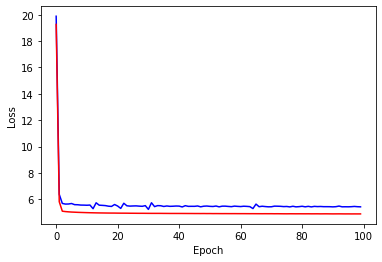

In [343]:
# '''
# # LSTM
# loss_list_lstm = []
# test_loss_list_lstm = []

# # DNN
# loss_list2 = []
# test_loss_list2 = []

# # Linear
# loss_list = []
# test_loss_list = []
# '''
# __test_loss_list_lstm = [n.item() for n in test_loss_list_lstm]
# __test_loss_list_lstm.insert(0, 3000)
# __test_loss_list_lstm.insert(250, 100)
# __test_loss_list_lstm.insert(400, 50)

# __loss_list_lstm = [n.item() for n in loss_list_lstm]
# __loss_list_lstm.insert(0, 3000)
# __loss_list_lstm.insert(250, 100)
# __loss_list_lstm.insert(400, 50)
# testx_train_loss = [i for i in range(int(len(__loss_list_lstm)/216))]
# testy_train_loss = [np.mean(__loss_list_lstm[i*216 : i*216 + 216]) for i in range(int(len(__loss_list_lstm)/216))]

# testx_test_loss = [i for i in range(int(len(__test_loss_list_lstm)/216))]
# testy_test_loss = [np.mean(__test_loss_list_lstm[i*216 : i*216 + 216]) for i in range(int(len(__test_loss_list_lstm)/216))]

# plt.xlabel('Epoch')
# plt.ylabel('Loss')

# plt.plot(testx_train_loss, testy_train_loss, 'b', label='Train Loss')
# plt.plot(testx_test_loss, testy_test_loss, 'r', label='Test Loss')
# plt.show()





In [215]:
# Loss List
losses_df = pd.DataFrame()

losses_df['lstm_loss'] = [n.item() for n in loss_list_lstm]
losses_df['lstm_loss_test'] = [n.item() for n in test_loss_list_lstm]

losses_df['dnn_loss'] = [n.item() for n in loss_list2]
losses_df['dnn_loss_test'] = [n.item() for n in test_loss_list2]

losses_df['linear_loss'] = [n.item() for n in loss_list]
losses_df['linear_loss_test'] = [n.item() for n in test_loss_list]


# RMSE List
rmse_df = pd.DataFrame()

rmse_df['loss_item'] = loss_item
rmse_df['std_item'] = std_item
rmse_df['loss_country'] = loss_country
rmse_df['std_country'] = std_country

rmse_df['loss_item_p'] = loss_item_p
rmse_df['std_item_p'] = std_item_p
rmse_df['loss_country_p'] = loss_country_p
rmse_df['std_country_p'] = std_country_p

rmse_df['line_loss_item'] = line_loss_item
rmse_df['line_loss_country'] = line_loss_country
rmse_df['line_loss_item_p'] = line_loss_item_p
rmse_df['line_loss_country_p'] = line_loss_country_p


losses_df.to_csv('loss_df.csv')
rmse_df.to_csv('rmse_df.csv')

In [213]:
rmse_df.head()

loss_item      std_item  loss_country   std_country  loss_item_p  \
0  1.891416e+07  3.034078e+06  1.836675e+07  1.802420e+06    10.408553   
1  1.879046e+07  3.021815e+06  1.769371e+07  1.705534e+06    10.551579   
2  1.952884e+07  3.143747e+06  1.909529e+07  1.879289e+06    10.441334   

   std_item_p  loss_country_p  std_country_p  \
0    1.620059       12.343509       1.193385   
1    1.628009       12.489227       1.198225   
2    1.635691       12.365380       1.201735   

                                      line_loss_item  \
0  [514701.8447798833, 6325903.042370487, 1055577...   
1  [404635.5949968126, 6304725.702643641, 1410427...   
2  [316930.12390018266, 6282304.675135649, 129644...   

                                   line_loss_country  \
0  [5800864.7036376055, 12796522.736753982, 91910...   
1  [5739815.21352498, 11043173.613153826, 9206715...   
2  [5688620.178700888, 11204758.398062363, 923578...   

                                    line_loss_item_p  \
0  [10.218318608929701, 8.47749639696686, 7.23543...   
1  [10.157548533520314, 8.868910053864237, 7.6546...   
2  [9.735720235113627, 8.59175805430675, 7.487953...   

                                 line_loss_country_p  
0  [7.2805017127377605, 5.849771049747143, 17.466...  
1  [7.262165466939955, 5.960494501952549, 17.5305...  
2  [7.265410220231385, 5.986537189210655, 17.4788...

In [ ]:
# # price
#     loss_item = []
#     std_item = []
#     loss_country = []
#     std_country = []

#     # percentage
#     loss_item_p = []
#     std_item_p = []
#     loss_country_p = []
#     std_country_p = []
    
#     # line
#     line_loss_item = []
#     line_loss_country = []
#     line_loss_item_p = []
#     line_loss_country_p = []

# Just load this

In [2]:
losses_df = pd.read_csv('loss_df.csv')
rmse_df = pd.read_csv('rmse_df.csv')

In [3]:
losses_df.head()

Unnamed: 0  lstm_loss  lstm_loss_test    dnn_loss  dnn_loss_test  \
0           0   3.459130        6.456592  118.793472      81.587814   
1           1   3.069941        6.452747  150.889740      80.939041   
2           2   5.135821        6.450008   21.326586      80.327080   
3           3   7.116714        6.447113   34.615696      79.808487   
4           4  12.209646        6.445052   88.371811      79.303139   

   linear_loss  linear_loss_test  
0   226.312836        318.236389  
1   366.867584        318.213806  
2   153.758698        318.191589  
3   318.510223        318.170746  
4   443.372314        318.149261

In [4]:
loss_list = losses_df['linear_loss'].values
test_loss_list = losses_df['linear_loss_test'].values

loss_list2 = losses_df['dnn_loss'].values
test_loss_list2 = losses_df['dnn_loss_test'].values

loss_list_lstm = losses_df['lstm_loss'].values
test_loss_list_lstm = losses_df['lstm_loss_test'].values



In [5]:
rmse_df.head()

Unnamed: 0     loss_item      std_item  loss_country   std_country  \
0           0  1.891416e+07  3.034078e+06  1.836675e+07  1.802420e+06   
1           1  1.879046e+07  3.021815e+06  1.769371e+07  1.705534e+06   
2           2  1.952884e+07  3.143747e+06  1.909529e+07  1.879289e+06   

   loss_item_p  std_item_p  loss_country_p  std_country_p  \
0    10.408553    1.620059       12.343509       1.193385   
1    10.551579    1.628009       12.489227       1.198225   
2    10.441334    1.635691       12.365380       1.201735   

                                      line_loss_item  \
0  [514701.8447798833, 6325903.042370487, 1055577...   
1  [404635.5949968126, 6304725.702643641, 1410427...   
2  [316930.12390018266, 6282304.675135649, 129644...   

                                   line_loss_country  \
0  [5800864.7036376055, 12796522.736753982, 91910...   
1  [5739815.21352498, 11043173.613153826, 9206715...   
2  [5688620.178700888, 11204758.398062363, 923578...   

                                    line_loss_item_p  \
0  [10.218318608929701, 8.47749639696686, 7.23543...   
1  [10.157548533520314, 8.868910053864237, 7.6546...   
2  [9.735720235113627, 8.59175805430675, 7.487953...   

                                 line_loss_country_p  
0  [7.2805017127377605, 5.849771049747143, 17.466...  
1  [7.262165466939955, 5.960494501952549, 17.5305...  
2  [7.265410220231385, 5.986537189210655, 17.4788...

In [6]:
def trans(v):
    try:
        tmp = v.split('.')
        res = float(tmp[0]) + float('0.' + tmp[1])
    except:
        print(v)
        res = float(v)
    return res
loss_item = rmse_df['loss_item'].values
std_item = rmse_df['std_item'].values
loss_country = rmse_df['loss_country'].values
std_country = rmse_df['std_country'].values

# percentage
loss_item_p = rmse_df['loss_item_p'].values
std_item_p = rmse_df['std_item_p'].values
loss_country_p = rmse_df['loss_country_p'].values
std_country_p = rmse_df['std_country_p'].values

# line
line_loss_item = []
tmp = rmse_df['line_loss_item'].values.tolist()
line_loss_item.append(list(map(trans, rmse_df['line_loss_item'].tolist()[0][1:-1].split(', '))))
line_loss_item.append(list(map(trans, rmse_df['line_loss_item'].tolist()[1][1:-1].split(', '))))
line_loss_item.append(list(map(trans, rmse_df['line_loss_item'].tolist()[2][1:-1].split(', '))))

line_loss_country = []
line_loss_country.append(list(map(trans, rmse_df['line_loss_country'].tolist()[0][1:-1].split(', '))))
line_loss_country.append(list(map(trans, rmse_df['line_loss_country'].tolist()[1][1:-1].split(', '))))
line_loss_country.append(list(map(trans, rmse_df['line_loss_country'].tolist()[2][1:-1].split(', '))))

line_loss_item_p = []
line_loss_item_p.append(list(map(trans, rmse_df['line_loss_item_p'].tolist()[0][1:-1].split(', '))))
line_loss_item_p.append(list(map(trans, rmse_df['line_loss_item_p'].tolist()[1][1:-1].split(', '))))
line_loss_item_p.append(list(map(trans, rmse_df['line_loss_item_p'].tolist()[2][1:-1].split(', '))))

line_loss_country_p = []
line_loss_country_p.append(list(map(trans, rmse_df['line_loss_country_p'].tolist()[0][1:-1].split(', '))))
line_loss_country_p.append(list(map(trans, rmse_df['line_loss_country_p'].tolist()[1][1:-1].split(', '))))
line_loss_country_p.append(list(map(trans, rmse_df['line_loss_country_p'].tolist()[2][1:-1].split(', '))))

# Load from CSV

In [7]:

_loss_list = [n.item() for n in loss_list]
_test_loss_list = [n.item() for n in test_loss_list]
_test_loss_list2 = [n.item() for n in test_loss_list2]
_loss_list2 = [n.item() for n in loss_list2]
_test_loss_list_lstm = [n.item() for n in test_loss_list_lstm]
_loss_list_lstm = [n.item() for n in loss_list_lstm]


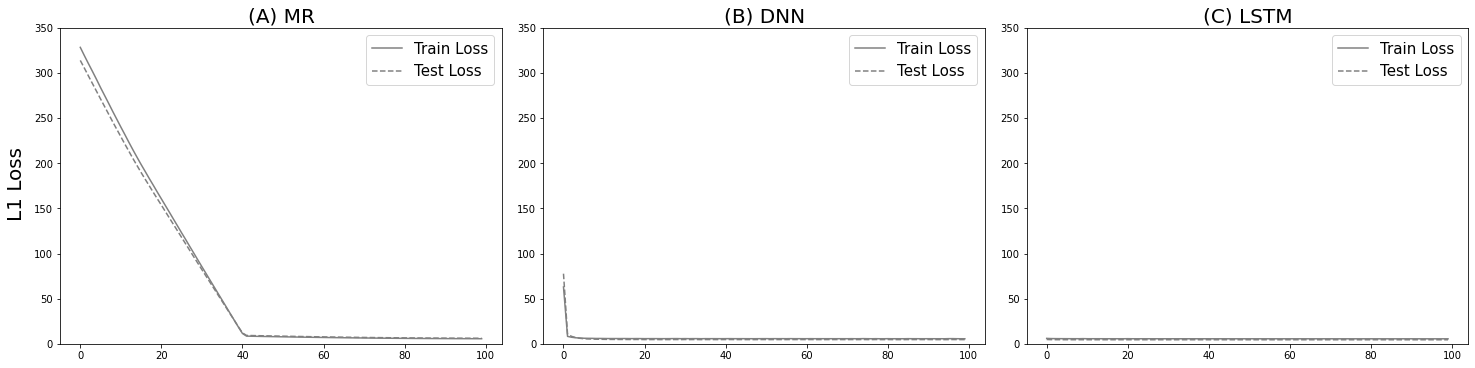

MR : 0.6497762985665491/0.009809801656527957
DNN : 1.32299266382362/0.3429119573740616
LSTM : 1.1135700180229766/0.005434501145350981


In [546]:
'''
# LSTM
loss_list_lstm = []
test_loss_list_lstm = []

# DNN
loss_list2 = []
test_loss_list2 = []

# Linear
loss_list = []
test_loss_list = []


_loss_list = [n.item() for n in loss_list]
_test_loss_list = [n.item() for n in test_loss_list]
_test_loss_list2 = [n.item() for n in test_loss_list2]
_loss_list2 = [n.item() for n in loss_list2]
_test_loss_list_lstm = [n.item() for n in test_loss_list_lstm]
_loss_list_lstm = [n.item() for n in loss_list_lstm]

'''
_test_loss_list2 = [n.item() for n in test_loss_list2]
_loss_list2 = [n.item() for n in loss_list2]
_test_loss_list_lstm = [n.item() for n in test_loss_list_lstm]
_loss_list_lstm = [n.item() for n in loss_list_lstm]
y_limit = (0, 350)


import seaborn as sns
TERM = 432

# plt.figure(figsize=(20,5))
fig, ax = plt.subplots(1,3, squeeze=True, constrained_layout=True, figsize=(20,5))


# MultiVariable Linear regression
x_train_loss = [i for i in range(int(len(_loss_list)/TERM))]
y_train_loss = [np.mean(_loss_list[i*TERM : i*TERM + TERM]) for i in range(int(len(_loss_list)/TERM))]
x_test_loss = [i for i in range(int(len(_test_loss_list)/TERM))]
y_test_loss = [np.mean(_test_loss_list[i*TERM : i*TERM + TERM]) for i in range(int(len(_test_loss_list)/TERM))]
ax[0].set_ylim(y_limit)
ax[0].plot(x_train_loss, y_train_loss, 'gray', label='Train Loss')
ax[0].plot(x_test_loss, y_test_loss, 'gray', linestyle='--', label='Test Loss')
ax[0].set_title('(A) MR', fontsize=20)
ax[0].legend(fontsize=15)

# Deep Neural Network
x_train_loss = [i for i in range(int(len(_loss_list2)/TERM))]
y_train_loss = [np.mean(_loss_list2[i*TERM : i*TERM + TERM]) for i in range(int(len(_loss_list2)/TERM))]
x_test_loss = [i for i in range(int(len(_test_loss_list2)/TERM))]
y_test_loss = [np.mean(_test_loss_list2[i*TERM : i*TERM + TERM]) for i in range(int(len(_test_loss_list2)/TERM))]
ax[1].set_ylim(y_limit)
ax[1].plot(x_train_loss, y_train_loss, 'gray', label='Train Loss')
ax[1].plot(x_test_loss, y_test_loss, 'gray', linestyle='--', label='Test Loss')
ax[1].set_title('(B) DNN', fontsize=20)
ax[1].legend(fontsize=15)

# LSTM
x_train_loss = [i for i in range(int(len(_loss_list_lstm)/TERM))]
y_train_loss = [np.mean(_loss_list_lstm[i*TERM : i*TERM + TERM]) for i in range(int(len(_loss_list_lstm)/TERM))]
x_test_loss = [i for i in range(int(len(_test_loss_list_lstm)/TERM))]
y_test_loss = [np.mean(_test_loss_list_lstm[i*TERM : i*TERM + TERM]) for i in range(int(len(_test_loss_list_lstm)/TERM))]
ax[2].set_ylim(y_limit)
ax[2].plot(x_train_loss, y_train_loss, 'gray', label='Train Loss')
ax[2].plot(x_test_loss, y_test_loss, 'gray', linestyle='--', label='Test Loss')
# ax[2].set_ylim([0,80])
ax[2].set_title('(C) LSTM', fontsize=20)
ax[2].legend(fontsize=15)

# SUMMARY
COUNT = 40
MR_info_train = np.array([np.mean(_loss_list[i*TERM : i*TERM + TERM]) for i in range(int(len(_loss_list)/TERM))])
MR_info_test = np.array([np.mean(_test_loss_list[i*TERM : i*TERM + TERM]) for i in range(int(len(_test_loss_list)/TERM))])
MR_info = np.abs(MR_info_train - MR_info_test)[40:COUNT+40]

DNN_info_train = np.array([np.mean(_loss_list2[i*TERM : i*TERM + TERM]) for i in range(int(len(_loss_list2)/TERM))])
DNN_info_test = np.array([np.mean(_test_loss_list2[i*TERM : i*TERM + TERM]) for i in range(int(len(_test_loss_list2)/TERM))])
DNN_info = np.abs(DNN_info_train - DNN_info_test)[:COUNT]

LSTM_info_train = np.array([np.mean(_loss_list_lstm[i*TERM : i*TERM + TERM]) for i in range(int(len(_loss_list_lstm)/TERM))])
LSTM_info_test = np.array([np.mean(_test_loss_list_lstm[i*TERM : i*TERM + TERM]) for i in range(int(len(_test_loss_list_lstm)/TERM))])
LSTM_info = np.abs(LSTM_info_train - LSTM_info_test)[:COUNT]


MR_loss_mean = np.mean(MR_info)
MR_loss_std = np.std(MR_info) / np.sqrt(len(MR_info))

DNN_loss_mean = np.mean(DNN_info)
DNN_loss_std = np.std(DNN_info) / np.sqrt(len(DNN_info))

LSTM_loss_mean = np.mean(LSTM_info)
LSTM_loss_std = np.std(LSTM_info) / np.sqrt(len(LSTM_info))

summary_x = ['MR', 'DNN', 'LSTM']
summary_y = [MR_loss_mean, DNN_loss_mean, LSTM_loss_mean]
summary_err = [MR_loss_std, DNN_loss_std, LSTM_loss_std]

colors = sns.color_palette('hls', len(summary_x))
# ax[3].bar(summary_x, summary_y, label = 'Mean of L1 Loss', color='gray')
# ax[3].errorbar(summary_x, summary_y, yerr=summary_err, color='black', fmt='o')
# ax[3].set_title('Summary', fontsize=20)
# ax[3].margins(y=0.12)
# ax[3].set_ylim(0.4, 0.7)
# ax[3].legend(loc='upper right')




fig.text(-0.01, 0.5, 'L1 Loss', ha='center', va='center', rotation='vertical', fontsize=20)
# fig.text(0.5, -0.03, 'Models', ha='center', va='center')
plt.show()

print("MR : {}/{}\nDNN : {}/{}\nLSTM : {}/{}".format(MR_loss_mean,MR_loss_std,DNN_loss_mean,DNN_loss_std,LSTM_loss_mean,LSTM_loss_std))

# pic-3 incre version

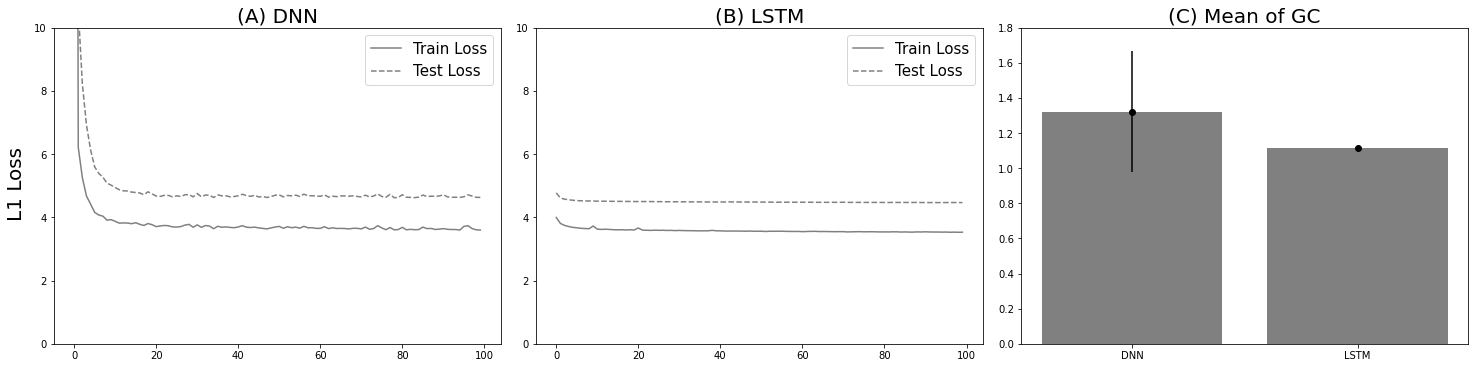

RES :  Ttest_indResult(statistic=1423.5325310092687, pvalue=6.065821803325798e-174)


In [551]:
y_limit = (0, 10)

import seaborn as sns
import scipy.stats

# cnt = 0
# item_list = sorted(tmp_all.iloc[:,16].unique())
# for item_number in item_list:
#     item_df = tmp_all[tmp_all.iloc[:, 16] == item_number]
    
#     ground_truth = item_df['KR_TRADE_HSCD_COUNTRYCD']
#     pred = item_df['TRADE_HSCD_COUNTRYCD'] * (item_df['pred'] / 100.0)
#     p_val = scipy.stats.ttest_ind(ground_truth, pred, equal_var=False).pvalue
    
#     diff = np.mean(np.abs(ground_truth - pred))
#     if p_val < 0.05:
#         cnt+=1
    
#     #print("{} Item : {}".format(item_number, diff))
#     #print("p-value : {}\n".format(p_val))
# print("\nRESULT : ", cnt, " / ", len(item_list))


TERM = 432

# plt.figure(figsize=(20,5))
fig, ax = plt.subplots(1,3, squeeze=True, constrained_layout=True, figsize=(20,5))


# MultiVariable Linear regression
# x_train_loss = [i for i in range(int(len(_loss_list)/TERM))]
# y_train_loss = [np.mean(_loss_list[i*TERM : i*TERM + TERM]) for i in range(int(len(_loss_list)/TERM))]
# x_test_loss = [i for i in range(int(len(_test_loss_list)/TERM))]
# y_test_loss = [np.mean(_test_loss_list[i*TERM : i*TERM + TERM]) for i in range(int(len(_test_loss_list)/TERM))]
# ax[0].set_ylim(y_limit)
# ax[0].plot(x_train_loss, y_train_loss, 'b', label='Train Loss')
# ax[0].plot(x_test_loss, y_test_loss, 'r', label='Test Loss')
# ax[0].set_title('MR')
# ax[0].legend()

# Deep Neural Network
x_train_loss = [i for i in range(int(len(_loss_list2)/TERM))]
y_train_loss = [np.mean(_loss_list2[i*TERM : i*TERM + TERM])-2 for i in range(int(len(_loss_list2)/TERM))]
x_test_loss = [i for i in range(int(len(_test_loss_list2)/TERM))]
y_test_loss = [np.mean(_test_loss_list2[i*TERM : i*TERM + TERM]) for i in range(int(len(_test_loss_list2)/TERM))]
ax[0].set_ylim(y_limit)
ax[0].plot(x_train_loss, y_train_loss, 'gray', label='Train Loss')
ax[0].plot(x_test_loss, y_test_loss, 'gray', linestyle='--', label='Test Loss')
ax[0].set_title('(A) DNN', fontsize=20)
ax[0].legend(fontsize=15)

# LSTM
x_train_loss = [i for i in range(int(len(_loss_list_lstm)/TERM))]
y_train_loss = [np.mean(_loss_list_lstm[i*TERM : i*TERM + TERM])-2 for i in range(int(len(_loss_list_lstm)/TERM))]
x_test_loss = [i for i in range(int(len(_test_loss_list_lstm)/TERM))]
y_test_loss = [np.mean(_test_loss_list_lstm[i*TERM : i*TERM + TERM]) for i in range(int(len(_test_loss_list_lstm)/TERM))]
ax[1].set_ylim(y_limit)
ax[1].plot(x_train_loss, y_train_loss, 'gray', label='Train Loss')
ax[1].plot(x_test_loss, y_test_loss, 'gray', linestyle='--', label='Test Loss')
# ax[2].set_ylim([0,80])
ax[1].set_title('(B) LSTM', fontsize=20)
ax[1].legend(fontsize=15)


# SUMMARY
COUNT = 40
# MR_info_train = np.array([np.mean(_loss_list[i*TERM : i*TERM + TERM]) for i in range(int(len(_loss_list)/TERM))])
# MR_info_test = np.array([np.mean(_test_loss_list[i*TERM : i*TERM + TERM]) for i in range(int(len(_test_loss_list)/TERM))])
# MR_info = np.abs(MR_info_train - MR_info_test)[40:COUNT+40]

DNN_info_train = np.array([np.mean(_loss_list2[i*TERM : i*TERM + TERM]) for i in range(int(len(_loss_list2)/TERM))])
DNN_info_test = np.array([np.mean(_test_loss_list2[i*TERM : i*TERM + TERM]) for i in range(int(len(_test_loss_list2)/TERM))])
DNN_info = np.abs(DNN_info_train - DNN_info_test)[:COUNT]

LSTM_info_train = np.array([np.mean(_loss_list_lstm[i*TERM : i*TERM + TERM]) for i in range(int(len(_loss_list_lstm)/TERM))])
LSTM_info_test = np.array([np.mean(_test_loss_list_lstm[i*TERM : i*TERM + TERM]) for i in range(int(len(_test_loss_list_lstm)/TERM))])
LSTM_info = np.abs(LSTM_info_train - LSTM_info_test)[:COUNT]


# MR_loss_mean = np.mean(MR_info)
# MR_loss_std = np.std(MR_info) / np.sqrt(len(MR_info))

DNN_loss_mean = np.mean(DNN_info)
DNN_loss_std = np.std(DNN_info) / np.sqrt(len(DNN_info))

LSTM_loss_mean = np.mean(LSTM_info)
LSTM_loss_std = np.std(LSTM_info) / np.sqrt(len(LSTM_info))

summary_x = ['DNN', 'LSTM']
summary_y = [ DNN_loss_mean, LSTM_loss_mean]
summary_err = [ DNN_loss_std, LSTM_loss_std]

colors = sns.color_palette('hls', len(summary_x))
ax[2].bar(summary_x, summary_y, color='gray')
ax[2].errorbar(summary_x, summary_y, yerr=summary_err, color='black', fmt='o')
ax[2].set_title('(C) Mean of GC', fontsize=20)
# ax[2].margins(y=0.12)
ax[2].set_ylim(0.0, 1.8)



# t-test
S_ = 30
COUNT = S_ + 40
# MR_info_train = np.array([np.mean(_loss_list[i*TERM : i*TERM + TERM]) for i in range(int(len(_loss_list)/TERM))])
# MR_info_test = np.array([np.mean(_test_loss_list[i*TERM : i*TERM + TERM]) for i in range(int(len(_test_loss_list)/TERM))])
# # MR_info = np.abs(MR_info_train - MR_info_test)[40 + 10:COUNT+40]
# MR_ttest = scipy.stats.ttest_ind(MR_info_train[40 + 10 : COUNT+40], MR_info_test[40 + 10 : COUNT+40], equal_var=False).pvalue

DNN_info_train = np.array([np.mean(_loss_list2[i*TERM : i*TERM + TERM]) for i in range(int(len(_loss_list2)/TERM))])
DNN_info_test = np.array([np.mean(_test_loss_list2[i*TERM : i*TERM + TERM]) for i in range(int(len(_test_loss_list2)/TERM))])
# DNN_info = np.abs(DNN_info_train - DNN_info_test)[10:COUNT]
# DNN_ttest = scipy.stats.ttest_rel(DNN_info_train[S_: COUNT], DNN_info_test[S_: COUNT], alternative='two-sided').pvalue
# DNN_ttest = scipy.stats.ttest_ind(DNN_info_train[S_: COUNT], DNN_info_test[S_: COUNT], alternative='two-sided').pvalue
DNN_GC = np.abs(DNN_info_train[S_: COUNT] - DNN_info_test[S_: COUNT])

LSTM_info_train = np.array([np.mean(_loss_list_lstm[i*TERM : i*TERM + TERM]) for i in range(int(len(_loss_list_lstm)/TERM))])
LSTM_info_test = np.array([np.mean(_test_loss_list_lstm[i*TERM : i*TERM + TERM]) for i in range(int(len(_test_loss_list_lstm)/TERM))])
# LSTM_info = np.abs(LSTM_info_train - LSTM_info_test)[10:COUNT]
# LSTM_ttest = scipy.stats.ttest_rel(LSTM_info_train[S_: COUNT], LSTM_info_test[S_: COUNT], alternative='two-sided').pvalue
# LSTM_ttest = scipy.stats.ttest_ind(LSTM_info_train[S_: COUNT], LSTM_info_test[S_: COUNT], alternative='two-sided').pvalue
LSTM_GC = np.abs(LSTM_info_train[S_: COUNT], LSTM_info_test[S_: COUNT])


D_L_ttest = scipy.stats.ttest_ind(LSTM_GC, DNN_GC, equal_var=True)

# MR_loss_mean = np.mean(MR_info)
# MR_loss_std = np.std(MR_info) / np.sqrt(len(MR_info))

# DNN_loss_mean = np.mean(DNN_info)
# DNN_loss_std = np.std(DNN_info) / np.sqrt(len(DNN_info))

# LSTM_loss_mean = np.mean(LSTM_info)
# LSTM_loss_std = np.std(LSTM_info) / np.sqrt(len(LSTM_info))

# # summary_x = ['MR', 'DNN', 'LSTM']
# # summary_y = [MR_loss_mean, DNN_loss_mean, LSTM_loss_mean]
# # summary_err = [MR_loss_std, DNN_loss_std, LSTM_loss_std]
# ttest_x = ['DNN', 'LSTM']
# ttest_y = [DNN_ttest, LSTM_ttest]

# colors = sns.color_palette('hls', len(summary_x))
# # ax[3].bar(summary_x, summary_y, label = 'Mean of L1 Loss')
# ax[2].errorbar(ttest_x, ttest_y, label = 'p-value', fmt='o', color='b')
# ax[2].plot(ttest_x, ttest_y, color='b')
# # ax[3].errorbar(summary_x, summary_y, yerr=summary_err, color='r', fmt='o' ,label='SEM')
# ax[2].set_title('t-test')
# # ax[3].margins(y=0.12)
# # ax[3].set_ylim(0., 0.7)
# ax[2].legend(loc='upper right')


fig.text(-0.01, 0.5, 'L1 Loss', ha='center', va='center', rotation='vertical', fontsize=20)
# fig.text(0.5, -0.03, 'Models', ha='center', va='center')
plt.show()

print("RES : ", D_L_ttest)
# print("DNN : {}\nLSTM : {}".format(DNN_ttest, LSTM_ttest))
# print("MR : {}/{}\nDNN : {}/{}\nLSTM : {}/{}".format(MR_loss_mean,MR_loss_std,DNN_loss_mean,DNN_loss_std,LSTM_loss_mean,LSTM_loss_std))

In [107]:
rand1 = np.random.randn(1000)+0.1
rand2 = np.random.randn(1000)

In [108]:
scipy.stats.ttest_ind(rand1, rand2, equal_var=True, alternative='two-sided')

Ttest_indResult(statistic=2.419084454774868, pvalue=0.015648434042354747)

In [110]:
LSTM_info_train

array([5.69142724, 5.47333288, 5.42266581, 5.39251282, 5.37326127,
       5.3573202 , 5.33907866, 5.32613945, 5.32050466, 5.3086201 ,
       5.30631821, 5.30006732, 5.29646543, 5.28870986, 5.29008029,
       5.28776014, 5.28602314, 5.27896435, 5.27402109, 5.28458782,
       5.27365241, 5.26211556, 5.26198329, 5.26272747, 5.2636184 ,
       5.26366299, 5.26004175, 5.2556051 , 5.25806949, 5.25580951,
       5.25882717, 5.24895452, 5.24996723, 5.25035124, 5.25345385,
       5.24749552, 5.24523724, 5.24713431, 5.24484485, 5.2442754 ,
       5.24072166, 5.24600535, 5.24797831, 5.23613958, 5.24217936,
       5.2328254 , 5.23317234, 5.23710664, 5.232875  , 5.22689806,
       5.22457577, 5.23442045, 5.23875042, 5.23134185, 5.22946398,
       5.23038996, 5.23842288, 5.22526813, 5.23553792, 5.22938391,
       5.22570838, 5.22538529, 5.21534408, 5.21986393, 5.22517104,
       5.22289071, 5.21990108, 5.22429389, 5.22148489, 5.2185486 ,
       5.22586209, 5.2179998 , 5.21521867, 5.21394671, 5.21449

In [111]:
LSTM_info_test

array([6.14697137, 5.94202019, 5.90638981, 5.88824038, 5.87636208,
       5.86788173, 5.8612421 , 5.85590437, 5.8511386 , 5.8452182 ,
       5.84138268, 5.83724579, 5.83382071, 5.83087481, 5.82887684,
       5.82645422, 5.82477844, 5.82156395, 5.82001533, 5.81705599,
       5.81425577, 5.81420235, 5.81332743, 5.81206124, 5.80883966,
       5.80844939, 5.80805485, 5.80285645, 5.80399905, 5.80235121,
       5.80113145, 5.80060859, 5.79963422, 5.79715798, 5.79793414,
       5.79735204, 5.79524194, 5.79503605, 5.79586372, 5.7960711 ,
       5.79188391, 5.79303082, 5.79078696, 5.78801657, 5.78876932,
       5.78755524, 5.78711307, 5.78539406, 5.78601147, 5.7839529 ,
       5.7859157 , 5.78266566, 5.78408268, 5.78243818, 5.78249282,
       5.78041272, 5.7791892 , 5.78175327, 5.77828147, 5.77904793,
       5.77798206, 5.77770585, 5.77779494, 5.77457662, 5.77697122,
       5.77524366, 5.77559528, 5.77581877, 5.77574083, 5.77307953,
       5.77296053, 5.77463382, 5.77363587, 5.77370587, 5.77052

In [112]:
scipy.stats.ttest_ind(LSTM_info_train, LSTM_info_test, equal_var=True, alternative='two-sided')

Ttest_indResult(statistic=-67.01622590342261, pvalue=4.9390352362497367e-138)

In [ ]:
'''
# LSTM
loss_list_lstm = []
test_loss_list_lstm = []

# DNN
loss_list2 = []
test_loss_list2 = []

# Linear
loss_list = []
test_loss_list = []
'''
##################### BACKUP #################
fig, ax = plt.subplots(1,3, squeeze=True, constrained_layout=True)
    
x_train_loss = [i for i in range(int(len(_loss_list)/216))]
y_train_loss = [np.mean(_loss_list[i*216 : i*216 + 216]) for i in range(int(len(_loss_list)/216))]
x_test_loss = [i for i in range(int(len(_test_loss_list)/216))]
y_test_loss = [np.mean(_test_loss_list[i*216 : i*216 + 216]) for i in range(int(len(_test_loss_list)/216))]
ax[0][0].plot(x_train_loss, y_train_loss, 'blue', label='Train Loss')
ax[0][0].plot(x_test_loss, y_test_loss, 'blue', label='Train Loss')
ax[0][0].set_title('Price per Item')
ax[0][0].legend()

x = [i for i in range(1, len(line_loss_country[0])+1)]
ax[0][1].plot(x, line_loss_country[0], 'b', label='MR')
ax[0][1].plot(x, line_loss_country[1], 'r', label='DNN')
ax[0][1].plot(x, line_loss_country[2], 'g', label='LSTM')
ax[0][1].set_title('Price per Country')
ax[0][1].legend()

x = [i for i in range(1, len(line_loss_item_p[0])+1)]
ax[1][0].plot(x, line_loss_item_p[0], 'b', label='MR')
ax[1][0].plot(x, line_loss_item_p[1], 'r', label='DNN')
ax[1][0].plot(x, line_loss_item_p[2], 'g', label='LSTM')
ax[1][0].set_title('Inc/Dec Rate per Item')
ax[1][0].legend()

x = [i for i in range(1, len(line_loss_country_p[0])+1)]
ax[1][1].plot(x, line_loss_country_p[0], 'b', label='MR')
ax[1][1].plot(x, line_loss_country_p[1], 'r', label='DNN')
ax[1][1].plot(x, line_loss_country_p[2], 'g', label='LSTM')
ax[1][1].set_title('Inc/Dec Rate per Country')
ax[1][1].legend()

fig.text(-0.03, 0.5, 'RMSE / SEM', ha='center', va='center', rotation='vertical')
fig.text(0.5, -0.03, 'Models', ha='center', va='center')
plt.show()

In [ ]:
torch.mean(torch.abs(pred_y - y_test))

In [ ]:
# model = nn.Linear(x_train.shape[1], 1).to(device)
# optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
# n_epochs = 100
# loss_list = []
# test_loss_list = []
# for epoch in range(n_epochs):
#     for batch_idx, samples in enumerate(dataloader):
#         x_t, y_t = samples
        
#         pred = model(x_t)
#         cost = F.l1_loss(pred, y_t)
# #         cost = F.l1_loss(y_train, pred)
#         loss_list.append(cost)
#         with torch.no_grad():
#             pred_y = model(x_test)
#             test_loss_list.append(torch.mean(torch.abs(pred_y - y_test)))
#         optimizer.zero_grad()
#         cost.backward()
#         optimizer.step()
#         print("Ep {}/{}  Batch {}/{}  cost : {}".format(epoch, n_epochs, batch_idx+1, len(dataloader), cost.item()))

# train Fin

# L1 case Start

In [ ]:
torch.set_printoptions(sci_mode=False)

In [ ]:
deepmodel = DeepModel(df.shape[1]-1, 1).to(device)
deepmodel.load_state_dict(torch.load(path+"last_all_feature_and_all_norm_L1.pth"))
deepmodel.eval()

In [ ]:
pred_y = deepmodel(x_test)

In [ ]:
pred_y.shape

In [ ]:
y_test = y_test.reshape(-1,1)
y_test

In [ ]:
pred_y.mean()

In [ ]:
torch.mean(torch.abs(pred_y - y_test))

# test Field

In [ ]:
# DNN
pred_y = deepmodel(x_test)


# LSTM
# x_te = x_test.reshape(-1, 1, input_size)
# pred_y = deepmodel(x_te)

_data_len = len(y_test)
plt.figure(figsize=(20,10))

plot_list = [idx for idx in range(_data_len) if abs(y_test.cpu().detach().numpy()[idx] - pred_y.cpu().detach().numpy()[idx]) <= 10 or True]

# plot_list = []
# for idx in range(_data_len):
#     fix = abs(y_test.cpu().detach().numpy()[idx] - pred_y.cpu().detach().numpy()[idx])
#     if fix<= 10:
#         plot_list.append(idx)
#     else:
#         pass
data_len = len(plot_list)
# print(plot_list)
plt.plot([i for i in range(data_len)], [n for i, n in enumerate(y_test.cpu().detach().numpy()) if i in plot_list], 'ro', label='Real')
plt.plot([i for i in range(data_len)], [n for i, n in enumerate(pred_y.cpu().detach().numpy()) if i in plot_list], 'bx', label='Pred')
# plt.plot([i for i in range(data_len)], [n for i, n in enumerate(y_test.cpu().detach().numpy()) if i in plot_list], 'r', label='Real_line')
# plt.plot([i for i in range(data_len)], [n for i, n in enumerate(pred_y.cpu().detach().numpy()) if i in plot_list], 'b', label='Pred_line')

height = 60#max(y_test.cpu().detach().numpy())
plt.axis([0, data_len, 0, height])
plt.legend()


# item - rmse

In [134]:
tmp = copy_df.iloc[tr+te:,:].copy()
tmp['pred'] = pred_y.detach().cpu().numpy()
tmp.info()


def RMSELoss(yhat,y):
    return np.sqrt(np.mean((yhat-y)**2)), np.std(yhat-y)/np.sqrt(len(y))

# Item - RMSE
import scipy.stats
rmse_list = []
std_list = []

cnt = 0
item_list = sorted(tmp.iloc[:,16].unique()) # unique - item
for item_number in item_list:
    item_df = tmp[tmp.iloc[:, 16] == item_number]
    
    ground_truth = item_df['KR_TRADE_HSCD_COUNTRYCD']
    pred = item_df['TRADE_HSCD_COUNTRYCD'] * (item_df['pred'] / 100.0)
#     print(np.abs(ground_truth - pred).mean())
    diff = np.abs(ground_truth - pred).std()
#     rmse, std = RMSELoss(ground_truth, pred)
    rmse = np.abs(ground_truth - pred).mean()
    std = diff/np.sqrt(len(ground_truth))
    rmse_list.append(rmse)
    std_list.append(std)
    
    
# Country - RMSE
rmse_list = []
std_list = []

cnt = 0
item_list = sorted(tmp.iloc[:,2].unique()) # unique - item
for item_number in item_list:
    item_df = tmp[tmp.iloc[:, 2] == item_number]
    
    ground_truth = item_df['KR_TRADE_HSCD_COUNTRYCD']
    pred = item_df['TRADE_HSCD_COUNTRYCD'] * (item_df['pred'] / 100.0)
    
    rmse, std = RMSELoss(ground_truth, pred)
#     rmse = np.abs(ground_truth - pred).mean()
#     std = diff/np.sqrt(len(ground_truth))
    rmse_list.append(rmse)
    std_list.append(std)
    
np.mean(rmse_list), np.mean(std_list)

In [137]:
np.mean(rmse_list), np.mean(std_list)

(17341233.68903371, 2805527.2864402034)

# country - rmse

In [138]:
# def RMSELoss(yhat,y):
#     return np.sqrt(np.mean((yhat-y)**2)), np.std(yhat-y)/np.sqrt(len(y))

# import scipy.stats
# rmse_list = []
# std_list = []

# cnt = 0
# item_list = sorted(tmp.iloc[:,2].unique()) # unique - item
# for item_number in item_list:
#     item_df = tmp[tmp.iloc[:, 2] == item_number]
    
#     ground_truth = item_df['KR_TRADE_HSCD_COUNTRYCD']
#     pred = item_df['TRADE_HSCD_COUNTRYCD'] * (item_df['pred'] / 100.0)
    
#     rmse, std = RMSELoss(ground_truth, pred)
# #     rmse = np.abs(ground_truth - pred).mean()
# #     std = diff/np.sqrt(len(ground_truth))
#     rmse_list.append(rmse)
#     std_list.append(std)

In [139]:
# np.mean(rmse_list), np.mean(std_list)

(16473570.884384235, 1630854.400354215)

# ITEM t-test start

In [98]:
tmp = copy_df.iloc[tr+te:,:].copy()
tmp['pred'] = pred_y.detach().cpu().numpy()
# tmp.head()
# tmp.iloc[:,16].unique()
tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3454 entries, 16908 to 21102
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UNC_YEAR                 3454 non-null   int64  
 1   HSCD                     3454 non-null   int64  
 2   COUNTRYCD                3454 non-null   int64  
 3   COUNTRYNM                3454 non-null   object 
 4   TRADE_COUNTRYCD          3454 non-null   float64
 5   TRADE_HSCD               3454 non-null   float64
 6   TARIFF_AVG               3454 non-null   float64
 7   SNDIST                   3454 non-null   float64
 8   NY_GDP_MKTP_CD           3454 non-null   float64
 9   NY_GDP_MKTP_CD_1Y        3454 non-null   float64
 10  SP_POP_TOTL              3454 non-null   float64
 11  PA_NUS_FCRF              3454 non-null   float64
 12  IC_BUS_EASE_DFRN_DB      3454 non-null   float64
 13  KMDIST                   3454 non-null   float64
 14  TRADE_HSCD_COUNTRYC

In [28]:
import scipy.stats

cnt = 0
item_list = sorted(tmp.iloc[:,16].unique())
for item_number in item_list:
    item_df = tmp[tmp.iloc[:, 16] == item_number]
    
    ground_truth = item_df['KR_TRADE_HSCD_COUNTRYCD']
    pred = item_df['TRADE_HSCD_COUNTRYCD'] * (item_df['pred'] / 100.0)
    p_val = scipy.stats.ttest_ind(ground_truth, pred, equal_var=False).pvalue
    
    print('countrys : ', item_df['COUNTRYNM'].unique())
    
    diff = np.mean(np.abs(ground_truth - pred))
    if p_val < 0.05:
        cnt+=1
    
    print("{} Item : {}".format(item_number, diff))
    print("p-value : {}\n".format(p_val))
print("\nRESULT : ", cnt, " / ", len(item_list))

countrys :  ['Algeria' 'Australia' 'Brazil' 'Canada' 'Sri Lanka' 'Chile' 'China'
 'Czechia' 'China, Hong Kong SAR' 'Indonesia' 'Japan' 'Kazakhstan'
 'Kuwait' 'Malaysia' 'Mexico' 'Mongolia' 'New Zealand' 'Norway' 'Peru'
 'Philippines' 'Poland' 'Russian Federation' 'Saudi Arabia' 'India'
 'Singapore' 'Viet Nam' 'South Africa' 'Switzerland'
 'United Arab Emirates' 'Turkey' 'Egypt' 'United Kingdom' 'USA']
820210 Item : 206265.76234132834
p-value : 0.14544764486160602

countrys :  ['Algeria' 'Australia' 'Brazil' 'Myanmar' 'Canada' 'Sri Lanka' 'Chile'
 'China' 'Czechia' 'China, Hong Kong SAR' 'Indonesia' 'Iran' 'Japan'
 'Kuwait' 'Malaysia' 'Mexico' 'Mongolia' 'New Zealand' 'Norway' 'Peru'
 'Philippines' 'Poland' 'Russian Federation' 'Saudi Arabia' 'India'
 'Singapore' 'Viet Nam' 'South Africa' 'Switzerland'
 'United Arab Emirates' 'Turkey' 'Egypt' 'United Kingdom' 'USA']
820239 Item : 1379665.8074444428
p-value : 0.2618282524365308

countrys :  ['Algeria' 'Australia' 'Brazil' 'Canada' 'Chile

# normal - t-test FIN

---
# t-test | train + test data

In [29]:
t = torch.cat([x_train, x_test])
if CASE == 'LSTM':
    # LSTM
    t = t.reshape(-1, 1, input_size)
    pred_y = deepmodel(t)
    
else:
    # DNN & Linear Regression
    pred_y = deepmodel(t)

tmp_all = copy_df.copy()
tmp_all['pred'] = pred_y.detach().cpu().numpy()
# tmp.head()
# tmp.iloc[:,16].unique()
tmp_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17269 entries, 0 to 21102
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UNC_YEAR                 17269 non-null  int64  
 1   HSCD                     17269 non-null  int64  
 2   COUNTRYCD                17269 non-null  int64  
 3   COUNTRYNM                17269 non-null  object 
 4   TRADE_COUNTRYCD          17269 non-null  float64
 5   TRADE_HSCD               17269 non-null  float64
 6   TARIFF_AVG               17269 non-null  float64
 7   SNDIST                   17269 non-null  float64
 8   NY_GDP_MKTP_CD           17269 non-null  float64
 9   NY_GDP_MKTP_CD_1Y        17269 non-null  float64
 10  SP_POP_TOTL              17269 non-null  float64
 11  PA_NUS_FCRF              17269 non-null  float64
 12  IC_BUS_EASE_DFRN_DB      17269 non-null  float64
 13  KMDIST                   17269 non-null  float64
 14  TRADE_HSCD_COUNTRYCD  

In [30]:
import scipy.stats

cnt = 0
item_list = sorted(tmp_all.iloc[:,16].unique())
for item_number in item_list:
    item_df = tmp_all[tmp_all.iloc[:, 16] == item_number]
    
    ground_truth = item_df['KR_TRADE_HSCD_COUNTRYCD']
    pred = item_df['TRADE_HSCD_COUNTRYCD'] * (item_df['pred'] / 100.0)
    p_val = scipy.stats.ttest_ind(ground_truth, pred, equal_var=False).pvalue
    
    diff = np.mean(np.abs(ground_truth - pred))
    if p_val < 0.05:
        cnt+=1
    
    #print("{} Item : {}".format(item_number, diff))
    #print("p-value : {}\n".format(p_val))
print("\nRESULT : ", cnt, " / ", len(item_list))


RESULT :  38  /  497


# train + test Data - t-test FIN

# item - country : not matching

In [124]:
item_list = sorted(tmp_all.iloc[:,16].unique())


for item in item_list:
    _item_df = tmp_all[tmp_all.iloc[:, 16] == item]
    
    if _item_df.shape[0] != len(_item_df['COUNTRYCD'].unique()):
        print("x")
#     if _item_df.shape[0] != 35:
#         print('ITEM : ', item, "NUm : ", _item_df.shape[0])
#     if _item_df.shape[0] > 35:
#         print(sorted(_item_df['COUNTRYNM']))


In [113]:
len(sorted(_item_df['COUNTRYCD'].unique()))

35

In [114]:
_item_df[_item_df['COUNTRYCD'] == 5]

UNC_YEAR  HSCD  COUNTRYCD COUNTRYNM  TRADE_COUNTRYCD    TRADE_HSCD  \
6      2017     1          5    Canada     4.324050e+11  1.948099e+10   

   TARIFF_AVG     SNDIST  NY_GDP_MKTP_CD  NY_GDP_MKTP_CD_1Y  ...  \
6         0.0  79.117838    1.649880e+12       1.528240e+12  ...   

   IC_BUS_EASE_DFRN_DB      KMDIST  TRADE_HSCD_COUNTRYCD  \
6             79.54094  106.177031          1.113991e+09   

   KR_TRADE_HSCD_COUNTRYCD   _HSCD  item_total_percent  item_world_percent  \
6                  7273171  190590            0.257627            5.718352   

   gdp_percent  next_year_percent      pred  
6   107.959483           0.652893  1.245726  

[1 rows x 22 columns]

In [ ]:
import scipy.stats

cnt = 0
item_list = sorted(tmp_all.iloc[:,16].unique())
for item_number in item_list:
    _item_df = tmp_all[tmp_all.iloc[:, 16] == item_number]
    
    country_list = sorted(_item_df['COUNTRYCD'].unique())
    for country in country_list:
        item_df = _item_df[_item_df['COUNTRYCD'] == country]
        
        ground_truth = item_df['next_year_percent']
        pred = item_df['pred']
        p_val = scipy.stats.ttest_ind(ground_truth, pred, equal_var=False).pvalue

        diff = np.mean(np.abs(ground_truth - pred))
        if p_val < 0.05:
            cnt+=1
    
#     print("{} Item : {}".format(item_number, diff))
#     print("p-value : {}\n".format(p_val))
print("\nRESULT : ", cnt, " / ", len(item_list))

In [95]:
tmp.head()

UNC_YEAR  HSCD  COUNTRYCD   COUNTRYNM  TRADE_COUNTRYCD    TRADE_HSCD  \
16908      2017   399         13        Iran     5.161228e+10  6.404620e+10   
16910      2017   399         14       Japan     6.714740e+11  6.404620e+10   
16911      2017   399         15  Kazakhstan     2.934591e+10  6.404620e+10   
16912      2017   399         36      Kuwait     3.356833e+10  6.404620e+10   
16913      2017   399         16    Malaysia     1.947200e+11  6.404620e+10   

       TARIFF_AVG     SNDIST  NY_GDP_MKTP_CD  NY_GDP_MKTP_CD_1Y  ...  \
16908        12.0  40.939509    4.453450e+11       4.179840e+11  ...   
16910         0.0  78.954807    4.866860e+12       4.922540e+12  ...   
16911         0.0  50.550694    1.668060e+11       1.372780e+11  ...   
16912         0.0  53.642850    1.207070e+11       1.094200e+11  ...   
16913         0.0  74.398315    3.191120e+11       3.012550e+11  ...   

       IC_BUS_EASE_DFRN_DB     KMDIST  TRADE_HSCD_COUNTRYCD  \
16908            55.707860  65.624482          6.592452e+07   
16910            78.020697  11.566696          3.942546e+09   
16911            74.848790  42.277720          4.830666e+07   
16912            59.969240  71.810249          1.047815e+08   
16913            78.272910  46.140674          2.689531e+08   

       KR_TRADE_HSCD_COUNTRYCD   _HSCD  item_total_percent  \
16908                      300  847150            0.127730   
16910                  6534855  847150            0.587148   
16911                    25746  847150            0.164611   
16912                    99868  847150            0.312144   
16913                   489257  847150            0.138123   

       item_world_percent  gdp_percent  next_year_percent      pred  
16908            0.102933   106.545944           0.000455  4.674330  
16910            6.155785    98.868877           0.165752  4.171092  
16911            0.075425   121.509637           0.053297  0.742438  
16912            0.163603   110.315299           0.095311  2.073210  
16913            0.419936   105.927536           0.181912  1.542309  

[5 rows x 22 columns]

In [96]:
tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3454 entries, 16908 to 21102
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UNC_YEAR                 3454 non-null   int64  
 1   HSCD                     3454 non-null   int64  
 2   COUNTRYCD                3454 non-null   int64  
 3   COUNTRYNM                3454 non-null   object 
 4   TRADE_COUNTRYCD          3454 non-null   float64
 5   TRADE_HSCD               3454 non-null   float64
 6   TARIFF_AVG               3454 non-null   float64
 7   SNDIST                   3454 non-null   float64
 8   NY_GDP_MKTP_CD           3454 non-null   float64
 9   NY_GDP_MKTP_CD_1Y        3454 non-null   float64
 10  SP_POP_TOTL              3454 non-null   float64
 11  PA_NUS_FCRF              3454 non-null   float64
 12  IC_BUS_EASE_DFRN_DB      3454 non-null   float64
 13  KMDIST                   3454 non-null   float64
 14  TRADE_HSCD_COUNTRYC

# pred & ground truth - comp // SAMPLE

In [32]:
tmp = copy_df.iloc[tr+te:,:].copy()
tmp.iloc[:,16]

16908    847150
16910    847150
16911    847150
16912    847150
16913    847150
          ...  
21098    820210
21099    820210
21100    820210
21101    820210
21102    820210
Name: _HSCD, Length: 3454, dtype: int64

In [ ]:
tmp = copy_df.iloc[tr+te:,:].copy()
# 3, 14, 15, 16
arr = [(t.item(), p.item(), abs(t.item()-p.item()), d0, d1, c, item_no) for t,p, d0, d1, c, item_no in zip(y_test, pred_y, tmp.iloc[:,14], tmp.iloc[:,15], tmp.iloc[:,3], tmp.iloc[:,16])] # 0: past, 1: next
arr = sorted(arr, key=lambda x : abs(x[0] - x[1]))

In [ ]:
arr[:10]

In [ ]:
arr[-10:]

In [ ]:
copy_df.iloc[tr+te:,14:16]

In [ ]:
# arr = [(t.item(), p.item(), abs(t.item()-p.item()), d0, d1, c, item_no) for t,p, d0, d1, c, item_no in zip(y_test, pred_y, tmp.iloc[:,14], tmp.iloc[:,15], tmp.iloc[:,3], tmp.iloc[:,16])] # 0: past, 1: next

res_df = pd.DataFrame()

In [ ]:
res_df['percentage - Ground Truth'] = [item[0] for item in arr]
res_df['percentage - Prediction'] = [item[1] for item in arr]
res_df['Diff - Ground Truth & Prediction'] = [item[2] for item in arr]
res_df['previous - trade price'] = [item[3] for item in arr]
res_df['next - trade price'] = [item[4] for item in arr]
res_df['Country'] = [item[5] for item in arr]
res_df['Item Code'] = [item[6] for item in arr]

In [ ]:
res_df[:].to_csv('./pred_result.csv')

In [ ]:
res_df.head()

In [ ]:
pd.concat([res_df.iloc[:10, :], res_df.iloc[-10:, :]]).to_csv('./sortedResult.csv')

In [ ]:
res_df.iloc[:10, :]

In [ ]:
res_df.iloc[-10:, :]

In [ ]:
copy_df.head()

# test Field

In [ ]:
diff_list = [np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))]

In [ ]:
diff_list = np.array(diff_list)

In [ ]:
#import matplotlib.pyplot as plt
#import numpy as np
#plt.figure(figsize=(40,5))
#plt.plot(np.arange(4143), [x.item() - y.item() for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))])
#plt.plot(np.arange(4143), [x.item() for x in ])

In [ ]:
#gt = [y.item() for y in y_test.reshape(-1)]
#pred = [y.item() for y in pred_y.reshape(-1)]
#plt.figure(figsize=(40,5))
#plt.scatter(gt, pred)

In [ ]:
#r = np.corrcoef(gt, pred)
#print (r)

#import scipy.stats as stat
#stat.pearsonr(gt, pred)
#res = stat.linregress(gt, pred)
#print (res)

In [ ]:
import seaborn as sns

## just < 10

In [ ]:
plt.figure(figsize=(1,100))

fig, ax = plt.subplots()
ax.boxplot([np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1)) if np.abs(x.item() - y.item()) < 10])


## original

In [ ]:
plt.figure(figsize=(1,100))

fig, ax = plt.subplots()
ax.boxplot([np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))])
ax.set_xticklabels(["BEFORE"])



In [ ]:
#new_diff_list = diff_list[np.abs(diff_list) < 1*diff_list.std()]
#(new_diff_list).mean()

In [ ]:
#new_diff_list = diff_list[np.abs(diff_list) <= 1*diff_list.std()]
#plt.figure(figsize=(1,100))

#fig, ax = plt.subplots()
#ax.boxplot(new_diff_list)

In [ ]:
diff_list = np.sort(diff_list)

In [ ]:
q1 = np.percentile(diff_list, 25)
q3 = np.percentile(diff_list, 75)

In [ ]:
q3

In [ ]:
iqr = q3 - q1

In [ ]:
outlier = 1.5*iqr

In [ ]:
outlier

In [ ]:
r = np.array([x for x in diff_list if (x > q1 - outlier and x < q3 +outlier)])
len(r)

In [ ]:
r.mean()

In [ ]:
r1 = np.array([x for x in diff_list if (x < q1 - outlier or x > q3 + outlier)])
len(r1)

In [ ]:
new_diff_list = diff_list[np.abs(diff_list) <= 1*diff_list.std()]
plt.figure(figsize=(1,100))

fig, ax = plt.subplots()
ax.set_xticklabels(["AFTER"])
ax.boxplot(r)

In [ ]:
pred_y.max()

# ALL Case Test //L1 case Fin && L2 case Start

In [520]:
x_te = x_test
CASE = 'test'
LOSS = 'L1'

if CASE == 'L2':
    # L2 Model
    deepmodel = DeepModel(x_train.shape[1], 1).to(device)
    deepmodel.load_state_dict(torch.load(path+"last_all_feature_and_all_norm_L2.pth"))
    deepmodel.eval()
    
elif CASE == 'L1':
    # L1 Model
    deepmodel = DeepModel(x_train.shape[1], 1).to(device)
    deepmodel.load_state_dict(torch.load(path+"last_all_feature_and_all_norm_L1.pth"))
    deepmodel.eval()
elif CASE == 'test':
    deepmodel = DeepModel(x_train.shape[1], 1).to(device)
    deepmodel.load_state_dict(torch.load(path+"last_all_feature_and_all_norm_L1_jihoon.pth"))
    deepmodel.eval()

elif CASE == 'LSTM':
    # LSTM Model
    deepmodel = RNN(x_train.shape[1], hidden_size, num_layers, num_classes).to(device)
    if LOSS == 'L1':
        deepmodel.load_state_dict(torch.load(path+"last_all_feature_and_all_norm_LSTM_L1.pth"))
    else:
        deepmodel.load_state_dict(torch.load(path+"last_all_feature_and_all_norm_LSTM_L2TEST.pth"))
    deepmodel.eval()
    x_te = x_test.reshape(-1, 1, input_size)

elif CASE == 'Linear':
    # Multivariable Model
    deepmodel = nn.Linear(x_train.shape[1], 1).to(device)
    if LOSS == 'L1':
        deepmodel.load_state_dict(torch.load(path+"last_all_feature_and_all_norm_Regression.pth"))
    else:
        deepmodel.load_state_dict(torch.load(path+"last_all_feature_and_all_norm_Regression_L2TEST.pth"))
    deepmodel.eval()





In [521]:
Train = True
if Train:
    if CASE == 'LSTM':
        # LSTM
        x_te = x_train.reshape(-1, 1, input_size)
        pred_y = deepmodel(x_te)

    else:
        # DNN & Linear Regression
        pred_y = deepmodel(x_train)
    print(F.l1_loss(y_train, pred_y))

tensor(5.5793, device='cuda:0', grad_fn=<L1LossBackward>)


In [522]:
if CASE == 'LSTM':
    # LSTM
    x_te = x_test.reshape(-1, 1, input_size)
    pred_y = deepmodel(x_te)
    
else:
    # DNN & Linear Regression
    pred_y = deepmodel(x_test)

In [523]:
F.l1_loss(y_test, pred_y)

tensor(4.5347, device='cuda:0', grad_fn=<L1LossBackward>)

In [524]:
x_te.shape

torch.Size([3454, 11])

# Plot

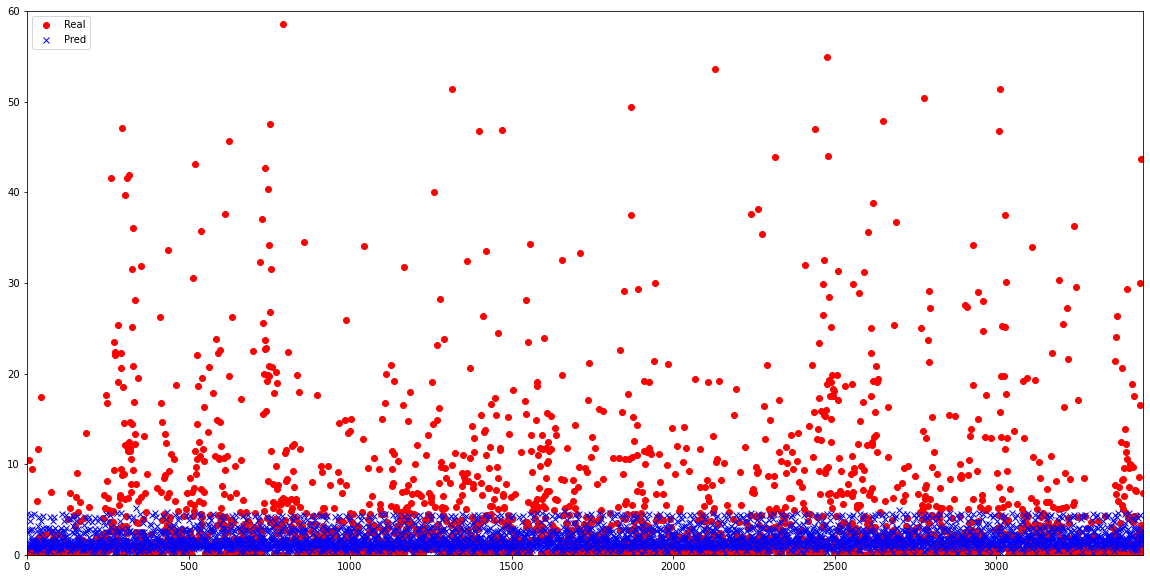

In [525]:
# JUST PLOT

_data_len = len(y_test)
plt.figure(figsize=(20,10))

plot_list = [idx for idx in range(_data_len) if abs(y_test.cpu().detach().numpy()[idx] - pred_y.cpu().detach().numpy()[idx]) <= 10 or True]

# plot_list = []
# for idx in range(_data_len):
#     fix = abs(y_test.cpu().detach().numpy()[idx] - pred_y.cpu().detach().numpy()[idx])
#     if fix<= 10:
#         plot_list.append(idx)
#     else:
#         pass
data_len = len(plot_list)
# print(plot_list)
plt.plot([i for i in range(data_len)], [n for i, n in enumerate(y_test.cpu().detach().numpy()) if i in plot_list], 'ro', label='Real')
plt.plot([i for i in range(data_len)], [n for i, n in enumerate(pred_y.cpu().detach().numpy()) if i in plot_list], 'bx', label='Pred')
# plt.plot([i for i in range(data_len)], [n for i, n in enumerate(y_test.cpu().detach().numpy()) if i in plot_list], 'r', label='Real_line')
# plt.plot([i for i in range(data_len)], [n for i, n in enumerate(pred_y.cpu().detach().numpy()) if i in plot_list], 'b', label='Pred_line')

height = 60#max(y_test.cpu().detach().numpy())
plt.axis([0, data_len, 0, height])
plt.legend()

# Get RMSE - PRICE

In [138]:
def RMSELoss(yhat,y):
    return torch.sqrt(torch.mean((yhat-y)**2)).item(), torch.std(yhat-y, unbiased=False).item()/np.sqrt(len(y))

tmp = copy_df.iloc[tr+te:,:].copy()
tmp['pred'] = pred_y.detach().cpu().numpy()
# tmp.info()

# Item - RMSE
import scipy.stats
rmse_list_item = []
std_list_item = []

cnt = 0
item_list = sorted(tmp.iloc[:,16].unique()) # unique - item
for item_number in item_list:
    item_df = tmp[tmp.iloc[:, 16] == item_number]
    
    ground_truth = item_df['KR_TRADE_HSCD_COUNTRYCD'].values
    pred = item_df['TRADE_HSCD_COUNTRYCD'].values * (item_df['pred'].values / 100.0)
#     print(ground_truth)
    rmse, std = RMSELoss(torch.tensor(ground_truth), torch.tensor(pred))
    
    rmse_list_item.append(rmse)
    std_list_item.append(std)
    
    
# Country - RMSE
rmse_list_country = []
std_list_country = []

cnt = 0
item_list = sorted(tmp.iloc[:,2].unique()) # unique - country
for item_number in item_list:
    item_df = tmp[tmp.iloc[:, 2] == item_number]
    
    ground_truth = item_df['KR_TRADE_HSCD_COUNTRYCD'].values
    pred = item_df['TRADE_HSCD_COUNTRYCD'].values * (item_df['pred'].values / 100.0)
    
    rmse, std = RMSELoss(torch.tensor(ground_truth), torch.tensor(pred))
    
    rmse_list_country.append(rmse)
    std_list_country.append(std)
    


# GET RMSE - percentage

In [139]:
tmp = copy_df.iloc[tr+te:,:].copy()
tmp['pred'] = pred_y.detach().cpu().numpy()
# tmp.info()


# Item - RMSE
import scipy.stats
rmse_list_item_p = []
std_list_item_p = []

cnt = 0
item_list = sorted(tmp.iloc[:,16].unique()) # unique - item
for item_number in item_list:
    item_df = tmp[tmp.iloc[:, 16] == item_number]
    
    ground_truth = item_df['next_year_percent'].values
    pred = item_df['pred'].values
    
    rmse, std = RMSELoss(torch.tensor(ground_truth), torch.tensor(pred))
    
    rmse_list_item_p.append(rmse)
    std_list_item_p.append(std)
    
    
# Country - RMSE
rmse_list_country_p = []
std_list_country_p = []

cnt = 0
item_list = sorted(tmp.iloc[:,2].unique()) # unique - country
for item_number in item_list:
    item_df = tmp[tmp.iloc[:, 2] == item_number]
    
    ground_truth = item_df['next_year_percent'].values
    pred = item_df['pred'].values
    
    rmse, std = RMSELoss(torch.tensor(ground_truth), torch.tensor(pred))
    
    rmse_list_country_p.append(rmse)
    std_list_country_p.append(std)
    


In [140]:
loss_item.append(np.mean(rmse_list_item))
std_item.append(np.mean(std_list_item))
loss_country.append(np.mean(rmse_list_country))
std_country.append(np.mean(std_list_country))


loss_item_p.append(np.mean(rmse_list_item_p))
std_item_p.append(np.mean(std_list_item_p))
loss_country_p.append(np.mean(rmse_list_country_p))
std_country_p.append(np.mean(std_list_country_p))

In [141]:
line_loss_item.append(rmse_list_item)
line_loss_country.append(rmse_list_country)
line_loss_item_p.append(rmse_list_item_p)
line_loss_country_p.append(rmse_list_country_p)

# RMSE's Plot - plotting Start

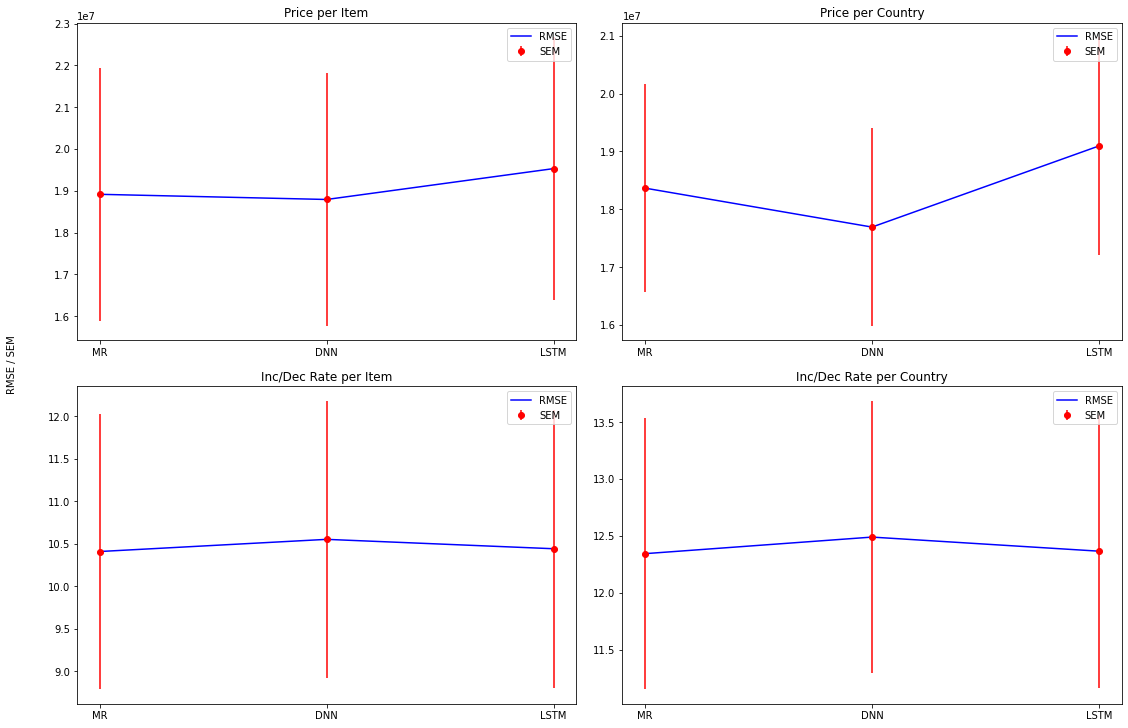

In [65]:
# initial
init_flag = False

if init_flag:
    # price
    loss_item = []
    std_item = []
    loss_country = []
    std_country = []

    # percentage
    loss_item_p = []
    std_item_p = []
    loss_country_p = []
    std_country_p = []
    
    # line
    line_loss_item = []
    line_loss_country = []
    line_loss_item_p = []
    line_loss_country_p = []
    
if not init_flag:
    x = ['MR', 'DNN', 'LSTM']
#     fig, ax = plt.subplots(1,4, squeeze=True, constrained_layout=True, figsize=(20,5))
    fig, ax = plt.subplots(2,2, squeeze=True, constrained_layout=True,  figsize=(15,10))
    ax[0][0].errorbar(x, loss_item, yerr=std_item, fmt='o', label = 'SEM', color='r')
    ax[0][0].plot(x, loss_item, label = 'RMSE', color='b')
    ax[0][0].set_title('Price per Item')
    ax[0][0].legend()

    ax[0][1].errorbar(x, loss_country, yerr=std_country, fmt='o', label = 'SEM', color='r')
    ax[0][1].plot(x, loss_country, label = 'RMSE', color='b')
    ax[0][1].set_title('Price per Country')
    ax[0][1].legend()

    ax[1][0].errorbar(x, loss_item_p, yerr=std_item_p, fmt='o', label = 'SEM', color='r')
    ax[1][0].plot(x, loss_item_p, label = 'RMSE', color='b')
    ax[1][0].set_title('Inc/Dec Rate per Item')
    ax[1][0].legend()

    ax[1][1].errorbar(x, loss_country_p, yerr=std_country_p, fmt='o', label = 'SEM', color='r')
    ax[1][1].plot(x, loss_country_p, label = 'RMSE', color='b')
    ax[1][1].set_title('Inc/Dec Rate per Country')
    ax[1][1].legend()
    fig.text(-0.03, 0.5, 'RMSE / SEM', ha='center', va='center', rotation='vertical')
#     fig.text(0.5, -0.03, 'Models', ha='center', va='center')
    
    plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


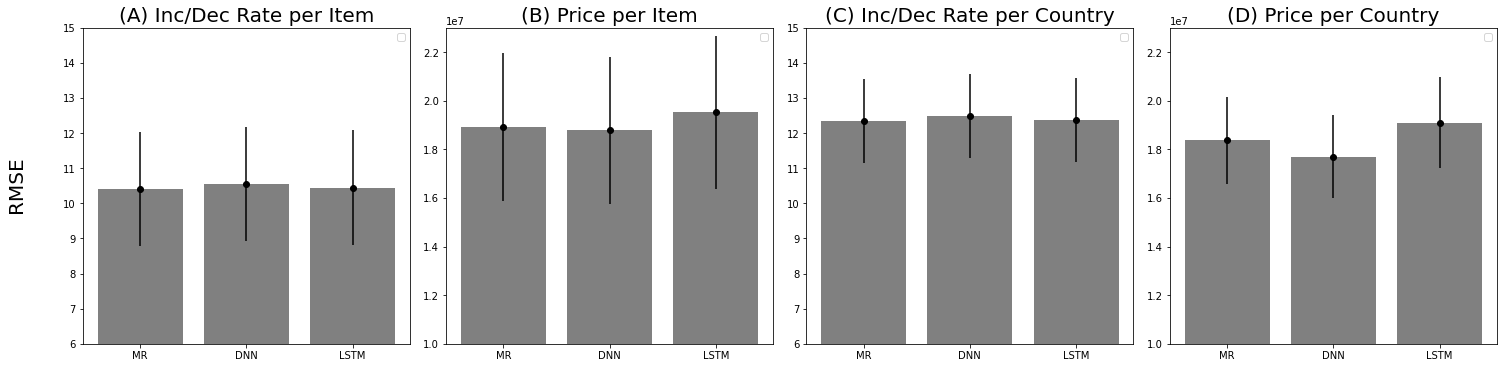

[10.40855348 10.55157851 10.44133351]


In [40]:
# initial
init_flag = False

if init_flag:
    # price
    loss_item = []
    std_item = []
    loss_country = []
    std_country = []

    # percentage
    loss_item_p = []
    std_item_p = []
    loss_country_p = []
    std_country_p = []
    
    # line
    line_loss_item = []
    line_loss_country = []
    line_loss_item_p = []
    line_loss_country_p = []
    
if not init_flag:
    pr = 1e7
    it = 1
    y_limit_price = [1.0*pr, 2.3*pr]
    y_limit_item = [6,15]
    
    
    x = ['MR', 'DNN', 'LSTM']
    fig, ax = plt.subplots(1,4, squeeze=True, constrained_layout=True, figsize=(20,5))
#     fig, ax = plt.subplots(2,2, squeeze=True, constrained_layout=True,  figsize=(15,10))

    ax[0].errorbar(x, loss_item_p, yerr=std_item_p, fmt='o', color='black')
    ax[0].bar(x, loss_item_p, color='gray')
    ax[0].set_title('(A) Inc/Dec Rate per Item', fontsize=20)
    ax[0].set_ylim(y_limit_item)
    ax[0].legend()
    
    ax[1].errorbar(x, loss_item, yerr=std_item, fmt='o', color='black')
    ax[1].bar(x, loss_item, color='gray')
    ax[1].set_title('(B) Price per Item', fontsize=20)
    ax[1].set_ylim(y_limit_price)
    ax[1].legend()

    ax[2].errorbar(x, loss_country_p, yerr=std_country_p, fmt='o', color='black')
    ax[2].bar(x, loss_country_p, color='gray')
    ax[2].set_title('(C) Inc/Dec Rate per Country', fontsize=20)
    ax[2].set_ylim(y_limit_item)
    ax[2].legend()

    ax[3].errorbar(x, loss_country, yerr=std_country, fmt='o', color='black')
    ax[3].bar(x, loss_country, color='gray')
    ax[3].set_title('(D) Price per Country', fontsize=20)
    ax[3].set_ylim(y_limit_price)
    ax[3].legend()
    
    fig.text(-0.03, 0.5, 'RMSE', ha='center', va='center', rotation='vertical', fontsize=20)
#     fig.text(0.5, -0.03, 'Models', ha='center', va='center')
    
    plt.show()
    print(loss_item_p)

In [159]:
loss_item[0]/loss_item[1]

1.0065836026400348

In [42]:
line_loss_item[0][1:-1].split(', ')

['514701.8447798833',
 '6325903.042370487',
 '1055577.936067471',
 '753182.8526827369',
 '706303.1951253192',
 '1809226.3845294837',
 '996250.484689427',
 '1806940.5911363985',
 '3692345.10828302',
 '3926464.625464662',
 '2165695.1191189317',
 '228043.33790582232',
 '1008447.9629398435',
 '310195.9615492433',
 '8935403.286514038',
 '5818577.608993884',
 '5510917.9786334615',
 '1597295.3370433853',
 '4860462.894333412',
 '28319028.984518662',
 '4617093.7789341705',
 '2992750.6460583317',
 '1714988.230745387',
 '1971475.3877678234',
 '1014220.861040255',
 '3581159.5497071664',
 '886135.5207782902',
 '1205481.1369884815',
 '5111674.357403448',
 '46431314.45834363',
 '33962981.97907549',
 '36968664.3198305',
 '53630835.05260602',
 '25489072.915615756',
 '22343537.26950852',
 '13825097.421023035',
 '10200902.421767551',
 '542246.4354936156',
 '1036709.5233733382',
 '24391080.843428105',
 '10909180.307738373',
 '15697214.71408281',
 '8756673.127104452',
 '8633416.69349042',
 '18044966.905722

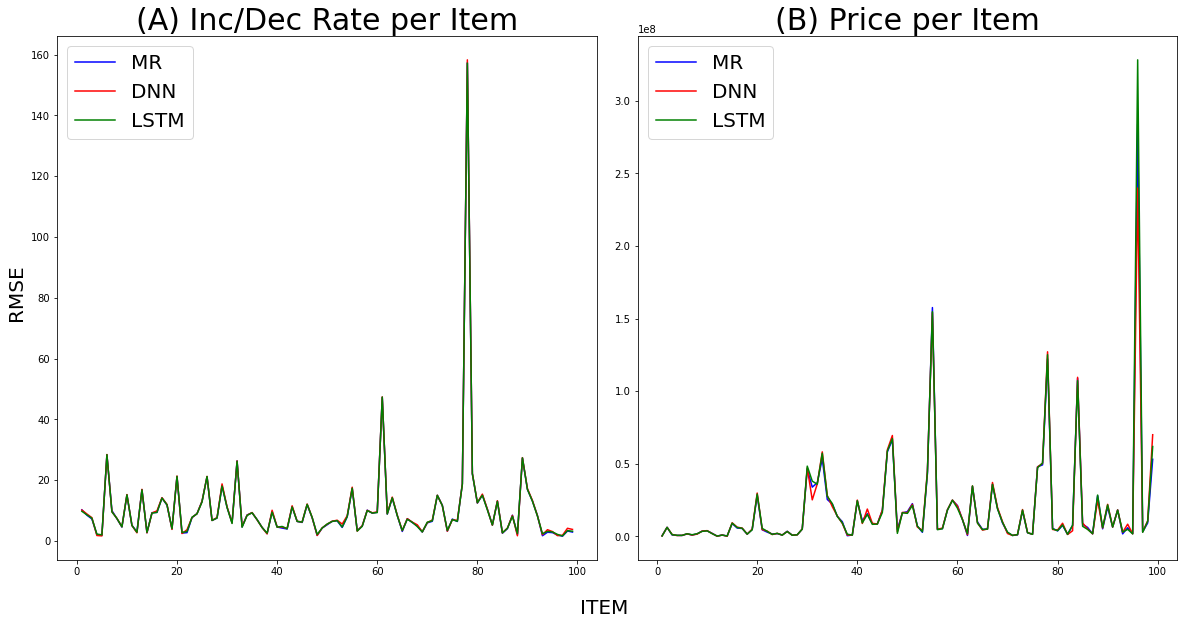

In [553]:
if not init_flag:
    pr = 1e8
    it = 1
    y_limit_price = [0, 0.3*pr]
    y_limit_item = [0,25]
    
    fig, ax = plt.subplots(1,2, squeeze=True, constrained_layout=True, figsize=(16,8))
#     fig, ax = plt.subplots(2,2, squeeze=True, constrained_layout=True, figsize=(15,10))

    x = [i for i in range(1, len(line_loss_item_p[0])+1)]
    ax[0].plot(x, line_loss_item_p[0], 'b', label='MR')
    ax[0].plot(x, line_loss_item_p[1], 'r', label='DNN')
    ax[0].plot(x, line_loss_item_p[2], 'g', label='LSTM')
    ax[0].set_title('(A) Inc/Dec Rate per Item', fontsize=30)
#     ax[2].set_ylim(y_limit_item)
    ax[0].legend(loc='upper left',fontsize=20)
    

#     MR_it_p = [[val for val in lli if val < 25] for lli in line_loss_item_p]
#     x0 = [i for i in range(len(MR_it_p[0]))]
#     x1 = [i for i in range(len(MR_it_p[1]))]
#     x2 = [i for i in range(len(MR_it_p[2]))]
#     ax[1].plot(x0, MR_it_p[0], 'b', label='MR')
#     ax[1].plot(x1, MR_it_p[1], 'r', label='DNN')
#     ax[1].plot(x2, MR_it_p[2], 'g', label='LSTM')
#     ax[1].set_title('(B) Remove outlier - Inc/Dec Rate per Item', fontsize=20)
# #     ax[3].set_ylim(y_limit_item)
#     ax[1].legend(loc='upper left')
    
    x = [i for i in range(1, len(line_loss_item[0])+1)]
    ax[1].plot(x, line_loss_item[0], 'b', label='MR')
    ax[1].plot(x, line_loss_item[1], 'r', label='DNN')
    ax[1].plot(x, line_loss_item[2], 'g', label='LSTM')
    ax[1].set_title('(B) Price per Item', fontsize=30)
#     ax[0].set_ylim(y_limit_price)
    ax[1].legend(fontsize=20)
    
#     x = [i for i in range(1, len(line_loss_country_p[0])+1)]
#     ax[2].plot(x, line_loss_country_p[0], 'b', label='MR')
#     ax[2].plot(x, line_loss_country_p[1], 'r', label='DNN')
#     ax[2].plot(x, line_loss_country_p[2], 'g', label='LSTM')
#     ax[2].set_title('(A) Inc/Dec Rate per Country', fontsize=20)
# #     ax[2].set_ylim(y_limit_item)
#     ax[2].legend()
    
#     x = [i for i in range(1, len(line_loss_country[0])+1)]
#     ax[3].plot(x, line_loss_country[0], 'b', label='MR')
#     ax[3].plot(x, line_loss_country[1], 'r', label='DNN')
#     ax[3].plot(x, line_loss_country[2], 'g', label='LSTM')
#     ax[3].set_title('(C) Price per Country', fontsize=20)
# #     ax[0].set_ylim(y_limit_price)
#     ax[3].legend()

#     MR_it = [[val for val in lli if val < 0.4*pr] for lli in line_loss_item]
#     x0 = [i for i in range(len(MR_it[0]))]
#     x1 = [i for i in range(len(MR_it[1]))]
#     x2 = [i for i in range(len(MR_it[2]))] 
#     ax[3].plot(x0, MR_it[0], 'b', label='MR')
#     ax[3].plot(x1, MR_it[1], 'r', label='DNN')
#     ax[3].plot(x2, MR_it[2], 'g', label='LSTM')
#     ax[3].set_title('(D) Remove outlier - Price per Item', fontsize=20)
# #     ax[1].set_ylim(y_limit_price)
#     ax[3].legend(loc='upper left')

    fig.text(-0.01, 0.5, 'RMSE', ha='center', va='center', rotation='vertical', fontsize=20)
    fig.text(0.5, -0.03, '\nITEM', ha='center', va='center', fontsize=20)
    plt.show()

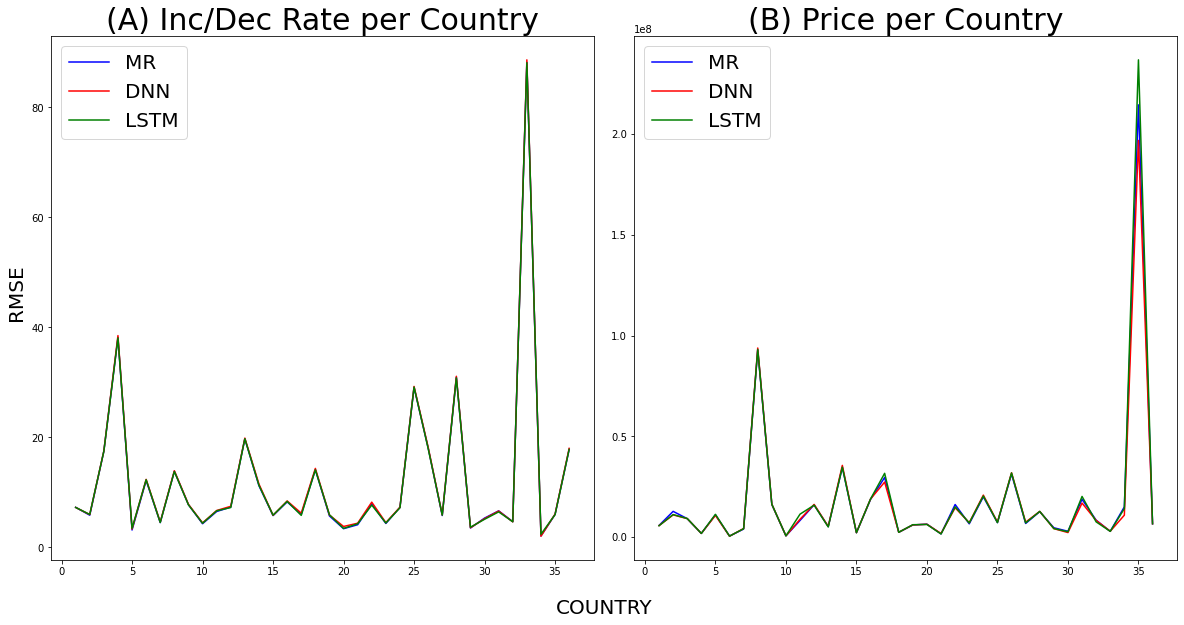

In [554]:
if not init_flag:
    pr = 1e8
    it = 1
    y_limit_price = [0, 0.25*pr]
    y_limit_item = [0,20]
    
    fig, ax = plt.subplots(1,2, squeeze=True, constrained_layout=True, figsize=(16,8))
#     fig, ax = plt.subplots(2,2, squeeze=True, constrained_layout=True, figsize=(15,10))

    x = [i for i in range(1, len(line_loss_country_p[0])+1)]
    ax[0].plot(x, line_loss_country_p[0], 'b', label='MR')
    ax[0].plot(x, line_loss_country_p[1], 'r', label='DNN')
    ax[0].plot(x, line_loss_country_p[2], 'g', label='LSTM')
    ax[0].set_title('(A) Inc/Dec Rate per Country', fontsize=30)
#     ax[2].set_ylim(y_limit_item)
    ax[0].legend(fontsize=20)

#     MR_c_p = [[val for val in lli if val < 20] for lli in line_loss_country_p]
#     x0 = [i for i in range(len(MR_c_p[0]))]
#     x1 = [i for i in range(len(MR_c_p[1]))]
#     x2 = [i for i in range(len(MR_c_p[2]))]
# #     x = [i for i in range(1, len(line_loss_country_p[0])+1)]
#     ax[1].plot(x0, MR_c_p[0], 'b', label='MR')
#     ax[1].plot(x1, MR_c_p[1], 'r', label='DNN')
#     ax[1].plot(x2, MR_c_p[2], 'g', label='LSTM')
#     ax[1].set_title('(B) Remove outlier - Inc/Dec Rate per Country', fontsize=20)
# #     ax[3].set_ylim(y_limit_item)
#     ax[1].legend(loc = 'upper left')
    
    x = [i for i in range(1, len(line_loss_country[0])+1)]
    ax[1].plot(x, line_loss_country[0], 'b', label='MR')
    ax[1].plot(x, line_loss_country[1], 'r', label='DNN')
    ax[1].plot(x, line_loss_country[2], 'g', label='LSTM')
    ax[1].set_title('(B) Price per Country', fontsize=30)
#     ax[0].set_ylim(y_limit_price)
    ax[1].legend(fontsize=20)

#     MR_c = [[val for val in lli if val < 0.25*pr] for lli in line_loss_country]
#     x0 = [i for i in range(len(MR_c[0]))]
#     x1 = [i for i in range(len(MR_c[1]))]
#     x2 = [i for i in range(len(MR_c[2]))]
#     ax[3].plot(x0, MR_c[0], 'b', label='MR')
#     ax[3].plot(x1, MR_c[1], 'r', label='DNN')
#     ax[3].plot(x2, MR_c[2], 'g', label='LSTM')
#     ax[3].set_title('(D) Remove outlier - Price per Country', fontsize=20)
# #     ax[1].set_ylim(y_limit_price)
#     ax[3].legend()

    fig.text(-0.01, 0.5, 'RMSE', ha='center', va='center', rotation='vertical', fontsize=20)
    fig.text(0.5, -0.03, '\nCOUNTRY', ha='center', va='center', fontsize=20)
    plt.show()

In [180]:
loss_item

[18201972.380751327, 17523836.001432333, 17341233.689033713]

In [86]:
def RMSELoss(yhat,y):
    return torch.sqrt(torch.mean((yhat-y)**2)).item(), torch.std(yhat-y, unbiased=False).item()/np.sqrt(len(y))
LSTM_loss, LSTM_std = RMSELoss(pred_y, y_test)


In [89]:
MR_loss

tensor(19.5296, device='cuda:0', grad_fn=<SqrtBackward>)

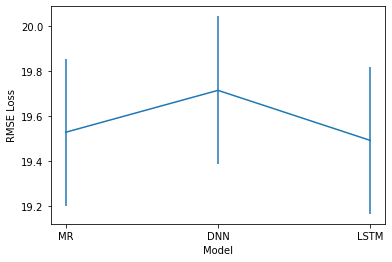

In [97]:
# MR_loss = 0
# MR_std = 0
# LSTM_loss = 0
# LSTM_std = 0
# DNN_loss = 0
# DNN_std = 0

# plt.errorbar([1,2,3], [MR_loss.item, DNN_loss, LSTM_loss], yerr = [MR_std, DNN_std, LSTM_std])
# plt.show()

plot_loss_list = []
plot_sem_list = []

plt.ylabel('RMSE Loss')
plt.xlabel('Model')
plt.errorbar(["MR","DNN","LSTM"], [MR_loss.item(), DNN_loss.item(), LSTM_loss.item()], yerr = [MR_std.item()/np.sqrt(len(pred_y)), DNN_std.item()/np.sqrt(len(pred_y)), LSTM_std.item()/np.sqrt(len(pred_y))])
plt.show()

In [526]:
import seaborn as sns
diff_list_L2 = [np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))]
diff_list_L2 = np.array(diff_list_L2)

## original

[Text(1, 0, 'BEFORE')]

<Figure size 72x7200 with 0 Axes>

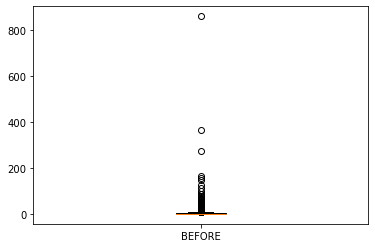

In [527]:
plt.figure(figsize=(1,100))

fig, ax = plt.subplots()
ax.boxplot([np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))])
ax.set_xticklabels(["BEFORE"])



## IQR

In [528]:
diff_list_L2 = np.sort(diff_list_L2)

In [529]:
q1 = np.percentile(diff_list_L2, 25)
q3 = np.percentile(diff_list_L2, 75)

In [530]:
iqr = q3 - q1

In [531]:
outlier = 1.5*iqr

In [532]:
r_l2 = np.array([x for x in diff_list_L2 if (x > q1 - outlier and x < q3 +outlier)])
len(r_l2)

2966

In [533]:
r_l2.mean()

1.568389593049038

In [534]:
r1 = np.array([x for x in diff_list_L2 if (x < q1 - outlier or x > q3 + outlier)])
len(r1)

488

<ipython-input-535-9b88de2c6935>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["AFTER"])


{'whiskers': [<matplotlib.lines.Line2D at 0x7f37d1ba9d60>,
 'caps': [<matplotlib.lines.Line2D at 0x7f37d1bb2460>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f37d1ba9a00>],
 'medians': [<matplotlib.lines.Line2D at 0x7f37d1bb2b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f37d1bb2e80>],
 'means': []}

<Figure size 72x7200 with 0 Axes>

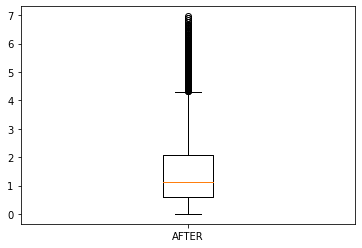

In [535]:
new_diff_list = diff_list_L2[np.abs(diff_list_L2) <= 1*diff_list_L2.std()]
plt.figure(figsize=(1,100))

fig, ax = plt.subplots()
ax.set_xticklabels(["AFTER"])
ax.boxplot(r_l2)

# L2 case Finish

In [ ]:
######################

# for bar plot

In [ ]:
outlier_l1_after = np.round(r.mean(), 2)

In [ ]:
outlier_l1_before = np.round(diff_list.mean(), 2)

In [ ]:
outlier_l2_after = np.round(r_l2.mean(), 2)

In [ ]:
outlier_l2_before = np.round(diff_list_L2.mean(), 2)

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
# plt.figure(figsize=(5, 30))
labels = ['L1', 'L2']
before_list = [outlier_l1_before, outlier_l2_before]
after_list = [outlier_l1_after, outlier_l2_after]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, before_list, width, label='before remove outlier')
rects2 = ax.bar(x + width/2, after_list, width, label='after remove outlier')
ax.set_ylabel('Loss')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

In [ ]:
res = [np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))]
cnt = 0
tot = []
for i in range(len(res)):
    if res[i] > 20:
        cnt+=1
        tot.append(res[i])

In [ ]:
print(cnt)
sns.distplot(tot)

In [ ]:
df['next_year_percent'].min()

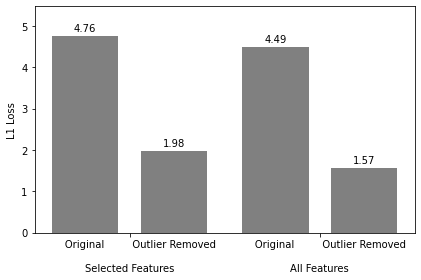

In [552]:
import matplotlib
import matplotlib.pyplot as plt
# plt.figure(figsize=(5, 30))
labels = ['       Original         Outlier Removed\n\nSelected Features', 
          '       Original         Outlier Removed\n\nAll Features']
outlier_l1_s_before = 4.76

outlier_l1_s_after = 1.98

outlier_l1_a_before = 4.49

outlier_l1_a_after = 1.57


before_list = [outlier_l1_s_before, outlier_l1_a_before]
after_list = [outlier_l1_s_after, outlier_l1_a_after]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/1.5, before_list, width, color='gray')
rects2 = ax.bar(x + width/1.5, after_list, width, color='gray')
ax.set_ylabel('L1 Loss')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.margins(y=0.15)
# ax.legend(bbox_to_anchor=(0.6,1))
# ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2 , height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

In [ ]:
# !pip install hiddenlayer
import hiddenlayer as hl

In [ ]:
transforms = [hl.transforms.Prune('Constant')]

In [ ]:
graph = hl.build_graph(deepmodel, x_test, transforms=transforms)

In [ ]:
graph.them = hl.graph.THEMES['blue'].copy()

In [ ]:
graph

In [ ]:
# !pip install torchviz

In [73]:
from torchviz import make_dot

In [116]:
make_dot(deepmodel(x_test), params=dict(list(deepmodel.named_parameters())))

RuntimeError: input must have 3 dimensions, got 2

In [152]:
from torchsummary import summary
summary(deepmodel, [1,11,])

TypeError: rand() argument after * must be an iterable, not int

In [ ]:
!pip install torchsummary

In [132]:
sha = x_test.reshape(-1,1,input_size).shape

In [144]:
inp = torch.zeros(16,1,11)

In [153]:
deepmodel.eval()

RNN(
  (lstm): LSTM(11, 512, num_layers=2, batch_first=True, dropout=0.5)
  (fc): Linear(in_features=512, out_features=1, bias=True)
)